**полезные ссылки**

https://scikit-learn.org/stable/modules/outlier_detection.html

In [1]:
cd ../src/train_VAE/

/home/rfit/Telescope_Array/phd_work/src/train_VAE


In [2]:
import h5py as h5
import numpy as np
import os
import torch
import matplotlib.pyplot as plt
from tqdm import tqdm
# data_path = '/home3/rfit/Telescope_Array/phd_work/data/normed/pr_fe_q4_e1_0110_excl_sat_F_excl_geo_F.h5'
data_path = '/home3/rfit/Telescope_Array/phd_work/data/normed/pr_photon_q4_e1_0110_excl_sat_F_excl_geo_F.h5'
data_path = '/home3/rfit/Telescope_Array/phd_work/data/normed/pr_photon_0001_excl_sat_F_excl_geo_F.h5'

In [3]:
'''
mc_params (num_evs,10):
0. mc_event_num
1. mc_parttype (CORSIKA, 1 - gamma, 14 - proton, 5626 - Fe)
2. mc_corecounter, closest to core detector number
3. mc_E (for primaries other than photon energy is rescaled by 1/1.27, i.e. to proton FD energy scale)
4. mc_theta
5. mc_phi
6. mc_height_1st_inter, km
7. mc_xcore
8. mc_ycore
9. mc_border_distance, km 
'''
with h5.File(data_path,'r') as f:
    print('keys', list(f.keys()))
    test = f['test']
    keys = list(test.keys())
    mc_params = test['mc_params'][:]
    for k in keys:
        print(k, test[k].shape)

keys ['norm_param', 'test', 'train', 'val']
dt_mask (1143461, 2)
dt_params (26130485, 6)
ev_ids (1143461, 3)
ev_starts (1143462,)
mc_params (1143461, 10)
recos (1143461, 6)
wfs_flat (26130485, 128, 2)


In [4]:
try:
    import importlib
    importlib.reload(pipline)
except NameError:
    import pipline

Using device: cuda


2025-05-28 00:23:06.141697: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748380986.596896   67886 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748380986.700532   67886 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1748380987.703990   67886 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1748380987.704026   67886 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1748380987.704030   67886 computation_placer.cc:177] computation placer alr

In [5]:
os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [6]:
config = 'config.yaml'
model = pipline.Pipline(config)
model.config['latent_dim'] = 8
exp = 'Fe_Pr18.01.2025_15:29latent_dim=16;_hidden_dim=512;_use_mask=True;_'
chpt = "../../Models/AutoEncoder/Proton_train_lat=8/best"
model.load_chpt(chpt)

['pipline.py', '__pycache__', 'runs2', 'test', 'runs', 'datasets.py', 'runs_tests', 'model.py', 'test_particles', 'loss.py', 'tests', 'utils.py', 'init.sh', 'config.yaml', '__init__.py', '.ipynb_checkpoints']
mc_params True
keys ['norm_param', 'test', 'train', 'val']
[[ 0.41741616  1.2199497  -0.58500695 -0.26896065 -1.1912816  -0.799549  ]
 [-0.3820865   1.2243679  -0.26313022 -0.27197015 -1.0247972  -0.5572181 ]
 [ 1.1942499   0.4571777  -0.69276047 -0.27348265 -0.5588084  -0.58575124]
 ...
 [ 1.5062277  -1.667156   -0.6320696  -0.27252725  2.2770033  -0.680192  ]
 [ 2.3073862   0.7368079  -0.7032635  -0.27180845  2.3032172  -0.30805525]
 [ 2.3089404  -0.9000476  -0.7650315  -0.27359855  2.8478467  -0.6592944 ]] (235044152, 6) float32
mc_params True
keys ['norm_param', 'test', 'train', 'val']
[[ 1.8070776   0.62659997 -0.5891663  -0.27372506 -1.6578282   0.06006272]
 [ 1.0094041   0.62656957 -0.584003   -0.271912   -0.95201266 -0.6918464 ]
 [ 1.0047575  -0.17333001 -0.69813377 -0.272

In [7]:
latent_list, params, loss = model.predict_latent(write_embedding=False, choise_num = 100000)

  0%|          | 0/390 [00:00<?, ?it/s]/home/rfit/Telescope_Array/phd_work/src/train_VAE/datasets.py:38: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(self.data[st:fn]), torch.tensor(mc_params[1]), torch.tensor(mc_params)
/home/rfit/Telescope_Array/phd_work/src/train_VAE/model.py:104: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  mass = self.sofrmax(mass)
  0%|          | 1/390 [00:00<02:22,  2.74it/s]

tensor([[4.4053e-03, 3.1242e-02, 0.0000e+00, 6.1218e-05, 1.6415e-02, 4.0130e-02],
        [1.6674e-01, 8.4222e-02, 0.0000e+00, 1.2568e-03, 3.3305e-02, 1.9734e-02],
        [1.3830e-01, 2.7538e-01, 0.0000e+00, 1.3528e-01, 1.9575e-02, 2.5056e-01],
        ...,
        [6.2877e-02, 9.1746e-01, 0.0000e+00, 3.0186e-02, 2.1239e-02, 2.5268e-01],
        [4.6693e-01, 4.7269e-02, 0.0000e+00, 2.0369e-02, 2.2197e-02, 1.8746e-01],
        [1.1128e-01, 1.1336e+00, 0.0000e+00, 5.7390e-02, 2.5846e-02, 7.0711e-01]],
       device='cuda:0')


  1%|          | 2/390 [00:00<01:47,  3.60it/s]

tensor([[0.0043, 0.0553, 0.0000, 0.0173, 0.0109, 0.1030],
        [0.1340, 0.0306, 0.0000, 0.0176, 0.0021, 0.1830],
        [0.1380, 0.4617, 0.0000, 0.0049, 0.0064, 0.2788],
        ...,
        [0.3960, 0.0944, 0.0000, 0.0015, 0.0257, 0.1867],
        [0.0773, 0.2000, 0.0000, 0.0092, 0.0101, 0.2605],
        [0.1067, 0.6797, 0.0000, 0.0917, 0.0212, 0.4627]], device='cuda:0')
torch.Size([2000, 6])


  1%|          | 3/390 [00:00<01:35,  4.05it/s]

tensor([[0.0629, 0.3550, 0.0000, 0.0009, 0.0070, 0.1924],
        [0.0770, 0.0723, 0.0000, 0.0064, 0.0566, 0.0372],
        [0.1155, 0.2480, 0.0000, 0.0470, 0.0355, 0.5390],
        ...,
        [0.3027, 0.0495, 0.0000, 0.0103, 0.0335, 0.1352],
        [0.0773, 0.4294, 0.0000, 0.0019, 0.0189, 0.1081],
        [0.1613, 0.0300, 0.0000, 0.0082, 0.0113, 0.1366]], device='cuda:0')
torch.Size([4000, 6])


  1%|▏         | 5/390 [00:01<01:24,  4.57it/s]

tensor([[0.7482, 0.0658, 0.0000, 0.0610, 0.0123, 0.7952],
        [0.0237, 0.0280, 0.0000, 0.0063, 0.0139, 0.0116],
        [0.1366, 0.0865, 0.0000, 0.0112, 0.0378, 0.4118],
        ...,
        [0.2120, 0.1115, 0.0000, 0.0070, 0.0140, 0.2426],
        [0.1225, 0.5181, 0.0000, 0.0180, 0.0223, 0.1837],
        [1.1860, 0.6902, 0.0000, 0.0902, 0.0180, 0.3741]], device='cuda:0')
torch.Size([6000, 6])
tensor([[0.2531, 0.1751, 0.0000, 0.0044, 0.0730, 0.4894],
        [0.0987, 0.0283, 0.0000, 0.0120, 0.0082, 0.1785],
        [0.0634, 0.3606, 0.0000, 0.0092, 0.0296, 0.3134],
        ...,
        [0.1300, 0.2697, 0.0000, 0.0487, 0.0408, 0.3371],
        [0.0962, 0.0155, 0.0000, 0.0245, 0.0215, 0.0141],
        [0.0045, 0.1420, 0.0000, 0.0116, 0.0077, 0.0428]], device='cuda:0')
torch.Size([8000, 6])


  2%|▏         | 6/390 [00:01<01:22,  4.68it/s]

tensor([[1.9128e-02, 6.4406e-02, 0.0000e+00, 9.8150e-03, 1.2410e-02, 5.8935e-02],
        [5.6452e-01, 3.0906e-01, 0.0000e+00, 2.9559e-02, 2.2850e-02, 6.0229e-01],
        [6.5243e-01, 5.6223e-02, 0.0000e+00, 1.0505e-01, 2.6046e-02, 6.7264e-01],
        ...,
        [8.4651e-02, 2.0142e-02, 0.0000e+00, 1.7511e-03, 5.3977e-04, 9.6843e-02],
        [5.6444e-02, 1.8327e-01, 0.0000e+00, 6.3397e-03, 1.0105e-02, 5.1810e-01],
        [1.4994e-01, 4.7018e-01, 0.0000e+00, 1.6882e-01, 3.1355e-02, 1.7063e-01]],
       device='cuda:0')
torch.Size([10000, 6])


  2%|▏         | 7/390 [00:01<01:20,  4.75it/s]

tensor([[0.3270, 0.1645, 0.0000, 0.0181, 0.0370, 0.0760],
        [0.0144, 0.0097, 0.0000, 0.0338, 0.0072, 0.0210],
        [0.0718, 0.2154, 0.0000, 0.0033, 0.0752, 0.0154],
        ...,
        [0.0386, 0.0880, 0.0000, 0.0220, 0.0180, 0.0496],
        [0.0550, 0.0796, 0.0000, 0.0027, 0.0471, 0.0877],
        [0.1950, 0.0142, 0.0000, 0.0021, 0.0143, 0.0350]], device='cuda:0')
torch.Size([12000, 6])


  2%|▏         | 9/390 [00:02<01:18,  4.85it/s]

tensor([[0.0618, 0.6874, 0.0000, 0.0467, 0.0308, 0.4349],
        [0.0738, 0.0660, 0.0000, 0.0016, 0.0127, 0.0265],
        [0.0188, 0.4209, 0.0000, 0.0108, 0.0082, 0.3721],
        ...,
        [0.0140, 0.0714, 0.0000, 0.0095, 0.0099, 0.1350],
        [0.0247, 0.0396, 0.0000, 0.0035, 0.0073, 0.0506],
        [0.0398, 0.3964, 0.0000, 0.0259, 0.0269, 0.0651]], device='cuda:0')
torch.Size([14000, 6])
tensor([[0.4770, 0.7249, 0.0000, 0.0138, 0.0526, 1.2244],
        [0.2697, 0.0606, 0.0000, 0.0036, 0.0212, 0.0311],
        [0.6306, 0.2567, 0.0000, 0.0143, 0.0308, 0.2307],
        ...,
        [0.1201, 0.5382, 0.0000, 0.0045, 0.0108, 0.1579],
        [0.0051, 0.2927, 0.0000, 0.0021, 0.0092, 0.0834],
        [0.0720, 0.2843, 0.0000, 0.0115, 0.0341, 0.1993]], device='cuda:0')
torch.Size([16000, 6])


  3%|▎         | 10/390 [00:02<01:21,  4.68it/s]

tensor([[2.0143e-02, 1.4706e-01, 0.0000e+00, 5.5945e-03, 2.5301e-02, 5.8823e-02],
        [1.3746e-01, 6.4445e-01, 0.0000e+00, 1.6938e-02, 1.2996e-02, 3.3814e-01],
        [1.9022e-01, 8.5467e-01, 0.0000e+00, 3.0509e-02, 5.2333e-02, 4.9364e-01],
        ...,
        [2.0955e-01, 7.4015e-03, 0.0000e+00, 1.7647e-03, 1.3394e-02, 2.3592e-01],
        [1.9066e-01, 1.4971e-01, 0.0000e+00, 5.3482e-03, 8.3880e-03, 1.8457e-01],
        [1.9120e-02, 8.6147e-02, 0.0000e+00, 7.2898e-04, 1.3888e-02, 5.5829e-02]],
       device='cuda:0')
torch.Size([18000, 6])


  3%|▎         | 11/390 [00:02<01:20,  4.69it/s]

tensor([[2.7711e-01, 1.5248e-01, 0.0000e+00, 1.6156e-02, 3.6850e-02, 5.6233e-01],
        [3.7454e-02, 7.9775e-01, 0.0000e+00, 2.0901e-02, 5.4997e-03, 4.6954e-01],
        [2.5939e-02, 9.2954e-02, 0.0000e+00, 3.6948e-02, 7.0947e-03, 1.6968e-02],
        ...,
        [2.3364e-02, 1.2691e-02, 0.0000e+00, 2.8770e-04, 2.9583e-03, 1.0082e-02],
        [1.1224e-01, 8.8741e-02, 0.0000e+00, 4.1948e-03, 5.9524e-02, 1.7180e-01],
        [2.7114e-01, 1.4044e-01, 0.0000e+00, 1.9818e-02, 1.6716e-02, 2.7710e-01]],
       device='cuda:0')
torch.Size([20000, 6])


  3%|▎         | 12/390 [00:02<01:19,  4.73it/s]

tensor([[2.6002e-02, 5.7330e-03, 0.0000e+00, 4.5902e-04, 1.5614e-02, 3.7078e-02],
        [8.3504e-02, 4.2924e-01, 0.0000e+00, 1.7828e-02, 7.0733e-02, 3.2447e-01],
        [2.1657e-02, 6.8833e-02, 0.0000e+00, 1.2316e-02, 1.6461e-02, 1.9124e-02],
        ...,
        [7.4216e-02, 7.2452e-02, 0.0000e+00, 1.3564e-02, 3.0441e-02, 1.3938e-02],
        [1.6234e-01, 6.2323e-01, 0.0000e+00, 4.3224e-02, 3.0368e-02, 8.0752e-01],
        [6.5736e-02, 8.2922e-02, 0.0000e+00, 3.2801e-03, 1.4589e-02, 1.6959e-01]],
       device='cuda:0')
torch.Size([22000, 6])


  3%|▎         | 13/390 [00:02<01:20,  4.70it/s]

tensor([[7.6772e-01, 5.4751e-02, 0.0000e+00, 1.6768e-02, 1.0969e-02, 6.4570e-01],
        [8.0004e-03, 5.9638e-02, 0.0000e+00, 1.4739e-03, 1.3377e-02, 2.4767e-03],
        [5.7256e-02, 4.3548e-02, 0.0000e+00, 1.2357e-02, 3.9968e-03, 1.6405e-02],
        ...,
        [1.2727e-02, 3.3690e-03, 0.0000e+00, 2.7827e-04, 1.5412e-02, 2.5478e-03],
        [5.0591e-01, 4.8289e-01, 0.0000e+00, 1.4259e-03, 9.3751e-02, 1.2512e-01],
        [8.7868e-02, 5.3378e-01, 0.0000e+00, 1.0188e-01, 9.5904e-03, 6.2996e-01]],
       device='cuda:0')
torch.Size([24000, 6])


  4%|▎         | 14/390 [00:03<01:18,  4.77it/s]

tensor([[0.4945, 0.1798, 0.0000, 0.0254, 0.1019, 0.5413],
        [0.0428, 0.1602, 0.0000, 0.0250, 0.0322, 0.0970],
        [0.0399, 0.3452, 0.0000, 0.0013, 0.0266, 0.0936],
        ...,
        [0.5248, 0.0784, 0.0000, 0.0675, 0.0078, 0.2180],
        [0.3238, 0.2084, 0.0000, 0.0159, 0.0131, 0.3827],
        [0.1512, 0.0672, 0.0000, 0.0058, 0.0077, 0.2137]], device='cuda:0')
torch.Size([26000, 6])


  4%|▍         | 15/390 [00:03<01:19,  4.73it/s]

tensor([[0.4564, 0.1643, 0.0000, 0.0280, 0.0359, 0.4459],
        [0.3049, 0.0241, 0.0000, 0.0029, 0.0156, 0.2787],
        [0.1363, 0.6112, 0.0000, 0.0139, 0.0724, 0.5876],
        ...,
        [0.3533, 0.8612, 0.0000, 0.0426, 0.1531, 0.3709],
        [0.0419, 0.1078, 0.0000, 0.0017, 0.0159, 0.0618],
        [0.7853, 0.1023, 0.0000, 0.0129, 0.0163, 0.4328]], device='cuda:0')
torch.Size([28000, 6])


  4%|▍         | 16/390 [00:03<01:18,  4.74it/s]

tensor([[0.1804, 0.0087, 0.0000, 0.0027, 0.0090, 0.0429],
        [0.1360, 0.6792, 0.0000, 0.0462, 0.0218, 0.3711],
        [0.1152, 0.0025, 0.0000, 0.0902, 0.0071, 0.1007],
        ...,
        [0.0252, 0.1611, 0.0000, 0.0070, 0.0339, 0.0280],
        [0.4178, 0.2271, 0.0000, 0.0622, 0.0196, 0.6865],
        [0.0258, 0.0910, 0.0000, 0.0130, 0.0390, 0.0262]], device='cuda:0')
torch.Size([30000, 6])


  4%|▍         | 17/390 [00:03<01:19,  4.72it/s]

tensor([[8.7945e-01, 1.6986e-01, 0.0000e+00, 4.6157e-01, 2.0548e-02, 9.2332e-01],
        [2.2565e-02, 2.7322e-02, 0.0000e+00, 1.9351e-04, 8.7601e-03, 4.6840e-02],
        [1.0012e+00, 2.0515e-01, 0.0000e+00, 2.0615e-02, 8.5862e-02, 5.5337e-01],
        ...,
        [9.1978e-02, 6.0391e-01, 0.0000e+00, 2.6858e-02, 1.9858e-02, 5.0684e-01],
        [1.7299e-01, 3.0824e-01, 0.0000e+00, 1.4280e-02, 5.5435e-03, 4.1020e-01],
        [5.0546e-02, 5.3814e-01, 0.0000e+00, 8.6757e-03, 3.6992e-03, 5.6430e-01]],
       device='cuda:0')
torch.Size([32000, 6])


  5%|▍         | 18/390 [00:03<01:17,  4.79it/s]

tensor([[0.4576, 0.0571, 0.0000, 0.0037, 0.0131, 0.2428],
        [0.5056, 0.0654, 0.0000, 0.0397, 0.0089, 0.3542],
        [0.0234, 0.0643, 0.0000, 0.1262, 0.0075, 0.0576],
        ...,
        [0.0901, 0.5730, 0.0000, 0.0018, 0.1002, 0.2109],
        [0.1022, 0.0057, 0.0000, 0.0049, 0.0112, 0.0182],
        [0.2877, 0.6029, 0.0000, 0.0651, 0.0150, 0.3850]], device='cuda:0')
torch.Size([34000, 6])


  5%|▍         | 19/390 [00:04<01:17,  4.80it/s]

tensor([[0.1647, 0.8606, 0.0000, 0.0143, 0.0541, 0.5972],
        [0.2349, 0.6610, 0.0000, 0.0760, 0.0052, 0.5162],
        [0.7261, 0.0602, 0.0000, 0.0090, 0.0366, 0.1562],
        ...,
        [0.1508, 0.0844, 0.0000, 0.0247, 0.0183, 0.1906],
        [0.0475, 0.0866, 0.0000, 0.0055, 0.0070, 0.2062],
        [0.0158, 0.1330, 0.0000, 0.0905, 0.0023, 0.3036]], device='cuda:0')
torch.Size([36000, 6])


  5%|▌         | 20/390 [00:04<01:16,  4.84it/s]

tensor([[0.3304, 0.0803, 0.0000, 0.0036, 0.0701, 0.0096],
        [0.0157, 0.0064, 0.0000, 0.0344, 0.0188, 0.0078],
        [0.3347, 0.0660, 0.0000, 0.0333, 0.0107, 0.4778],
        ...,
        [0.2905, 0.0423, 0.0000, 0.0035, 0.0205, 0.1367],
        [0.0620, 0.0329, 0.0000, 0.0036, 0.0019, 0.0582],
        [0.2912, 0.0608, 0.0000, 0.0483, 0.0390, 0.2657]], device='cuda:0')
torch.Size([38000, 6])


  5%|▌         | 21/390 [00:04<01:17,  4.78it/s]

tensor([[0.0333, 0.0219, 0.0000, 0.0007, 0.0065, 0.0565],
        [0.0503, 0.0969, 0.0000, 0.0259, 0.0027, 0.1733],
        [0.0172, 0.0260, 0.0000, 0.0030, 0.0071, 0.0115],
        ...,
        [0.1784, 0.3530, 0.0000, 0.0202, 0.0195, 0.3213],
        [0.3856, 0.1165, 0.0000, 0.0278, 0.1241, 0.0964],
        [0.0878, 0.3257, 0.0000, 0.0088, 0.0609, 0.1799]], device='cuda:0')
torch.Size([40000, 6])


  6%|▌         | 22/390 [00:04<01:17,  4.72it/s]

tensor([[0.0367, 0.5463, 0.0000, 0.0428, 0.0141, 0.4480],
        [0.1118, 0.2748, 0.0000, 0.0370, 0.1015, 0.3465],
        [0.0517, 0.1758, 0.0000, 0.0046, 0.0177, 0.1304],
        ...,
        [0.0582, 0.5317, 0.0000, 0.0358, 0.0119, 0.2060],
        [0.0715, 0.1097, 0.0000, 0.0101, 0.0080, 0.0900],
        [0.1331, 0.0848, 0.0000, 0.0125, 0.0089, 0.0318]], device='cuda:0')
torch.Size([42000, 6])


  6%|▌         | 23/390 [00:04<01:17,  4.74it/s]

tensor([[0.1530, 0.3382, 0.0000, 0.0139, 0.0162, 0.3020],
        [0.4921, 0.0543, 0.0000, 0.0138, 0.0125, 0.4015],
        [0.3087, 0.8768, 0.0000, 0.0711, 0.0432, 0.9779],
        ...,
        [0.0335, 0.1337, 0.0000, 0.0702, 0.0148, 0.0249],
        [0.0339, 0.0823, 0.0000, 0.0039, 0.0273, 0.1177],
        [0.0034, 0.0124, 0.0000, 0.0232, 0.0194, 0.0048]], device='cuda:0')
torch.Size([44000, 6])


  6%|▌         | 24/390 [00:05<01:16,  4.76it/s]

tensor([[0.0308, 0.1888, 0.0000, 0.0024, 0.0062, 0.1484],
        [0.4285, 0.2984, 0.0000, 0.0111, 0.0319, 0.2957],
        [0.6564, 0.1085, 0.0000, 0.0846, 0.0054, 0.3792],
        ...,
        [0.0869, 0.0512, 0.0000, 0.0169, 0.0112, 0.1431],
        [0.1494, 0.0191, 0.0000, 0.0009, 0.0075, 0.0977],
        [0.0530, 0.1046, 0.0000, 0.0070, 0.0301, 0.0876]], device='cuda:0')
torch.Size([46000, 6])


  6%|▋         | 25/390 [00:05<01:16,  4.75it/s]

tensor([[1.8378e-02, 1.7736e-01, 0.0000e+00, 9.6552e-03, 1.4610e-02, 7.3126e-02],
        [4.3251e-02, 1.8666e-03, 0.0000e+00, 7.6737e-04, 1.6139e-03, 2.2561e-02],
        [3.7959e-03, 1.6683e-02, 0.0000e+00, 1.2052e-04, 2.4051e-03, 2.9969e-02],
        ...,
        [1.5070e-01, 2.3432e-02, 0.0000e+00, 3.2976e-03, 8.5690e-03, 5.2016e-01],
        [2.2385e-01, 4.3958e-02, 0.0000e+00, 1.3611e-02, 2.2875e-02, 4.1999e-01],
        [8.1187e-02, 1.7604e-02, 0.0000e+00, 6.2648e-03, 3.2243e-02, 8.3738e-02]],
       device='cuda:0')
torch.Size([48000, 6])


  7%|▋         | 26/390 [00:05<01:18,  4.61it/s]

tensor([[2.0853e-01, 1.5111e-01, 0.0000e+00, 6.6410e-02, 2.6368e-03, 4.8024e-01],
        [4.4276e-01, 2.4217e-01, 0.0000e+00, 8.9277e-02, 2.1900e-02, 8.1307e-01],
        [4.1550e-03, 2.2962e-02, 0.0000e+00, 7.6164e-03, 3.5457e-02, 8.9401e-03],
        ...,
        [1.8948e-02, 4.4484e-02, 0.0000e+00, 6.6718e-03, 6.2930e-03, 2.6475e-02],
        [5.8641e-02, 1.4082e-01, 0.0000e+00, 9.1924e-04, 1.3010e-02, 2.4137e-02],
        [1.1340e-03, 1.4345e-01, 0.0000e+00, 6.4680e-04, 1.4480e-02, 1.4159e-02]],
       device='cuda:0')
torch.Size([50000, 6])


  7%|▋         | 27/390 [00:05<01:20,  4.53it/s]

tensor([[0.1670, 0.0378, 0.0000, 0.0050, 0.0059, 0.0837],
        [0.0403, 0.0041, 0.0000, 0.0030, 0.0176, 0.1033],
        [0.4341, 0.0717, 0.0000, 0.0092, 0.0820, 0.2571],
        ...,
        [0.1993, 0.1939, 0.0000, 0.0005, 0.0062, 0.1605],
        [0.2085, 0.0354, 0.0000, 0.0051, 0.0088, 0.1369],
        [0.0224, 0.0206, 0.0000, 0.0165, 0.0209, 0.1183]], device='cuda:0')
torch.Size([52000, 6])


  7%|▋         | 28/390 [00:06<01:20,  4.51it/s]

tensor([[6.7337e-01, 2.3223e-01, 0.0000e+00, 2.5932e-02, 2.3733e-02, 2.3299e-01],
        [2.1444e-01, 1.1052e+00, 0.0000e+00, 5.7789e-02, 8.8111e-02, 6.3617e-01],
        [1.3869e-01, 1.1901e-01, 0.0000e+00, 3.3500e-02, 1.6353e-02, 1.1043e-01],
        ...,
        [1.1225e-01, 6.0782e-01, 0.0000e+00, 6.0416e-03, 3.9821e-02, 3.3195e-02],
        [1.1044e-01, 1.5638e-01, 0.0000e+00, 1.8527e-02, 2.4582e-02, 3.8697e-02],
        [2.9251e-01, 1.5356e-01, 0.0000e+00, 1.1696e-02, 1.0626e-03, 4.6093e-01]],
       device='cuda:0')
torch.Size([54000, 6])


  7%|▋         | 29/390 [00:06<01:19,  4.53it/s]

tensor([[0.1270, 0.0964, 0.0000, 0.0087, 0.0395, 0.0501],
        [0.0715, 0.0117, 0.0000, 0.0027, 0.0023, 0.2578],
        [0.1828, 0.0775, 0.0000, 0.0134, 0.0132, 0.1580],
        ...,
        [0.0811, 0.0475, 0.0000, 0.0006, 0.0495, 0.0436],
        [0.1450, 0.0287, 0.0000, 0.0010, 0.0197, 0.2065],
        [0.0922, 0.0070, 0.0000, 0.0038, 0.0037, 0.0674]], device='cuda:0')
torch.Size([56000, 6])


  8%|▊         | 30/390 [00:06<01:18,  4.57it/s]

tensor([[7.1165e-02, 4.8440e-02, 0.0000e+00, 1.6333e-02, 7.0304e-03, 8.1177e-02],
        [7.1625e-01, 2.7344e-01, 0.0000e+00, 6.8660e-02, 1.8021e-02, 4.1904e-01],
        [2.7519e-02, 1.3708e-02, 0.0000e+00, 2.4835e-03, 1.5772e-02, 2.4777e-02],
        ...,
        [2.0800e-02, 3.8529e-02, 0.0000e+00, 5.6003e-04, 3.2862e-02, 1.0546e-02],
        [1.2000e-01, 3.0579e-02, 0.0000e+00, 1.1900e-02, 7.9384e-03, 1.8622e-01],
        [5.3252e-02, 1.5084e-01, 0.0000e+00, 4.2470e-03, 3.2299e-02, 5.7834e-01]],
       device='cuda:0')
torch.Size([58000, 6])


  8%|▊         | 31/390 [00:06<01:17,  4.64it/s]

tensor([[0.0758, 0.1591, 0.0000, 0.0042, 0.0379, 0.0678],
        [0.1041, 0.5121, 0.0000, 0.0482, 0.0162, 0.3068],
        [0.2533, 0.0593, 0.0000, 0.1097, 0.0054, 0.2930],
        ...,
        [0.0068, 0.0048, 0.0000, 0.0023, 0.0060, 0.0045],
        [0.1912, 0.1408, 0.0000, 0.0046, 0.0200, 0.0590],
        [0.0614, 0.0492, 0.0000, 0.0062, 0.0242, 0.0327]], device='cuda:0')
torch.Size([60000, 6])


  8%|▊         | 32/390 [00:06<01:15,  4.73it/s]

tensor([[0.3407, 0.0878, 0.0000, 0.0039, 0.0057, 0.2914],
        [0.0297, 0.0229, 0.0000, 0.0036, 0.0141, 0.0110],
        [0.0494, 0.6194, 0.0000, 0.0376, 0.0318, 0.5899],
        ...,
        [0.0073, 0.0208, 0.0000, 0.0011, 0.0203, 0.1236],
        [0.0051, 0.0110, 0.0000, 0.0009, 0.0027, 0.0100],
        [0.3373, 0.1636, 0.0000, 0.0646, 0.0166, 0.3842]], device='cuda:0')
torch.Size([62000, 6])


  8%|▊         | 33/390 [00:07<01:14,  4.78it/s]

tensor([[0.0539, 0.8674, 0.0000, 0.0086, 0.0021, 0.5082],
        [0.0107, 0.4306, 0.0000, 0.0064, 0.0066, 0.0691],
        [0.2773, 0.0757, 0.0000, 0.0233, 0.0108, 0.0485],
        ...,
        [0.1638, 0.1270, 0.0000, 0.0107, 0.0738, 0.3582],
        [0.0546, 0.3513, 0.0000, 0.0213, 0.0323, 0.1281],
        [0.2973, 0.3480, 0.0000, 0.0108, 0.0332, 0.2219]], device='cuda:0')
torch.Size([64000, 6])


  9%|▊         | 34/390 [00:07<01:14,  4.75it/s]

tensor([[0.0315, 0.0058, 0.0000, 0.0134, 0.0152, 0.0138],
        [0.1790, 0.0372, 0.0000, 0.0079, 0.0150, 0.0332],
        [0.0111, 0.0180, 0.0000, 0.0011, 0.0125, 0.0351],
        ...,
        [0.1046, 0.5808, 0.0000, 0.0089, 0.0212, 0.2176],
        [0.1326, 0.1110, 0.0000, 0.0101, 0.0086, 0.2799],
        [0.0470, 0.1656, 0.0000, 0.0060, 0.0023, 0.1645]], device='cuda:0')
torch.Size([66000, 6])


  9%|▉         | 35/390 [00:07<01:14,  4.76it/s]

tensor([[0.2071, 0.0928, 0.0000, 0.0128, 0.1032, 0.1539],
        [0.0435, 0.5447, 0.0000, 0.0281, 0.0282, 0.8467],
        [0.0790, 0.0298, 0.0000, 0.0054, 0.0469, 0.0171],
        ...,
        [0.1252, 1.2322, 0.0000, 0.0070, 0.1616, 0.3701],
        [0.5321, 0.1582, 0.0000, 0.0160, 0.1378, 0.0781],
        [0.0501, 0.0059, 0.0000, 0.0426, 0.0019, 0.0698]], device='cuda:0')
torch.Size([68000, 6])


  9%|▉         | 36/390 [00:07<01:15,  4.68it/s]

tensor([[0.0608, 0.4158, 0.0000, 0.0066, 0.0309, 0.1094],
        [0.0229, 0.1074, 0.0000, 0.0005, 0.1259, 0.0983],
        [0.0041, 0.1498, 0.0000, 0.0039, 0.0017, 0.1396],
        ...,
        [0.3333, 0.4366, 0.0000, 0.0135, 0.0567, 0.3199],
        [0.1470, 0.0098, 0.0000, 0.0034, 0.0100, 0.1182],
        [0.0134, 0.1645, 0.0000, 0.0070, 0.0097, 0.0938]], device='cuda:0')
torch.Size([70000, 6])


  9%|▉         | 37/390 [00:07<01:14,  4.73it/s]

tensor([[1.4814e-01, 4.0682e-01, 0.0000e+00, 3.3865e-03, 2.2024e-03, 2.9223e-01],
        [1.1901e-01, 1.0119e+00, 0.0000e+00, 9.0180e-02, 1.3499e-01, 6.9412e-01],
        [1.0725e+00, 1.9345e-01, 0.0000e+00, 7.1807e-02, 2.4112e-02, 4.3134e-01],
        ...,
        [8.5292e-02, 3.8529e-01, 0.0000e+00, 1.2478e-02, 4.9992e-03, 2.6437e-01],
        [2.7092e-02, 2.4287e-01, 0.0000e+00, 3.7164e-03, 1.1371e-02, 1.4322e-01],
        [9.6430e-02, 1.0033e-01, 0.0000e+00, 9.8413e-04, 2.1751e-02, 1.3884e-01]],
       device='cuda:0')
torch.Size([72000, 6])


 10%|▉         | 38/390 [00:08<01:13,  4.77it/s]

tensor([[4.9489e-01, 2.2235e-01, 0.0000e+00, 4.4210e-03, 1.9018e-02, 1.0151e+00],
        [1.3382e-01, 9.0014e-02, 0.0000e+00, 9.3058e-04, 2.1840e-01, 4.9789e-02],
        [3.4624e-01, 1.2794e-01, 0.0000e+00, 1.9294e-02, 1.1800e-02, 1.4582e-01],
        ...,
        [8.0976e-02, 8.2983e-02, 0.0000e+00, 5.7336e-04, 3.8608e-02, 1.9678e-02],
        [6.0988e-01, 6.7391e-02, 0.0000e+00, 1.9427e-02, 3.5618e-02, 5.3502e-01],
        [3.0019e-02, 3.7366e-02, 0.0000e+00, 1.6422e-03, 1.5787e-02, 1.4033e-01]],
       device='cuda:0')
torch.Size([74000, 6])


 10%|█         | 39/390 [00:08<01:14,  4.71it/s]

tensor([[0.4619, 0.1879, 0.0000, 0.0309, 0.0136, 0.4362],
        [0.1248, 0.4309, 0.0000, 0.3129, 0.0158, 0.2446],
        [0.0622, 0.0172, 0.0000, 0.0014, 0.0064, 0.0904],
        ...,
        [0.1054, 0.0307, 0.0000, 0.0038, 0.0190, 0.1274],
        [0.0256, 0.0407, 0.0000, 0.0072, 0.0106, 0.0732],
        [0.2725, 0.0316, 0.0000, 0.2209, 0.0805, 0.0495]], device='cuda:0')
torch.Size([76000, 6])


 10%|█         | 40/390 [00:08<01:30,  3.87it/s]

tensor([[0.9430, 0.0559, 0.0000, 0.0179, 0.0242, 0.6488],
        [0.0648, 0.5969, 0.0000, 0.0264, 0.0435, 0.9387],
        [0.3295, 0.2610, 0.0000, 0.0025, 0.0263, 0.2752],
        ...,
        [0.1324, 0.0048, 0.0000, 0.0013, 0.0107, 0.0058],
        [0.8789, 0.0735, 0.0000, 0.0320, 0.0102, 0.7249],
        [0.0761, 0.0126, 0.0000, 0.0068, 0.0086, 0.0097]], device='cuda:0')
torch.Size([78000, 6])


 11%|█         | 41/390 [00:08<01:24,  4.13it/s]

tensor([[0.0410, 0.1371, 0.0000, 0.0023, 0.0231, 0.0965],
        [0.0369, 0.0110, 0.0000, 0.0011, 0.0005, 0.0066],
        [0.3107, 0.0550, 0.0000, 0.0017, 0.0071, 0.4747],
        ...,
        [0.1433, 0.2514, 0.0000, 0.0027, 0.0058, 0.1909],
        [0.4520, 0.0559, 0.0000, 0.0150, 0.0119, 0.4511],
        [0.0645, 0.4116, 0.0000, 0.0413, 0.0101, 0.0808]], device='cuda:0')
torch.Size([80000, 6])


 11%|█         | 42/390 [00:09<01:21,  4.30it/s]

tensor([[0.5201, 0.2227, 0.0000, 0.0112, 0.0760, 0.3357],
        [0.0062, 0.0208, 0.0000, 0.0077, 0.0272, 0.0653],
        [0.1774, 0.4606, 0.0000, 0.0163, 0.1598, 0.2722],
        ...,
        [0.3503, 0.0742, 0.0000, 0.0091, 0.0176, 0.1893],
        [0.2099, 0.1034, 0.0000, 0.0389, 0.0269, 0.1612],
        [0.0084, 0.0015, 0.0000, 0.0008, 0.0228, 0.0017]], device='cuda:0')
torch.Size([82000, 6])


 11%|█         | 43/390 [00:09<01:18,  4.45it/s]

tensor([[0.0885, 0.0915, 0.0000, 0.0015, 0.0121, 0.1381],
        [0.1702, 0.0432, 0.0000, 0.0084, 0.0145, 0.3670],
        [0.2433, 0.4470, 0.0000, 0.0081, 0.0454, 0.1440],
        ...,
        [0.0315, 0.0280, 0.0000, 0.0211, 0.0202, 0.0444],
        [0.0285, 0.0049, 0.0000, 0.0013, 0.0121, 0.0148],
        [0.0017, 0.0548, 0.0000, 0.0083, 0.0134, 0.0762]], device='cuda:0')
torch.Size([84000, 6])


 11%|█▏        | 44/390 [00:09<01:15,  4.55it/s]

tensor([[0.0217, 0.0609, 0.0000, 0.0040, 0.0042, 0.0325],
        [0.0316, 0.6093, 0.0000, 0.0075, 0.0245, 0.3011],
        [0.0763, 0.2963, 0.0000, 0.0115, 0.0174, 0.1599],
        ...,
        [0.0307, 0.0144, 0.0000, 0.0746, 0.0102, 0.0136],
        [0.1703, 0.2775, 0.0000, 0.0168, 0.0561, 0.0888],
        [0.0853, 0.1356, 0.0000, 0.0098, 0.0274, 0.1122]], device='cuda:0')
torch.Size([86000, 6])


 12%|█▏        | 45/390 [00:09<01:15,  4.56it/s]

tensor([[7.0739e-02, 1.1751e+00, 0.0000e+00, 1.6411e-02, 5.2036e-02, 3.4513e-01],
        [4.9128e-01, 3.7601e-01, 0.0000e+00, 8.3371e-02, 6.3125e-02, 5.7063e-01],
        [1.3021e-02, 1.9587e-01, 0.0000e+00, 4.4649e-04, 2.2857e-02, 5.3870e-03],
        ...,
        [7.7554e-02, 8.1632e-03, 0.0000e+00, 6.3661e-04, 1.6799e-02, 4.7657e-02],
        [1.2710e-01, 6.5975e-01, 0.0000e+00, 1.8754e-01, 3.9981e-02, 3.7913e-01],
        [6.0393e-01, 1.1276e-01, 0.0000e+00, 4.3598e-02, 1.8151e-02, 1.5808e-01]],
       device='cuda:0')
torch.Size([88000, 6])


 12%|█▏        | 46/390 [00:10<01:13,  4.66it/s]

tensor([[0.0653, 0.0167, 0.0000, 0.0015, 0.0120, 0.1847],
        [0.4579, 0.0993, 0.0000, 0.0105, 0.0114, 0.2254],
        [0.4800, 0.2676, 0.0000, 0.0106, 0.0309, 0.5669],
        ...,
        [0.0213, 0.1792, 0.0000, 0.0029, 0.0241, 0.1491],
        [0.1452, 0.4143, 0.0000, 0.0259, 0.0310, 0.3630],
        [0.0183, 0.0059, 0.0000, 0.0011, 0.0031, 0.0354]], device='cuda:0')
torch.Size([90000, 6])


 12%|█▏        | 47/390 [00:10<01:12,  4.72it/s]

tensor([[5.5016e-01, 1.0207e-01, 0.0000e+00, 1.8728e-03, 1.2939e-02, 1.3186e-01],
        [2.0341e-02, 2.8199e-02, 0.0000e+00, 1.1033e-04, 6.2129e-03, 3.9186e-02],
        [2.8019e-01, 1.9086e-01, 0.0000e+00, 4.9093e-03, 2.0367e-01, 1.6702e-01],
        ...,
        [4.0467e-02, 2.4181e-02, 0.0000e+00, 3.4473e-03, 1.6062e-02, 4.1384e-02],
        [4.9087e-02, 1.6635e-03, 0.0000e+00, 8.7578e-03, 1.9274e-02, 1.6907e-02],
        [3.8468e-01, 1.7036e-01, 0.0000e+00, 1.8134e-02, 1.2535e-02, 2.0535e-01]],
       device='cuda:0')
torch.Size([92000, 6])


 12%|█▏        | 48/390 [00:10<01:12,  4.73it/s]

tensor([[3.7979e-02, 6.6941e-03, 0.0000e+00, 1.4206e-03, 2.2810e-03, 7.6917e-02],
        [1.6506e-01, 3.3794e-01, 0.0000e+00, 1.4443e-01, 2.6557e-02, 3.9584e-01],
        [8.0495e-02, 8.4729e-02, 0.0000e+00, 1.0063e-03, 8.3999e-02, 6.6370e-02],
        ...,
        [2.3097e-01, 3.1144e-02, 0.0000e+00, 4.7104e-03, 3.8062e-02, 2.2261e-01],
        [1.9442e-03, 2.6603e-02, 0.0000e+00, 1.0496e-04, 1.0418e-02, 1.1928e-02],
        [2.6812e-01, 1.5793e-01, 0.0000e+00, 1.5745e-02, 3.9808e-03, 2.4205e-01]],
       device='cuda:0')
torch.Size([94000, 6])


 13%|█▎        | 49/390 [00:10<01:11,  4.77it/s]

tensor([[0.9232, 0.3807, 0.0000, 0.0649, 0.0206, 0.5248],
        [0.0748, 0.4191, 0.0000, 0.0371, 0.0178, 0.1765],
        [0.4620, 0.2127, 0.0000, 0.0031, 0.0131, 0.2175],
        ...,
        [0.0312, 0.1906, 0.0000, 0.0032, 0.0146, 0.0623],
        [0.2093, 0.5249, 0.0000, 0.0697, 0.0126, 0.6367],
        [0.2713, 0.0187, 0.0000, 0.0041, 0.0129, 0.1329]], device='cuda:0')
torch.Size([96000, 6])


 13%|█▎        | 50/390 [00:10<01:10,  4.81it/s]

tensor([[1.6898e-02, 1.3840e-01, 0.0000e+00, 1.3019e-02, 2.9254e-03, 4.0990e-01],
        [1.0299e-01, 2.0142e-02, 0.0000e+00, 6.8404e-04, 4.8220e-03, 8.0998e-02],
        [2.0209e-02, 6.2541e-02, 0.0000e+00, 9.5741e-03, 1.9770e-02, 8.7562e-02],
        ...,
        [1.4241e-01, 5.1518e-01, 0.0000e+00, 2.2667e-02, 1.8592e-02, 1.9332e-01],
        [7.7423e-02, 1.5986e-01, 0.0000e+00, 6.1074e-03, 1.0543e-02, 1.3308e-01],
        [4.0875e-02, 3.7789e-02, 0.0000e+00, 2.6651e-04, 1.5625e-02, 5.1549e-02]],
       device='cuda:0')
torch.Size([98000, 6])


 13%|█▎        | 51/390 [00:11<01:11,  4.75it/s]

tensor([[0.1633, 0.0456, 0.0000, 0.0010, 0.0200, 0.0143],
        [0.1272, 0.1962, 0.0000, 0.0013, 0.0249, 0.1472],
        [0.1244, 0.1009, 0.0000, 0.0079, 0.0181, 0.1185],
        ...,
        [0.1811, 0.1315, 0.0000, 0.0346, 0.0067, 0.2631],
        [0.6403, 0.0511, 0.0000, 0.0511, 0.0138, 0.4625],
        [0.0075, 0.1018, 0.0000, 0.0011, 0.0101, 0.0191]], device='cuda:0')
torch.Size([100000, 6])


 13%|█▎        | 52/390 [00:11<01:10,  4.77it/s]

tensor([[0.0132, 0.0767, 0.0000, 0.0022, 0.0058, 0.2703],
        [0.0157, 0.0157, 0.0000, 0.0044, 0.0089, 0.0947],
        [0.6021, 0.2645, 0.0000, 0.1266, 0.0309, 0.3340],
        ...,
        [0.0022, 0.0205, 0.0000, 0.0037, 0.0070, 0.0066],
        [0.1881, 0.9687, 0.0000, 0.0210, 0.0260, 0.9388],
        [0.0382, 0.2290, 0.0000, 0.0045, 0.0087, 0.0456]], device='cuda:0')
torch.Size([102000, 6])


 14%|█▎        | 53/390 [00:11<01:11,  4.71it/s]

tensor([[4.2368e-01, 7.7844e-02, 0.0000e+00, 2.6356e-02, 4.6855e-03, 2.7355e-01],
        [2.1119e-02, 3.6717e-02, 0.0000e+00, 5.9629e-05, 5.1600e-02, 2.0870e-02],
        [1.3590e-01, 8.0158e-01, 0.0000e+00, 3.4672e-02, 6.8608e-02, 1.2383e+00],
        ...,
        [6.8606e-02, 1.0637e-01, 0.0000e+00, 1.1783e-02, 3.7294e-03, 4.4238e-02],
        [1.9543e-01, 3.3063e-01, 0.0000e+00, 5.5377e-02, 8.9640e-03, 3.1775e-01],
        [7.7793e-02, 1.1911e-02, 0.0000e+00, 4.3289e-02, 1.6377e-02, 3.6584e-02]],
       device='cuda:0')
torch.Size([104000, 6])


 14%|█▍        | 54/390 [00:11<01:10,  4.78it/s]

tensor([[7.8209e-03, 5.3604e-02, 0.0000e+00, 6.2677e-03, 3.7736e-03, 2.5266e-01],
        [2.8658e-03, 9.8163e-03, 0.0000e+00, 5.3737e-03, 1.9938e-03, 2.1589e-02],
        [2.4586e-03, 2.6238e-02, 0.0000e+00, 2.2030e-04, 5.5714e-03, 7.7024e-03],
        ...,
        [7.1791e-02, 5.1804e-01, 0.0000e+00, 5.5504e-03, 3.6912e-02, 4.1687e-01],
        [2.3929e-01, 1.7920e-01, 0.0000e+00, 1.7212e-02, 1.9232e-02, 2.8020e-01],
        [2.5179e-01, 7.2485e-01, 0.0000e+00, 4.5775e-02, 1.1792e-01, 4.0983e-01]],
       device='cuda:0')
torch.Size([106000, 6])


 14%|█▍        | 55/390 [00:11<01:09,  4.79it/s]

tensor([[4.7705e-02, 3.7229e-02, 0.0000e+00, 3.1617e-03, 1.6363e-02, 1.3103e-01],
        [8.9305e-04, 6.8202e-02, 0.0000e+00, 6.8123e-04, 1.2484e-02, 5.0083e-03],
        [2.8621e-02, 3.0223e-01, 0.0000e+00, 2.5043e-03, 5.9878e-03, 1.1911e-01],
        ...,
        [3.6437e-01, 3.9668e-01, 0.0000e+00, 2.0774e-02, 2.5815e-02, 4.2634e-01],
        [7.3072e-01, 6.6749e-02, 0.0000e+00, 1.8201e-01, 1.2898e-02, 1.7653e+00],
        [7.4977e-01, 5.5400e-02, 0.0000e+00, 1.8472e-02, 9.4544e-03, 2.0070e-01]],
       device='cuda:0')
torch.Size([108000, 6])


 14%|█▍        | 56/390 [00:12<01:10,  4.76it/s]

tensor([[0.1443, 0.2757, 0.0000, 0.0969, 0.0261, 0.6123],
        [0.1102, 0.0549, 0.0000, 0.0028, 0.0156, 0.0117],
        [0.1801, 0.3294, 0.0000, 0.0613, 0.0840, 0.7716],
        ...,
        [0.1430, 0.3981, 0.0000, 0.0387, 0.0064, 0.5879],
        [0.1387, 0.1689, 0.0000, 0.0049, 0.0127, 0.0423],
        [0.6866, 0.0503, 0.0000, 0.0598, 0.0118, 0.2458]], device='cuda:0')
torch.Size([110000, 6])


 15%|█▍        | 57/390 [00:12<01:10,  4.72it/s]

tensor([[3.4298e-02, 5.0106e-03, 0.0000e+00, 4.1401e-03, 7.7579e-03, 1.1210e-02],
        [2.8056e-01, 1.1382e-01, 0.0000e+00, 1.4944e-02, 4.4870e-02, 4.2241e+00],
        [4.8380e-02, 3.5015e-01, 0.0000e+00, 1.2068e-02, 1.8076e-02, 1.1710e-01],
        ...,
        [1.7433e-01, 4.2636e-02, 0.0000e+00, 2.3803e-03, 3.4076e-02, 1.0047e-01],
        [1.0279e-01, 6.6781e-01, 0.0000e+00, 6.7006e-02, 3.0511e-02, 4.0460e-01],
        [2.2774e-02, 1.9067e-01, 0.0000e+00, 5.8759e-04, 2.6226e-02, 8.1593e-02]],
       device='cuda:0')
torch.Size([112000, 6])


 15%|█▌        | 59/390 [00:12<01:08,  4.82it/s]

tensor([[0.0482, 0.2679, 0.0000, 0.0184, 0.0206, 0.2169],
        [0.0396, 0.2936, 0.0000, 0.0050, 0.0110, 0.2003],
        [0.0361, 0.2582, 0.0000, 0.0020, 0.0161, 0.1530],
        ...,
        [0.0472, 0.6229, 0.0000, 0.1198, 0.0074, 0.6737],
        [0.2187, 0.1269, 0.0000, 0.0094, 0.0829, 0.4955],
        [0.1329, 0.7780, 0.0000, 0.0682, 0.0039, 0.3872]], device='cuda:0')
torch.Size([114000, 6])
tensor([[0.0353, 0.0256, 0.0000, 0.0024, 0.0074, 0.0335],
        [0.1097, 0.0166, 0.0000, 0.0019, 0.0147, 0.0659],
        [0.4260, 0.6323, 0.0000, 0.0138, 0.0488, 0.7472],
        ...,
        [0.0143, 0.4709, 0.0000, 0.0068, 0.0193, 0.3343],
        [0.0578, 0.1392, 0.0000, 0.0011, 0.0224, 0.0784],
        [0.4661, 0.0441, 0.0000, 0.0100, 0.0248, 0.2443]], device='cuda:0')
torch.Size([116000, 6])


 15%|█▌        | 60/390 [00:12<01:09,  4.77it/s]

tensor([[1.2292e-01, 7.1264e-01, 0.0000e+00, 4.7539e-02, 2.8944e-02, 5.6825e-01],
        [1.0937e-02, 1.2170e-02, 0.0000e+00, 1.3265e-04, 4.0202e-02, 6.3530e-03],
        [9.4355e-02, 1.8420e-02, 0.0000e+00, 1.0087e-02, 3.0889e-02, 3.2449e-01],
        ...,
        [1.3972e-01, 1.0546e+00, 0.0000e+00, 1.4458e-02, 8.4153e-02, 1.6209e+00],
        [5.4905e-02, 3.2912e-01, 0.0000e+00, 9.7742e-02, 3.5122e-03, 3.2323e-01],
        [5.1766e-02, 2.0261e-01, 0.0000e+00, 2.2638e-03, 5.1091e-02, 2.3898e-02]],
       device='cuda:0')
torch.Size([118000, 6])


 16%|█▌        | 61/390 [00:13<01:09,  4.74it/s]

tensor([[0.0030, 0.0970, 0.0000, 0.0077, 0.0055, 0.2093],
        [0.3404, 0.5159, 0.0000, 0.0269, 0.0078, 0.5816],
        [0.0198, 0.2005, 0.0000, 0.0018, 0.0129, 0.0690],
        ...,
        [0.0117, 0.0155, 0.0000, 0.0018, 0.0070, 0.0410],
        [0.0728, 0.3836, 0.0000, 0.0146, 0.0102, 0.4239],
        [0.0374, 0.0650, 0.0000, 0.0189, 0.0477, 0.0564]], device='cuda:0')
torch.Size([120000, 6])


 16%|█▌        | 62/390 [00:13<01:09,  4.75it/s]

tensor([[5.3910e-02, 4.9590e-02, 0.0000e+00, 2.1329e-03, 2.1854e-02, 4.8212e-02],
        [7.2621e-03, 6.4762e-03, 0.0000e+00, 1.5784e-03, 5.9713e-03, 1.4842e-02],
        [5.3824e-02, 1.7893e-01, 0.0000e+00, 6.1502e-03, 5.6398e-02, 7.4151e-02],
        ...,
        [7.0100e-02, 7.5713e-01, 0.0000e+00, 2.3998e-02, 1.5063e-02, 5.1165e-01],
        [1.6992e-01, 6.1188e-02, 0.0000e+00, 2.7621e-03, 3.3522e-02, 8.5926e-02],
        [2.7276e-02, 1.1292e-02, 0.0000e+00, 3.0743e-04, 4.6002e-03, 3.8625e-02]],
       device='cuda:0')
torch.Size([122000, 6])


 16%|█▌        | 63/390 [00:13<01:26,  3.78it/s]

tensor([[0.2355, 0.0221, 0.0000, 0.0210, 0.0151, 0.4079],
        [0.0280, 0.3172, 0.0000, 0.0040, 0.0408, 0.1157],
        [0.0275, 0.2128, 0.0000, 0.0395, 0.0393, 0.0308],
        ...,
        [0.2395, 0.4211, 0.0000, 0.0942, 0.0116, 0.4141],
        [0.0790, 0.0640, 0.0000, 0.0116, 0.0704, 0.0858],
        [0.1052, 0.4290, 0.0000, 0.0655, 0.0310, 0.3479]], device='cuda:0')
torch.Size([124000, 6])


 16%|█▋        | 64/390 [00:13<01:21,  4.01it/s]

tensor([[0.6296, 0.3923, 0.0000, 0.0153, 0.0786, 0.4831],
        [0.0299, 0.0437, 0.0000, 0.0090, 0.0148, 0.0564],
        [0.3503, 0.5156, 0.0000, 0.0026, 0.0259, 0.1845],
        ...,
        [0.0032, 0.0177, 0.0000, 0.0007, 0.0087, 0.0532],
        [0.1021, 0.0664, 0.0000, 0.0076, 0.0082, 0.0592],
        [0.4412, 0.2248, 0.0000, 0.0182, 0.0120, 0.5112]], device='cuda:0')
torch.Size([126000, 6])


 17%|█▋        | 65/390 [00:14<01:17,  4.21it/s]

tensor([[0.0809, 0.1448, 0.0000, 0.0060, 0.0918, 0.1585],
        [0.0591, 0.0691, 0.0000, 0.1401, 0.0123, 0.1369],
        [0.0371, 0.2569, 0.0000, 0.0030, 0.0032, 0.2199],
        ...,
        [0.0070, 0.0066, 0.0000, 0.0019, 0.0040, 0.0053],
        [0.0280, 0.3886, 0.0000, 0.1922, 0.0237, 0.4259],
        [0.0641, 0.6017, 0.0000, 0.0242, 0.0553, 0.6753]], device='cuda:0')
torch.Size([128000, 6])


 17%|█▋        | 67/390 [00:14<01:11,  4.51it/s]

tensor([[0.2098, 0.0169, 0.0000, 0.0025, 0.0244, 0.0762],
        [0.0474, 0.2578, 0.0000, 0.0230, 0.0028, 0.1409],
        [0.1565, 0.0280, 0.0000, 0.0086, 0.0096, 0.4609],
        ...,
        [0.4135, 0.0662, 0.0000, 0.0212, 0.0087, 0.1511],
        [0.0067, 0.0719, 0.0000, 0.0025, 0.0327, 0.0053],
        [0.0146, 0.0308, 0.0000, 0.0017, 0.0115, 0.0122]], device='cuda:0')
torch.Size([130000, 6])
tensor([[0.4206, 0.0465, 0.0000, 0.0084, 0.0328, 0.2345],
        [0.0330, 0.1084, 0.0000, 0.0063, 0.0051, 0.2651],
        [0.2181, 0.0879, 0.0000, 0.0030, 0.0188, 0.0677],
        ...,
        [0.0306, 0.3834, 0.0000, 0.0259, 0.0448, 0.2272],
        [0.0531, 0.3258, 0.0000, 0.0038, 0.0035, 0.2102],
        [0.0329, 0.1630, 0.0000, 0.0065, 0.0279, 0.0740]], device='cuda:0')
torch.Size([132000, 6])


 17%|█▋        | 68/390 [00:14<01:10,  4.56it/s]

tensor([[4.9198e-01, 3.6840e-01, 0.0000e+00, 8.4717e-03, 2.5808e-01, 4.2483e-01],
        [8.7591e-02, 2.6296e-02, 0.0000e+00, 1.1472e-03, 1.5915e-02, 2.0480e+00],
        [5.3029e-02, 2.5471e-01, 0.0000e+00, 4.4230e-03, 4.2486e-02, 1.3973e-01],
        ...,
        [9.8061e-02, 4.6541e-02, 0.0000e+00, 1.4886e-02, 1.4138e-02, 2.0268e-01],
        [7.1430e-03, 8.2885e-02, 0.0000e+00, 3.9948e-04, 2.1768e-02, 5.2755e-03],
        [3.1986e-03, 1.0657e-01, 0.0000e+00, 3.5983e-03, 1.3062e-02, 7.3105e-02]],
       device='cuda:0')
torch.Size([134000, 6])


 18%|█▊        | 69/390 [00:15<01:08,  4.67it/s]

tensor([[6.1855e-03, 1.9887e-02, 0.0000e+00, 8.2167e-04, 6.1735e-03, 8.7634e-03],
        [3.0504e-02, 2.7020e-01, 0.0000e+00, 7.9910e-02, 1.4326e-02, 2.9864e-01],
        [7.4290e-03, 8.8862e-02, 0.0000e+00, 2.9854e-04, 2.0883e-02, 4.8184e-02],
        ...,
        [8.2192e-02, 1.0128e-01, 0.0000e+00, 6.5945e-04, 6.0018e-02, 7.5974e-02],
        [2.3692e-01, 2.4949e-02, 0.0000e+00, 1.9614e-02, 7.3139e-03, 5.4162e-01],
        [3.9710e-02, 2.5859e-02, 0.0000e+00, 4.9178e-03, 3.5650e-03, 7.4864e-02]],
       device='cuda:0')
torch.Size([136000, 6])


 18%|█▊        | 70/390 [00:15<01:08,  4.69it/s]

tensor([[0.1812, 0.0301, 0.0000, 0.0108, 0.0151, 0.0744],
        [0.0040, 0.0705, 0.0000, 0.0067, 0.0136, 0.0777],
        [0.4268, 0.0804, 0.0000, 0.0021, 0.0430, 0.2546],
        ...,
        [0.6150, 0.1109, 0.0000, 0.0205, 0.0028, 0.3759],
        [0.4641, 0.0292, 0.0000, 0.0311, 0.0137, 0.4722],
        [0.0097, 0.0670, 0.0000, 0.0110, 0.0280, 0.2710]], device='cuda:0')
torch.Size([138000, 6])


 18%|█▊        | 71/390 [00:15<01:07,  4.70it/s]

tensor([[0.0678, 0.0311, 0.0000, 0.0060, 0.0121, 0.1163],
        [0.6366, 0.0625, 0.0000, 0.0051, 0.0552, 0.2277],
        [0.5899, 0.0424, 0.0000, 0.0124, 0.0659, 0.5515],
        ...,
        [0.3448, 0.5750, 0.0000, 0.0389, 0.1666, 0.2735],
        [0.0509, 0.1030, 0.0000, 0.0062, 0.0920, 0.1049],
        [0.0498, 0.4007, 0.0000, 0.0102, 0.0259, 0.2667]], device='cuda:0')
torch.Size([140000, 6])


 18%|█▊        | 72/390 [00:15<01:07,  4.72it/s]

tensor([[1.3025e-02, 1.1886e-01, 0.0000e+00, 3.0007e-02, 9.0885e-03, 2.4809e-01],
        [3.6451e-02, 2.0945e-01, 0.0000e+00, 2.0804e-02, 2.7320e-02, 7.6026e-02],
        [2.5435e-01, 5.2746e-02, 0.0000e+00, 1.9084e-03, 2.2043e-02, 1.3011e-02],
        ...,
        [3.0834e-02, 7.1238e-02, 0.0000e+00, 2.3080e-05, 1.3448e-02, 2.2258e-02],
        [2.3074e-01, 3.5447e-01, 0.0000e+00, 1.6339e-02, 3.7226e-03, 1.6301e-01],
        [1.9382e-01, 9.9508e-01, 0.0000e+00, 1.0698e-01, 2.1782e-02, 5.9639e-01]],
       device='cuda:0')
torch.Size([142000, 6])


 19%|█▉        | 74/390 [00:16<01:04,  4.87it/s]

tensor([[0.0681, 0.3487, 0.0000, 0.0023, 0.0184, 0.1509],
        [0.0178, 0.2376, 0.0000, 0.0060, 0.0197, 0.0498],
        [0.2172, 0.2051, 0.0000, 0.0035, 0.0162, 0.0901],
        ...,
        [0.0288, 0.0352, 0.0000, 0.0018, 0.0128, 0.2554],
        [0.0180, 0.1787, 0.0000, 0.0203, 0.0247, 0.0482],
        [0.5412, 0.3835, 0.0000, 0.0143, 0.0477, 0.2369]], device='cuda:0')
torch.Size([144000, 6])
tensor([[0.3537, 0.0559, 0.0000, 0.0197, 0.0062, 0.5567],
        [0.0580, 0.3251, 0.0000, 0.0306, 0.0138, 0.2314],
        [0.1075, 0.0755, 0.0000, 0.0102, 0.0119, 0.4053],
        ...,
        [0.0186, 0.0143, 0.0000, 0.0201, 0.0034, 0.0596],
        [0.1138, 0.7312, 0.0000, 0.0716, 0.0399, 0.3352],
        [0.0430, 0.3001, 0.0000, 0.0023, 0.0410, 0.1760]], device='cuda:0')
torch.Size([146000, 6])


 19%|█▉        | 75/390 [00:16<01:05,  4.80it/s]

tensor([[0.2253, 0.2987, 0.0000, 0.0144, 0.0105, 0.3342],
        [0.0667, 0.0508, 0.0000, 0.0024, 0.0058, 0.1330],
        [0.0305, 0.0300, 0.0000, 0.0003, 0.0198, 0.0454],
        ...,
        [0.0312, 0.0670, 0.0000, 0.0022, 0.0077, 0.0208],
        [0.0376, 0.0100, 0.0000, 0.0010, 0.0060, 0.0962],
        [0.0655, 0.0122, 0.0000, 0.0029, 0.0082, 0.0333]], device='cuda:0')
torch.Size([148000, 6])


 19%|█▉        | 76/390 [00:16<01:04,  4.84it/s]

tensor([[0.0069, 0.1135, 0.0000, 0.0030, 0.0098, 0.4199],
        [1.1020, 0.1790, 0.0000, 0.0048, 0.0662, 1.5925],
        [0.2093, 0.6747, 0.0000, 0.0393, 0.0202, 0.0829],
        ...,
        [0.3890, 0.0632, 0.0000, 0.0106, 0.0311, 0.5356],
        [0.0282, 0.2468, 0.0000, 0.0146, 0.0263, 0.1600],
        [0.4508, 0.0924, 0.0000, 0.0212, 0.0335, 0.2737]], device='cuda:0')
torch.Size([150000, 6])


 20%|█▉        | 77/390 [00:16<01:04,  4.84it/s]

tensor([[1.1921e+00, 4.8389e-01, 0.0000e+00, 3.1815e-02, 5.3699e-02, 5.3200e-01],
        [3.5710e-02, 2.6912e-01, 0.0000e+00, 2.3736e-02, 4.1880e-02, 8.4318e-02],
        [4.4956e-01, 2.3681e-02, 0.0000e+00, 1.0958e-03, 2.2991e-02, 1.2429e-01],
        ...,
        [1.6091e-01, 4.8581e-01, 0.0000e+00, 6.5548e-02, 1.7396e-03, 3.3517e-01],
        [1.3016e-02, 3.2111e-03, 0.0000e+00, 1.1342e-04, 4.2113e-03, 3.0519e-03],
        [2.4159e-02, 7.5241e-02, 0.0000e+00, 2.3436e-02, 1.4966e-02, 8.7843e-02]],
       device='cuda:0')
torch.Size([152000, 6])


 20%|██        | 78/390 [00:16<01:04,  4.86it/s]

tensor([[9.7948e-02, 5.9481e-01, 0.0000e+00, 1.3133e-02, 9.5168e-03, 5.0525e-02],
        [2.7433e-02, 1.0175e-01, 0.0000e+00, 9.3432e-03, 7.6700e-03, 1.7009e-01],
        [2.6365e-01, 7.4983e-02, 0.0000e+00, 1.8943e-02, 7.8804e-03, 3.6435e-01],
        ...,
        [4.1377e-01, 3.2249e-02, 0.0000e+00, 2.6903e-03, 2.5195e-03, 2.7742e-01],
        [4.3060e-03, 2.3646e-02, 0.0000e+00, 7.8865e-04, 1.9321e-02, 2.0553e-02],
        [2.1605e-02, 1.1613e-02, 0.0000e+00, 5.4003e-04, 1.4310e-03, 3.8143e-02]],
       device='cuda:0')
torch.Size([154000, 6])


 20%|██        | 79/390 [00:17<01:04,  4.81it/s]

tensor([[7.0730e-02, 1.5471e-01, 0.0000e+00, 1.1116e-03, 3.7657e-02, 3.9490e-03],
        [3.0597e-01, 4.7848e-01, 0.0000e+00, 5.4164e-02, 7.2803e-02, 9.3890e-01],
        [2.1717e-01, 1.6237e-01, 0.0000e+00, 3.2566e-02, 6.1546e-03, 2.3326e-01],
        ...,
        [2.0402e-02, 8.4630e-02, 0.0000e+00, 2.4964e-03, 1.3787e-02, 4.8244e-02],
        [1.5971e-01, 3.7832e-01, 0.0000e+00, 3.6824e-02, 3.0909e-02, 1.7202e-01],
        [2.3760e-01, 1.0219e-01, 0.0000e+00, 4.1581e-04, 1.5184e-02, 3.7975e-02]],
       device='cuda:0')
torch.Size([156000, 6])


 21%|██        | 80/390 [00:17<01:04,  4.77it/s]

tensor([[0.1742, 0.2666, 0.0000, 0.0030, 0.0211, 0.2900],
        [0.3529, 0.0657, 0.0000, 0.0035, 0.0175, 0.2523],
        [0.2553, 0.7613, 0.0000, 0.0449, 0.0243, 0.2865],
        ...,
        [0.2801, 0.1623, 0.0000, 0.0748, 0.0204, 0.3155],
        [0.0843, 0.4301, 0.0000, 0.0481, 0.0149, 0.6758],
        [0.3532, 0.1466, 0.0000, 0.0019, 0.0178, 0.1136]], device='cuda:0')
torch.Size([158000, 6])


 21%|██        | 81/390 [00:17<01:04,  4.77it/s]

tensor([[1.0372e-01, 3.6668e-02, 0.0000e+00, 1.4803e-02, 8.3161e-03, 3.1642e-02],
        [3.0734e-01, 1.7366e-01, 0.0000e+00, 3.2480e-02, 2.7721e-02, 6.2123e-02],
        [5.6559e-01, 3.1521e-01, 0.0000e+00, 1.6089e-02, 3.7777e-02, 1.1408e+00],
        ...,
        [2.3410e-01, 6.3415e-01, 0.0000e+00, 3.4947e-02, 1.7329e-02, 2.4572e-01],
        [4.4533e-01, 2.2190e-01, 0.0000e+00, 7.8187e-04, 1.1188e-01, 1.4564e-01],
        [7.5339e-02, 3.3226e-02, 0.0000e+00, 1.0673e-02, 1.8521e-02, 1.6620e-01]],
       device='cuda:0')
torch.Size([160000, 6])


 21%|██        | 82/390 [00:17<01:04,  4.76it/s]

tensor([[0.0679, 0.3435, 0.0000, 0.0294, 0.0060, 0.3790],
        [0.3440, 0.1576, 0.0000, 0.0238, 0.0069, 0.7102],
        [0.1352, 0.1280, 0.0000, 0.0012, 0.0024, 0.4402],
        ...,
        [0.0265, 0.1641, 0.0000, 0.0067, 0.0023, 0.0741],
        [0.4387, 0.0872, 0.0000, 0.0009, 0.0241, 0.4099],
        [0.4050, 0.0692, 0.0000, 0.0040, 0.0039, 0.3999]], device='cuda:0')
torch.Size([162000, 6])


 21%|██▏       | 83/390 [00:17<01:03,  4.81it/s]

tensor([[0.9813, 0.8502, 0.0000, 0.0273, 0.3906, 0.5484],
        [0.0087, 0.1845, 0.0000, 0.0012, 0.0115, 0.0698],
        [0.0220, 0.0583, 0.0000, 0.0036, 0.0048, 0.0984],
        ...,
        [0.1025, 0.5660, 0.0000, 0.0077, 0.0089, 1.1472],
        [0.0567, 0.0896, 0.0000, 0.0406, 0.0115, 0.1031],
        [0.4479, 0.0717, 0.0000, 0.0032, 0.0149, 0.1632]], device='cuda:0')
torch.Size([164000, 6])


 22%|██▏       | 84/390 [00:18<01:03,  4.83it/s]

tensor([[4.5968e-01, 3.0294e-01, 0.0000e+00, 1.1165e-02, 2.0752e-02, 6.1599e-01],
        [5.7799e-02, 1.0205e-02, 0.0000e+00, 7.5391e-04, 1.9852e-03, 5.5071e-03],
        [6.6712e-02, 8.3074e-01, 0.0000e+00, 3.8978e-02, 5.9321e-02, 5.5229e-01],
        ...,
        [1.1958e-01, 2.8400e-02, 0.0000e+00, 5.6148e-03, 1.4856e-03, 1.2538e-01],
        [2.6471e-02, 1.5822e-02, 0.0000e+00, 9.0075e-03, 5.3450e-03, 1.5082e-01],
        [5.1316e-01, 7.4637e-02, 0.0000e+00, 7.0842e-02, 5.2559e-03, 4.2572e-01]],
       device='cuda:0')
torch.Size([166000, 6])


 22%|██▏       | 85/390 [00:18<01:03,  4.82it/s]

tensor([[0.1820, 0.1791, 0.0000, 0.0009, 0.0671, 0.1197],
        [0.0050, 0.0587, 0.0000, 0.0023, 0.0069, 0.0366],
        [0.0256, 0.0276, 0.0000, 0.0022, 0.0151, 0.0078],
        ...,
        [0.1137, 0.0824, 0.0000, 0.0098, 0.0184, 0.0953],
        [0.0053, 0.0559, 0.0000, 0.0033, 0.0079, 0.0993],
        [0.0829, 0.0026, 0.0000, 0.0114, 0.0050, 0.0409]], device='cuda:0')
torch.Size([168000, 6])


 22%|██▏       | 86/390 [00:18<01:03,  4.78it/s]

tensor([[0.0055, 0.1604, 0.0000, 0.0019, 0.0031, 0.0421],
        [0.0839, 0.2749, 0.0000, 0.0018, 0.1258, 0.5928],
        [0.0561, 0.6393, 0.0000, 0.0097, 0.0439, 0.4077],
        ...,
        [0.0858, 0.5659, 0.0000, 0.0134, 0.0055, 0.9180],
        [0.0202, 0.0889, 0.0000, 0.0046, 0.0082, 0.0273],
        [0.4938, 0.1254, 0.0000, 0.0145, 0.0020, 0.3467]], device='cuda:0')
torch.Size([170000, 6])


 22%|██▏       | 87/390 [00:18<01:20,  3.77it/s]

tensor([[2.0577e-01, 4.1294e-01, 0.0000e+00, 5.8198e-02, 1.0615e-02, 2.9836e-01],
        [1.2806e-01, 3.9391e-02, 0.0000e+00, 9.1550e-03, 1.7868e-02, 9.5043e-02],
        [3.6171e-01, 8.8198e-01, 0.0000e+00, 1.0757e-02, 1.3911e-02, 3.7932e-01],
        ...,
        [5.7996e-03, 7.3195e-03, 0.0000e+00, 5.1470e-04, 2.2387e-02, 1.0997e-02],
        [1.2226e-01, 2.7063e-01, 0.0000e+00, 5.6197e-03, 9.0999e-02, 1.5933e-01],
        [1.0895e-01, 5.6380e-01, 0.0000e+00, 3.1882e-02, 1.6841e-02, 1.7674e-01]],
       device='cuda:0')
torch.Size([172000, 6])


 23%|██▎       | 88/390 [00:19<01:15,  3.99it/s]

tensor([[1.3299e-01, 8.6971e-01, 0.0000e+00, 3.8302e-01, 9.0375e-02, 4.2024e-01],
        [1.1342e-02, 1.2285e-01, 0.0000e+00, 3.6422e-03, 1.0027e-02, 4.3084e-02],
        [2.5568e-01, 6.4095e-01, 0.0000e+00, 5.5424e-03, 2.8095e-02, 8.2234e-01],
        ...,
        [2.6385e-02, 8.3294e-02, 0.0000e+00, 2.5229e-03, 9.1257e-03, 3.6761e-02],
        [5.5804e-03, 1.4454e-02, 0.0000e+00, 1.2999e-04, 8.7710e-03, 2.9332e-03],
        [1.3372e-02, 2.3707e-01, 0.0000e+00, 1.0460e-03, 3.5945e-03, 2.6049e-02]],
       device='cuda:0')
torch.Size([174000, 6])


 23%|██▎       | 89/390 [00:19<01:11,  4.21it/s]

tensor([[0.4918, 0.2509, 0.0000, 0.0401, 0.0526, 0.3296],
        [0.0071, 0.1529, 0.0000, 0.0015, 0.0073, 0.0301],
        [0.3010, 0.2254, 0.0000, 0.3974, 0.0071, 0.7874],
        ...,
        [0.0043, 0.1389, 0.0000, 0.0042, 0.0101, 0.0671],
        [0.0397, 0.0096, 0.0000, 0.0221, 0.0164, 0.1284],
        [0.1848, 0.1529, 0.0000, 0.0400, 0.0389, 0.0465]], device='cuda:0')
torch.Size([176000, 6])


 23%|██▎       | 90/390 [00:19<01:08,  4.38it/s]

tensor([[0.1058, 0.4677, 0.0000, 0.0067, 0.0758, 0.4605],
        [0.0855, 0.1519, 0.0000, 0.0113, 0.0056, 0.1428],
        [0.4172, 0.0848, 0.0000, 0.0069, 0.0283, 0.3900],
        ...,
        [0.0094, 0.0134, 0.0000, 0.0005, 0.0078, 0.0140],
        [0.0840, 0.1161, 0.0000, 0.0179, 0.0091, 0.1090],
        [0.0221, 0.2683, 0.0000, 0.0026, 0.0186, 0.1151]], device='cuda:0')
torch.Size([178000, 6])


 23%|██▎       | 91/390 [00:19<01:06,  4.50it/s]

tensor([[1.4790e-02, 4.5178e-02, 0.0000e+00, 8.1409e-04, 2.3517e-02, 8.8545e-02],
        [1.7230e-01, 3.0473e-01, 0.0000e+00, 3.8686e-02, 6.0727e-03, 6.6053e-01],
        [5.1095e-01, 3.4525e-01, 0.0000e+00, 2.0659e-02, 2.0765e-02, 7.5647e-01],
        ...,
        [1.5377e-02, 1.4922e-01, 0.0000e+00, 1.3148e-01, 3.7605e-02, 2.9949e-02],
        [4.1328e-01, 8.0932e-02, 0.0000e+00, 9.2998e-03, 9.7869e-02, 3.9209e-01],
        [3.7944e-03, 1.7507e-02, 0.0000e+00, 6.3790e-04, 4.9315e-03, 1.1079e-02]],
       device='cuda:0')
torch.Size([180000, 6])


 24%|██▎       | 92/390 [00:19<01:04,  4.61it/s]

tensor([[3.2692e-01, 1.1006e+00, 0.0000e+00, 2.1359e-02, 3.4968e-02, 1.1956e+00],
        [6.4366e-02, 2.3793e-01, 0.0000e+00, 3.5035e-02, 8.3278e-03, 4.5591e-02],
        [1.4140e-01, 1.0659e-02, 0.0000e+00, 9.1480e-04, 1.3249e-02, 2.4376e-02],
        ...,
        [5.1548e-02, 4.8532e-01, 0.0000e+00, 1.9351e-01, 1.7705e-02, 6.5288e-01],
        [1.7671e-01, 7.6848e-02, 0.0000e+00, 7.9279e-02, 5.0338e-02, 2.9864e-01],
        [2.6096e-02, 4.1897e-03, 0.0000e+00, 1.6362e-03, 1.9247e-02, 3.3812e-02]],
       device='cuda:0')
torch.Size([182000, 6])


 24%|██▍       | 93/390 [00:20<01:04,  4.57it/s]

tensor([[0.0813, 0.0540, 0.0000, 0.0015, 0.0132, 0.0056],
        [0.0228, 0.0187, 0.0000, 0.0079, 0.0117, 0.0548],
        [0.2108, 0.0628, 0.0000, 0.0015, 0.0636, 0.0968],
        ...,
        [0.1372, 0.3225, 0.0000, 0.0246, 0.0082, 0.3130],
        [0.0612, 0.2136, 0.0000, 0.0005, 0.0450, 0.0620],
        [0.0779, 0.1429, 0.0000, 0.0009, 0.0138, 0.4563]], device='cuda:0')
torch.Size([184000, 6])


 24%|██▍       | 94/390 [00:20<01:04,  4.61it/s]

tensor([[0.1215, 0.1807, 0.0000, 0.0059, 0.0110, 0.1557],
        [0.2349, 0.5796, 0.0000, 0.0308, 0.1232, 0.6725],
        [0.0011, 0.0263, 0.0000, 0.0019, 0.0109, 0.0176],
        ...,
        [0.1609, 0.6995, 0.0000, 0.0176, 0.0426, 0.3513],
        [0.0049, 0.4916, 0.0000, 0.0023, 0.0072, 0.0440],
        [1.0081, 0.1203, 0.0000, 0.0032, 0.0319, 0.5156]], device='cuda:0')
torch.Size([186000, 6])
tensor([[0.4984, 0.1233, 0.0000, 0.0269, 0.0276, 0.7095],
        [0.3870, 0.0391, 0.0000, 0.0011, 0.0313, 0.1275],
        [0.1614, 0.1813, 0.0000, 0.0011, 0.0337, 0.0806],
        ...,
        [0.0135, 0.4213, 0.0000, 0.0035, 0.0111, 0.0192],
        [0.0315, 0.0047, 0.0000, 0.0009, 0.0024, 0.0601],
        [0.0588, 0.2775, 0.0000, 0.0024, 0.0806, 0.1619]], device='cuda:0')
torch.Size([188000, 6])


 25%|██▍       | 96/390 [00:20<01:03,  4.62it/s]

tensor([[0.2805, 0.0809, 0.0000, 0.0030, 0.1114, 0.5767],
        [0.0255, 0.0288, 0.0000, 0.0021, 0.0129, 0.0117],
        [0.8114, 0.4401, 0.0000, 0.0530, 0.0166, 0.8453],
        ...,
        [0.0968, 0.4825, 0.0000, 0.0111, 0.1168, 0.3901],
        [0.6179, 0.3085, 0.0000, 0.0808, 0.0505, 0.5180],
        [0.0021, 0.0080, 0.0000, 0.0034, 0.0052, 0.0212]], device='cuda:0')
torch.Size([190000, 6])


 25%|██▍       | 97/390 [00:21<01:03,  4.61it/s]

tensor([[1.0429e-01, 2.7557e-01, 0.0000e+00, 5.1617e-03, 1.3557e-03, 2.0886e-01],
        [1.0822e-01, 2.3997e-01, 0.0000e+00, 1.4807e-02, 1.1968e-02, 3.6635e-01],
        [9.6275e-02, 1.5807e-02, 0.0000e+00, 4.1334e-03, 6.5024e-03, 1.0012e-01],
        ...,
        [4.9546e-03, 6.8705e-02, 0.0000e+00, 2.4453e-04, 7.5807e-03, 4.2084e-02],
        [3.3017e-01, 1.1761e-01, 0.0000e+00, 9.1480e-02, 2.9421e-02, 3.4580e-01],
        [2.6235e-01, 5.3635e-01, 0.0000e+00, 2.9212e-02, 2.7535e-02, 5.1949e-01]],
       device='cuda:0')
torch.Size([192000, 6])


 25%|██▌       | 98/390 [00:21<01:03,  4.62it/s]

tensor([[0.0885, 0.0181, 0.0000, 0.0030, 0.0134, 0.0911],
        [0.0052, 0.0224, 0.0000, 0.0012, 0.0051, 0.0092],
        [0.0056, 0.1282, 0.0000, 0.0023, 0.0065, 0.0170],
        ...,
        [0.2109, 0.2144, 0.0000, 0.1014, 0.0032, 0.2586],
        [0.0025, 0.0040, 0.0000, 0.0024, 0.0081, 0.0083],
        [0.6379, 0.0749, 0.0000, 0.0631, 0.0506, 0.3524]], device='cuda:0')
torch.Size([194000, 6])


 25%|██▌       | 99/390 [00:21<01:02,  4.64it/s]

tensor([[4.0504e-01, 7.5875e-01, 0.0000e+00, 3.4610e-02, 6.1595e-02, 9.2214e-01],
        [2.3149e-02, 1.0098e-01, 0.0000e+00, 5.3171e-04, 4.1059e-03, 2.0895e-01],
        [1.4070e-01, 6.6477e-02, 0.0000e+00, 4.7962e-04, 3.7627e-02, 4.0463e-02],
        ...,
        [2.0266e-01, 1.0691e-01, 0.0000e+00, 1.6334e-02, 3.2818e-02, 2.6352e-01],
        [2.8008e-01, 3.6744e-02, 0.0000e+00, 8.6457e-04, 2.8567e-03, 1.1098e-01],
        [2.5890e-01, 8.6813e-02, 0.0000e+00, 1.1390e-02, 3.6758e-03, 3.5341e-02]],
       device='cuda:0')
torch.Size([196000, 6])


 26%|██▌       | 100/390 [00:21<01:02,  4.64it/s]

tensor([[3.8087e-02, 4.8499e-02, 0.0000e+00, 6.7641e-04, 2.4546e-02, 1.9168e-02],
        [6.3320e-02, 4.3504e-02, 0.0000e+00, 4.2716e-04, 2.2660e-02, 5.3455e-02],
        [2.0618e-01, 2.2897e-01, 0.0000e+00, 1.6126e-02, 3.4181e-02, 2.0138e-01],
        ...,
        [1.3725e-01, 8.0377e-02, 0.0000e+00, 1.2300e-02, 1.2413e-02, 9.0624e-02],
        [5.8821e-01, 6.1398e-02, 0.0000e+00, 2.2443e-02, 3.0652e-02, 6.8616e-01],
        [3.6494e-03, 3.1555e-02, 0.0000e+00, 1.8952e-03, 2.5206e-03, 1.1336e-02]],
       device='cuda:0')
torch.Size([198000, 6])


 26%|██▌       | 101/390 [00:21<01:01,  4.67it/s]

tensor([[0.0457, 0.0828, 0.0000, 0.0079, 0.0247, 0.0759],
        [0.0265, 0.1194, 0.0000, 0.0028, 0.0292, 0.0567],
        [0.0715, 0.0493, 0.0000, 0.0879, 0.0179, 0.2745],
        ...,
        [0.1734, 0.0847, 0.0000, 0.0207, 0.0540, 0.2429],
        [0.2199, 0.5042, 0.0000, 0.0229, 0.0028, 0.5861],
        [0.2639, 0.0519, 0.0000, 0.0200, 0.0092, 0.1994]], device='cuda:0')
torch.Size([200000, 6])


 26%|██▌       | 102/390 [00:22<01:01,  4.70it/s]

tensor([[0.1240, 0.0523, 0.0000, 0.0108, 0.0164, 0.1098],
        [0.1949, 0.6728, 0.0000, 0.0075, 0.0057, 0.3122],
        [0.0296, 0.0065, 0.0000, 0.0098, 0.0181, 0.0469],
        ...,
        [0.0934, 0.1659, 0.0000, 0.0136, 0.0009, 0.2212],
        [0.4357, 0.0902, 0.0000, 0.0370, 0.0105, 0.3463],
        [0.0751, 0.3007, 0.0000, 0.0120, 0.0148, 0.4113]], device='cuda:0')
torch.Size([202000, 6])


 26%|██▋       | 103/390 [00:22<01:00,  4.73it/s]

tensor([[0.1049, 1.0232, 0.0000, 0.0466, 0.0089, 0.4013],
        [0.0228, 0.2243, 0.0000, 0.0025, 0.0221, 0.0803],
        [0.5555, 0.1027, 0.0000, 0.0283, 0.0477, 0.2744],
        ...,
        [0.2180, 0.4343, 0.0000, 0.0387, 0.0097, 0.2961],
        [0.0946, 0.2303, 0.0000, 0.0142, 0.0103, 0.3716],
        [0.4496, 0.0772, 0.0000, 0.0385, 0.0113, 0.3024]], device='cuda:0')
torch.Size([204000, 6])


 27%|██▋       | 104/390 [00:22<00:59,  4.77it/s]

tensor([[0.1190, 0.2244, 0.0000, 0.0051, 0.0210, 0.1495],
        [0.1218, 0.0864, 0.0000, 0.0076, 0.0169, 0.1429],
        [0.6525, 0.1380, 0.0000, 0.0056, 0.0953, 0.2662],
        ...,
        [0.0132, 0.0358, 0.0000, 0.0013, 0.0043, 0.0286],
        [0.4254, 0.1133, 0.0000, 0.0042, 0.0181, 0.2175],
        [0.0640, 0.2416, 0.0000, 0.0186, 0.0434, 0.0789]], device='cuda:0')
torch.Size([206000, 6])


 27%|██▋       | 105/390 [00:22<00:59,  4.77it/s]

tensor([[0.2742, 0.0252, 0.0000, 0.0017, 0.0023, 0.2036],
        [0.3838, 0.2149, 0.0000, 0.0207, 0.0672, 0.1327],
        [0.1283, 0.2766, 0.0000, 0.1420, 0.0206, 0.6277],
        ...,
        [0.0264, 0.0743, 0.0000, 0.0118, 0.0022, 0.0428],
        [0.1027, 0.4829, 0.0000, 0.0036, 0.0527, 0.0717],
        [0.0235, 0.2200, 0.0000, 0.0014, 0.0093, 0.0556]], device='cuda:0')
torch.Size([208000, 6])


 27%|██▋       | 106/390 [00:22<01:00,  4.72it/s]

tensor([[0.0465, 0.3498, 0.0000, 0.0192, 0.0189, 0.3109],
        [0.0122, 0.2446, 0.0000, 0.0018, 0.0231, 0.2424],
        [0.0165, 0.1082, 0.0000, 0.0054, 0.0349, 0.0173],
        ...,
        [0.0220, 0.1597, 0.0000, 0.0008, 0.0171, 0.0408],
        [0.1405, 0.0995, 0.0000, 0.0338, 0.0196, 0.1329],
        [0.1276, 0.0726, 0.0000, 0.0022, 0.0089, 0.1033]], device='cuda:0')
torch.Size([210000, 6])


 27%|██▋       | 107/390 [00:23<00:59,  4.77it/s]

tensor([[5.0315e-02, 4.8766e-01, 0.0000e+00, 9.2368e-03, 2.3277e-02, 2.3158e+00],
        [2.1166e-01, 2.5912e-02, 0.0000e+00, 1.4270e-02, 1.7259e-03, 1.7158e-01],
        [4.7305e-03, 1.6700e-01, 0.0000e+00, 8.0810e-03, 7.3774e-03, 7.6562e-02],
        ...,
        [3.6107e-01, 8.7238e-02, 0.0000e+00, 8.1011e-03, 2.2420e-02, 3.5996e-01],
        [6.0509e-02, 1.0482e+00, 0.0000e+00, 1.8042e-02, 7.9031e-03, 1.7915e-01],
        [6.0331e-01, 4.8848e-02, 0.0000e+00, 9.9242e-03, 3.2330e-02, 1.2786e-01]],
       device='cuda:0')
torch.Size([212000, 6])


 28%|██▊       | 108/390 [00:23<00:59,  4.75it/s]

tensor([[0.1128, 0.2188, 0.0000, 0.0028, 0.0035, 0.1671],
        [1.0362, 0.1909, 0.0000, 0.0200, 0.0167, 0.4047],
        [0.0633, 0.4638, 0.0000, 0.0681, 0.0206, 0.3009],
        ...,
        [0.2710, 0.1640, 0.0000, 0.0093, 0.0184, 0.1655],
        [0.1663, 0.0917, 0.0000, 0.0202, 0.0019, 0.4046],
        [0.0613, 0.1533, 0.0000, 0.0092, 0.0133, 0.0774]], device='cuda:0')
torch.Size([214000, 6])


 28%|██▊       | 109/390 [00:23<00:59,  4.72it/s]

tensor([[1.0406e-01, 6.4811e-01, 0.0000e+00, 2.6188e-02, 5.9635e-03, 1.9117e-01],
        [9.4334e-02, 7.3552e-02, 0.0000e+00, 2.0345e-03, 9.8431e-03, 7.5064e-02],
        [6.5420e-03, 3.7149e-02, 0.0000e+00, 5.9378e-04, 9.7396e-03, 5.1408e-02],
        ...,
        [5.0338e-02, 5.0295e-02, 0.0000e+00, 4.9994e-03, 2.6377e-03, 6.8305e-02],
        [3.8715e-01, 7.2483e-01, 0.0000e+00, 1.2063e-02, 3.1805e-02, 5.3149e-01],
        [2.4667e-02, 1.8468e-01, 0.0000e+00, 2.8916e-03, 1.8144e-02, 7.3350e-02]],
       device='cuda:0')
torch.Size([216000, 6])


 28%|██▊       | 110/390 [00:23<00:59,  4.73it/s]

tensor([[0.2401, 0.0331, 0.0000, 0.0017, 0.0092, 0.0879],
        [0.2294, 0.6525, 0.0000, 0.0382, 0.0443, 0.4636],
        [0.6144, 0.0739, 0.0000, 0.0471, 0.0062, 0.6627],
        ...,
        [0.2668, 0.1504, 0.0000, 0.2441, 0.0233, 0.1474],
        [0.5316, 0.3890, 0.0000, 0.0492, 0.0460, 0.5768],
        [0.1199, 0.0088, 0.0000, 0.0141, 0.0033, 0.0306]], device='cuda:0')
torch.Size([218000, 6])


 28%|██▊       | 111/390 [00:24<00:59,  4.66it/s]

tensor([[0.0027, 0.0312, 0.0000, 0.0013, 0.0121, 0.0106],
        [0.0666, 0.0838, 0.0000, 0.0055, 0.0055, 0.0469],
        [0.4118, 0.1211, 0.0000, 0.0171, 0.0018, 0.3569],
        ...,
        [0.1810, 0.3054, 0.0000, 0.0544, 0.0222, 0.1747],
        [0.1671, 0.1536, 0.0000, 0.0620, 0.0258, 0.4688],
        [0.0313, 0.0412, 0.0000, 0.0012, 0.0301, 0.2147]], device='cuda:0')
torch.Size([220000, 6])


 29%|██▊       | 112/390 [00:24<01:12,  3.83it/s]

tensor([[0.0176, 0.4024, 0.0000, 0.0164, 0.0138, 0.1686],
        [0.2607, 0.0228, 0.0000, 0.0007, 0.0272, 0.0603],
        [0.0971, 0.1474, 0.0000, 0.0115, 0.0086, 0.2106],
        ...,
        [0.0516, 0.0451, 0.0000, 0.2408, 0.0091, 0.0323],
        [0.3120, 0.2300, 0.0000, 0.0121, 0.0696, 0.3824],
        [0.0460, 0.0090, 0.0000, 0.0064, 0.0023, 0.0558]], device='cuda:0')
torch.Size([222000, 6])


 29%|██▉       | 113/390 [00:24<01:08,  4.06it/s]

tensor([[0.0465, 0.1155, 0.0000, 0.0009, 0.0153, 0.1402],
        [0.0175, 0.0297, 0.0000, 0.0052, 0.0137, 0.0219],
        [0.0530, 0.1115, 0.0000, 0.0162, 0.0051, 0.0655],
        ...,
        [0.1267, 0.2334, 0.0000, 0.0010, 0.0251, 0.0155],
        [0.2301, 0.0450, 0.0000, 0.0262, 0.0027, 0.2555],
        [0.1756, 0.1220, 0.0000, 0.0065, 0.0175, 0.0361]], device='cuda:0')
torch.Size([224000, 6])


 29%|██▉       | 114/390 [00:24<01:04,  4.27it/s]

tensor([[0.2921, 0.1842, 0.0000, 0.0736, 0.1634, 0.1150],
        [0.4239, 0.2161, 0.0000, 0.0175, 0.0322, 0.5891],
        [0.0345, 0.0924, 0.0000, 0.0025, 0.0229, 0.0404],
        ...,
        [0.1131, 0.0044, 0.0000, 0.0121, 0.0076, 0.1511],
        [0.0434, 0.1781, 0.0000, 0.0040, 0.0241, 0.1257],
        [0.0051, 0.0326, 0.0000, 0.0103, 0.0034, 0.0690]], device='cuda:0')
torch.Size([226000, 6])


 29%|██▉       | 115/390 [00:25<01:02,  4.42it/s]

tensor([[0.0962, 0.3350, 0.0000, 0.0342, 0.0734, 0.1132],
        [0.5593, 0.3274, 0.0000, 0.1645, 0.0154, 0.7292],
        [0.4174, 0.0516, 0.0000, 0.0191, 0.0138, 0.3986],
        ...,
        [0.0119, 0.0099, 0.0000, 0.0025, 0.0110, 0.0125],
        [0.1547, 0.2825, 0.0000, 0.0074, 0.0151, 0.1401],
        [0.1892, 0.1816, 0.0000, 0.0108, 0.0303, 0.1188]], device='cuda:0')
torch.Size([228000, 6])


 30%|██▉       | 116/390 [00:25<01:00,  4.55it/s]

tensor([[6.9444e-02, 6.0843e-01, 0.0000e+00, 6.5016e-03, 1.0027e-01, 7.0762e-01],
        [7.5606e-02, 6.7432e-02, 0.0000e+00, 2.7268e-03, 1.9684e-02, 2.3223e-01],
        [2.9395e-02, 2.1134e-01, 0.0000e+00, 5.8940e-03, 8.8003e-03, 2.6418e-02],
        ...,
        [1.5305e-01, 9.1866e-01, 0.0000e+00, 6.4435e-02, 1.2898e-01, 3.0368e-01],
        [1.7696e-02, 7.0854e-03, 0.0000e+00, 6.5501e-04, 7.4094e-03, 7.6743e-03],
        [2.3021e-02, 3.5430e-02, 0.0000e+00, 1.6202e-03, 8.8960e-03, 4.7525e-02]],
       device='cuda:0')
torch.Size([230000, 6])


 30%|███       | 117/390 [00:25<00:59,  4.61it/s]

tensor([[0.0283, 0.0183, 0.0000, 0.0140, 0.0142, 0.0872],
        [0.0550, 0.2319, 0.0000, 0.0102, 0.0180, 0.3241],
        [0.0686, 0.0806, 0.0000, 0.0604, 0.0189, 0.0678],
        ...,
        [0.1305, 0.7102, 0.0000, 0.0979, 0.0180, 0.3162],
        [0.0597, 0.0274, 0.0000, 0.0018, 0.0061, 0.1223],
        [0.0968, 0.0272, 0.0000, 0.0082, 0.0091, 0.1446]], device='cuda:0')
torch.Size([232000, 6])


 30%|███       | 118/390 [00:25<00:58,  4.64it/s]

tensor([[0.3120, 0.2091, 0.0000, 0.0124, 0.0032, 0.2116],
        [0.0975, 0.6658, 0.0000, 0.0321, 0.0331, 0.1428],
        [0.3044, 0.1209, 0.0000, 0.0173, 0.0175, 0.2307],
        ...,
        [0.2368, 0.6031, 0.0000, 0.0528, 0.0146, 0.8439],
        [0.1441, 0.6197, 0.0000, 0.0533, 0.0456, 0.5331],
        [0.7437, 0.1004, 0.0000, 0.0145, 0.0711, 0.2875]], device='cuda:0')
torch.Size([234000, 6])


 31%|███       | 119/390 [00:25<00:58,  4.62it/s]

tensor([[1.3934e-01, 3.2546e-01, 0.0000e+00, 1.3524e-01, 1.1476e-01, 2.1182e-01],
        [1.2623e-01, 3.1686e-01, 0.0000e+00, 1.4585e-02, 5.3171e-03, 2.7553e-01],
        [7.5795e-02, 1.8512e-01, 0.0000e+00, 5.3339e-03, 6.2091e-03, 1.6867e-01],
        ...,
        [1.8015e-02, 1.2257e-01, 0.0000e+00, 2.9277e-02, 2.5053e-02, 5.5093e-01],
        [1.1766e-02, 1.3982e-02, 0.0000e+00, 1.4158e-04, 6.5141e-03, 2.0854e-02],
        [1.0732e+00, 1.0725e-01, 0.0000e+00, 1.0003e-01, 3.1773e-02, 5.3157e-01]],
       device='cuda:0')
torch.Size([236000, 6])


 31%|███       | 120/390 [00:26<00:58,  4.60it/s]

tensor([[0.5597, 0.1593, 0.0000, 0.0040, 0.0203, 0.5448],
        [0.1136, 0.0846, 0.0000, 0.0007, 0.0717, 0.0218],
        [0.0140, 0.2000, 0.0000, 0.0311, 0.0028, 0.5753],
        ...,
        [0.0101, 0.2758, 0.0000, 0.0014, 0.0038, 0.0488],
        [0.0135, 0.1744, 0.0000, 0.0206, 0.0098, 0.2210],
        [0.2208, 0.1666, 0.0000, 0.0020, 0.0699, 0.0650]], device='cuda:0')
torch.Size([238000, 6])


 31%|███       | 121/390 [00:26<00:58,  4.63it/s]

tensor([[1.3127e-01, 5.8331e-01, 0.0000e+00, 1.4870e-02, 1.1232e-01, 1.6911e-01],
        [1.5621e-01, 6.6071e-02, 0.0000e+00, 2.8722e-03, 8.2941e-03, 1.4182e-01],
        [5.1193e-02, 6.8989e-01, 0.0000e+00, 1.8307e-02, 3.4292e-02, 3.3915e-01],
        ...,
        [1.7324e-01, 1.2546e-02, 0.0000e+00, 1.2213e-03, 1.0665e-02, 5.9794e-02],
        [5.8968e-02, 5.3949e-02, 0.0000e+00, 2.6863e-02, 8.7119e-04, 9.4999e-01],
        [4.3005e-02, 4.2609e-01, 0.0000e+00, 1.8027e-02, 4.8957e-03, 2.3247e-01]],
       device='cuda:0')
torch.Size([240000, 6])


 31%|███▏      | 122/390 [00:26<00:57,  4.65it/s]

tensor([[3.2105e-02, 1.1558e-02, 0.0000e+00, 1.4606e-04, 9.1160e-03, 1.7288e-02],
        [4.9537e-01, 3.1364e-01, 0.0000e+00, 1.2623e-02, 4.4004e-02, 1.9198e-01],
        [5.5732e-03, 7.2760e-02, 0.0000e+00, 2.6967e-03, 1.6320e-02, 6.3484e-02],
        ...,
        [8.3579e-03, 7.6469e-02, 0.0000e+00, 1.1834e-03, 5.4790e-03, 1.4783e-02],
        [2.5079e-01, 1.1781e-01, 0.0000e+00, 1.2139e-01, 2.0249e-02, 3.6042e-01],
        [6.4336e-02, 3.2212e-01, 0.0000e+00, 6.8298e-03, 4.6151e-02, 3.3787e-02]],
       device='cuda:0')
torch.Size([242000, 6])


 32%|███▏      | 123/390 [00:26<00:57,  4.64it/s]

tensor([[0.2188, 0.0715, 0.0000, 0.0143, 0.0200, 0.1687],
        [0.0082, 0.0111, 0.0000, 0.0158, 0.0170, 0.0489],
        [0.0602, 0.0751, 0.0000, 0.0013, 0.0119, 0.0355],
        ...,
        [0.3959, 0.0997, 0.0000, 0.0168, 0.0088, 0.1782],
        [0.0291, 0.1912, 0.0000, 0.0024, 0.0161, 0.0557],
        [0.7181, 0.0860, 0.0000, 0.0070, 0.0174, 0.2028]], device='cuda:0')
torch.Size([244000, 6])


 32%|███▏      | 124/390 [00:26<00:56,  4.69it/s]

tensor([[0.6304, 0.2460, 0.0000, 0.0136, 0.0180, 0.4690],
        [0.1385, 0.8003, 0.0000, 0.0246, 0.0289, 0.3823],
        [0.0916, 0.1865, 0.0000, 0.0043, 0.0019, 0.3110],
        ...,
        [0.2038, 0.1166, 0.0000, 0.0263, 0.0715, 0.3075],
        [0.3467, 0.5285, 0.0000, 0.0174, 0.0319, 0.4325],
        [0.3877, 0.0623, 0.0000, 0.0011, 0.0389, 0.5207]], device='cuda:0')
torch.Size([246000, 6])


 32%|███▏      | 125/390 [00:27<00:56,  4.70it/s]

tensor([[0.0713, 0.1687, 0.0000, 0.0318, 0.0170, 0.3790],
        [0.5391, 0.2122, 0.0000, 0.0322, 0.0300, 0.1851],
        [0.3595, 0.1472, 0.0000, 0.0050, 0.0170, 0.4839],
        ...,
        [0.0570, 0.0414, 0.0000, 0.0056, 0.0339, 0.0148],
        [0.1008, 0.0355, 0.0000, 0.0014, 0.0077, 0.1117],
        [0.1164, 0.2323, 0.0000, 0.0362, 0.0148, 0.6307]], device='cuda:0')
torch.Size([248000, 6])


 32%|███▏      | 126/390 [00:27<00:56,  4.65it/s]

tensor([[7.9386e-03, 5.6438e-03, 0.0000e+00, 2.2089e-03, 6.7818e-03, 1.4249e-02],
        [9.8539e-02, 1.0214e+00, 0.0000e+00, 3.9276e-01, 6.4522e-03, 1.0144e+00],
        [8.5447e-02, 1.8308e-01, 0.0000e+00, 1.6252e-03, 3.3853e-03, 5.1457e-01],
        ...,
        [2.6823e-01, 7.5692e-02, 0.0000e+00, 1.0407e-02, 8.0349e-02, 6.5325e-02],
        [2.1339e-01, 4.8413e-02, 0.0000e+00, 9.0768e-04, 3.2837e-02, 4.2370e-02],
        [6.4054e-02, 9.9340e-03, 0.0000e+00, 1.0188e-03, 6.2789e-03, 9.0044e-02]],
       device='cuda:0')
torch.Size([250000, 6])


 33%|███▎      | 127/390 [00:27<00:56,  4.70it/s]

tensor([[3.2381e-02, 1.0517e-01, 0.0000e+00, 5.2691e-04, 2.0214e-02, 2.9224e-02],
        [2.4122e-01, 1.5446e-01, 0.0000e+00, 3.5523e-03, 4.6049e-02, 3.6251e-01],
        [6.0905e-02, 3.1592e-01, 0.0000e+00, 5.8307e-03, 1.9137e-02, 1.5829e-01],
        ...,
        [4.8698e-01, 8.9872e-02, 0.0000e+00, 3.4570e-03, 1.2817e-02, 7.2625e-01],
        [1.7994e-01, 1.7957e-02, 0.0000e+00, 3.3019e-03, 5.9626e-03, 2.8749e-01],
        [1.9732e-01, 5.0178e-02, 0.0000e+00, 1.4328e-02, 6.0985e-03, 1.2416e-01]],
       device='cuda:0')
torch.Size([252000, 6])


 33%|███▎      | 128/390 [00:27<00:55,  4.73it/s]

tensor([[0.0141, 0.1169, 0.0000, 0.0033, 0.0217, 0.0206],
        [0.1897, 0.3263, 0.0000, 0.0037, 0.0405, 0.8750],
        [0.3637, 0.8418, 0.0000, 0.0930, 0.0218, 0.5845],
        ...,
        [0.1374, 0.3123, 0.0000, 0.0011, 0.0369, 0.2143],
        [0.0342, 0.0240, 0.0000, 0.0009, 0.0210, 0.0071],
        [0.3216, 0.0252, 0.0000, 0.0175, 0.0048, 0.1933]], device='cuda:0')
torch.Size([254000, 6])


 33%|███▎      | 129/390 [00:28<00:55,  4.70it/s]

tensor([[1.1876e-01, 9.1195e-01, 0.0000e+00, 1.5338e-01, 8.4583e-02, 6.7904e-01],
        [5.3481e-02, 1.6172e-02, 0.0000e+00, 8.0762e-04, 2.4729e-02, 8.8174e-02],
        [2.5733e-01, 5.1770e-02, 0.0000e+00, 9.7530e-02, 1.2821e-02, 6.7211e-01],
        ...,
        [6.1135e-02, 7.8685e-02, 0.0000e+00, 3.1698e-03, 1.8040e-02, 1.0578e-01],
        [5.8230e-02, 6.7400e-02, 0.0000e+00, 3.9034e-03, 3.1696e-02, 5.4662e-02],
        [3.6986e-02, 4.3561e-02, 0.0000e+00, 2.0564e-03, 5.7925e-02, 3.4152e-02]],
       device='cuda:0')
torch.Size([256000, 6])


 33%|███▎      | 130/390 [00:28<00:56,  4.60it/s]

tensor([[7.5423e-02, 6.6292e-02, 0.0000e+00, 3.9338e-03, 7.0793e-03, 4.7550e-02],
        [7.4011e-01, 4.9023e-02, 0.0000e+00, 6.0497e-02, 2.2111e-02, 6.4035e-01],
        [2.1933e-01, 3.7394e-01, 0.0000e+00, 1.2558e-02, 2.3388e-02, 4.1077e-01],
        ...,
        [1.2486e-01, 5.3450e-02, 0.0000e+00, 5.4329e-04, 3.6146e-02, 3.7751e-02],
        [8.7222e-02, 6.0511e-01, 0.0000e+00, 3.4676e-02, 2.2070e-02, 4.1226e-01],
        [6.0217e-02, 6.4464e-02, 0.0000e+00, 8.7602e-04, 4.8453e-02, 6.7978e-02]],
       device='cuda:0')
torch.Size([258000, 6])


 34%|███▎      | 131/390 [00:28<00:55,  4.66it/s]

tensor([[2.2982e-01, 1.7435e-01, 0.0000e+00, 7.8857e-03, 2.5391e-02, 5.6692e-02],
        [1.6592e-01, 2.0262e-01, 0.0000e+00, 5.0765e-04, 1.3423e-02, 7.8843e-02],
        [5.5123e-02, 1.1818e-02, 0.0000e+00, 2.6100e-03, 7.9417e-03, 6.9121e-02],
        ...,
        [1.1429e-01, 6.1480e-02, 0.0000e+00, 1.0007e-02, 1.9463e-02, 1.8343e-01],
        [2.1449e-01, 7.4197e-02, 0.0000e+00, 2.1840e-03, 3.9437e-03, 2.1628e-01],
        [8.6131e-01, 1.8535e-01, 0.0000e+00, 4.0212e-02, 8.4061e-02, 1.7992e-01]],
       device='cuda:0')
torch.Size([260000, 6])


 34%|███▍      | 132/390 [00:28<00:55,  4.67it/s]

tensor([[0.4089, 0.0255, 0.0000, 0.0897, 0.0136, 0.5390],
        [0.4044, 0.4430, 0.0000, 0.1350, 0.0875, 0.3967],
        [0.1646, 0.0977, 0.0000, 0.0060, 0.0015, 0.2000],
        ...,
        [0.1226, 0.2481, 0.0000, 0.0100, 0.0090, 0.5016],
        [0.0141, 0.0142, 0.0000, 0.0038, 0.0140, 0.0200],
        [0.0025, 0.0359, 0.0000, 0.0178, 0.0054, 0.0098]], device='cuda:0')
torch.Size([262000, 6])


 34%|███▍      | 133/390 [00:28<00:54,  4.69it/s]

tensor([[0.0308, 0.2611, 0.0000, 0.0017, 0.0032, 0.0384],
        [0.2592, 0.2011, 0.0000, 0.0628, 0.0118, 0.3143],
        [0.3703, 0.1452, 0.0000, 0.0049, 0.0472, 0.2796],
        ...,
        [0.2135, 0.0443, 0.0000, 0.0182, 0.0095, 0.0382],
        [0.0155, 0.0319, 0.0000, 0.0032, 0.0011, 0.0071],
        [0.3506, 0.0641, 0.0000, 0.0507, 0.0046, 0.2268]], device='cuda:0')
torch.Size([264000, 6])


 34%|███▍      | 134/390 [00:29<00:54,  4.70it/s]

tensor([[0.0009, 0.0228, 0.0000, 0.0005, 0.0086, 0.1391],
        [0.1563, 0.2096, 0.0000, 0.0076, 0.0257, 0.1534],
        [0.0224, 0.2237, 0.0000, 0.0007, 0.0336, 0.0154],
        ...,
        [0.0851, 0.2813, 0.0000, 0.0130, 0.0270, 0.2388],
        [0.1007, 0.2641, 0.0000, 0.0087, 0.0203, 0.0455],
        [0.0716, 0.1206, 0.0000, 0.0031, 0.0115, 0.0506]], device='cuda:0')
torch.Size([266000, 6])


 35%|███▍      | 135/390 [00:29<01:07,  3.76it/s]

tensor([[0.3115, 0.1505, 0.0000, 0.0152, 0.0119, 0.3033],
        [0.0620, 0.0341, 0.0000, 0.0207, 0.0082, 0.0292],
        [0.0097, 0.0104, 0.0000, 0.0008, 0.0183, 0.0245],
        ...,
        [0.1648, 0.0200, 0.0000, 0.0130, 0.0091, 0.1439],
        [0.0810, 0.0348, 0.0000, 0.0133, 0.0343, 0.0550],
        [0.2820, 0.0569, 0.0000, 0.0052, 0.0150, 0.3003]], device='cuda:0')
torch.Size([268000, 6])


 35%|███▍      | 136/390 [00:29<01:03,  3.99it/s]

tensor([[0.0045, 0.0159, 0.0000, 0.0100, 0.0037, 0.0112],
        [0.2411, 0.3929, 0.0000, 0.0153, 0.0459, 0.3314],
        [0.0416, 0.0562, 0.0000, 0.0012, 0.0243, 0.0739],
        ...,
        [0.0471, 0.0132, 0.0000, 0.0033, 0.0018, 0.0815],
        [0.0790, 0.5432, 0.0000, 0.0232, 0.0713, 0.2255],
        [0.1854, 0.1053, 0.0000, 0.0020, 0.0230, 0.1030]], device='cuda:0')
torch.Size([270000, 6])


 35%|███▌      | 137/390 [00:29<01:00,  4.16it/s]

tensor([[0.2860, 0.0273, 0.0000, 0.0024, 0.0228, 0.0821],
        [0.0495, 0.1945, 0.0000, 0.0016, 0.0337, 0.1916],
        [0.0632, 0.0824, 0.0000, 0.0223, 0.0107, 0.1019],
        ...,
        [0.0468, 0.5576, 0.0000, 0.0006, 0.0633, 0.2186],
        [0.0345, 0.0162, 0.0000, 0.0067, 0.0306, 0.0293],
        [0.0735, 0.2879, 0.0000, 0.0092, 0.0053, 0.1118]], device='cuda:0')
torch.Size([272000, 6])


 35%|███▌      | 138/390 [00:30<00:58,  4.33it/s]

tensor([[6.9664e-02, 5.3603e-01, 0.0000e+00, 3.9417e-03, 5.3448e-02, 2.7557e+00],
        [3.0041e-01, 2.6229e-01, 0.0000e+00, 8.2786e-04, 3.0662e-02, 1.7834e-01],
        [6.3761e-02, 6.1724e-01, 0.0000e+00, 2.9513e-02, 9.1735e-03, 9.0599e-01],
        ...,
        [3.7680e-01, 2.6383e-01, 0.0000e+00, 7.1460e-03, 7.6440e-02, 1.7202e-01],
        [1.4651e-01, 6.2368e-02, 0.0000e+00, 2.9159e-03, 7.4084e-03, 1.0514e-01],
        [7.1949e-02, 1.8702e-01, 0.0000e+00, 2.9454e-03, 1.1034e-02, 5.5752e-02]],
       device='cuda:0')
torch.Size([274000, 6])


 36%|███▌      | 139/390 [00:30<00:56,  4.47it/s]

tensor([[0.0068, 0.0207, 0.0000, 0.0013, 0.0149, 0.0263],
        [0.5126, 0.0995, 0.0000, 0.0247, 0.0187, 0.9686],
        [0.0241, 0.0374, 0.0000, 0.0027, 0.0144, 0.0159],
        ...,
        [0.2573, 0.6439, 0.0000, 0.0091, 0.0635, 0.1176],
        [0.9968, 0.0973, 0.0000, 0.0166, 0.0398, 0.3549],
        [0.0567, 0.0586, 0.0000, 0.0028, 0.0450, 0.1464]], device='cuda:0')
torch.Size([276000, 6])


 36%|███▌      | 140/390 [00:30<00:54,  4.58it/s]

tensor([[0.2006, 0.1340, 0.0000, 0.0131, 0.0219, 0.1427],
        [0.0397, 0.5263, 0.0000, 0.0040, 0.0395, 0.1047],
        [0.1113, 0.3037, 0.0000, 0.0115, 0.0056, 0.1538],
        ...,
        [0.4154, 0.0365, 0.0000, 0.0025, 0.0258, 0.2020],
        [0.2367, 0.2926, 0.0000, 0.0085, 0.0577, 0.2116],
        [0.4627, 0.2145, 0.0000, 0.0172, 0.0191, 0.2607]], device='cuda:0')
torch.Size([278000, 6])


 36%|███▌      | 141/390 [00:30<00:54,  4.58it/s]

tensor([[1.7350e-01, 7.8270e-01, 0.0000e+00, 6.5240e-02, 1.5232e-02, 1.8997e-01],
        [5.8401e-02, 2.1913e-02, 0.0000e+00, 4.8555e-04, 1.5664e-02, 3.0090e-02],
        [9.2107e-02, 3.5060e-02, 0.0000e+00, 2.9789e-04, 3.0723e-02, 9.4700e-02],
        ...,
        [2.8380e-02, 4.3351e-02, 0.0000e+00, 8.6194e-03, 2.3375e-02, 3.9280e-02],
        [5.3117e-01, 8.5286e-02, 0.0000e+00, 1.0698e-02, 2.0697e-02, 5.2198e-01],
        [7.7744e-02, 6.2772e-02, 0.0000e+00, 2.0044e-02, 1.1236e-02, 4.8729e-02]],
       device='cuda:0')
torch.Size([280000, 6])


 36%|███▋      | 142/390 [00:30<00:53,  4.61it/s]

tensor([[0.0807, 0.1504, 0.0000, 0.0012, 0.0045, 0.1801],
        [0.0303, 0.0938, 0.0000, 0.0224, 0.0035, 0.3173],
        [0.0579, 0.3398, 0.0000, 0.0281, 0.0278, 0.1362],
        ...,
        [0.0491, 0.3969, 0.0000, 0.1646, 0.0193, 0.8188],
        [0.3741, 0.6607, 0.0000, 0.0569, 0.0250, 0.4484],
        [0.0395, 0.2847, 0.0000, 0.0014, 0.0086, 0.1518]], device='cuda:0')
torch.Size([282000, 6])


 37%|███▋      | 143/390 [00:31<00:53,  4.66it/s]

tensor([[7.5930e-03, 7.5584e-03, 0.0000e+00, 4.2308e-04, 9.1298e-03, 1.4746e-02],
        [6.7868e-02, 3.8508e-02, 0.0000e+00, 6.5561e-03, 2.0151e-02, 4.1403e-02],
        [2.5635e-02, 3.3194e-02, 0.0000e+00, 1.1198e-04, 1.2187e-02, 2.7363e-03],
        ...,
        [2.8078e-01, 1.9728e-02, 0.0000e+00, 6.9018e-02, 3.8129e-03, 4.4460e-01],
        [7.2982e-01, 4.0919e-01, 0.0000e+00, 7.6454e-02, 1.6381e-02, 3.5566e-01],
        [7.7256e-02, 1.4618e-01, 0.0000e+00, 5.8218e-03, 1.6829e-02, 5.3415e-02]],
       device='cuda:0')
torch.Size([284000, 6])


 37%|███▋      | 144/390 [00:31<00:53,  4.63it/s]

tensor([[9.3400e-02, 1.8556e-02, 0.0000e+00, 4.0819e-03, 1.9613e-03, 1.9268e-01],
        [3.2026e-01, 5.7566e-01, 0.0000e+00, 8.4162e-03, 2.0626e-02, 4.1832e-01],
        [1.8416e-02, 1.1683e-01, 0.0000e+00, 1.0961e-02, 8.6833e-03, 1.0607e-01],
        ...,
        [4.3888e-01, 1.0331e-01, 0.0000e+00, 2.0729e-02, 1.5666e-03, 1.2666e+00],
        [1.9034e-01, 3.1618e-01, 0.0000e+00, 2.9657e-02, 2.8463e-02, 1.6450e-01],
        [4.0229e-02, 1.2555e-01, 0.0000e+00, 8.7938e-04, 2.6140e-02, 3.9177e-02]],
       device='cuda:0')
torch.Size([286000, 6])


 37%|███▋      | 145/390 [00:31<00:52,  4.68it/s]

tensor([[0.0541, 0.0434, 0.0000, 0.0075, 0.0089, 0.1339],
        [0.1366, 0.2252, 0.0000, 0.0101, 0.0140, 0.2791],
        [0.0154, 0.0078, 0.0000, 0.0014, 0.0058, 0.0181],
        ...,
        [0.3042, 0.0551, 0.0000, 0.0545, 0.0077, 0.2201],
        [0.0497, 0.0894, 0.0000, 0.0012, 0.0119, 0.0672],
        [0.3951, 0.1683, 0.0000, 0.0004, 0.0797, 0.0705]], device='cuda:0')
torch.Size([288000, 6])


 37%|███▋      | 146/390 [00:31<00:52,  4.69it/s]

tensor([[1.0756e-01, 2.3786e-01, 0.0000e+00, 3.1910e-03, 7.1018e-03, 1.1759e-01],
        [7.9974e-03, 7.0938e-03, 0.0000e+00, 5.6957e-04, 9.9582e-03, 4.6970e-03],
        [1.4522e-01, 7.9578e-02, 0.0000e+00, 1.2384e-02, 1.7047e-02, 9.8249e-02],
        ...,
        [7.6089e-02, 4.9907e-01, 0.0000e+00, 1.5347e-04, 2.3207e-02, 2.1218e-01],
        [3.4907e-01, 2.5777e-01, 0.0000e+00, 1.7376e-02, 4.6295e-02, 1.4155e+00],
        [7.5818e-02, 5.8557e-03, 0.0000e+00, 4.4837e-04, 2.4034e-02, 1.1489e-01]],
       device='cuda:0')
torch.Size([290000, 6])


 38%|███▊      | 147/390 [00:32<00:51,  4.76it/s]

tensor([[0.1951, 0.4236, 0.0000, 0.0160, 0.0185, 0.3339],
        [0.0958, 0.4496, 0.0000, 0.0039, 0.0195, 0.0993],
        [0.3238, 0.5399, 0.0000, 0.1327, 0.0137, 0.6150],
        ...,
        [0.4667, 0.8811, 0.0000, 0.0369, 0.1663, 0.6974],
        [0.0603, 0.0453, 0.0000, 0.0024, 0.0104, 0.0260],
        [0.6394, 0.2008, 0.0000, 0.0029, 0.0152, 0.0506]], device='cuda:0')
torch.Size([292000, 6])


 38%|███▊      | 148/390 [00:32<00:50,  4.75it/s]

tensor([[0.0397, 0.0351, 0.0000, 0.0040, 0.0016, 0.0321],
        [0.0182, 0.2679, 0.0000, 0.0008, 0.0234, 0.0279],
        [0.1172, 0.3781, 0.0000, 0.0080, 0.0576, 0.1914],
        ...,
        [0.0582, 0.0101, 0.0000, 0.0018, 0.0069, 0.1132],
        [0.1275, 0.0548, 0.0000, 0.0076, 0.0051, 0.0929],
        [0.0938, 0.0309, 0.0000, 0.0007, 0.0193, 0.0381]], device='cuda:0')
torch.Size([294000, 6])


 38%|███▊      | 150/390 [00:32<00:50,  4.79it/s]

tensor([[0.2618, 0.0974, 0.0000, 0.0432, 0.0279, 0.2192],
        [0.0325, 0.0101, 0.0000, 0.0216, 0.0152, 0.0236],
        [0.3115, 0.0649, 0.0000, 0.0113, 0.0252, 0.0464],
        ...,
        [0.4024, 0.0813, 0.0000, 0.0356, 0.0406, 0.1890],
        [0.2249, 0.1356, 0.0000, 0.0156, 0.0211, 0.1954],
        [0.1569, 0.0237, 0.0000, 0.0255, 0.0281, 0.2059]], device='cuda:0')
torch.Size([296000, 6])
tensor([[0.7999, 0.0740, 0.0000, 0.0136, 0.0144, 0.8099],
        [0.8920, 0.1639, 0.0000, 0.0048, 0.0413, 0.4647],
        [0.2143, 0.0971, 0.0000, 0.0074, 0.0186, 0.0798],
        ...,
        [0.0193, 0.1195, 0.0000, 0.0015, 0.0037, 0.1476],
        [0.2865, 0.0277, 0.0000, 0.0014, 0.0227, 0.1670],
        [0.0497, 0.0313, 0.0000, 0.0153, 0.0056, 0.0564]], device='cuda:0')
torch.Size([298000, 6])


 39%|███▊      | 151/390 [00:32<00:49,  4.83it/s]

tensor([[7.1865e-02, 4.2420e-01, 0.0000e+00, 5.0892e-04, 1.8005e-02, 1.5340e-01],
        [1.8303e-01, 6.2052e-01, 0.0000e+00, 2.7263e-02, 3.3659e-03, 5.9256e-01],
        [2.7069e-01, 5.2195e-02, 0.0000e+00, 1.4598e-02, 1.2942e-02, 4.2698e-02],
        ...,
        [6.3743e-02, 1.8334e-01, 0.0000e+00, 1.7576e-03, 2.1533e-02, 1.2240e-02],
        [2.1244e-01, 2.7209e-01, 0.0000e+00, 1.1374e-02, 1.4067e-02, 2.8110e-01],
        [1.4967e-01, 3.1728e-01, 0.0000e+00, 1.7919e-02, 2.4378e-02, 3.6716e-01]],
       device='cuda:0')
torch.Size([300000, 6])


 39%|███▉      | 152/390 [00:33<00:49,  4.77it/s]

tensor([[2.0586e-03, 8.8366e-03, 0.0000e+00, 9.7975e-04, 6.1315e-03, 3.9509e-02],
        [2.2996e-02, 1.6249e-02, 0.0000e+00, 5.5441e-04, 2.2895e-02, 5.0103e-03],
        [5.4324e-01, 8.7601e-02, 0.0000e+00, 1.1410e-02, 8.3517e-03, 5.7652e-01],
        ...,
        [1.1551e-02, 3.0399e-01, 0.0000e+00, 2.5607e-03, 1.4311e-02, 1.7038e-01],
        [1.9500e-01, 2.1146e-01, 0.0000e+00, 1.2119e-03, 1.9903e-02, 3.5837e-01],
        [5.9132e-01, 1.5563e-01, 0.0000e+00, 6.2356e-01, 1.2016e-01, 1.4976e+00]],
       device='cuda:0')
torch.Size([302000, 6])


 39%|███▉      | 153/390 [00:33<00:49,  4.75it/s]

tensor([[4.9874e-01, 2.4960e-01, 0.0000e+00, 6.8252e-03, 9.0179e-03, 3.0805e-01],
        [2.8717e-01, 2.2487e-01, 0.0000e+00, 9.7541e-03, 1.1605e-02, 3.1546e-01],
        [1.2690e-01, 1.3723e-01, 0.0000e+00, 1.8819e-03, 2.1761e-02, 2.6321e-02],
        ...,
        [1.9215e-02, 4.6813e-01, 0.0000e+00, 8.7529e-03, 2.4706e-02, 4.6839e-01],
        [3.7583e-03, 7.3368e-02, 0.0000e+00, 1.1498e-02, 7.3250e-03, 2.6002e-01],
        [3.2309e-02, 1.3305e-01, 0.0000e+00, 2.0174e-04, 1.4134e-02, 5.4078e-02]],
       device='cuda:0')
torch.Size([304000, 6])


 39%|███▉      | 154/390 [00:33<00:49,  4.74it/s]

tensor([[2.9388e-01, 2.9458e-01, 0.0000e+00, 9.8187e-04, 9.2370e-02, 1.5529e-01],
        [2.9703e-01, 7.8094e-02, 0.0000e+00, 5.9933e-03, 3.8820e-02, 2.6624e+00],
        [4.2397e-01, 4.5830e-02, 0.0000e+00, 1.8394e-02, 1.2952e-03, 3.7824e-01],
        ...,
        [5.3124e-03, 1.2513e-02, 0.0000e+00, 1.1219e-04, 6.8520e-03, 1.5862e-03],
        [3.1427e-02, 1.4720e-01, 0.0000e+00, 4.5012e-03, 8.3559e-03, 1.8257e-02],
        [1.2220e-01, 2.8907e-01, 0.0000e+00, 3.2980e-03, 1.5284e-02, 2.6600e-01]],
       device='cuda:0')
torch.Size([306000, 6])
tensor([[0.1069, 0.0164, 0.0000, 0.0039, 0.0252, 0.4023],
        [0.1778, 0.0419, 0.0000, 0.0026, 0.0053, 0.1200],
        [0.2143, 0.1991, 0.0000, 0.0135, 0.0525, 0.2908],
        ...,
        [0.0341, 0.2179, 0.0000, 0.0066, 0.0244, 0.1370],
        [0.0233, 0.0498, 0.0000, 0.0017, 0.0274, 0.0051],
        [0.0043, 0.0539, 0.0000, 0.0006, 0.0210, 0.1617]], device='cuda:0')
torch.Size([308000, 6])


 40%|████      | 156/390 [00:33<00:48,  4.84it/s]

tensor([[6.2905e-01, 5.9105e-02, 0.0000e+00, 4.0040e-02, 2.8704e-02, 6.1839e-01],
        [6.2600e-02, 1.0489e-01, 0.0000e+00, 6.2919e-04, 1.8428e-02, 5.9264e-02],
        [1.7678e-01, 8.0942e-01, 0.0000e+00, 1.0261e-01, 5.7466e-02, 5.0946e-01],
        ...,
        [1.7817e-01, 2.9569e-01, 0.0000e+00, 2.4369e-03, 2.2386e-02, 1.0747e-01],
        [9.5131e-01, 1.0046e-01, 0.0000e+00, 3.6861e-03, 4.5583e-02, 3.3165e-01],
        [6.7480e-01, 4.1603e-01, 0.0000e+00, 7.5211e-03, 3.4772e-02, 6.7335e-01]],
       device='cuda:0')
torch.Size([310000, 6])


 40%|████      | 157/390 [00:34<00:48,  4.82it/s]

tensor([[3.1701e-01, 9.7644e-03, 0.0000e+00, 3.8629e-03, 2.1333e-02, 2.2792e-01],
        [4.4152e-02, 1.2435e-01, 0.0000e+00, 2.7985e-03, 1.4984e-02, 7.2693e-02],
        [3.2753e-03, 4.3887e-02, 0.0000e+00, 5.1946e-04, 1.0232e-03, 1.2533e-01],
        ...,
        [7.0546e-03, 1.7744e-01, 0.0000e+00, 4.1881e-02, 5.5679e-03, 1.2440e-01],
        [3.9266e-01, 1.9272e-01, 0.0000e+00, 4.9750e-02, 2.2475e-02, 1.1788e-01],
        [1.1395e-01, 5.2582e-01, 0.0000e+00, 2.4716e-02, 2.7424e-02, 5.6958e-01]],
       device='cuda:0')
torch.Size([312000, 6])


 41%|████      | 158/390 [00:34<00:47,  4.83it/s]

tensor([[0.1446, 0.0578, 0.0000, 0.0008, 0.0227, 0.0975],
        [0.0032, 0.0768, 0.0000, 0.0427, 0.0127, 0.1038],
        [0.1951, 0.0921, 0.0000, 0.0068, 0.0412, 0.2578],
        ...,
        [0.0261, 0.0491, 0.0000, 0.0032, 0.0088, 0.1341],
        [0.4693, 0.0346, 0.0000, 0.0402, 0.0210, 0.1499],
        [0.0862, 0.0135, 0.0000, 0.0020, 0.0102, 0.0367]], device='cuda:0')
torch.Size([314000, 6])


 41%|████      | 159/390 [00:34<00:59,  3.89it/s]

tensor([[0.0704, 0.1420, 0.0000, 0.0185, 0.0439, 0.0761],
        [0.0712, 0.1392, 0.0000, 0.0101, 0.0387, 0.2437],
        [0.2830, 0.0286, 0.0000, 0.1012, 0.0128, 0.1879],
        ...,
        [0.1553, 0.1019, 0.0000, 0.0034, 0.0010, 0.2226],
        [0.2374, 0.4099, 0.0000, 0.0323, 0.0134, 0.5946],
        [0.3536, 0.0257, 0.0000, 0.0137, 0.0073, 0.0632]], device='cuda:0')
torch.Size([316000, 6])


 41%|████▏     | 161/390 [00:35<00:52,  4.39it/s]

tensor([[0.0334, 0.1524, 0.0000, 0.0026, 0.0113, 0.1631],
        [0.2762, 0.0895, 0.0000, 0.0116, 0.0111, 0.2951],
        [0.3490, 0.6407, 0.0000, 0.0296, 0.0125, 0.8723],
        ...,
        [0.0189, 0.0162, 0.0000, 0.0024, 0.0080, 0.0842],
        [0.4087, 0.1673, 0.0000, 0.1263, 0.0122, 0.2022],
        [0.0877, 0.2778, 0.0000, 0.0009, 0.0099, 0.1777]], device='cuda:0')
torch.Size([318000, 6])
tensor([[0.4427, 0.2191, 0.0000, 0.1161, 0.0263, 0.3683],
        [0.1220, 0.0226, 0.0000, 0.0012, 0.0067, 0.2870],
        [0.5283, 0.2883, 0.0000, 0.0463, 0.0055, 0.8004],
        ...,
        [0.3340, 0.0851, 0.0000, 0.0009, 0.0249, 0.0433],
        [0.0664, 0.0638, 0.0000, 0.0147, 0.0055, 0.1460],
        [0.7185, 0.2845, 0.0000, 0.0106, 0.0295, 0.5642]], device='cuda:0')
torch.Size([320000, 6])


 42%|████▏     | 162/390 [00:35<00:50,  4.53it/s]

tensor([[0.7236, 0.2997, 0.0000, 0.0207, 0.0263, 0.1934],
        [0.0192, 0.1287, 0.0000, 0.0072, 0.0016, 0.2213],
        [0.0916, 0.3449, 0.0000, 0.0037, 0.0046, 0.2333],
        ...,
        [0.0658, 0.1630, 0.0000, 0.0172, 0.0122, 0.0539],
        [0.0469, 0.5063, 0.0000, 0.0177, 0.0103, 0.3213],
        [0.1760, 0.3127, 0.0000, 0.0060, 0.0110, 0.4431]], device='cuda:0')
torch.Size([322000, 6])


 42%|████▏     | 163/390 [00:35<00:48,  4.64it/s]

tensor([[4.6619e-02, 1.7598e-02, 0.0000e+00, 1.2971e-02, 1.3441e-03, 5.0499e-02],
        [3.6577e-01, 8.1859e-02, 0.0000e+00, 4.0940e-02, 3.1166e-03, 6.8611e-01],
        [2.9460e-01, 4.7146e-01, 0.0000e+00, 1.0735e-01, 4.7824e-03, 7.6807e-01],
        ...,
        [4.2504e-02, 4.3460e-01, 0.0000e+00, 3.9206e-02, 1.6337e-02, 1.8531e+00],
        [4.1278e-02, 3.5259e-01, 0.0000e+00, 6.9073e-02, 1.1854e-02, 3.7203e-01],
        [1.7555e-02, 1.2764e-01, 0.0000e+00, 3.3475e-03, 3.7197e-03, 1.4822e-01]],
       device='cuda:0')
torch.Size([324000, 6])


 42%|████▏     | 164/390 [00:35<00:48,  4.66it/s]

tensor([[0.3603, 0.1589, 0.0000, 0.0272, 0.0023, 0.4142],
        [0.1970, 0.4795, 0.0000, 0.0264, 0.0098, 0.3266],
        [0.5183, 0.1790, 0.0000, 0.1508, 0.0204, 0.8306],
        ...,
        [0.4264, 0.3407, 0.0000, 0.1034, 0.0241, 0.4373],
        [0.3707, 0.0780, 0.0000, 0.0025, 0.0454, 0.4366],
        [0.0363, 0.2887, 0.0000, 0.0431, 0.0336, 0.2762]], device='cuda:0')
torch.Size([326000, 6])


 42%|████▏     | 165/390 [00:35<00:47,  4.72it/s]

tensor([[0.0977, 0.3010, 0.0000, 0.0014, 0.0723, 0.0179],
        [0.0656, 0.0530, 0.0000, 0.0055, 0.0072, 0.1004],
        [0.6204, 0.0368, 0.0000, 0.0027, 0.0541, 0.3055],
        ...,
        [0.0569, 0.0913, 0.0000, 0.0007, 0.0011, 0.1002],
        [0.1569, 0.0722, 0.0000, 0.0038, 0.0263, 0.3156],
        [0.0327, 0.0043, 0.0000, 0.0162, 0.0044, 0.0176]], device='cuda:0')
torch.Size([328000, 6])


 43%|████▎     | 166/390 [00:36<00:46,  4.79it/s]

tensor([[0.3573, 0.2082, 0.0000, 0.0021, 0.0336, 0.0862],
        [0.0424, 0.0232, 0.0000, 0.0022, 0.0123, 0.0302],
        [0.1233, 0.0665, 0.0000, 0.0076, 0.0067, 0.1651],
        ...,
        [0.2354, 0.0726, 0.0000, 0.0172, 0.0143, 0.2058],
        [0.1396, 0.0178, 0.0000, 0.0072, 0.0039, 0.3860],
        [0.0147, 0.1157, 0.0000, 0.0316, 0.0091, 0.0423]], device='cuda:0')
torch.Size([330000, 6])


 43%|████▎     | 167/390 [00:36<00:46,  4.80it/s]

tensor([[2.4165e-01, 3.9578e-01, 0.0000e+00, 3.3811e-02, 2.7226e-02, 2.5653e-01],
        [8.4785e-02, 1.4694e-01, 0.0000e+00, 2.0880e-02, 4.5122e-02, 3.3849e-02],
        [4.9574e-01, 1.9026e-01, 0.0000e+00, 1.4050e-02, 9.1273e-03, 6.2908e-01],
        ...,
        [3.5773e-02, 5.7259e-01, 0.0000e+00, 1.1036e-02, 1.4089e-03, 2.3724e-01],
        [4.3492e-04, 7.4610e-03, 0.0000e+00, 3.9146e-04, 4.1542e-03, 1.1625e-03],
        [2.9203e-01, 5.1033e-01, 0.0000e+00, 1.6929e-02, 5.8248e-02, 5.3975e-01]],
       device='cuda:0')
torch.Size([332000, 6])


 43%|████▎     | 168/390 [00:36<00:45,  4.84it/s]

tensor([[0.0028, 0.0189, 0.0000, 0.0005, 0.0015, 0.0097],
        [0.0749, 0.1083, 0.0000, 0.0029, 0.0179, 0.1489],
        [0.0653, 0.0756, 0.0000, 0.0201, 0.0247, 0.1470],
        ...,
        [0.3967, 0.1886, 0.0000, 0.0413, 0.0130, 0.4508],
        [0.0992, 0.0955, 0.0000, 0.0038, 0.0714, 0.0570],
        [0.2284, 0.4247, 0.0000, 0.0478, 0.0247, 0.1892]], device='cuda:0')
torch.Size([334000, 6])


 43%|████▎     | 169/390 [00:36<00:46,  4.78it/s]

tensor([[0.1195, 0.0561, 0.0000, 0.0017, 0.0039, 0.2778],
        [0.0545, 0.0243, 0.0000, 0.0020, 0.0109, 0.0884],
        [0.0170, 0.1340, 0.0000, 0.0056, 0.0171, 0.0187],
        ...,
        [0.3650, 0.7470, 0.0000, 0.2106, 0.0318, 0.3562],
        [0.5406, 0.1813, 0.0000, 0.0376, 0.0085, 0.4515],
        [0.3367, 0.0476, 0.0000, 0.0568, 0.0115, 0.3009]], device='cuda:0')
torch.Size([336000, 6])


 44%|████▎     | 170/390 [00:36<00:46,  4.78it/s]

tensor([[2.1886e-02, 2.0877e-01, 0.0000e+00, 1.4812e-03, 2.3661e-02, 1.1044e-02],
        [7.3052e-02, 4.6443e-02, 0.0000e+00, 1.3557e-02, 3.6206e-03, 1.2835e-02],
        [9.1885e-02, 1.9351e-01, 0.0000e+00, 1.0533e-02, 2.4784e-02, 2.6626e-01],
        ...,
        [1.6512e-01, 1.9085e-01, 0.0000e+00, 3.0917e-03, 1.1668e-02, 1.3919e-01],
        [2.5550e-02, 4.5753e-02, 0.0000e+00, 1.9528e-04, 4.9924e-02, 3.6136e-02],
        [2.8295e-02, 8.7140e-03, 0.0000e+00, 1.4389e-03, 1.7986e-02, 2.0635e-01]],
       device='cuda:0')
torch.Size([338000, 6])


 44%|████▍     | 171/390 [00:37<00:45,  4.78it/s]

tensor([[0.0441, 0.2636, 0.0000, 0.0061, 0.0067, 0.1561],
        [0.0615, 0.4170, 0.0000, 0.0053, 0.0405, 0.1275],
        [0.0171, 0.0270, 0.0000, 0.0023, 0.0080, 0.0608],
        ...,
        [0.1863, 0.0365, 0.0000, 0.0027, 0.0118, 0.2159],
        [0.8665, 0.1051, 0.0000, 0.0340, 0.0128, 0.6688],
        [0.1719, 0.1249, 0.0000, 0.0611, 0.0024, 0.3916]], device='cuda:0')
torch.Size([340000, 6])


 44%|████▍     | 172/390 [00:37<00:45,  4.77it/s]

tensor([[0.0398, 0.0758, 0.0000, 0.0425, 0.0696, 0.0292],
        [0.3370, 0.4816, 0.0000, 0.0065, 0.0041, 0.4370],
        [0.3938, 0.2485, 0.0000, 0.0083, 0.0049, 0.3842],
        ...,
        [0.0240, 0.1734, 0.0000, 0.0022, 0.0224, 0.0253],
        [0.0429, 0.0064, 0.0000, 0.0053, 0.0108, 0.0235],
        [0.1129, 1.0883, 0.0000, 0.1094, 0.0275, 0.4634]], device='cuda:0')
torch.Size([342000, 6])


 44%|████▍     | 173/390 [00:37<00:45,  4.75it/s]

tensor([[0.2371, 0.1089, 0.0000, 0.0032, 0.0141, 0.0724],
        [0.0283, 0.1000, 0.0000, 0.0042, 0.0005, 0.0748],
        [0.0342, 0.0381, 0.0000, 0.0034, 0.0121, 0.0337],
        ...,
        [0.3193, 0.1758, 0.0000, 0.0124, 0.0258, 0.4887],
        [0.0769, 0.1221, 0.0000, 0.0006, 0.0381, 0.1034],
        [0.0046, 0.0188, 0.0000, 0.0046, 0.0012, 0.0246]], device='cuda:0')
torch.Size([344000, 6])


 45%|████▍     | 174/390 [00:37<00:45,  4.72it/s]

tensor([[0.0487, 0.4028, 0.0000, 0.0253, 0.0089, 0.2225],
        [0.0623, 0.4907, 0.0000, 0.0788, 0.0216, 0.1797],
        [0.0056, 0.1506, 0.0000, 0.0171, 0.0672, 0.0166],
        ...,
        [0.1353, 0.2494, 0.0000, 0.0021, 0.0201, 0.0215],
        [0.0879, 0.0090, 0.0000, 0.0141, 0.0136, 0.0349],
        [0.5420, 0.0304, 0.0000, 0.0888, 0.0427, 0.2671]], device='cuda:0')
torch.Size([346000, 6])


 45%|████▍     | 175/390 [00:37<00:45,  4.75it/s]

tensor([[7.0903e-02, 1.9198e-02, 0.0000e+00, 2.1438e-02, 1.2744e-03, 7.9186e-02],
        [6.3126e-01, 1.1248e-01, 0.0000e+00, 1.2008e-02, 6.5177e-02, 3.2345e-01],
        [4.3551e-03, 1.1495e-01, 0.0000e+00, 9.3582e-04, 2.4721e-03, 8.6980e-02],
        ...,
        [1.5498e-02, 1.0619e-01, 0.0000e+00, 6.0219e-04, 2.6528e-03, 1.4210e-01],
        [7.6263e-02, 5.7305e-01, 0.0000e+00, 7.9220e-02, 5.1276e-02, 5.0917e-01],
        [2.5888e-02, 9.8385e-02, 0.0000e+00, 3.2794e-03, 3.1365e-02, 4.3634e-02]],
       device='cuda:0')
torch.Size([348000, 6])


 45%|████▌     | 176/390 [00:38<00:44,  4.80it/s]

tensor([[1.0158e-01, 9.3991e-02, 0.0000e+00, 2.3812e-02, 2.8454e-03, 2.6325e-01],
        [8.9402e-02, 5.4243e-02, 0.0000e+00, 8.4174e-04, 1.5445e-02, 2.8515e-02],
        [1.7104e-02, 1.2347e-02, 0.0000e+00, 1.8820e-03, 2.7627e-03, 2.1263e-02],
        ...,
        [1.9725e-02, 8.2469e-02, 0.0000e+00, 2.8508e-04, 1.2432e-02, 5.2187e-02],
        [2.7276e-01, 8.5362e-02, 0.0000e+00, 1.5207e-02, 8.4714e-03, 3.3168e-01],
        [7.1468e-02, 2.2568e-01, 0.0000e+00, 4.5517e-03, 3.4450e-02, 9.8577e-02]],
       device='cuda:0')
torch.Size([350000, 6])


 45%|████▌     | 177/390 [00:38<00:44,  4.79it/s]

tensor([[4.6470e-03, 7.3559e-03, 0.0000e+00, 7.2317e-04, 7.4966e-03, 6.0421e-02],
        [8.5026e-01, 3.4501e-02, 0.0000e+00, 9.9363e-03, 2.3184e-02, 1.9563e-01],
        [1.1784e-01, 1.5147e-01, 0.0000e+00, 6.8026e-02, 3.9422e-03, 1.7170e-01],
        ...,
        [2.6592e-01, 5.1416e-02, 0.0000e+00, 1.6906e-03, 7.3073e-03, 3.5798e-01],
        [3.5753e-02, 2.6851e-01, 0.0000e+00, 2.0863e-03, 1.7736e-03, 3.9034e-01],
        [2.7706e-01, 3.3312e-01, 0.0000e+00, 4.0249e-02, 1.2520e-02, 7.6427e-01]],
       device='cuda:0')
torch.Size([352000, 6])


 46%|████▌     | 178/390 [00:38<00:44,  4.73it/s]

tensor([[0.7051, 0.0354, 0.0000, 0.0173, 0.0033, 0.5197],
        [0.0456, 0.2907, 0.0000, 0.0077, 0.0112, 0.1573],
        [0.8254, 0.0655, 0.0000, 0.0336, 0.0226, 0.4292],
        ...,
        [0.4792, 0.1958, 0.0000, 0.0265, 0.0240, 0.4207],
        [0.0209, 0.1905, 0.0000, 0.0050, 0.0196, 0.1276],
        [0.5952, 0.2997, 0.0000, 0.0805, 0.0097, 0.5722]], device='cuda:0')
torch.Size([354000, 6])


 46%|████▌     | 179/390 [00:38<00:44,  4.70it/s]

tensor([[0.0299, 0.1391, 0.0000, 0.0104, 0.0032, 0.3351],
        [0.0737, 0.0536, 0.0000, 0.0014, 0.0166, 0.1531],
        [0.0486, 0.0369, 0.0000, 0.0983, 0.0380, 0.4409],
        ...,
        [0.0469, 0.1329, 0.0000, 0.0324, 0.0272, 0.1575],
        [0.0066, 0.0949, 0.0000, 0.0015, 0.0040, 0.0033],
        [0.2236, 0.0645, 0.0000, 0.0036, 0.0376, 0.1246]], device='cuda:0')
torch.Size([356000, 6])


 46%|████▌     | 180/390 [00:39<00:44,  4.71it/s]

tensor([[0.0851, 0.2555, 0.0000, 0.0103, 0.0007, 0.3107],
        [0.0606, 0.1992, 0.0000, 0.0016, 0.0838, 0.0676],
        [0.0874, 0.5631, 0.0000, 0.0353, 0.0507, 0.5381],
        ...,
        [0.1897, 0.2147, 0.0000, 0.0087, 0.0360, 0.0443],
        [0.0252, 0.0745, 0.0000, 0.0088, 0.0163, 0.0667],
        [0.3698, 0.1660, 0.0000, 0.0066, 0.0193, 0.4473]], device='cuda:0')
torch.Size([358000, 6])


 46%|████▋     | 181/390 [00:39<00:44,  4.68it/s]

tensor([[0.0211, 0.0913, 0.0000, 0.0012, 0.0175, 0.0473],
        [0.1486, 0.0796, 0.0000, 0.0285, 0.0703, 0.2125],
        [0.0314, 0.3112, 0.0000, 0.0677, 0.0075, 0.1688],
        ...,
        [0.0284, 0.1043, 0.0000, 0.0022, 0.0177, 0.2245],
        [0.0643, 0.0317, 0.0000, 0.0006, 0.0028, 0.1310],
        [0.0421, 0.5849, 0.0000, 0.0008, 0.0272, 0.1128]], device='cuda:0')
torch.Size([360000, 6])


 47%|████▋     | 182/390 [00:39<00:44,  4.64it/s]

tensor([[0.0638, 0.1304, 0.0000, 0.0019, 0.0191, 0.0695],
        [0.0890, 0.0168, 0.0000, 0.0036, 0.0255, 0.2868],
        [0.0234, 0.0750, 0.0000, 0.0011, 0.0068, 0.0222],
        ...,
        [0.0077, 0.0904, 0.0000, 0.0012, 0.0012, 0.0708],
        [0.0395, 0.0178, 0.0000, 0.0010, 0.0068, 0.0620],
        [0.0471, 0.0776, 0.0000, 0.0017, 0.0011, 0.1287]], device='cuda:0')
torch.Size([362000, 6])


 47%|████▋     | 183/390 [00:39<00:43,  4.71it/s]

tensor([[0.2497, 0.2953, 0.0000, 0.0080, 0.0113, 0.2206],
        [0.0321, 0.4795, 0.0000, 0.0127, 0.0626, 0.1957],
        [0.0155, 0.0624, 0.0000, 0.0445, 0.0032, 0.1360],
        ...,
        [0.0314, 0.2059, 0.0000, 0.0010, 0.0112, 0.0069],
        [0.4011, 0.2294, 0.0000, 0.0153, 0.0223, 0.4773],
        [0.0795, 0.2303, 0.0000, 0.0745, 0.0113, 0.2949]], device='cuda:0')
torch.Size([364000, 6])


 47%|████▋     | 184/390 [00:40<00:53,  3.82it/s]

tensor([[0.0035, 0.0707, 0.0000, 0.0054, 0.0281, 0.0668],
        [0.0217, 0.1487, 0.0000, 0.0022, 0.0042, 0.0587],
        [0.0192, 0.0426, 0.0000, 0.0038, 0.0043, 0.0115],
        ...,
        [0.3725, 0.2481, 0.0000, 0.0487, 0.0219, 0.4574],
        [0.3022, 0.2150, 0.0000, 0.0509, 0.1102, 0.1334],
        [0.3352, 0.5774, 0.0000, 0.0111, 0.0030, 0.6006]], device='cuda:0')
torch.Size([366000, 6])


 47%|████▋     | 185/390 [00:40<00:51,  3.98it/s]

tensor([[0.6634, 0.1398, 0.0000, 0.0145, 0.0199, 0.6177],
        [0.0435, 0.0615, 0.0000, 0.0061, 0.0055, 0.1317],
        [0.0097, 0.1377, 0.0000, 0.0025, 0.0029, 0.0411],
        ...,
        [0.5407, 0.3677, 0.0000, 0.0045, 0.0376, 0.9318],
        [0.0635, 0.1521, 0.0000, 0.0059, 0.0104, 0.0210],
        [0.0564, 0.1048, 0.0000, 0.0061, 0.0026, 0.2203]], device='cuda:0')
torch.Size([368000, 6])


 48%|████▊     | 186/390 [00:40<00:49,  4.16it/s]

tensor([[1.6302e-02, 3.3892e-02, 0.0000e+00, 9.5834e-03, 1.4256e-02, 2.7424e-02],
        [1.6821e-01, 2.6103e-01, 0.0000e+00, 2.8148e-02, 1.5150e-02, 2.0109e-01],
        [3.3707e-02, 7.0811e-02, 0.0000e+00, 3.9001e-05, 5.5071e-03, 1.1031e-02],
        ...,
        [4.5435e-02, 1.9863e-01, 0.0000e+00, 6.9077e-03, 4.5982e-02, 1.7849e-01],
        [5.0138e-02, 9.4776e-01, 0.0000e+00, 1.5875e-03, 4.5585e-02, 1.8817e-02],
        [1.8644e-02, 1.5359e-02, 0.0000e+00, 1.2932e-02, 2.9219e-02, 2.5744e-02]],
       device='cuda:0')
torch.Size([370000, 6])


 48%|████▊     | 187/390 [00:40<00:47,  4.32it/s]

tensor([[0.1369, 0.2372, 0.0000, 0.0291, 0.0181, 0.2414],
        [0.1337, 0.6733, 0.0000, 0.0847, 0.0250, 0.3831],
        [0.0282, 0.3592, 0.0000, 0.0338, 0.0030, 0.2157],
        ...,
        [0.0380, 0.5017, 0.0000, 0.0027, 0.0442, 0.2304],
        [0.6409, 0.3438, 0.0000, 0.0496, 0.0290, 0.7006],
        [0.0560, 0.7010, 0.0000, 0.0178, 0.0429, 0.3578]], device='cuda:0')
torch.Size([372000, 6])


 48%|████▊     | 188/390 [00:40<00:46,  4.36it/s]

tensor([[0.1787, 0.0816, 0.0000, 0.0089, 0.0076, 0.3748],
        [0.0687, 0.0601, 0.0000, 0.0013, 0.0126, 0.0932],
        [0.2233, 0.0760, 0.0000, 0.0021, 0.0467, 0.1888],
        ...,
        [0.0230, 0.1594, 0.0000, 0.0015, 0.0057, 0.2780],
        [0.2335, 0.0642, 0.0000, 0.0331, 0.0479, 0.1518],
        [0.0681, 0.8360, 0.0000, 0.0009, 0.0465, 0.1314]], device='cuda:0')
torch.Size([374000, 6])


 48%|████▊     | 189/390 [00:41<00:44,  4.47it/s]

tensor([[0.3325, 0.1406, 0.0000, 0.0047, 0.0186, 0.1225],
        [0.0173, 0.1228, 0.0000, 0.0012, 0.0125, 0.0914],
        [0.2912, 0.0501, 0.0000, 0.0068, 0.0122, 0.1569],
        ...,
        [0.2231, 0.0875, 0.0000, 0.1450, 0.0968, 0.2803],
        [0.0397, 0.2351, 0.0000, 0.0051, 0.0049, 0.4451],
        [0.3376, 0.0299, 0.0000, 0.0052, 0.0082, 0.1241]], device='cuda:0')
torch.Size([376000, 6])


 49%|████▊     | 190/390 [00:41<00:43,  4.57it/s]

tensor([[0.1672, 0.3157, 0.0000, 0.0219, 0.0101, 0.2766],
        [0.0072, 0.0239, 0.0000, 0.0008, 0.0110, 0.0072],
        [0.5286, 0.0376, 0.0000, 0.0344, 0.0160, 0.1497],
        ...,
        [0.0182, 0.0084, 0.0000, 0.0014, 0.0041, 0.0293],
        [0.1206, 0.1287, 0.0000, 0.0030, 0.0323, 0.1453],
        [0.2581, 0.1457, 0.0000, 0.0040, 0.0056, 0.4185]], device='cuda:0')
torch.Size([378000, 6])


 49%|████▉     | 191/390 [00:41<00:43,  4.60it/s]

tensor([[1.0086e-01, 1.0686e-01, 0.0000e+00, 6.9442e-03, 8.6900e-03, 4.6762e-02],
        [1.5801e-01, 6.7878e-03, 0.0000e+00, 4.9705e-03, 2.7042e-02, 9.6111e-02],
        [9.7102e-03, 1.3344e-03, 0.0000e+00, 6.6963e-04, 9.6989e-03, 3.2989e-03],
        ...,
        [1.4141e-02, 1.8416e-02, 0.0000e+00, 1.8293e-02, 1.4854e-02, 9.3416e-03],
        [1.3168e-01, 7.2469e-01, 0.0000e+00, 3.9021e-02, 7.8896e-02, 5.3383e-01],
        [1.3632e-01, 5.4909e-02, 0.0000e+00, 3.3871e-03, 2.9691e-02, 4.7875e-02]],
       device='cuda:0')
torch.Size([380000, 6])


 49%|████▉     | 192/390 [00:41<00:42,  4.62it/s]

tensor([[0.0733, 0.6204, 0.0000, 0.0014, 0.0998, 0.2246],
        [0.4282, 0.2658, 0.0000, 0.0265, 0.1131, 0.4805],
        [0.3087, 0.5352, 0.0000, 0.0077, 0.0109, 0.2732],
        ...,
        [0.0299, 0.2160, 0.0000, 0.0084, 0.0243, 0.3626],
        [0.0991, 0.5166, 0.0000, 0.0681, 0.0081, 0.6726],
        [0.0072, 0.0539, 0.0000, 0.0217, 0.0157, 0.0220]], device='cuda:0')
torch.Size([382000, 6])


 49%|████▉     | 193/390 [00:42<00:42,  4.65it/s]

tensor([[1.6832e-02, 1.7523e-02, 0.0000e+00, 4.8902e-04, 4.1712e-03, 9.3501e-02],
        [1.3763e-01, 4.3188e-01, 0.0000e+00, 9.5470e-03, 2.4645e-02, 4.2064e-01],
        [3.2597e-02, 3.9962e-02, 0.0000e+00, 8.7477e-04, 1.4798e-02, 1.5360e-01],
        ...,
        [3.0685e-01, 9.7270e-02, 0.0000e+00, 8.5874e-04, 1.3515e-02, 2.1115e+00],
        [5.4202e-02, 6.6151e-01, 0.0000e+00, 1.0045e-02, 5.1789e-02, 5.3612e-02],
        [6.5734e-03, 1.2859e-01, 0.0000e+00, 1.1571e-02, 1.9419e-02, 8.7475e-02]],
       device='cuda:0')
torch.Size([384000, 6])


 50%|████▉     | 194/390 [00:42<00:41,  4.69it/s]

tensor([[0.0208, 0.1505, 0.0000, 0.0016, 0.0088, 0.0087],
        [0.0455, 0.0131, 0.0000, 0.0042, 0.0042, 0.0130],
        [0.2504, 0.3372, 0.0000, 0.0424, 0.0159, 0.3424],
        ...,
        [0.1020, 0.3233, 0.0000, 0.0389, 0.0147, 0.2925],
        [0.3616, 0.7318, 0.0000, 0.0103, 0.0550, 0.5596],
        [0.1264, 0.0104, 0.0000, 0.0008, 0.0166, 0.0271]], device='cuda:0')
torch.Size([386000, 6])


 50%|█████     | 195/390 [00:42<00:41,  4.69it/s]

tensor([[0.8916, 0.1051, 0.0000, 0.0303, 0.0767, 0.4119],
        [0.0168, 0.0943, 0.0000, 0.0011, 0.0422, 0.1874],
        [0.6658, 0.0835, 0.0000, 0.1805, 0.0047, 0.4867],
        ...,
        [0.3170, 0.0397, 0.0000, 0.0416, 0.0227, 0.1345],
        [0.0021, 0.0208, 0.0000, 0.0043, 0.0051, 0.0363],
        [0.0607, 0.0915, 0.0000, 0.0039, 0.0826, 0.0322]], device='cuda:0')
torch.Size([388000, 6])


 50%|█████     | 196/390 [00:42<00:41,  4.63it/s]

tensor([[0.2804, 0.0759, 0.0000, 0.0102, 0.0422, 0.5511],
        [0.0177, 0.0113, 0.0000, 0.0077, 0.0081, 0.0470],
        [0.4577, 0.0305, 0.0000, 0.1572, 0.0142, 0.2411],
        ...,
        [0.4005, 0.1524, 0.0000, 0.0010, 0.0267, 0.3734],
        [0.6248, 0.3582, 0.0000, 0.0206, 0.0445, 0.2983],
        [0.0264, 0.2083, 0.0000, 0.0017, 0.0090, 0.0987]], device='cuda:0')
torch.Size([390000, 6])


 51%|█████     | 197/390 [00:42<00:42,  4.51it/s]

tensor([[0.1998, 0.0997, 0.0000, 0.0083, 0.0283, 0.2308],
        [1.0133, 0.4368, 0.0000, 0.0485, 0.0350, 0.6371],
        [0.3198, 0.0810, 0.0000, 0.0036, 0.0201, 0.0996],
        ...,
        [0.1162, 0.0175, 0.0000, 0.0024, 0.0156, 0.2829],
        [0.0735, 0.0403, 0.0000, 0.0053, 0.0042, 0.0916],
        [0.0037, 0.0368, 0.0000, 0.0336, 0.0158, 0.0172]], device='cuda:0')
torch.Size([392000, 6])


 51%|█████     | 198/390 [00:43<00:41,  4.58it/s]

tensor([[0.0190, 0.2549, 0.0000, 0.0019, 0.0110, 0.0878],
        [0.0755, 0.4820, 0.0000, 0.0479, 0.0883, 0.6477],
        [0.0074, 0.0900, 0.0000, 0.0019, 0.0054, 0.0532],
        ...,
        [0.3102, 0.0786, 0.0000, 0.0171, 0.0096, 0.2058],
        [0.1413, 0.2060, 0.0000, 0.0295, 0.0169, 0.1019],
        [0.0165, 0.0251, 0.0000, 0.0021, 0.0025, 0.0747]], device='cuda:0')
torch.Size([394000, 6])


 51%|█████     | 199/390 [00:43<00:41,  4.61it/s]

tensor([[0.4750, 0.0345, 0.0000, 0.0115, 0.0335, 0.1633],
        [0.0431, 0.1618, 0.0000, 0.0148, 0.0069, 0.0517],
        [0.3812, 0.1075, 0.0000, 0.0024, 0.0078, 0.0644],
        ...,
        [0.0262, 0.0051, 0.0000, 0.0125, 0.0282, 0.0141],
        [0.2458, 0.1965, 0.0000, 0.0016, 0.0464, 0.3481],
        [0.3056, 0.0312, 0.0000, 0.0055, 0.0094, 0.0535]], device='cuda:0')
torch.Size([396000, 6])


 51%|█████▏    | 200/390 [00:43<00:40,  4.69it/s]

tensor([[0.0292, 0.4495, 0.0000, 0.0119, 0.0260, 0.1738],
        [0.3632, 0.1297, 0.0000, 0.0033, 0.0180, 0.1808],
        [0.3372, 0.6821, 0.0000, 0.0490, 0.0164, 0.3196],
        ...,
        [0.0119, 0.2198, 0.0000, 0.0024, 0.0044, 0.0605],
        [0.0089, 0.1314, 0.0000, 0.0042, 0.0074, 0.1053],
        [0.0907, 0.1290, 0.0000, 0.0113, 0.0036, 0.0961]], device='cuda:0')
torch.Size([398000, 6])


 52%|█████▏    | 201/390 [00:43<00:39,  4.74it/s]

tensor([[0.3411, 0.5461, 0.0000, 0.0662, 0.0192, 0.5059],
        [0.0641, 0.8957, 0.0000, 0.0981, 0.0413, 0.8898],
        [0.0661, 0.4268, 0.0000, 0.0033, 0.0422, 0.1711],
        ...,
        [0.0210, 0.0226, 0.0000, 0.0069, 0.0021, 0.0161],
        [0.4486, 0.0297, 0.0000, 0.2680, 0.0114, 0.4979],
        [0.0316, 0.2437, 0.0000, 0.0039, 0.0081, 0.0800]], device='cuda:0')
torch.Size([400000, 6])


 52%|█████▏    | 202/390 [00:43<00:39,  4.73it/s]

tensor([[0.0272, 0.6552, 0.0000, 0.0079, 0.0029, 0.1927],
        [0.0191, 0.1706, 0.0000, 0.0074, 0.0179, 0.1014],
        [0.2095, 0.3228, 0.0000, 0.0119, 0.0416, 0.2458],
        ...,
        [0.0789, 0.3716, 0.0000, 0.0014, 0.0038, 0.1724],
        [0.0757, 0.8485, 0.0000, 0.1506, 0.0385, 0.7413],
        [0.0317, 0.2391, 0.0000, 0.0029, 0.0206, 0.0382]], device='cuda:0')
torch.Size([402000, 6])


 52%|█████▏    | 203/390 [00:44<00:39,  4.76it/s]

tensor([[0.0381, 0.4106, 0.0000, 0.0507, 0.0320, 0.4196],
        [0.0080, 0.0406, 0.0000, 0.0046, 0.0201, 0.0166],
        [0.0947, 0.4452, 0.0000, 0.0154, 0.0381, 0.4887],
        ...,
        [0.0327, 0.0141, 0.0000, 0.0015, 0.0124, 0.1536],
        [0.0417, 0.3106, 0.0000, 0.0057, 0.0201, 0.2088],
        [0.3006, 0.2141, 0.0000, 0.0146, 0.0305, 0.3804]], device='cuda:0')
torch.Size([404000, 6])


 52%|█████▏    | 204/390 [00:44<00:39,  4.76it/s]

tensor([[1.6453e-01, 7.0438e-02, 0.0000e+00, 4.1332e-02, 7.2292e-02, 9.7202e-02],
        [6.3841e-01, 3.8696e-01, 0.0000e+00, 1.1632e-02, 7.2036e-02, 2.7860e-01],
        [4.5499e-01, 2.7833e-02, 0.0000e+00, 3.0336e-02, 2.6062e-02, 2.2787e-01],
        ...,
        [2.3309e-02, 3.9138e-03, 0.0000e+00, 4.7414e-04, 2.0802e-03, 1.1848e-02],
        [7.1977e-01, 1.3380e-01, 0.0000e+00, 5.3314e-02, 1.6329e-02, 1.2038e+00],
        [6.0823e-02, 2.4113e-01, 0.0000e+00, 1.1796e-01, 5.6883e-03, 2.2962e-01]],
       device='cuda:0')
torch.Size([406000, 6])


 53%|█████▎    | 205/390 [00:44<00:38,  4.80it/s]

tensor([[0.1106, 0.0099, 0.0000, 0.0019, 0.0039, 0.0354],
        [0.3846, 0.2553, 0.0000, 0.0009, 0.0432, 0.1095],
        [0.0491, 0.0671, 0.0000, 0.0154, 0.0238, 0.3012],
        ...,
        [0.0124, 0.0567, 0.0000, 0.0096, 0.0205, 0.0808],
        [0.2513, 0.1014, 0.0000, 0.0160, 0.0248, 0.2683],
        [0.0127, 0.0102, 0.0000, 0.0009, 0.0056, 0.0037]], device='cuda:0')
torch.Size([408000, 6])


 53%|█████▎    | 206/390 [00:44<00:38,  4.79it/s]

tensor([[0.7960, 0.1528, 0.0000, 0.0145, 0.0374, 0.1062],
        [0.1866, 0.0319, 0.0000, 0.0012, 0.0160, 0.2014],
        [0.3042, 0.2259, 0.0000, 0.0019, 0.0391, 0.0168],
        ...,
        [0.4108, 0.0448, 0.0000, 0.0017, 0.0310, 0.2370],
        [0.0848, 0.1305, 0.0000, 0.0023, 0.0421, 0.0213],
        [0.1382, 0.1043, 0.0000, 0.0011, 0.0142, 0.2645]], device='cuda:0')
torch.Size([410000, 6])


 53%|█████▎    | 207/390 [00:45<00:46,  3.90it/s]

tensor([[0.1288, 0.2386, 0.0000, 0.0084, 0.0205, 0.1453],
        [0.0357, 0.0070, 0.0000, 0.0094, 0.0065, 0.1362],
        [0.0712, 0.0763, 0.0000, 0.0013, 0.0138, 0.0310],
        ...,
        [0.0060, 0.0967, 0.0000, 0.0010, 0.0100, 0.0382],
        [0.2966, 0.1368, 0.0000, 0.0255, 0.1132, 0.3352],
        [0.0478, 0.0523, 0.0000, 0.0131, 0.0152, 0.5771]], device='cuda:0')
torch.Size([412000, 6])


 53%|█████▎    | 208/390 [00:45<00:43,  4.16it/s]

tensor([[0.0569, 0.4734, 0.0000, 0.0104, 0.0749, 0.2304],
        [0.0853, 0.3921, 0.0000, 0.0228, 0.0093, 0.1607],
        [0.1236, 0.1544, 0.0000, 0.0049, 0.1121, 0.0933],
        ...,
        [0.0507, 0.0593, 0.0000, 0.0169, 0.0336, 0.0243],
        [0.3009, 0.0319, 0.0000, 0.0318, 0.0142, 0.2298],
        [0.1280, 0.0038, 0.0000, 0.0006, 0.0237, 0.0945]], device='cuda:0')
torch.Size([414000, 6])


 54%|█████▎    | 209/390 [00:45<00:41,  4.35it/s]

tensor([[9.4454e-02, 5.2439e-03, 0.0000e+00, 2.4432e-04, 4.9960e-03, 1.6734e-01],
        [5.1666e-02, 1.8363e-02, 0.0000e+00, 6.4540e-03, 4.3034e-03, 4.1523e-02],
        [8.8963e-02, 4.3599e-03, 0.0000e+00, 2.2776e-02, 6.8754e-03, 7.6465e-02],
        ...,
        [5.4341e-02, 6.1859e-02, 0.0000e+00, 5.7943e-02, 3.8979e-02, 2.9891e-02],
        [6.2387e-02, 3.8927e-01, 0.0000e+00, 7.2090e-03, 1.6101e-02, 2.5321e-01],
        [9.7473e-02, 5.0911e-01, 0.0000e+00, 1.1214e-02, 1.4244e-02, 4.7299e-01]],
       device='cuda:0')
torch.Size([416000, 6])


 54%|█████▍    | 210/390 [00:45<00:41,  4.39it/s]

tensor([[0.1398, 0.6246, 0.0000, 0.0468, 0.0125, 0.3223],
        [0.1473, 0.4165, 0.0000, 0.0196, 0.0039, 0.5842],
        [0.3931, 0.0713, 0.0000, 0.0516, 0.0175, 0.7813],
        ...,
        [0.1553, 0.0917, 0.0000, 0.0064, 0.0018, 0.0480],
        [0.0476, 0.1021, 0.0000, 0.0252, 0.0375, 0.1028],
        [0.1293, 0.2346, 0.0000, 0.0028, 0.0418, 0.1027]], device='cuda:0')
torch.Size([418000, 6])


 54%|█████▍    | 211/390 [00:45<00:39,  4.52it/s]

tensor([[0.0355, 0.4511, 0.0000, 0.0166, 0.0081, 0.2573],
        [0.0224, 0.3329, 0.0000, 0.0013, 0.0196, 0.1534],
        [0.5027, 0.0395, 0.0000, 0.0065, 0.0068, 0.3510],
        ...,
        [0.0492, 0.4182, 0.0000, 0.0282, 0.0047, 0.5172],
        [0.4183, 0.1019, 0.0000, 0.0301, 0.0172, 0.2596],
        [0.0667, 0.0506, 0.0000, 0.0006, 0.0020, 0.1439]], device='cuda:0')
torch.Size([420000, 6])


 54%|█████▍    | 212/390 [00:46<00:38,  4.60it/s]

tensor([[0.0520, 0.1103, 0.0000, 0.0018, 0.0228, 0.0803],
        [0.2377, 0.0411, 0.0000, 0.0326, 0.0334, 0.2992],
        [0.3589, 0.1480, 0.0000, 0.0354, 0.0351, 0.3362],
        ...,
        [0.2663, 0.0091, 0.0000, 0.0010, 0.0037, 0.3616],
        [0.0283, 0.0385, 0.0000, 0.0029, 0.0086, 0.0176],
        [0.0662, 0.0269, 0.0000, 0.0118, 0.0097, 0.0452]], device='cuda:0')
torch.Size([422000, 6])


 55%|█████▍    | 213/390 [00:46<00:38,  4.55it/s]

tensor([[0.0383, 0.0013, 0.0000, 0.0244, 0.0142, 0.0261],
        [0.4070, 0.0820, 0.0000, 0.0214, 0.0165, 0.0881],
        [0.2459, 0.3897, 0.0000, 0.0219, 0.0239, 0.2230],
        ...,
        [0.0388, 0.0858, 0.0000, 0.0036, 0.0285, 0.0208],
        [0.0440, 0.0050, 0.0000, 0.0081, 0.0161, 0.0341],
        [0.0086, 0.0804, 0.0000, 0.0105, 0.0078, 0.0458]], device='cuda:0')
torch.Size([424000, 6])


 55%|█████▍    | 214/390 [00:46<00:37,  4.64it/s]

tensor([[1.6479e-01, 7.1815e-01, 0.0000e+00, 1.3291e-02, 4.1189e-02, 1.1064e-01],
        [1.5053e-01, 4.3233e-02, 0.0000e+00, 2.0179e-02, 1.3750e-02, 1.2721e-01],
        [7.1762e-01, 1.2276e-01, 0.0000e+00, 1.2832e-01, 1.0309e-02, 4.3463e-01],
        ...,
        [2.3575e-01, 4.8199e-01, 0.0000e+00, 1.6708e-02, 8.5133e-02, 4.7011e-01],
        [1.2030e-01, 1.8992e-01, 0.0000e+00, 4.1748e-03, 1.0689e-02, 1.1734e-01],
        [8.2042e-03, 3.7948e-03, 0.0000e+00, 3.4766e-04, 1.1183e-02, 3.2078e-03]],
       device='cuda:0')
torch.Size([426000, 6])


 55%|█████▌    | 215/390 [00:46<00:37,  4.68it/s]

tensor([[1.1637e+00, 7.3224e-02, 0.0000e+00, 7.1570e-02, 2.1904e-02, 1.0897e+00],
        [8.2107e-02, 6.2609e-01, 0.0000e+00, 1.6398e-02, 1.9370e-02, 3.1700e-01],
        [1.0218e-02, 1.4824e-01, 0.0000e+00, 2.6403e-04, 2.8465e-02, 4.3418e-03],
        ...,
        [7.6711e-01, 4.9638e-01, 0.0000e+00, 1.0061e-02, 5.5715e-02, 3.6330e-01],
        [9.9310e-02, 7.3336e-02, 0.0000e+00, 2.1676e-03, 8.2633e-03, 8.4606e-02],
        [2.9487e-02, 2.2145e-01, 0.0000e+00, 6.0853e-03, 7.7121e-03, 1.3579e-01]],
       device='cuda:0')
torch.Size([428000, 6])


 55%|█████▌    | 216/390 [00:47<00:36,  4.73it/s]

tensor([[4.0300e-02, 4.2025e-01, 0.0000e+00, 5.5824e-02, 4.8955e-03, 1.0478e-01],
        [2.0642e-01, 8.2483e-02, 0.0000e+00, 3.9425e-03, 2.8785e-02, 4.5378e-01],
        [2.5173e-01, 3.8125e-02, 0.0000e+00, 1.6579e-02, 1.4050e-03, 3.9148e-01],
        ...,
        [1.1095e-02, 2.8424e-02, 0.0000e+00, 4.7636e-04, 2.3840e-02, 2.8570e-02],
        [6.1992e-01, 2.3335e-01, 0.0000e+00, 3.2787e-02, 5.8305e-03, 2.8714e-01],
        [5.4764e-02, 5.2652e-01, 0.0000e+00, 6.0078e-03, 5.3969e-02, 1.7468e-01]],
       device='cuda:0')
torch.Size([430000, 6])


 56%|█████▌    | 217/390 [00:47<00:36,  4.76it/s]

tensor([[0.1160, 0.6471, 0.0000, 0.0032, 0.0217, 0.0991],
        [0.2119, 0.3231, 0.0000, 0.0106, 0.0111, 0.2486],
        [0.6881, 0.3254, 0.0000, 0.0526, 0.0271, 0.2839],
        ...,
        [0.0607, 0.0090, 0.0000, 0.0049, 0.0057, 0.1181],
        [0.1056, 0.2429, 0.0000, 0.0039, 0.0158, 0.0977],
        [0.3214, 0.5940, 0.0000, 0.0087, 0.0329, 0.4812]], device='cuda:0')
torch.Size([432000, 6])


 56%|█████▌    | 218/390 [00:47<00:36,  4.75it/s]

tensor([[8.8042e-02, 5.8136e-03, 0.0000e+00, 8.1745e-03, 1.1319e-02, 2.0554e-01],
        [6.3199e-01, 8.6961e-02, 0.0000e+00, 3.9051e-02, 1.8660e-02, 1.6963e+00],
        [7.2017e-02, 3.9268e-02, 0.0000e+00, 1.6289e-02, 7.8467e-03, 8.5833e-02],
        ...,
        [1.1843e-01, 4.0762e-02, 0.0000e+00, 1.3554e-02, 1.4292e-02, 1.3852e-01],
        [1.6490e-02, 1.2736e-01, 0.0000e+00, 1.7721e-03, 1.7486e-02, 5.2459e-02],
        [1.7861e-01, 5.8072e-02, 0.0000e+00, 1.4111e-02, 1.5496e-03, 3.5340e-01]],
       device='cuda:0')
torch.Size([434000, 6])


 56%|█████▌    | 219/390 [00:47<00:36,  4.71it/s]

tensor([[0.0167, 0.1356, 0.0000, 0.0011, 0.0109, 0.3810],
        [0.3288, 0.1091, 0.0000, 0.0007, 0.0250, 0.1372],
        [0.2255, 0.0160, 0.0000, 0.0046, 0.0055, 0.2684],
        ...,
        [0.4163, 0.2479, 0.0000, 0.0006, 0.0363, 0.1916],
        [0.0060, 0.0168, 0.0000, 0.0168, 0.0285, 0.0124],
        [0.0905, 0.0589, 0.0000, 0.0228, 0.0193, 0.1372]], device='cuda:0')
torch.Size([436000, 6])


 56%|█████▋    | 220/390 [00:47<00:36,  4.67it/s]

tensor([[4.5486e-01, 2.3937e-01, 0.0000e+00, 1.1064e-02, 3.7477e-02, 7.3547e-01],
        [3.6182e-01, 3.5845e-02, 0.0000e+00, 3.3995e-03, 3.5850e-02, 5.5598e-01],
        [6.1029e-01, 5.5836e-02, 0.0000e+00, 5.1531e-02, 9.9358e-03, 5.4036e-01],
        ...,
        [3.5573e-03, 2.5493e-02, 0.0000e+00, 6.7668e-04, 3.1399e-03, 1.2132e-01],
        [8.0675e-03, 4.3405e-01, 0.0000e+00, 5.7625e-04, 9.4211e-03, 1.7071e-01],
        [1.5119e-02, 1.5061e-01, 0.0000e+00, 4.0293e-04, 3.3364e-02, 4.0227e-02]],
       device='cuda:0')
torch.Size([438000, 6])


 57%|█████▋    | 221/390 [00:48<00:35,  4.74it/s]

tensor([[8.4488e-02, 1.5893e-01, 0.0000e+00, 8.8799e-03, 1.2251e-02, 1.3578e-01],
        [2.4760e-02, 1.4015e-02, 0.0000e+00, 4.9967e-03, 1.1546e-02, 2.8525e-02],
        [1.7459e-01, 4.9242e-01, 0.0000e+00, 1.9352e-02, 4.8354e-03, 3.2793e-01],
        ...,
        [5.2350e-03, 1.9040e-02, 0.0000e+00, 2.4841e-04, 3.3069e-03, 1.0616e-02],
        [3.3912e-01, 7.5175e-02, 0.0000e+00, 6.2101e-03, 3.7819e-03, 2.2890e-01],
        [1.8203e-01, 9.8661e-02, 0.0000e+00, 3.8846e-03, 1.2291e-02, 5.0078e-01]],
       device='cuda:0')
torch.Size([440000, 6])


 57%|█████▋    | 222/390 [00:48<00:35,  4.72it/s]

tensor([[1.5555e-02, 3.4799e-03, 0.0000e+00, 3.8277e-04, 8.6407e-03, 7.0600e-03],
        [2.7457e-01, 4.1045e-02, 0.0000e+00, 8.8037e-03, 6.1353e-03, 6.4623e-02],
        [1.1470e-01, 6.6071e-01, 0.0000e+00, 2.1682e-03, 2.1334e-02, 2.3971e-01],
        ...,
        [9.3618e-02, 3.2239e-02, 0.0000e+00, 1.1068e-04, 3.7838e-02, 1.5979e-02],
        [3.9763e-02, 9.9740e-02, 0.0000e+00, 9.2451e-03, 5.7573e-02, 6.2378e-02],
        [1.0215e+00, 1.2171e-01, 0.0000e+00, 3.1220e-01, 4.7426e-02, 7.3230e-01]],
       device='cuda:0')
torch.Size([442000, 6])


 57%|█████▋    | 223/390 [00:48<00:34,  4.78it/s]

tensor([[4.5796e-01, 1.9014e-01, 0.0000e+00, 1.3571e-03, 1.0025e-01, 3.2382e-01],
        [7.3193e-02, 4.9502e-02, 0.0000e+00, 1.6601e-03, 4.2097e-02, 7.7309e-02],
        [7.9219e-03, 1.2832e-01, 0.0000e+00, 1.1486e-04, 4.6626e-03, 1.4175e-02],
        ...,
        [2.8329e-01, 5.6961e-02, 0.0000e+00, 1.4727e-01, 3.1921e-02, 2.0308e-01],
        [7.4434e-02, 4.4372e-01, 0.0000e+00, 4.2441e-03, 2.7543e-02, 1.8373e-01],
        [2.8377e-01, 1.5459e-01, 0.0000e+00, 3.2136e-02, 3.0167e-02, 2.2625e-01]],
       device='cuda:0')
torch.Size([444000, 6])


 57%|█████▋    | 224/390 [00:48<00:36,  4.59it/s]

tensor([[0.2843, 0.0685, 0.0000, 0.0162, 0.0219, 0.1235],
        [0.1530, 0.0301, 0.0000, 0.0144, 0.0104, 0.0355],
        [0.0743, 0.6001, 0.0000, 0.0068, 0.0517, 0.2129],
        ...,
        [0.0274, 0.0037, 0.0000, 0.0036, 0.0065, 0.1743],
        [0.0794, 0.3965, 0.0000, 0.1100, 0.0055, 0.2187],
        [0.1187, 0.0745, 0.0000, 0.0430, 0.0020, 0.0881]], device='cuda:0')
torch.Size([446000, 6])


 58%|█████▊    | 225/390 [00:48<00:35,  4.65it/s]

tensor([[0.1093, 0.0302, 0.0000, 0.0063, 0.0109, 0.0627],
        [0.3166, 0.0825, 0.0000, 0.0044, 0.0386, 0.0664],
        [0.4166, 0.2183, 0.0000, 0.0040, 0.0545, 0.1273],
        ...,
        [0.4631, 0.0252, 0.0000, 0.0385, 0.0177, 0.5416],
        [0.5163, 0.0666, 0.0000, 0.0205, 0.0201, 0.2360],
        [0.0467, 0.0324, 0.0000, 0.0062, 0.0065, 0.0568]], device='cuda:0')
torch.Size([448000, 6])


 58%|█████▊    | 226/390 [00:49<00:34,  4.69it/s]

tensor([[0.4948, 0.5061, 0.0000, 0.0037, 0.0579, 0.3234],
        [0.0867, 0.7391, 0.0000, 0.0168, 0.0536, 0.5443],
        [0.3020, 0.9016, 0.0000, 0.0250, 0.0356, 0.3748],
        ...,
        [0.0385, 0.2608, 0.0000, 0.0049, 0.0077, 0.0795],
        [0.0188, 0.3309, 0.0000, 0.0048, 0.0115, 0.0210],
        [0.0402, 0.0924, 0.0000, 0.0125, 0.0119, 0.0420]], device='cuda:0')
torch.Size([450000, 6])


 58%|█████▊    | 227/390 [00:49<00:34,  4.68it/s]

tensor([[0.0526, 0.2718, 0.0000, 0.0066, 0.0349, 0.2655],
        [0.1733, 0.3828, 0.0000, 0.0104, 0.0622, 0.3502],
        [0.1260, 0.3446, 0.0000, 0.0311, 0.0698, 0.2838],
        ...,
        [0.1402, 1.5983, 0.0000, 0.0373, 0.1558, 0.4552],
        [0.4683, 0.2645, 0.0000, 0.0598, 0.0195, 0.7321],
        [0.0426, 0.0203, 0.0000, 0.0125, 0.0293, 0.1306]], device='cuda:0')
torch.Size([452000, 6])


 58%|█████▊    | 228/390 [00:49<00:34,  4.67it/s]

tensor([[0.2983, 0.0424, 0.0000, 0.0049, 0.0211, 0.0258],
        [0.0943, 0.0485, 0.0000, 0.0227, 0.0161, 0.1505],
        [0.0192, 0.1920, 0.0000, 0.0013, 0.0397, 0.1348],
        ...,
        [0.0793, 0.1002, 0.0000, 0.0015, 0.0126, 0.0120],
        [0.1190, 0.1558, 0.0000, 0.0100, 0.0075, 0.1492],
        [0.3335, 0.1288, 0.0000, 0.0027, 0.1024, 0.1035]], device='cuda:0')
torch.Size([454000, 6])


 59%|█████▊    | 229/390 [00:49<00:34,  4.64it/s]

tensor([[0.2108, 0.0308, 0.0000, 0.0085, 0.0240, 0.0455],
        [0.0371, 0.3713, 0.0000, 0.0156, 0.0088, 0.1745],
        [0.2947, 0.0916, 0.0000, 0.0820, 0.0692, 0.0899],
        ...,
        [0.0090, 0.0116, 0.0000, 0.0030, 0.0036, 0.0136],
        [0.4474, 0.0579, 0.0000, 0.0230, 0.0358, 0.1609],
        [0.0625, 0.0793, 0.0000, 0.0040, 0.0109, 0.0851]], device='cuda:0')
torch.Size([456000, 6])


 59%|█████▉    | 230/390 [00:50<00:34,  4.64it/s]

tensor([[0.2045, 0.2844, 0.0000, 0.0273, 0.0052, 0.2071],
        [0.0534, 0.1918, 0.0000, 0.0015, 0.0054, 0.1614],
        [0.0656, 0.8075, 0.0000, 0.0082, 0.0760, 0.0860],
        ...,
        [0.1669, 0.0245, 0.0000, 0.0013, 0.0175, 0.0371],
        [0.2989, 0.1724, 0.0000, 0.0044, 0.0112, 0.1628],
        [0.2831, 0.1888, 0.0000, 0.0312, 0.0040, 0.2833]], device='cuda:0')
torch.Size([458000, 6])


 59%|█████▉    | 231/390 [00:50<00:42,  3.76it/s]

tensor([[3.2961e-01, 8.8057e-02, 0.0000e+00, 6.7212e-03, 2.1772e-02, 2.2463e-01],
        [1.1235e-02, 4.7103e-02, 0.0000e+00, 1.1556e-03, 3.3173e-03, 2.7089e-02],
        [1.2490e-01, 3.6564e-01, 0.0000e+00, 1.7811e-02, 1.7703e-02, 2.2418e-01],
        ...,
        [5.5924e-02, 1.3595e-01, 0.0000e+00, 1.2774e-02, 2.3759e-02, 9.6520e-02],
        [2.6847e-02, 5.6030e-02, 0.0000e+00, 2.5627e-04, 2.3374e-02, 2.8990e-02],
        [3.3927e-02, 2.1632e-01, 0.0000e+00, 1.2882e-03, 1.6387e-02, 1.9633e-01]],
       device='cuda:0')
torch.Size([460000, 6])


 59%|█████▉    | 232/390 [00:50<00:39,  3.97it/s]

tensor([[1.4837e-01, 6.6945e-01, 0.0000e+00, 7.2480e-03, 4.2842e-02, 3.2018e-01],
        [2.1335e-01, 4.8010e-01, 0.0000e+00, 3.5546e-02, 1.5200e-02, 3.3513e-01],
        [4.5214e-01, 1.7337e-01, 0.0000e+00, 1.4193e-02, 1.6906e-02, 9.6737e-02],
        ...,
        [2.9497e-01, 1.4743e-01, 0.0000e+00, 5.2397e-02, 4.9676e-03, 5.1079e-01],
        [3.4791e-03, 4.4232e-02, 0.0000e+00, 4.4921e-04, 5.5731e-03, 1.6451e-02],
        [7.0974e-02, 4.4956e-01, 0.0000e+00, 1.1558e-02, 1.6056e-02, 2.9795e-01]],
       device='cuda:0')
torch.Size([462000, 6])


 60%|█████▉    | 233/390 [00:50<00:37,  4.15it/s]

tensor([[0.0786, 0.0294, 0.0000, 0.0043, 0.0173, 0.2005],
        [0.0325, 0.1165, 0.0000, 0.0034, 0.0540, 0.1328],
        [0.0753, 0.0178, 0.0000, 0.0323, 0.0100, 0.0146],
        ...,
        [0.1785, 0.7765, 0.0000, 0.0283, 0.0596, 0.6442],
        [0.0274, 0.0233, 0.0000, 0.0052, 0.0015, 0.0050],
        [0.3145, 0.6044, 0.0000, 0.0208, 0.0101, 0.5836]], device='cuda:0')
torch.Size([464000, 6])
tensor([[5.3342e-02, 8.0427e-02, 0.0000e+00, 7.3776e-03, 1.3487e-02, 6.7696e-02],
        [2.3795e-01, 5.7128e-01, 0.0000e+00, 1.0236e-01, 3.7680e-02, 3.4766e-01],
        [1.5626e-01, 1.8558e-01, 0.0000e+00, 2.0642e-03, 3.0484e-02, 7.2546e-02],
        ...,
        [2.6701e-01, 6.9145e-02, 0.0000e+00, 6.0574e-04, 3.5890e-02, 2.3520e-02],
        [9.1918e-03, 1.0126e-02, 0.0000e+00, 1.1252e-03, 1.6354e-02, 6.4700e-03],
        [9.0232e-03, 2.3139e-02, 0.0000e+00, 2.7802e-04, 1.7617e-02, 1.2387e-02]],
       device='cuda:0')
torch.Size([466000, 6])


 60%|██████    | 235/390 [00:51<00:34,  4.48it/s]

tensor([[4.5205e-02, 1.2567e-01, 0.0000e+00, 1.8622e-02, 1.2228e-02, 1.1160e-01],
        [2.5362e-01, 1.8278e-01, 0.0000e+00, 4.8920e-03, 3.4222e-03, 3.1116e-01],
        [2.8876e-01, 1.7212e-01, 0.0000e+00, 4.4227e-03, 1.1071e-02, 2.8669e-01],
        ...,
        [1.3289e-01, 9.6028e-03, 0.0000e+00, 3.0968e-04, 9.5897e-03, 2.3804e-01],
        [3.8876e-01, 2.4558e-01, 0.0000e+00, 2.8215e-02, 1.7894e-02, 2.3898e-01],
        [7.1440e-02, 6.4692e-02, 0.0000e+00, 5.4381e-04, 2.1286e-02, 2.3224e-02]],
       device='cuda:0')
torch.Size([468000, 6])


 61%|██████    | 236/390 [00:51<00:34,  4.51it/s]

tensor([[0.0378, 0.3767, 0.0000, 0.0077, 0.0070, 0.5340],
        [0.0024, 0.0251, 0.0000, 0.0047, 0.0033, 0.0378],
        [0.3406, 0.0450, 0.0000, 0.0016, 0.0115, 0.2344],
        ...,
        [0.2981, 0.0819, 0.0000, 0.0204, 0.0232, 0.1181],
        [0.0508, 0.2398, 0.0000, 0.0022, 0.0158, 0.0757],
        [0.1957, 0.0138, 0.0000, 0.0197, 0.0146, 0.0768]], device='cuda:0')
torch.Size([470000, 6])


 61%|██████    | 237/390 [00:51<00:34,  4.49it/s]

tensor([[0.0473, 0.0572, 0.0000, 0.0016, 0.0179, 0.0174],
        [0.2758, 0.0648, 0.0000, 0.0045, 0.0172, 0.1122],
        [0.0309, 0.2320, 0.0000, 0.0023, 0.0095, 0.1264],
        ...,
        [0.2372, 1.0961, 0.0000, 0.0131, 0.0072, 0.7832],
        [0.5010, 0.0673, 0.0000, 0.0047, 0.0144, 0.3355],
        [0.3187, 0.7413, 0.0000, 0.0107, 0.0237, 0.2272]], device='cuda:0')
torch.Size([472000, 6])


 61%|██████    | 238/390 [00:51<00:33,  4.60it/s]

tensor([[1.9320e-01, 3.2602e-01, 0.0000e+00, 9.3212e-03, 3.7392e-02, 5.8710e-01],
        [7.4413e-02, 1.0855e-01, 0.0000e+00, 3.9324e-03, 3.9941e-03, 1.1326e-01],
        [6.0446e-03, 3.4557e-02, 0.0000e+00, 9.6018e-04, 2.0314e-03, 4.1095e-03],
        ...,
        [4.0611e-02, 5.1378e-01, 0.0000e+00, 1.0372e-01, 1.6620e-02, 3.8658e-01],
        [1.0463e-01, 7.3001e-01, 0.0000e+00, 1.7743e-01, 3.8554e-02, 6.4184e-01],
        [1.0746e-02, 1.0783e-02, 0.0000e+00, 2.9591e-04, 7.8952e-03, 2.1115e-02]],
       device='cuda:0')
torch.Size([474000, 6])


 61%|██████▏   | 239/390 [00:52<00:32,  4.66it/s]

tensor([[0.2365, 0.1455, 0.0000, 0.0056, 0.0452, 0.1095],
        [0.0771, 0.0436, 0.0000, 0.0200, 0.0303, 0.0251],
        [0.0202, 0.2478, 0.0000, 0.0155, 0.0231, 0.0677],
        ...,
        [0.0289, 0.0534, 0.0000, 0.0054, 0.0033, 0.0174],
        [0.4368, 0.0850, 0.0000, 0.0112, 0.0049, 0.3945],
        [0.0162, 0.1304, 0.0000, 0.0006, 0.0235, 0.1062]], device='cuda:0')
torch.Size([476000, 6])


 62%|██████▏   | 240/390 [00:52<00:32,  4.67it/s]

tensor([[0.0969, 0.2013, 0.0000, 0.0057, 0.0160, 0.1238],
        [0.0184, 0.0797, 0.0000, 0.0089, 0.0179, 0.0446],
        [0.4404, 0.2749, 0.0000, 0.0711, 0.0116, 0.4837],
        ...,
        [0.0253, 0.0118, 0.0000, 0.0054, 0.0059, 0.0280],
        [0.0655, 0.3408, 0.0000, 0.0081, 0.0756, 0.0302],
        [0.1440, 0.0119, 0.0000, 0.0024, 0.0101, 0.2103]], device='cuda:0')
torch.Size([478000, 6])


 62%|██████▏   | 241/390 [00:52<00:31,  4.67it/s]

tensor([[0.1013, 0.2507, 0.0000, 0.0283, 0.0071, 0.2824],
        [0.0615, 0.2414, 0.0000, 0.0072, 0.0404, 0.5143],
        [1.1007, 0.3181, 0.0000, 0.0620, 0.1065, 1.5714],
        ...,
        [0.2056, 0.6067, 0.0000, 0.1424, 0.0832, 0.4673],
        [0.0707, 0.0194, 0.0000, 0.0043, 0.0022, 0.0474],
        [0.0770, 0.0052, 0.0000, 0.0073, 0.0130, 0.0476]], device='cuda:0')
torch.Size([480000, 6])


 62%|██████▏   | 242/390 [00:52<00:31,  4.73it/s]

tensor([[0.0463, 0.1664, 0.0000, 0.0007, 0.0241, 0.0296],
        [0.5566, 0.2834, 0.0000, 0.0359, 0.0180, 0.4098],
        [0.0190, 0.0310, 0.0000, 0.0007, 0.0033, 0.0138],
        ...,
        [0.1526, 0.3241, 0.0000, 0.0976, 0.0093, 0.5153],
        [0.4469, 0.6224, 0.0000, 0.0111, 0.1069, 0.3181],
        [0.0090, 0.0919, 0.0000, 0.0025, 0.0025, 0.0626]], device='cuda:0')
torch.Size([482000, 6])


 62%|██████▏   | 243/390 [00:52<00:30,  4.78it/s]

tensor([[0.5788, 0.1115, 0.0000, 0.0177, 0.0177, 0.2771],
        [0.1539, 0.3960, 0.0000, 0.0505, 0.0489, 0.3658],
        [0.2992, 0.1855, 0.0000, 0.0219, 0.0250, 0.9522],
        ...,
        [0.4438, 0.1703, 0.0000, 0.0378, 0.0433, 0.1611],
        [0.0735, 0.6986, 0.0000, 0.0328, 0.0313, 0.3603],
        [0.6826, 0.0452, 0.0000, 0.0937, 0.0455, 0.4022]], device='cuda:0')
torch.Size([484000, 6])


 63%|██████▎   | 244/390 [00:53<00:30,  4.79it/s]

tensor([[0.1025, 0.1709, 0.0000, 0.0490, 0.0093, 0.1854],
        [0.0740, 0.8626, 0.0000, 0.0200, 0.0190, 0.4822],
        [0.2142, 0.0718, 0.0000, 0.0040, 0.0118, 0.2706],
        ...,
        [0.0405, 0.3108, 0.0000, 0.0449, 0.0336, 0.6813],
        [0.2071, 0.1285, 0.0000, 0.0239, 0.0055, 0.5195],
        [0.1844, 0.0340, 0.0000, 0.0358, 0.0090, 0.0324]], device='cuda:0')
torch.Size([486000, 6])


 63%|██████▎   | 245/390 [00:53<00:30,  4.77it/s]

tensor([[0.0076, 0.3791, 0.0000, 0.0271, 0.0117, 0.0856],
        [0.7292, 0.0960, 0.0000, 0.0531, 0.0170, 0.4022],
        [0.1018, 0.0518, 0.0000, 0.0036, 0.0338, 0.0319],
        ...,
        [0.1050, 0.0054, 0.0000, 0.0007, 0.0047, 0.0266],
        [0.0884, 0.6016, 0.0000, 0.0198, 0.0192, 0.2613],
        [0.4852, 0.1908, 0.0000, 0.0844, 0.0249, 0.2221]], device='cuda:0')
torch.Size([488000, 6])
tensor([[4.4867e-01, 3.4188e-02, 0.0000e+00, 2.2680e-03, 1.0435e-02, 1.5689e-01],
        [1.9718e-02, 4.5420e-02, 0.0000e+00, 1.6307e-03, 4.8891e-04, 1.0635e-02],
        [5.9827e-01, 4.7314e-01, 0.0000e+00, 5.0104e-03, 1.4252e-01, 6.2853e-01],
        ...,
        [3.4192e-02, 1.6764e-01, 0.0000e+00, 2.0068e-03, 1.1163e-02, 1.5449e-01],
        [4.9142e-02, 5.9958e-02, 0.0000e+00, 8.1592e-03, 2.0036e-02, 6.2472e-02],
        [2.2375e-01, 5.1802e-02, 0.0000e+00, 1.2001e-02, 2.7948e-02, 2.1522e-01]],
       device='cuda:0')
torch.Size([490000, 6])


 63%|██████▎   | 247/390 [00:53<00:29,  4.80it/s]

tensor([[5.1419e-01, 3.4828e-01, 0.0000e+00, 3.2257e-02, 1.5243e-03, 4.5563e-01],
        [3.3297e-01, 3.9261e-02, 0.0000e+00, 1.6300e-02, 1.7376e-02, 1.1753e-01],
        [9.6645e-02, 5.4418e-01, 0.0000e+00, 7.1734e-02, 5.2105e-02, 6.9741e-01],
        ...,
        [4.5706e-02, 6.5466e-02, 0.0000e+00, 6.9291e-04, 3.3570e-03, 4.8406e-02],
        [7.6444e-02, 7.5922e-02, 0.0000e+00, 1.5537e-03, 2.1845e-03, 3.9121e-02],
        [8.5478e-01, 4.0741e-01, 0.0000e+00, 5.0118e-01, 5.2657e-02, 7.3538e-01]],
       device='cuda:0')
torch.Size([492000, 6])


 64%|██████▎   | 248/390 [00:53<00:29,  4.74it/s]

tensor([[0.0078, 0.0769, 0.0000, 0.0199, 0.0126, 0.0145],
        [0.0254, 0.0766, 0.0000, 0.0010, 0.0092, 0.0292],
        [0.0967, 0.0575, 0.0000, 0.0193, 0.0145, 0.0323],
        ...,
        [0.0834, 0.1528, 0.0000, 0.0144, 0.0065, 0.1696],
        [0.3197, 0.5484, 0.0000, 0.0167, 0.0062, 0.6147],
        [0.3030, 0.2568, 0.0000, 0.0105, 0.0225, 0.3396]], device='cuda:0')
torch.Size([494000, 6])


 64%|██████▍   | 249/390 [00:54<00:30,  4.67it/s]

tensor([[0.0098, 0.0210, 0.0000, 0.0108, 0.0087, 0.0535],
        [0.1981, 0.0072, 0.0000, 0.0019, 0.0177, 0.0423],
        [0.0368, 0.0992, 0.0000, 0.0786, 0.0204, 0.0282],
        ...,
        [0.1108, 0.0035, 0.0000, 0.0054, 0.0068, 0.0765],
        [0.1080, 0.5327, 0.0000, 0.0106, 0.0035, 0.4036],
        [0.0056, 0.0830, 0.0000, 0.0094, 0.0046, 0.0247]], device='cuda:0')
torch.Size([496000, 6])


 64%|██████▍   | 250/390 [00:54<00:29,  4.74it/s]

tensor([[1.0315e-02, 2.1551e-01, 0.0000e+00, 6.7778e-04, 2.5012e-02, 1.0784e-01],
        [1.2380e-02, 9.0054e-02, 0.0000e+00, 1.1832e-03, 7.2448e-03, 1.9793e-02],
        [4.9925e-01, 2.6179e-01, 0.0000e+00, 1.1800e-02, 8.3742e-02, 1.8303e-01],
        ...,
        [6.8759e-01, 1.0430e-01, 0.0000e+00, 1.0165e-02, 8.2521e-03, 2.6895e-01],
        [1.7470e-01, 3.6572e-02, 0.0000e+00, 8.1933e-03, 5.4546e-03, 2.6269e-01],
        [6.0983e-03, 9.8845e-03, 0.0000e+00, 1.5404e-03, 5.5654e-03, 1.7832e-02]],
       device='cuda:0')
torch.Size([498000, 6])


 64%|██████▍   | 251/390 [00:54<00:29,  4.64it/s]

tensor([[0.0284, 0.0496, 0.0000, 0.0534, 0.0587, 0.0329],
        [0.1186, 0.0375, 0.0000, 0.0225, 0.0139, 0.4494],
        [0.2504, 0.1028, 0.0000, 0.0239, 0.0093, 0.3233],
        ...,
        [0.0471, 0.2328, 0.0000, 0.0160, 0.0104, 0.3105],
        [0.0826, 0.2513, 0.0000, 0.0037, 0.0092, 0.0152],
        [0.4711, 0.0444, 0.0000, 0.0348, 0.0140, 0.1628]], device='cuda:0')
torch.Size([500000, 6])


 65%|██████▍   | 252/390 [00:54<00:29,  4.68it/s]

tensor([[6.4944e-02, 3.3175e-02, 0.0000e+00, 3.1265e-03, 1.6337e-02, 5.1289e-02],
        [1.3300e-01, 2.2694e-01, 0.0000e+00, 4.7796e-04, 4.9676e-02, 3.1425e-02],
        [4.9941e-01, 3.0771e-01, 0.0000e+00, 4.3117e-02, 5.1431e-02, 4.9076e-01],
        ...,
        [7.4184e-01, 9.3009e-02, 0.0000e+00, 1.9437e-03, 9.3804e-03, 1.4513e-01],
        [4.5612e-01, 3.4683e-02, 0.0000e+00, 2.1510e-02, 4.4337e-02, 4.2725e-01],
        [6.4676e-02, 6.2759e-01, 0.0000e+00, 3.4809e-03, 3.5544e-02, 2.5338e-01]],
       device='cuda:0')
torch.Size([502000, 6])


 65%|██████▍   | 253/390 [00:55<00:29,  4.67it/s]

tensor([[0.7494, 0.0440, 0.0000, 0.0111, 0.0151, 0.4067],
        [0.2023, 0.1067, 0.0000, 0.0054, 0.0125, 0.1078],
        [0.2124, 0.5084, 0.0000, 0.0057, 0.0437, 0.0922],
        ...,
        [0.3857, 0.0599, 0.0000, 0.0028, 0.0093, 0.1530],
        [0.0047, 0.0078, 0.0000, 0.0025, 0.0029, 0.0048],
        [0.0045, 0.1904, 0.0000, 0.0117, 0.0025, 0.1421]], device='cuda:0')
torch.Size([504000, 6])


 65%|██████▌   | 254/390 [00:55<00:29,  4.63it/s]

tensor([[8.8930e-01, 1.3037e-01, 0.0000e+00, 2.8268e-02, 8.5622e-03, 2.7714e-01],
        [1.2669e-02, 3.0882e-02, 0.0000e+00, 2.3613e-04, 1.3621e-02, 9.2844e-03],
        [5.2678e-02, 1.2585e-01, 0.0000e+00, 3.6445e-02, 1.7230e-03, 1.1188e-01],
        ...,
        [2.0506e-01, 1.7567e-01, 0.0000e+00, 9.5227e-04, 1.6584e-02, 8.8209e-02],
        [4.9648e-02, 3.1675e-02, 0.0000e+00, 2.5446e-03, 1.3110e-02, 1.1056e-01],
        [1.5312e-01, 4.3103e-01, 0.0000e+00, 1.5693e-01, 1.7758e-01, 1.1517e+00]],
       device='cuda:0')
torch.Size([506000, 6])


 65%|██████▌   | 255/390 [00:55<00:29,  4.63it/s]

tensor([[0.0896, 0.3077, 0.0000, 0.0036, 0.0040, 0.3266],
        [0.0180, 0.2506, 0.0000, 0.0028, 0.0104, 0.1105],
        [0.0642, 0.3530, 0.0000, 0.0095, 0.0015, 0.4994],
        ...,
        [0.0880, 0.0454, 0.0000, 0.0288, 0.0046, 0.2182],
        [0.5528, 0.3594, 0.0000, 0.0496, 0.0251, 0.4289],
        [0.1170, 0.0352, 0.0000, 0.0060, 0.0233, 0.0258]], device='cuda:0')
torch.Size([508000, 6])


 66%|██████▌   | 256/390 [00:55<00:35,  3.81it/s]

tensor([[2.7410e-03, 1.3167e-01, 0.0000e+00, 4.4341e-04, 1.9952e-02, 9.1627e-03],
        [6.0640e-01, 3.3125e-01, 0.0000e+00, 3.6089e-02, 1.9522e-02, 7.4106e-01],
        [2.1005e-02, 1.2330e-02, 0.0000e+00, 2.3303e-02, 3.9113e-03, 5.0813e-02],
        ...,
        [3.3343e-02, 4.1778e-02, 0.0000e+00, 1.3174e-02, 1.0274e-02, 3.9641e-02],
        [5.6811e-02, 2.8258e-02, 0.0000e+00, 1.8748e-03, 1.8557e-02, 3.2875e-02],
        [5.5488e-01, 4.3934e-02, 0.0000e+00, 7.2858e-02, 3.2090e-02, 4.3210e-01]],
       device='cuda:0')
torch.Size([510000, 6])


 66%|██████▌   | 257/390 [00:56<00:33,  4.03it/s]

tensor([[0.0365, 0.0108, 0.0000, 0.0011, 0.0038, 0.0075],
        [0.2825, 0.1778, 0.0000, 0.0511, 0.0036, 0.3178],
        [0.1940, 0.1406, 0.0000, 0.0057, 0.0239, 0.0713],
        ...,
        [0.0558, 0.4589, 0.0000, 0.0115, 0.0789, 0.1887],
        [0.2613, 0.3644, 0.0000, 0.0089, 0.0585, 0.1194],
        [0.0546, 0.6788, 0.0000, 0.0216, 0.0485, 0.5381]], device='cuda:0')
torch.Size([512000, 6])


 66%|██████▌   | 258/390 [00:56<00:31,  4.16it/s]

tensor([[0.0067, 0.1059, 0.0000, 0.0008, 0.0079, 0.0405],
        [0.1280, 0.0780, 0.0000, 0.0479, 0.0118, 0.0884],
        [0.8304, 0.0585, 0.0000, 0.0094, 0.0312, 0.2399],
        ...,
        [0.1268, 0.0149, 0.0000, 0.0536, 0.0042, 0.5499],
        [0.4950, 0.0575, 0.0000, 0.0010, 0.0304, 0.1219],
        [0.0922, 0.6423, 0.0000, 0.0075, 0.0047, 0.3951]], device='cuda:0')
torch.Size([514000, 6])


 66%|██████▋   | 259/390 [00:56<00:30,  4.31it/s]

tensor([[0.0073, 0.0249, 0.0000, 0.0174, 0.0071, 0.0029],
        [0.0571, 0.1549, 0.0000, 0.0030, 0.1339, 0.0126],
        [0.2495, 0.4436, 0.0000, 0.0068, 0.0283, 0.3152],
        ...,
        [0.1854, 0.0994, 0.0000, 0.0034, 0.0081, 0.4904],
        [0.1285, 0.0370, 0.0000, 0.0025, 0.0086, 0.1304],
        [0.0060, 0.1753, 0.0000, 0.0034, 0.0446, 0.0119]], device='cuda:0')
torch.Size([516000, 6])


 67%|██████▋   | 260/390 [00:56<00:29,  4.43it/s]

tensor([[0.2551, 0.0179, 0.0000, 0.0437, 0.0283, 1.5304],
        [0.2584, 0.1393, 0.0000, 0.0062, 0.0355, 0.0664],
        [0.1419, 0.0964, 0.0000, 0.0232, 0.0085, 0.4600],
        ...,
        [0.0492, 0.4581, 0.0000, 0.0056, 0.0102, 0.3008],
        [0.1225, 0.6726, 0.0000, 0.0091, 0.0102, 0.6662],
        [0.0259, 0.2691, 0.0000, 0.0242, 0.0034, 0.1840]], device='cuda:0')
torch.Size([518000, 6])


 67%|██████▋   | 261/390 [00:56<00:28,  4.47it/s]

tensor([[1.6947e-02, 5.9006e-02, 0.0000e+00, 3.8679e-04, 1.8660e-02, 5.2824e-02],
        [1.0559e-01, 5.0790e-02, 0.0000e+00, 4.3621e-02, 4.2471e-02, 4.5217e-02],
        [3.4155e-02, 5.8857e-01, 0.0000e+00, 5.0016e-03, 5.2200e-03, 5.2841e-01],
        ...,
        [1.9191e-02, 5.0789e-01, 0.0000e+00, 1.7671e-02, 1.4135e-02, 1.6901e-01],
        [1.5099e-01, 4.9870e-01, 0.0000e+00, 4.8497e-03, 2.2538e-03, 3.7354e-01],
        [9.5619e-01, 4.0607e-02, 0.0000e+00, 1.2567e-01, 4.2481e-02, 6.6329e-01]],
       device='cuda:0')
torch.Size([520000, 6])


 67%|██████▋   | 262/390 [00:57<00:28,  4.49it/s]

tensor([[0.0778, 0.1230, 0.0000, 0.0050, 0.0118, 0.1074],
        [0.0488, 0.1032, 0.0000, 0.0011, 0.0240, 0.0384],
        [0.0768, 0.1960, 0.0000, 0.0012, 0.0092, 0.2223],
        ...,
        [0.0287, 0.0336, 0.0000, 0.0059, 0.0034, 0.0368],
        [0.4452, 0.0530, 0.0000, 0.0150, 0.0582, 0.2071],
        [0.0448, 0.1576, 0.0000, 0.0485, 0.0696, 0.1722]], device='cuda:0')
torch.Size([522000, 6])


 67%|██████▋   | 263/390 [00:57<00:27,  4.55it/s]

tensor([[0.0855, 0.1503, 0.0000, 0.0059, 0.0087, 0.1541],
        [0.0114, 0.0057, 0.0000, 0.0011, 0.0120, 0.0368],
        [0.0333, 0.3585, 0.0000, 0.1176, 0.0203, 0.1447],
        ...,
        [0.5867, 0.0452, 0.0000, 0.0418, 0.0236, 0.2886],
        [0.0414, 0.1319, 0.0000, 0.0129, 0.0026, 0.2762],
        [0.0996, 0.0908, 0.0000, 0.0024, 0.0192, 0.0678]], device='cuda:0')
torch.Size([524000, 6])


 68%|██████▊   | 264/390 [00:57<00:28,  4.49it/s]

tensor([[2.2791e-02, 5.2678e-02, 0.0000e+00, 4.3161e-04, 1.5699e-02, 6.6151e-02],
        [1.1571e+00, 5.6320e-02, 0.0000e+00, 3.5369e-01, 6.3495e-02, 8.4684e-01],
        [2.2589e-02, 2.5279e-02, 0.0000e+00, 1.9451e-03, 6.6641e-03, 4.4803e-02],
        ...,
        [4.2186e-01, 2.7196e-01, 0.0000e+00, 7.6754e-03, 6.6720e-03, 5.7374e-01],
        [7.3922e-03, 2.2631e-02, 0.0000e+00, 8.6276e-05, 7.9677e-03, 5.4762e-03],
        [4.0620e-01, 4.3461e-02, 0.0000e+00, 2.1246e-03, 3.1355e-02, 2.4766e-01]],
       device='cuda:0')
torch.Size([526000, 6])


 68%|██████▊   | 265/390 [00:57<00:27,  4.53it/s]

tensor([[0.0295, 0.1930, 0.0000, 0.0018, 0.0285, 0.3029],
        [0.2262, 0.6284, 0.0000, 0.0946, 0.0160, 0.4038],
        [0.1459, 0.7888, 0.0000, 0.0388, 0.0357, 0.2531],
        ...,
        [0.0833, 0.4729, 0.0000, 0.0155, 0.0344, 0.2012],
        [0.0651, 0.7744, 0.0000, 0.1077, 0.0038, 0.3416],
        [0.0113, 0.3255, 0.0000, 0.0063, 0.0156, 0.2239]], device='cuda:0')
torch.Size([528000, 6])


 68%|██████▊   | 266/390 [00:58<00:27,  4.58it/s]

tensor([[5.9085e-01, 3.1846e-01, 0.0000e+00, 1.3402e-01, 1.2628e-02, 4.6095e-01],
        [6.3614e-01, 2.3273e-01, 0.0000e+00, 5.4348e-02, 4.2846e-02, 2.4702e-01],
        [5.3957e-02, 6.8706e-01, 0.0000e+00, 1.0564e-02, 1.9359e-02, 5.2927e-01],
        ...,
        [1.2686e-02, 1.2016e-01, 0.0000e+00, 9.2751e-04, 7.9548e-03, 5.4824e-02],
        [1.2229e+00, 7.7414e-02, 0.0000e+00, 4.0279e-02, 5.0788e-02, 2.6706e-01],
        [5.4869e-02, 3.0657e-01, 0.0000e+00, 9.3894e-04, 1.3563e-02, 4.5955e-02]],
       device='cuda:0')
torch.Size([530000, 6])


 68%|██████▊   | 267/390 [00:58<00:26,  4.58it/s]

tensor([[7.7491e-01, 8.0630e-02, 0.0000e+00, 5.5425e-03, 9.3845e-02, 1.6122e-01],
        [5.5415e-02, 5.4320e-01, 0.0000e+00, 2.7990e-02, 1.0374e-02, 1.5425e-01],
        [4.0034e-02, 3.8016e-02, 0.0000e+00, 3.0451e-04, 1.3791e-02, 6.3318e-02],
        ...,
        [2.7824e-01, 1.8268e-01, 0.0000e+00, 3.2599e-03, 8.3966e-02, 3.3998e-02],
        [4.7358e-02, 3.1427e-01, 0.0000e+00, 1.8056e-02, 4.2824e-03, 3.4671e-01],
        [1.7192e-01, 2.7849e-01, 0.0000e+00, 1.1762e-03, 4.3606e-02, 3.8776e-02]],
       device='cuda:0')
torch.Size([532000, 6])


 69%|██████▊   | 268/390 [00:58<00:26,  4.64it/s]

tensor([[0.1691, 0.0066, 0.0000, 0.0013, 0.0255, 0.1281],
        [0.0298, 0.3394, 0.0000, 0.0023, 0.0093, 0.4199],
        [0.0385, 0.2082, 0.0000, 0.0008, 0.0120, 0.0773],
        ...,
        [0.1032, 0.0175, 0.0000, 0.0042, 0.0208, 0.0370],
        [0.1768, 0.0475, 0.0000, 0.0128, 0.0229, 0.0669],
        [0.1131, 0.0556, 0.0000, 0.0010, 0.0437, 0.0620]], device='cuda:0')
torch.Size([534000, 6])


 69%|██████▉   | 269/390 [00:58<00:25,  4.68it/s]

tensor([[0.1056, 0.4530, 0.0000, 0.0068, 0.0122, 0.1207],
        [0.4150, 0.1478, 0.0000, 0.0009, 0.0293, 0.2320],
        [0.1667, 0.7107, 0.0000, 0.0241, 0.0821, 0.7786],
        ...,
        [0.2448, 0.0400, 0.0000, 0.0833, 0.0067, 0.4123],
        [0.5698, 0.3415, 0.0000, 0.0482, 0.0103, 0.8277],
        [0.8027, 0.1366, 0.0000, 0.0061, 0.1685, 0.1904]], device='cuda:0')
torch.Size([536000, 6])


 69%|██████▉   | 270/390 [00:58<00:25,  4.65it/s]

tensor([[0.1677, 0.3574, 0.0000, 0.0101, 0.0228, 0.0508],
        [0.0238, 0.5840, 0.0000, 0.0111, 0.0130, 0.1131],
        [0.0148, 0.0038, 0.0000, 0.0035, 0.0011, 0.0155],
        ...,
        [0.0368, 0.0578, 0.0000, 0.0030, 0.0406, 0.0372],
        [0.5761, 0.1742, 0.0000, 0.0222, 0.1324, 0.1330],
        [0.2616, 0.0257, 0.0000, 0.0635, 0.0128, 0.1974]], device='cuda:0')
torch.Size([538000, 6])


 69%|██████▉   | 271/390 [00:59<00:25,  4.65it/s]

tensor([[7.7254e-01, 3.8619e-02, 0.0000e+00, 3.9662e-03, 2.4539e-02, 1.5451e-01],
        [7.5939e-01, 1.6246e-01, 0.0000e+00, 3.0617e-02, 1.2218e-02, 4.9164e-01],
        [4.8647e-02, 8.8512e-02, 0.0000e+00, 5.5569e-04, 3.2361e-02, 3.7555e-02],
        ...,
        [7.1702e-02, 7.2798e-02, 0.0000e+00, 5.9285e-04, 2.1311e-02, 4.4478e-02],
        [2.9139e-01, 3.1533e-02, 0.0000e+00, 7.2159e-02, 1.5714e-02, 3.1379e-01],
        [1.9482e-02, 2.9662e-01, 0.0000e+00, 1.8775e-03, 2.2651e-02, 9.5810e-02]],
       device='cuda:0')
torch.Size([540000, 6])


 70%|██████▉   | 272/390 [00:59<00:25,  4.68it/s]

tensor([[0.5713, 0.1164, 0.0000, 0.7095, 0.0151, 0.3719],
        [0.0299, 0.0417, 0.0000, 0.0016, 0.0249, 0.0797],
        [0.1847, 0.0933, 0.0000, 0.0197, 0.0194, 0.2869],
        ...,
        [0.1721, 0.4221, 0.0000, 0.0047, 0.0233, 0.1555],
        [0.1054, 0.0607, 0.0000, 0.0118, 0.0100, 0.0417],
        [0.0164, 0.2306, 0.0000, 0.0235, 0.0088, 0.3731]], device='cuda:0')
torch.Size([542000, 6])


 70%|███████   | 273/390 [00:59<00:25,  4.65it/s]

tensor([[0.1531, 0.5299, 0.0000, 0.0199, 0.0063, 0.2735],
        [0.6625, 0.0739, 0.0000, 0.3544, 0.0222, 0.1165],
        [0.0883, 0.1788, 0.0000, 0.0127, 0.0229, 0.2452],
        ...,
        [0.1206, 0.0140, 0.0000, 0.0036, 0.0069, 0.1911],
        [0.8547, 0.1247, 0.0000, 0.0222, 0.0234, 0.6112],
        [0.2933, 0.1586, 0.0000, 0.0030, 0.0379, 0.1043]], device='cuda:0')
torch.Size([544000, 6])


 70%|███████   | 274/390 [00:59<00:25,  4.60it/s]

tensor([[0.0458, 0.6054, 0.0000, 0.0204, 0.0185, 0.2733],
        [0.0034, 0.1301, 0.0000, 0.0021, 0.0166, 0.0126],
        [0.0052, 0.0226, 0.0000, 0.0026, 0.0030, 0.0794],
        ...,
        [0.1792, 0.0208, 0.0000, 0.0172, 0.0067, 0.1617],
        [0.0266, 0.0885, 0.0000, 0.0008, 0.0234, 0.0894],
        [0.0099, 0.0715, 0.0000, 0.0033, 0.0073, 0.0828]], device='cuda:0')
torch.Size([546000, 6])


 71%|███████   | 275/390 [00:59<00:24,  4.65it/s]

tensor([[1.4410e-01, 5.9033e-01, 0.0000e+00, 2.0600e-02, 2.6221e-02, 3.1845e-01],
        [5.9821e-01, 7.0883e-02, 0.0000e+00, 4.0582e-02, 4.6181e-03, 5.6307e-01],
        [2.0981e-01, 4.3319e-01, 0.0000e+00, 3.8965e-01, 5.1848e-03, 3.8466e-01],
        ...,
        [2.3244e-01, 2.7827e-02, 0.0000e+00, 4.0995e-04, 1.3858e-02, 4.8275e-02],
        [3.4024e-01, 1.4278e-01, 0.0000e+00, 1.3261e-02, 2.7740e-03, 3.3408e-01],
        [3.4249e-02, 2.6314e-02, 0.0000e+00, 4.2016e-03, 2.6017e-03, 4.4205e-02]],
       device='cuda:0')
torch.Size([548000, 6])


 71%|███████   | 276/390 [01:00<00:24,  4.68it/s]

tensor([[3.9161e-02, 2.7405e-02, 0.0000e+00, 1.4441e-02, 2.8096e-02, 1.6379e-02],
        [2.1051e-01, 3.7816e-01, 0.0000e+00, 2.4727e-02, 7.5181e-03, 5.5136e-01],
        [1.0889e-02, 5.9081e-02, 0.0000e+00, 1.0880e-03, 1.1643e-02, 1.5017e-02],
        ...,
        [8.1194e-02, 3.6127e-01, 0.0000e+00, 7.6268e-03, 1.6443e-02, 2.0697e-01],
        [1.8777e-01, 1.4214e-02, 0.0000e+00, 4.0343e-04, 5.0939e-03, 1.9173e-02],
        [7.3460e-02, 3.9002e-01, 0.0000e+00, 2.7279e-02, 1.5821e-02, 2.3081e-01]],
       device='cuda:0')
torch.Size([550000, 6])


 71%|███████   | 277/390 [01:00<00:24,  4.71it/s]

tensor([[4.4319e-01, 2.5723e-02, 0.0000e+00, 1.9256e-02, 1.2638e-02, 2.2425e-01],
        [1.5534e-01, 4.3161e-02, 0.0000e+00, 1.7638e-03, 3.0549e-02, 3.7543e-02],
        [7.1627e-02, 4.6342e-01, 0.0000e+00, 2.3214e-02, 1.3243e-02, 1.2995e-01],
        ...,
        [3.9388e-01, 4.5785e-01, 0.0000e+00, 2.7796e-03, 1.4557e-02, 6.9473e-01],
        [1.7936e-02, 2.4248e-02, 0.0000e+00, 6.6957e-03, 1.6362e-02, 1.4727e-02],
        [3.2385e-02, 1.8142e-02, 0.0000e+00, 5.3147e-04, 1.4376e-02, 2.0570e-02]],
       device='cuda:0')
torch.Size([552000, 6])


 71%|███████▏  | 278/390 [01:00<00:23,  4.68it/s]

tensor([[9.2447e-02, 5.2786e-01, 0.0000e+00, 1.1841e-02, 1.8534e-02, 4.0777e-01],
        [6.1685e-02, 1.3898e-01, 0.0000e+00, 2.3211e-03, 4.1443e-02, 2.2578e-01],
        [6.4352e-02, 7.4607e-01, 0.0000e+00, 4.0864e-01, 1.7976e-02, 1.2110e+00],
        ...,
        [6.2408e-02, 3.4569e-02, 0.0000e+00, 9.1145e-04, 1.0253e-02, 4.3034e-02],
        [2.1013e-01, 1.3362e-01, 0.0000e+00, 1.2730e-03, 5.9001e-03, 1.3709e-01],
        [1.2478e-01, 3.9297e-02, 0.0000e+00, 8.8913e-03, 2.7340e-03, 2.1000e-01]],
       device='cuda:0')
torch.Size([554000, 6])


 72%|███████▏  | 279/390 [01:00<00:29,  3.78it/s]

tensor([[3.9930e-01, 8.1420e-02, 0.0000e+00, 5.1021e-04, 1.1598e-02, 1.0255e-01],
        [6.7298e-04, 1.2924e-02, 0.0000e+00, 1.4255e-04, 1.6532e-02, 6.1880e-03],
        [3.4572e-02, 6.1438e-01, 0.0000e+00, 3.5483e-02, 1.6832e-02, 7.9264e-01],
        ...,
        [6.2265e-01, 6.3125e-02, 0.0000e+00, 3.0767e-03, 6.6726e-02, 1.4167e-01],
        [5.3961e-02, 1.8509e-01, 0.0000e+00, 1.6124e-02, 6.2351e-02, 5.0591e-02],
        [5.5817e-02, 2.4930e-01, 0.0000e+00, 9.6668e-02, 2.0438e-02, 4.9272e-01]],
       device='cuda:0')
torch.Size([556000, 6])


 72%|███████▏  | 280/390 [01:01<00:27,  4.01it/s]

tensor([[6.1507e-03, 4.7179e-02, 0.0000e+00, 2.3757e-03, 2.1322e-02, 1.3225e-02],
        [3.7168e-01, 2.0251e-01, 0.0000e+00, 5.0641e-02, 3.4499e-03, 8.7643e-01],
        [1.0535e-01, 8.9469e-01, 0.0000e+00, 1.4062e-02, 8.1721e-02, 3.5417e-01],
        ...,
        [1.4410e-02, 8.5653e-02, 0.0000e+00, 1.1258e-02, 2.2040e-02, 1.4473e-02],
        [6.9829e-01, 4.0960e-01, 0.0000e+00, 1.2289e-01, 6.2274e-02, 7.5997e-01],
        [5.4015e-02, 1.2744e-02, 0.0000e+00, 7.6330e-04, 1.0701e-02, 3.4445e-02]],
       device='cuda:0')
torch.Size([558000, 6])


 72%|███████▏  | 281/390 [01:01<00:26,  4.18it/s]

tensor([[2.1830e-01, 2.7624e-01, 0.0000e+00, 3.6384e-02, 3.1224e-02, 1.0048e-01],
        [2.7899e-02, 4.5893e-02, 0.0000e+00, 3.4118e-03, 2.8225e-02, 1.3331e-02],
        [1.3088e-01, 5.3591e-01, 0.0000e+00, 4.7297e-02, 3.6291e-02, 3.2350e-01],
        ...,
        [9.5940e-03, 2.7997e-02, 0.0000e+00, 2.6356e-04, 9.6073e-03, 8.7945e-03],
        [2.0695e-02, 3.6527e-01, 0.0000e+00, 3.0902e-03, 1.6480e-03, 9.3148e-02],
        [1.3183e-02, 1.5859e-01, 0.0000e+00, 3.0041e-02, 1.1663e-02, 2.0384e-01]],
       device='cuda:0')
torch.Size([560000, 6])


 72%|███████▏  | 282/390 [01:01<00:25,  4.31it/s]

tensor([[2.0696e-02, 5.5909e-03, 0.0000e+00, 7.5590e-04, 4.8794e-03, 6.4850e-03],
        [1.2062e-01, 8.9669e-01, 0.0000e+00, 5.4045e-02, 1.5045e-02, 6.1550e-01],
        [4.9059e-01, 9.4812e-02, 0.0000e+00, 2.3019e-01, 1.1909e-02, 8.1468e-01],
        ...,
        [4.7230e-02, 3.1182e-01, 0.0000e+00, 4.0757e-03, 4.6506e-03, 1.5486e-01],
        [4.4755e-01, 2.3951e-01, 0.0000e+00, 6.0774e-03, 1.0401e-02, 3.8456e-01],
        [2.0153e-01, 3.1161e-02, 0.0000e+00, 5.5009e-03, 5.7258e-03, 1.8391e-01]],
       device='cuda:0')
torch.Size([562000, 6])


 73%|███████▎  | 283/390 [01:01<00:24,  4.39it/s]

tensor([[0.0207, 0.1360, 0.0000, 0.0012, 0.0156, 0.0940],
        [0.1482, 0.0440, 0.0000, 0.0022, 0.0117, 0.1063],
        [0.5394, 0.1001, 0.0000, 0.1096, 0.0194, 0.3198],
        ...,
        [0.0740, 0.2767, 0.0000, 0.0213, 0.0040, 0.3242],
        [0.0098, 0.0284, 0.0000, 0.0020, 0.0138, 0.0086],
        [0.7248, 0.1168, 0.0000, 0.0296, 0.0166, 0.5235]], device='cuda:0')
torch.Size([564000, 6])


 73%|███████▎  | 284/390 [01:02<00:23,  4.47it/s]

tensor([[5.4079e-02, 7.3260e-01, 0.0000e+00, 1.4943e-02, 3.5235e-02, 3.6578e-01],
        [1.4453e-01, 2.5291e-01, 0.0000e+00, 1.8803e-02, 1.9674e-03, 4.2752e-01],
        [1.3532e-01, 4.9539e-02, 0.0000e+00, 2.0554e-03, 2.4094e-02, 1.9182e-01],
        ...,
        [8.1558e-03, 6.8714e-03, 0.0000e+00, 3.8814e-04, 1.2254e-02, 1.4841e-02],
        [8.6834e-01, 2.9123e-01, 0.0000e+00, 2.0230e-02, 5.7197e-02, 1.3184e+00],
        [9.4398e-03, 3.4700e-02, 0.0000e+00, 6.2572e-04, 3.1371e-02, 2.0815e-02]],
       device='cuda:0')
torch.Size([566000, 6])


 73%|███████▎  | 285/390 [01:02<00:23,  4.49it/s]

tensor([[0.0044, 0.0999, 0.0000, 0.0009, 0.0202, 0.0101],
        [0.6036, 0.0283, 0.0000, 0.0304, 0.0077, 0.3678],
        [0.3418, 0.0610, 0.0000, 0.0145, 0.0114, 0.1685],
        ...,
        [0.1250, 0.0116, 0.0000, 0.0017, 0.0052, 0.0607],
        [0.0028, 0.2600, 0.0000, 0.0056, 0.0170, 0.1610],
        [0.4855, 0.0396, 0.0000, 0.0045, 0.0698, 0.4215]], device='cuda:0')
torch.Size([568000, 6])


 73%|███████▎  | 286/390 [01:02<00:22,  4.55it/s]

tensor([[0.1986, 0.0961, 0.0000, 0.0041, 0.1245, 0.0901],
        [0.0265, 0.0096, 0.0000, 0.0005, 0.0229, 0.0046],
        [0.3758, 0.0442, 0.0000, 0.0019, 0.0522, 0.3819],
        ...,
        [0.0083, 0.0857, 0.0000, 0.0484, 0.0026, 0.1578],
        [0.0174, 0.3636, 0.0000, 0.0097, 0.0144, 0.1237],
        [0.0446, 0.2420, 0.0000, 0.0027, 0.0282, 0.1242]], device='cuda:0')
torch.Size([570000, 6])


 74%|███████▎  | 287/390 [01:02<00:22,  4.58it/s]

tensor([[0.0477, 0.2260, 0.0000, 0.0008, 0.0255, 0.3615],
        [0.0441, 0.2506, 0.0000, 0.3166, 0.0472, 0.0204],
        [0.2081, 0.0711, 0.0000, 0.0085, 0.0543, 0.0904],
        ...,
        [0.0064, 0.0065, 0.0000, 0.0052, 0.0190, 0.0214],
        [0.6406, 0.0678, 0.0000, 0.0466, 0.0083, 0.1751],
        [0.3705, 0.1143, 0.0000, 0.0138, 0.0012, 0.3117]], device='cuda:0')
torch.Size([572000, 6])


 74%|███████▍  | 288/390 [01:02<00:22,  4.56it/s]

tensor([[0.0249, 0.2064, 0.0000, 0.0072, 0.0211, 0.1059],
        [0.0024, 0.0758, 0.0000, 0.0007, 0.0117, 0.0177],
        [0.0070, 0.0081, 0.0000, 0.0004, 0.0139, 0.0104],
        ...,
        [0.0150, 0.0311, 0.0000, 0.0027, 0.0506, 0.0061],
        [0.0254, 0.0595, 0.0000, 0.0147, 0.0038, 0.0294],
        [0.0604, 0.2542, 0.0000, 0.0133, 0.0054, 0.0103]], device='cuda:0')
torch.Size([574000, 6])


 74%|███████▍  | 289/390 [01:03<00:22,  4.51it/s]

tensor([[0.1110, 0.0736, 0.0000, 0.0332, 0.0188, 0.1411],
        [0.1357, 0.7094, 0.0000, 0.5110, 0.0160, 0.6120],
        [0.0512, 0.0604, 0.0000, 0.0130, 0.0305, 0.0393],
        ...,
        [0.1580, 0.0326, 0.0000, 0.0047, 0.0098, 0.2075],
        [0.2921, 0.1537, 0.0000, 0.0084, 0.0204, 0.0947],
        [0.3309, 0.1290, 0.0000, 0.0195, 0.0066, 0.5283]], device='cuda:0')
torch.Size([576000, 6])


 74%|███████▍  | 290/390 [01:03<00:22,  4.52it/s]

tensor([[0.0369, 0.0409, 0.0000, 0.0035, 0.0712, 0.0864],
        [0.1664, 0.0358, 0.0000, 0.0187, 0.0060, 0.3339],
        [0.0826, 0.8884, 0.0000, 0.0087, 0.0030, 0.3768],
        ...,
        [0.0505, 0.0470, 0.0000, 0.0029, 0.0034, 0.1294],
        [0.0315, 0.2191, 0.0000, 0.0127, 0.0592, 0.2204],
        [0.0880, 0.3359, 0.0000, 0.0621, 0.0147, 0.1025]], device='cuda:0')
torch.Size([578000, 6])


 75%|███████▍  | 291/390 [01:03<00:21,  4.51it/s]

tensor([[1.3998e-01, 1.6263e-01, 0.0000e+00, 1.8726e-02, 5.1019e-02, 2.7362e-01],
        [7.6686e-02, 2.8690e-02, 0.0000e+00, 2.6584e-03, 3.5165e-02, 6.4741e-02],
        [1.6545e-01, 4.9198e-01, 0.0000e+00, 6.2196e-02, 7.6129e-02, 3.5956e-01],
        ...,
        [7.4807e-03, 2.1421e-02, 0.0000e+00, 7.7344e-04, 1.3520e-02, 3.5792e-03],
        [9.9223e-02, 6.9288e-02, 0.0000e+00, 9.3822e-04, 2.2193e-02, 3.1729e-01],
        [7.1717e-02, 3.8214e-01, 0.0000e+00, 1.2325e-02, 4.7054e-02, 7.7733e-01]],
       device='cuda:0')
torch.Size([580000, 6])


 75%|███████▍  | 292/390 [01:03<00:21,  4.54it/s]

tensor([[0.2174, 0.3153, 0.0000, 0.0505, 0.1045, 0.3264],
        [0.2334, 0.0386, 0.0000, 0.0285, 0.0089, 0.4042],
        [0.3134, 0.0757, 0.0000, 0.0151, 0.0056, 0.2293],
        ...,
        [0.1019, 0.0315, 0.0000, 0.0043, 0.0228, 0.2037],
        [0.4997, 0.2347, 0.0000, 0.0253, 0.0252, 1.6200],
        [0.3340, 0.2409, 0.0000, 0.0237, 0.0634, 0.3366]], device='cuda:0')
torch.Size([582000, 6])


 75%|███████▌  | 293/390 [01:04<00:21,  4.58it/s]

tensor([[0.0167, 0.0560, 0.0000, 0.0152, 0.0115, 0.0765],
        [0.4967, 0.0714, 0.0000, 0.0041, 0.0327, 0.0354],
        [0.3148, 0.3103, 0.0000, 0.2025, 0.0211, 0.5086],
        ...,
        [0.5198, 0.3537, 0.0000, 0.0123, 0.0165, 0.3437],
        [0.1043, 0.3179, 0.0000, 0.0022, 0.0192, 0.1214],
        [0.6682, 0.2916, 0.0000, 0.0728, 0.0320, 0.8450]], device='cuda:0')
torch.Size([584000, 6])


 75%|███████▌  | 294/390 [01:04<00:21,  4.55it/s]

tensor([[0.0055, 0.0759, 0.0000, 0.0062, 0.0028, 0.1167],
        [0.3014, 0.1856, 0.0000, 0.0013, 0.0284, 0.1819],
        [0.0543, 0.2334, 0.0000, 0.0030, 0.0696, 0.1224],
        ...,
        [0.8090, 0.0546, 0.0000, 0.2122, 0.0467, 0.5900],
        [0.4163, 0.2203, 0.0000, 0.1911, 0.0663, 0.3496],
        [0.4675, 0.3179, 0.0000, 0.0263, 0.0158, 0.8579]], device='cuda:0')
torch.Size([586000, 6])


 76%|███████▌  | 295/390 [01:04<00:20,  4.60it/s]

tensor([[0.1377, 0.8620, 0.0000, 0.0209, 0.0092, 0.5330],
        [0.5041, 0.0947, 0.0000, 0.0193, 0.0133, 0.0739],
        [0.1748, 0.0260, 0.0000, 0.0020, 0.0021, 0.3013],
        ...,
        [0.0120, 0.0342, 0.0000, 0.0012, 0.0295, 0.0428],
        [0.0078, 0.1599, 0.0000, 0.0014, 0.0121, 0.1057],
        [0.0703, 0.1958, 0.0000, 0.0040, 0.0354, 0.1227]], device='cuda:0')
torch.Size([588000, 6])


 76%|███████▌  | 296/390 [01:04<00:20,  4.66it/s]

tensor([[0.0390, 0.1588, 0.0000, 0.0009, 0.0123, 0.0298],
        [0.3364, 0.1859, 0.0000, 0.0400, 0.0163, 0.6192],
        [0.1292, 0.0252, 0.0000, 0.0072, 0.0067, 0.2050],
        ...,
        [0.1017, 0.2624, 0.0000, 0.0213, 0.0272, 0.5632],
        [0.1014, 0.5946, 0.0000, 0.0432, 0.0183, 0.7292],
        [0.0924, 0.4848, 0.0000, 0.0524, 0.0161, 0.4303]], device='cuda:0')
torch.Size([590000, 6])


 76%|███████▌  | 297/390 [01:04<00:19,  4.67it/s]

tensor([[2.2905e-01, 1.1723e-01, 0.0000e+00, 7.0700e-03, 1.0644e-02, 2.0577e-01],
        [2.6761e-01, 1.3658e-01, 0.0000e+00, 6.5002e-03, 2.7546e-02, 1.6627e-01],
        [4.1815e-03, 3.7760e-02, 0.0000e+00, 7.4884e-04, 1.4743e-02, 1.0044e-02],
        ...,
        [7.9133e-02, 6.6403e-03, 0.0000e+00, 1.8633e-03, 3.8897e-03, 5.9709e-02],
        [3.8763e-02, 5.9519e-01, 0.0000e+00, 1.4025e-02, 5.6924e-03, 3.1334e-01],
        [2.5663e-01, 4.5769e-01, 0.0000e+00, 6.4912e-03, 8.5657e-03, 1.0879e+00]],
       device='cuda:0')
torch.Size([592000, 6])


 76%|███████▋  | 298/390 [01:05<00:19,  4.66it/s]

tensor([[3.8031e-01, 2.9646e-01, 0.0000e+00, 5.7483e-01, 2.0882e-02, 7.8580e-01],
        [7.8931e-02, 1.8572e-01, 0.0000e+00, 2.2787e-02, 3.4337e-02, 2.1918e-01],
        [2.9743e-01, 9.6580e-02, 0.0000e+00, 2.7247e-03, 2.7795e-03, 3.3844e-01],
        ...,
        [1.0112e-01, 9.9792e-03, 0.0000e+00, 5.2922e-04, 1.2524e-02, 8.0678e-02],
        [4.5416e-01, 2.6479e-01, 0.0000e+00, 1.0640e-02, 1.6714e-02, 4.5888e-01],
        [2.0173e-01, 1.5855e-02, 0.0000e+00, 5.4545e-03, 3.0915e-02, 1.2686e-01]],
       device='cuda:0')
torch.Size([594000, 6])


 77%|███████▋  | 299/390 [01:05<00:19,  4.64it/s]

tensor([[0.3964, 0.0770, 0.0000, 0.0080, 0.0270, 0.4469],
        [0.4365, 0.0374, 0.0000, 0.0062, 0.0100, 0.0469],
        [0.4223, 0.2224, 0.0000, 0.0263, 0.0077, 0.8234],
        ...,
        [0.1417, 0.8379, 0.0000, 0.1089, 0.0108, 0.6551],
        [0.0647, 0.2133, 0.0000, 0.0012, 0.0169, 0.2369],
        [0.1719, 0.0912, 0.0000, 0.0014, 0.0164, 0.0896]], device='cuda:0')
torch.Size([596000, 6])


 77%|███████▋  | 300/390 [01:05<00:19,  4.65it/s]

tensor([[1.1699e-01, 2.4774e-01, 0.0000e+00, 2.4466e-03, 1.9753e-02, 9.0823e-02],
        [5.4319e-01, 7.8748e-01, 0.0000e+00, 1.8525e-02, 8.7875e-02, 8.6642e-01],
        [1.1052e-01, 1.3915e-02, 0.0000e+00, 8.9203e-04, 2.1151e-02, 2.9029e-02],
        ...,
        [8.5833e-03, 1.1988e-02, 0.0000e+00, 2.4722e-03, 1.4819e-02, 7.0984e-03],
        [5.9384e-01, 1.2623e-01, 0.0000e+00, 3.2926e-02, 1.4723e-02, 3.3510e-01],
        [1.5694e-03, 2.2852e-02, 0.0000e+00, 6.6557e-04, 3.0762e-02, 6.8868e-03]],
       device='cuda:0')
torch.Size([598000, 6])


 77%|███████▋  | 301/390 [01:05<00:19,  4.66it/s]

tensor([[4.0328e-01, 1.4945e-01, 0.0000e+00, 1.0479e-01, 4.8668e-03, 1.1887e+00],
        [6.0372e-01, 4.9151e-02, 0.0000e+00, 1.2048e-02, 2.1747e-02, 1.3863e-01],
        [3.3983e-01, 2.0880e-01, 0.0000e+00, 7.6908e-03, 3.4157e-03, 2.5771e-01],
        ...,
        [9.8127e-02, 6.8979e-01, 0.0000e+00, 1.3273e-01, 7.2961e-02, 4.4560e-01],
        [1.1558e-02, 1.3759e-02, 0.0000e+00, 4.7406e-04, 8.7903e-03, 1.9838e-02],
        [2.5477e-01, 7.1724e-02, 0.0000e+00, 1.3678e-02, 4.9837e-02, 1.9120e-01]],
       device='cuda:0')
torch.Size([600000, 6])


 77%|███████▋  | 302/390 [01:05<00:18,  4.63it/s]

tensor([[0.3273, 0.4264, 0.0000, 0.0148, 0.0427, 0.3297],
        [0.6112, 0.0668, 0.0000, 0.1273, 0.0552, 0.7554],
        [0.1516, 0.1337, 0.0000, 0.0045, 0.0291, 0.2115],
        ...,
        [0.2259, 0.0501, 0.0000, 0.0061, 0.0392, 0.0416],
        [0.0725, 0.0318, 0.0000, 0.0025, 0.0250, 0.0105],
        [0.0809, 0.0562, 0.0000, 0.0305, 0.0086, 0.2139]], device='cuda:0')
torch.Size([602000, 6])


 78%|███████▊  | 303/390 [01:06<00:23,  3.73it/s]

tensor([[0.6584, 0.0750, 0.0000, 0.0123, 0.0592, 0.2128],
        [0.2536, 0.1034, 0.0000, 0.0058, 0.0241, 0.1986],
        [0.1109, 0.2832, 0.0000, 0.0464, 0.0324, 0.3837],
        ...,
        [0.3221, 0.5413, 0.0000, 0.1378, 0.0318, 0.6828],
        [0.6200, 0.0567, 0.0000, 0.0163, 0.0174, 0.4363],
        [0.0202, 0.0410, 0.0000, 0.0654, 0.0177, 0.0622]], device='cuda:0')
torch.Size([604000, 6])


 78%|███████▊  | 304/390 [01:06<00:21,  3.99it/s]

tensor([[1.3858e-02, 6.5389e-02, 0.0000e+00, 7.0563e-03, 2.5178e-02, 5.1545e-02],
        [3.2864e-02, 9.7660e-02, 0.0000e+00, 1.1327e-03, 2.3699e-02, 3.1400e-02],
        [1.0841e-02, 1.5614e-02, 0.0000e+00, 2.5373e-04, 9.1468e-03, 1.2096e-02],
        ...,
        [2.4278e-01, 1.9990e-01, 0.0000e+00, 8.8865e-03, 2.0820e-02, 1.9993e-01],
        [1.3209e-01, 2.3556e-02, 0.0000e+00, 7.8858e-04, 4.3669e-03, 3.8771e-02],
        [2.2123e-01, 4.3529e-01, 0.0000e+00, 9.9334e-02, 3.3440e-02, 5.3217e-01]],
       device='cuda:0')
torch.Size([606000, 6])


 78%|███████▊  | 305/390 [01:06<00:20,  4.18it/s]

tensor([[0.2098, 0.0380, 0.0000, 0.0071, 0.0011, 0.2035],
        [0.1425, 0.0828, 0.0000, 0.0123, 0.0131, 0.1631],
        [0.1639, 0.2202, 0.0000, 0.0147, 0.0079, 0.2378],
        ...,
        [0.0029, 0.0587, 0.0000, 0.0007, 0.0168, 0.0099],
        [0.0153, 0.1520, 0.0000, 0.0005, 0.0149, 0.0548],
        [0.0385, 0.0155, 0.0000, 0.0009, 0.0197, 0.0316]], device='cuda:0')
torch.Size([608000, 6])


 78%|███████▊  | 306/390 [01:07<00:19,  4.28it/s]

tensor([[0.2878, 0.1577, 0.0000, 0.0333, 0.0092, 0.3841],
        [0.0558, 0.5438, 0.0000, 0.0019, 0.0147, 0.1368],
        [0.0452, 0.2392, 0.0000, 0.0044, 0.0100, 0.2352],
        ...,
        [0.0593, 0.0733, 0.0000, 0.0028, 0.0174, 0.1795],
        [0.4279, 0.0333, 0.0000, 0.0090, 0.0159, 0.3474],
        [0.3464, 0.1843, 0.0000, 0.0066, 0.0132, 0.1377]], device='cuda:0')
torch.Size([610000, 6])


 79%|███████▊  | 307/390 [01:07<00:19,  4.36it/s]

tensor([[0.0933, 0.2080, 0.0000, 0.0283, 0.0964, 0.0053],
        [0.0236, 0.0275, 0.0000, 0.0012, 0.0250, 0.0362],
        [0.1141, 0.5934, 0.0000, 0.1376, 0.0064, 0.5200],
        ...,
        [0.0757, 0.5852, 0.0000, 0.0199, 0.0100, 0.7495],
        [0.4790, 0.2889, 0.0000, 0.0945, 0.0785, 0.4727],
        [0.1918, 0.1686, 0.0000, 0.0102, 0.0229, 0.3036]], device='cuda:0')
torch.Size([612000, 6])


 79%|███████▉  | 308/390 [01:07<00:18,  4.48it/s]

tensor([[0.1763, 0.0241, 0.0000, 0.0138, 0.0070, 0.4024],
        [0.0108, 0.0162, 0.0000, 0.0011, 0.0057, 0.0126],
        [0.2992, 0.0183, 0.0000, 0.0028, 0.0302, 0.3375],
        ...,
        [0.5170, 0.0974, 0.0000, 0.0971, 0.0368, 0.8167],
        [0.4050, 0.0785, 0.0000, 0.0324, 0.0286, 0.3298],
        [0.4758, 0.0864, 0.0000, 0.0076, 0.0651, 0.2604]], device='cuda:0')
torch.Size([614000, 6])


 79%|███████▉  | 309/390 [01:07<00:17,  4.52it/s]

tensor([[0.1143, 0.0101, 0.0000, 0.0036, 0.0381, 0.0164],
        [0.1118, 0.1173, 0.0000, 0.0023, 0.0552, 0.0950],
        [0.0173, 0.2337, 0.0000, 0.0056, 0.0073, 0.1411],
        ...,
        [0.2564, 0.0511, 0.0000, 0.0017, 0.0229, 0.0618],
        [0.1871, 0.2971, 0.0000, 0.0060, 0.0237, 0.0942],
        [0.0179, 0.0165, 0.0000, 0.0004, 0.0254, 0.1344]], device='cuda:0')
torch.Size([616000, 6])


 79%|███████▉  | 310/390 [01:07<00:17,  4.51it/s]

tensor([[0.0309, 0.0040, 0.0000, 0.0017, 0.0057, 0.0071],
        [0.0932, 0.1998, 0.0000, 0.0031, 0.0331, 0.2181],
        [0.0516, 0.6127, 0.0000, 0.0139, 0.0453, 0.2321],
        ...,
        [0.0332, 0.4027, 0.0000, 0.0039, 0.0299, 0.0762],
        [0.0770, 0.1351, 0.0000, 0.0023, 0.0483, 0.2241],
        [0.0188, 0.0095, 0.0000, 0.0015, 0.0129, 0.0087]], device='cuda:0')
torch.Size([618000, 6])


 80%|███████▉  | 311/390 [01:08<00:17,  4.59it/s]

tensor([[0.6357, 0.0465, 0.0000, 0.0082, 0.0244, 0.2039],
        [0.5344, 0.0513, 0.0000, 0.0260, 0.0027, 0.4676],
        [0.1420, 0.0658, 0.0000, 0.0105, 0.0241, 0.0492],
        ...,
        [0.4471, 0.2504, 0.0000, 0.0065, 0.0563, 0.4832],
        [0.1618, 0.4466, 0.0000, 0.0242, 0.0196, 0.4743],
        [0.0378, 0.1567, 0.0000, 0.0015, 0.0061, 0.0562]], device='cuda:0')
torch.Size([620000, 6])


 80%|████████  | 312/390 [01:08<00:16,  4.65it/s]

tensor([[0.1430, 0.1790, 0.0000, 0.0040, 0.0036, 0.0615],
        [0.1034, 0.2408, 0.0000, 0.0118, 0.0105, 0.1136],
        [0.0350, 0.0571, 0.0000, 0.0019, 0.0245, 0.1194],
        ...,
        [0.0388, 0.0293, 0.0000, 0.0293, 0.0131, 0.0390],
        [0.0572, 0.4460, 0.0000, 0.0202, 0.0097, 0.3969],
        [0.1187, 0.4860, 0.0000, 0.0129, 0.0132, 0.1139]], device='cuda:0')
torch.Size([622000, 6])


 80%|████████  | 313/390 [01:08<00:16,  4.59it/s]

tensor([[0.0275, 0.1274, 0.0000, 0.0031, 0.0181, 0.1562],
        [0.0294, 0.5454, 0.0000, 0.0060, 0.0280, 0.2820],
        [0.8312, 0.1071, 0.0000, 0.0470, 0.0089, 0.3064],
        ...,
        [0.2226, 0.1005, 0.0000, 0.0048, 0.0219, 0.3439],
        [0.0075, 0.1244, 0.0000, 0.0494, 0.0135, 0.0307],
        [0.1037, 0.0075, 0.0000, 0.0037, 0.0040, 0.0273]], device='cuda:0')
torch.Size([624000, 6])


 81%|████████  | 314/390 [01:08<00:16,  4.60it/s]

tensor([[0.1869, 0.1424, 0.0000, 0.0203, 0.0051, 0.5787],
        [0.1975, 0.7824, 0.0000, 0.0017, 0.1079, 0.2054],
        [0.0361, 0.7234, 0.0000, 0.0037, 0.0025, 0.1976],
        ...,
        [0.6575, 0.0693, 0.0000, 0.0565, 0.0386, 0.4759],
        [0.3288, 0.0518, 0.0000, 0.0022, 0.0346, 0.1428],
        [0.5966, 0.3366, 0.0000, 0.0467, 0.0516, 0.6045]], device='cuda:0')
torch.Size([626000, 6])


 81%|████████  | 315/390 [01:08<00:16,  4.57it/s]

tensor([[0.3206, 0.0554, 0.0000, 0.0044, 0.0237, 0.1931],
        [0.0975, 0.0702, 0.0000, 0.0286, 0.0033, 0.1480],
        [0.0214, 0.0332, 0.0000, 0.0166, 0.0208, 0.0163],
        ...,
        [0.2125, 0.0382, 0.0000, 0.0041, 0.0114, 0.1638],
        [0.1893, 0.2824, 0.0000, 0.0110, 0.0054, 0.3345],
        [0.3474, 0.3753, 0.0000, 0.0657, 0.1198, 1.4100]], device='cuda:0')
torch.Size([628000, 6])


 81%|████████  | 316/390 [01:09<00:15,  4.64it/s]

tensor([[0.4733, 0.0350, 0.0000, 0.1497, 0.0076, 0.7253],
        [0.3753, 0.0944, 0.0000, 0.0030, 0.0783, 0.1337],
        [0.2883, 0.1097, 0.0000, 0.0250, 0.0665, 0.3349],
        ...,
        [0.5211, 0.2060, 0.0000, 0.0082, 0.0261, 0.2397],
        [0.2039, 0.0184, 0.0000, 0.0069, 0.0153, 0.0623],
        [0.6166, 0.1211, 0.0000, 0.0171, 0.0050, 1.1985]], device='cuda:0')
torch.Size([630000, 6])


 81%|████████▏ | 317/390 [01:09<00:15,  4.63it/s]

tensor([[0.5351, 0.0472, 0.0000, 0.0434, 0.0306, 0.5384],
        [0.0072, 0.0090, 0.0000, 0.0219, 0.0337, 0.0095],
        [0.0826, 0.5329, 0.0000, 0.0086, 0.0143, 0.7938],
        ...,
        [0.4451, 0.0425, 0.0000, 0.0053, 0.0172, 0.1552],
        [0.0315, 0.0070, 0.0000, 0.0051, 0.0142, 0.0088],
        [0.0740, 0.9705, 0.0000, 0.0647, 0.0130, 0.5332]], device='cuda:0')
torch.Size([632000, 6])


 82%|████████▏ | 318/390 [01:09<00:15,  4.64it/s]

tensor([[0.4424, 0.0384, 0.0000, 0.0060, 0.0361, 0.1729],
        [0.0239, 0.0291, 0.0000, 0.0297, 0.0278, 0.0251],
        [0.0468, 0.5454, 0.0000, 0.0215, 0.0354, 0.1372],
        ...,
        [0.5315, 0.1132, 0.0000, 0.0196, 0.0280, 0.2622],
        [0.0024, 0.0389, 0.0000, 0.0086, 0.0080, 0.0051],
        [0.0949, 0.1801, 0.0000, 0.0099, 0.0183, 0.2479]], device='cuda:0')
torch.Size([634000, 6])


 82%|████████▏ | 319/390 [01:09<00:15,  4.62it/s]

tensor([[0.2500, 0.0470, 0.0000, 0.0043, 0.0092, 0.3432],
        [0.0905, 0.6105, 0.0000, 0.0032, 0.0603, 0.0512],
        [1.0949, 0.0799, 0.0000, 0.0429, 0.0314, 0.7354],
        ...,
        [0.1553, 0.0321, 0.0000, 0.0566, 0.0124, 0.3639],
        [0.1581, 0.3449, 0.0000, 0.0231, 0.0138, 0.2327],
        [0.4655, 0.1713, 0.0000, 0.1226, 0.0441, 0.3514]], device='cuda:0')
torch.Size([636000, 6])


 82%|████████▏ | 320/390 [01:10<00:15,  4.66it/s]

tensor([[0.2885, 0.0297, 0.0000, 0.0155, 0.0090, 0.6410],
        [0.5847, 0.1110, 0.0000, 0.0146, 0.0240, 0.1669],
        [0.8342, 0.1511, 0.0000, 0.0177, 0.0091, 0.5580],
        ...,
        [0.1155, 0.2422, 0.0000, 0.0374, 0.0193, 0.2540],
        [0.0009, 0.0128, 0.0000, 0.0016, 0.0052, 0.0039],
        [0.1045, 0.1155, 0.0000, 0.0037, 0.0231, 0.2334]], device='cuda:0')
torch.Size([638000, 6])


 82%|████████▏ | 321/390 [01:10<00:14,  4.67it/s]

tensor([[4.9600e-02, 4.1539e-03, 0.0000e+00, 4.2184e-03, 4.9577e-03, 1.5917e-01],
        [9.0030e-02, 5.5668e-02, 0.0000e+00, 1.7452e-02, 3.6311e-03, 2.4739e-01],
        [4.3223e-03, 2.0391e-02, 0.0000e+00, 2.3242e-04, 3.7681e-03, 1.4521e-02],
        ...,
        [1.5055e-01, 9.4116e-02, 0.0000e+00, 4.4392e-03, 6.8718e-03, 9.9215e-01],
        [5.6344e-02, 1.4840e-01, 0.0000e+00, 4.0305e-03, 3.1365e-02, 2.3677e-01],
        [1.5434e-01, 3.0075e-01, 0.0000e+00, 1.8403e-02, 2.6417e-02, 2.8160e-01]],
       device='cuda:0')
torch.Size([640000, 6])


 83%|████████▎ | 322/390 [01:10<00:14,  4.66it/s]

tensor([[6.2803e-01, 8.1158e-02, 0.0000e+00, 2.2379e-02, 4.6118e-03, 4.5159e-01],
        [5.3034e-02, 6.7743e-01, 0.0000e+00, 3.3701e-03, 1.8212e-02, 1.5351e-01],
        [3.7487e-01, 6.3569e-01, 0.0000e+00, 7.1346e-03, 1.6998e-02, 1.8897e-01],
        ...,
        [2.8409e-01, 6.7960e-01, 0.0000e+00, 8.0359e-02, 4.2646e-02, 4.7182e-01],
        [1.3262e-01, 5.1090e-02, 0.0000e+00, 1.5256e-02, 4.1732e-02, 4.0330e-02],
        [1.9512e-02, 2.1139e-02, 0.0000e+00, 3.4124e-04, 5.5962e-03, 5.6974e-02]],
       device='cuda:0')
torch.Size([642000, 6])


 83%|████████▎ | 323/390 [01:10<00:14,  4.61it/s]

tensor([[0.0813, 0.0086, 0.0000, 0.0015, 0.0091, 0.0604],
        [0.1689, 0.8703, 0.0000, 0.0085, 0.0330, 0.7987],
        [0.3139, 0.2336, 0.0000, 0.0030, 0.0209, 0.1809],
        ...,
        [0.0477, 0.0569, 0.0000, 0.0016, 0.0039, 0.1404],
        [0.1559, 0.2875, 0.0000, 0.0011, 0.0492, 0.0689],
        [0.2067, 0.0997, 0.0000, 0.0133, 0.0256, 0.0256]], device='cuda:0')
torch.Size([644000, 6])


 83%|████████▎ | 324/390 [01:10<00:14,  4.57it/s]

tensor([[0.2369, 0.6722, 0.0000, 0.0118, 0.2781, 0.2279],
        [0.2910, 0.1559, 0.0000, 0.0020, 0.0063, 0.5630],
        [0.3396, 0.0507, 0.0000, 0.0828, 0.0364, 0.0663],
        ...,
        [0.1017, 0.1401, 0.0000, 0.0045, 0.0240, 0.0246],
        [0.0160, 0.0035, 0.0000, 0.0010, 0.0063, 0.0114],
        [0.0184, 0.3185, 0.0000, 0.0025, 0.0028, 0.2083]], device='cuda:0')
torch.Size([646000, 6])


 83%|████████▎ | 325/390 [01:11<00:14,  4.59it/s]

tensor([[0.8412, 0.1299, 0.0000, 0.0609, 0.0858, 0.2542],
        [0.1534, 0.0724, 0.0000, 0.0052, 0.0141, 0.2707],
        [0.0511, 0.3916, 0.0000, 0.0017, 0.0188, 0.0598],
        ...,
        [0.0880, 0.4844, 0.0000, 0.0670, 0.0105, 0.2001],
        [0.0449, 0.4709, 0.0000, 0.0099, 0.0070, 0.0687],
        [0.1746, 0.0449, 0.0000, 0.0263, 0.0297, 0.0469]], device='cuda:0')
torch.Size([648000, 6])


 84%|████████▎ | 326/390 [01:11<00:13,  4.59it/s]

tensor([[0.1791, 0.0866, 0.0000, 0.0013, 0.0116, 0.2350],
        [1.1249, 0.0641, 0.0000, 0.1504, 0.0149, 0.3586],
        [0.1236, 0.0380, 0.0000, 0.0019, 0.0293, 0.2684],
        ...,
        [0.7610, 0.1014, 0.0000, 0.0012, 0.0590, 0.1703],
        [0.1331, 0.0159, 0.0000, 0.0020, 0.0085, 0.0982],
        [0.1034, 0.5187, 0.0000, 0.0084, 0.0058, 0.2940]], device='cuda:0')
torch.Size([650000, 6])


 84%|████████▍ | 327/390 [01:11<00:13,  4.54it/s]

tensor([[0.5957, 0.2846, 0.0000, 0.0037, 0.0553, 0.1972],
        [0.0030, 0.0251, 0.0000, 0.0130, 0.0088, 0.0160],
        [0.0446, 0.1429, 0.0000, 0.0031, 0.0468, 0.1595],
        ...,
        [0.1526, 0.0341, 0.0000, 0.0130, 0.0439, 0.0171],
        [0.0151, 0.0617, 0.0000, 0.0151, 0.0014, 0.3210],
        [0.7474, 0.0423, 0.0000, 0.1191, 0.0101, 0.5895]], device='cuda:0')
torch.Size([652000, 6])


 84%|████████▍ | 328/390 [01:11<00:16,  3.75it/s]

tensor([[0.0495, 0.0143, 0.0000, 0.0385, 0.0070, 0.1234],
        [0.3234, 0.2170, 0.0000, 0.1709, 0.0231, 0.6925],
        [0.0455, 0.0490, 0.0000, 0.0143, 0.0280, 0.0102],
        ...,
        [0.2489, 0.1649, 0.0000, 0.0124, 0.0079, 0.5626],
        [0.0269, 0.3670, 0.0000, 0.0133, 0.0048, 0.1789],
        [0.1778, 0.0552, 0.0000, 0.0045, 0.0532, 0.0487]], device='cuda:0')
torch.Size([654000, 6])


 84%|████████▍ | 329/390 [01:12<00:15,  3.96it/s]

tensor([[0.1264, 0.0925, 0.0000, 0.0033, 0.0077, 0.1229],
        [0.0539, 0.4001, 0.0000, 0.0049, 0.0049, 0.3611],
        [0.0767, 0.0232, 0.0000, 0.0186, 0.0065, 0.0735],
        ...,
        [0.0364, 0.3804, 0.0000, 0.0605, 0.0169, 0.0231],
        [0.1244, 0.0339, 0.0000, 0.0140, 0.0230, 0.0275],
        [0.0206, 0.4713, 0.0000, 0.0010, 0.0150, 0.0989]], device='cuda:0')
torch.Size([656000, 6])


 85%|████████▍ | 330/390 [01:12<00:14,  4.12it/s]

tensor([[1.4889e-01, 1.2040e-01, 0.0000e+00, 6.3530e-03, 3.7225e-03, 1.3660e-01],
        [6.9192e-02, 1.2171e-01, 0.0000e+00, 1.8164e-03, 9.6227e-03, 4.4520e-01],
        [8.5208e-01, 1.5735e-01, 0.0000e+00, 3.2324e-02, 3.5070e-02, 1.4626e-01],
        ...,
        [4.5548e-03, 6.7927e-02, 0.0000e+00, 4.1824e-04, 6.4572e-03, 1.1926e-01],
        [1.2559e-01, 6.1915e-01, 0.0000e+00, 3.0256e-02, 6.8092e-02, 3.3766e-01],
        [5.0546e-03, 2.4728e-02, 0.0000e+00, 2.2151e-04, 1.8581e-03, 1.3137e-02]],
       device='cuda:0')
torch.Size([658000, 6])


 85%|████████▍ | 331/390 [01:12<00:13,  4.32it/s]

tensor([[0.1255, 0.0579, 0.0000, 0.0098, 0.0099, 0.2280],
        [0.2505, 0.1422, 0.0000, 0.0156, 0.0090, 0.3503],
        [0.0580, 0.3852, 0.0000, 0.0176, 0.0373, 0.0466],
        ...,
        [0.2908, 0.0425, 0.0000, 0.0067, 0.0150, 0.3978],
        [0.1006, 0.6297, 0.0000, 0.0744, 0.0049, 0.4932],
        [0.0447, 0.3973, 0.0000, 0.0013, 0.0178, 0.2634]], device='cuda:0')
torch.Size([660000, 6])


 85%|████████▌ | 332/390 [01:12<00:13,  4.43it/s]

tensor([[0.0149, 0.0314, 0.0000, 0.0009, 0.0270, 0.0036],
        [0.0048, 0.0988, 0.0000, 0.0029, 0.0092, 0.0196],
        [0.0088, 0.1590, 0.0000, 0.0016, 0.0066, 0.2092],
        ...,
        [0.0137, 0.0225, 0.0000, 0.0005, 0.0118, 0.2846],
        [0.0891, 0.0171, 0.0000, 0.0055, 0.0060, 0.0995],
        [0.0643, 0.1953, 0.0000, 0.0138, 0.0077, 0.1177]], device='cuda:0')
torch.Size([662000, 6])


 85%|████████▌ | 333/390 [01:13<00:12,  4.47it/s]

tensor([[2.4976e-02, 1.8275e-01, 0.0000e+00, 1.9023e-02, 5.4180e-03, 1.9548e-01],
        [2.4527e-02, 4.5871e-01, 0.0000e+00, 4.2759e-02, 1.8934e-02, 5.9418e-01],
        [7.7146e-02, 1.1548e-01, 0.0000e+00, 4.0878e-04, 1.6456e-02, 5.0215e-01],
        ...,
        [8.8044e-03, 2.0280e-01, 0.0000e+00, 7.7375e-04, 2.0635e-02, 4.5855e-02],
        [4.0762e-03, 3.1236e-02, 0.0000e+00, 3.3691e-03, 9.0865e-03, 2.5172e-02],
        [1.3362e-01, 2.2007e-01, 0.0000e+00, 7.5347e-03, 6.2941e-02, 1.1338e-01]],
       device='cuda:0')
torch.Size([664000, 6])


 86%|████████▌ | 334/390 [01:13<00:12,  4.47it/s]

tensor([[0.0471, 0.4200, 0.0000, 0.0337, 0.0163, 0.2459],
        [0.5964, 0.1413, 0.0000, 0.0739, 0.0391, 0.4728],
        [0.0863, 0.0649, 0.0000, 0.0033, 0.0011, 0.1478],
        ...,
        [0.4890, 0.1658, 0.0000, 0.0094, 0.0171, 0.8353],
        [0.1490, 0.3040, 0.0000, 0.0095, 0.0105, 0.3920],
        [0.0324, 0.2748, 0.0000, 0.0020, 0.0057, 0.0835]], device='cuda:0')
torch.Size([666000, 6])


 86%|████████▌ | 335/390 [01:13<00:12,  4.50it/s]

tensor([[0.0276, 0.1343, 0.0000, 0.0017, 0.0391, 0.0399],
        [0.1763, 0.0298, 0.0000, 0.0236, 0.0092, 0.1493],
        [0.0737, 0.1583, 0.0000, 0.0022, 0.0556, 0.2086],
        ...,
        [0.1858, 0.1551, 0.0000, 0.0038, 0.0114, 0.1005],
        [0.0494, 0.1969, 0.0000, 0.0041, 0.0040, 0.1413],
        [0.7234, 0.2301, 0.0000, 0.0072, 0.1755, 0.1807]], device='cuda:0')
torch.Size([668000, 6])


 86%|████████▌ | 336/390 [01:13<00:11,  4.51it/s]

tensor([[0.0293, 0.1384, 0.0000, 0.0096, 0.0146, 0.2202],
        [0.1175, 0.6339, 0.0000, 0.0432, 0.0136, 0.2353],
        [0.1233, 0.2859, 0.0000, 0.0023, 0.0012, 0.1324],
        ...,
        [0.1107, 0.0889, 0.0000, 0.0016, 0.0025, 0.2482],
        [0.2535, 0.3732, 0.0000, 0.0211, 0.0410, 0.3787],
        [0.2822, 0.5731, 0.0000, 0.1893, 0.0100, 0.7763]], device='cuda:0')
torch.Size([670000, 6])


 86%|████████▋ | 337/390 [01:13<00:11,  4.50it/s]

tensor([[0.0273, 0.1988, 0.0000, 0.0112, 0.0134, 0.3125],
        [0.0887, 0.0731, 0.0000, 0.0503, 0.0098, 0.1804],
        [0.0208, 0.4242, 0.0000, 0.0069, 0.0061, 0.6082],
        ...,
        [0.0936, 0.5158, 0.0000, 0.0229, 0.0073, 0.6089],
        [0.0565, 0.0109, 0.0000, 0.0080, 0.0062, 0.0736],
        [0.1336, 0.1065, 0.0000, 0.0774, 0.0175, 0.1334]], device='cuda:0')
torch.Size([672000, 6])


 87%|████████▋ | 338/390 [01:14<00:11,  4.54it/s]

tensor([[4.0502e-03, 2.0340e-02, 0.0000e+00, 2.9508e-04, 7.7032e-03, 7.2854e-03],
        [2.0233e-02, 3.6416e-01, 0.0000e+00, 1.6656e-02, 3.3681e-02, 5.8872e-01],
        [5.2434e-02, 4.7709e-01, 0.0000e+00, 2.2091e-03, 2.4645e-02, 7.6555e-02],
        ...,
        [1.5577e-01, 2.8024e-01, 0.0000e+00, 8.5213e-03, 8.0019e-03, 2.5823e-01],
        [1.2463e-01, 7.0054e-02, 0.0000e+00, 2.2561e-02, 2.5201e-02, 1.5104e-01],
        [2.7008e-01, 2.2001e-02, 0.0000e+00, 1.3013e-02, 1.0827e-02, 4.5668e-01]],
       device='cuda:0')
torch.Size([674000, 6])


 87%|████████▋ | 339/390 [01:14<00:11,  4.50it/s]

tensor([[2.8901e-02, 3.2755e-02, 0.0000e+00, 3.9413e-03, 2.3881e-03, 5.5259e-02],
        [8.6145e-01, 1.2168e-01, 0.0000e+00, 7.1538e-02, 1.7715e-02, 5.3054e-01],
        [7.7364e-02, 1.3031e-01, 0.0000e+00, 6.3727e-04, 1.2867e-02, 1.3476e-01],
        ...,
        [5.3554e-02, 5.1363e-03, 0.0000e+00, 1.2708e-03, 8.7838e-03, 5.4716e-02],
        [6.0543e-02, 3.8426e-02, 0.0000e+00, 7.2915e-03, 4.5047e-03, 5.0730e-02],
        [3.4223e-02, 7.0159e-02, 0.0000e+00, 1.6382e-04, 2.0050e-02, 2.2608e-02]],
       device='cuda:0')
torch.Size([676000, 6])


 87%|████████▋ | 340/390 [01:14<00:10,  4.61it/s]

tensor([[8.4915e-02, 1.0180e+00, 0.0000e+00, 4.5042e-02, 9.8523e-02, 5.2165e-01],
        [3.7101e-01, 3.4754e-01, 0.0000e+00, 8.6435e-02, 2.8457e-02, 3.6941e-01],
        [8.7914e-02, 8.0269e-03, 0.0000e+00, 9.2030e-03, 9.7071e-03, 9.5554e-02],
        ...,
        [1.6904e-01, 6.4736e-01, 0.0000e+00, 4.0770e-03, 1.6440e-01, 2.3050e-01],
        [2.0992e-01, 3.3988e-01, 0.0000e+00, 1.8135e-03, 2.1341e-02, 1.2416e-01],
        [1.9307e-02, 1.4007e-01, 0.0000e+00, 6.2108e-04, 8.0679e-03, 8.1651e-02]],
       device='cuda:0')
torch.Size([678000, 6])


 87%|████████▋ | 341/390 [01:14<00:10,  4.60it/s]

tensor([[0.0427, 0.1493, 0.0000, 0.0069, 0.0040, 0.0539],
        [0.3315, 0.0895, 0.0000, 0.0062, 0.0106, 0.1416],
        [0.3018, 0.6457, 0.0000, 0.0205, 0.0186, 0.4021],
        ...,
        [0.0421, 0.0816, 0.0000, 0.0051, 0.0189, 0.1425],
        [0.7380, 0.0604, 0.0000, 0.0111, 0.0304, 0.1241],
        [0.2442, 0.6956, 0.0000, 0.0088, 0.0186, 0.1676]], device='cuda:0')
torch.Size([680000, 6])


 88%|████████▊ | 342/390 [01:14<00:10,  4.62it/s]

tensor([[0.0742, 0.0863, 0.0000, 0.0313, 0.0203, 0.1012],
        [0.1201, 0.2964, 0.0000, 0.0129, 0.0189, 0.0932],
        [0.0268, 0.0815, 0.0000, 0.0065, 0.0703, 0.0765],
        ...,
        [0.1249, 0.6644, 0.0000, 0.0303, 0.0662, 0.4087],
        [0.1206, 0.5930, 0.0000, 0.0739, 0.0190, 0.4767],
        [0.0890, 0.0957, 0.0000, 0.0046, 0.0011, 0.1108]], device='cuda:0')
torch.Size([682000, 6])


 88%|████████▊ | 343/390 [01:15<00:10,  4.67it/s]

tensor([[0.2931, 0.2122, 0.0000, 0.0475, 0.0019, 0.2816],
        [0.0842, 0.0438, 0.0000, 0.0029, 0.0216, 0.0543],
        [0.0622, 0.0295, 0.0000, 0.0026, 0.0078, 0.0795],
        ...,
        [0.5634, 0.2217, 0.0000, 0.0554, 0.0130, 0.6627],
        [0.0087, 0.0091, 0.0000, 0.0034, 0.0032, 0.0117],
        [0.3653, 0.6156, 0.0000, 0.0162, 0.1114, 0.5434]], device='cuda:0')
torch.Size([684000, 6])


 88%|████████▊ | 344/390 [01:15<00:09,  4.69it/s]

tensor([[0.0609, 0.1395, 0.0000, 0.0038, 0.0024, 0.1553],
        [0.1321, 0.1929, 0.0000, 0.0055, 0.0169, 0.2546],
        [0.1867, 0.4820, 0.0000, 0.1152, 0.0362, 0.7743],
        ...,
        [0.6950, 0.0754, 0.0000, 0.0183, 0.0335, 0.3575],
        [0.1118, 0.3821, 0.0000, 0.0046, 0.0010, 0.1312],
        [0.4063, 0.2077, 0.0000, 0.0089, 0.0362, 0.2356]], device='cuda:0')
torch.Size([686000, 6])


 88%|████████▊ | 345/390 [01:15<00:09,  4.68it/s]

tensor([[0.0666, 0.0842, 0.0000, 0.0036, 0.0250, 0.0257],
        [0.3324, 0.5448, 0.0000, 0.0907, 0.0333, 0.1965],
        [0.0168, 0.1564, 0.0000, 0.0425, 0.0203, 0.0857],
        ...,
        [0.5196, 0.3022, 0.0000, 0.0035, 0.0131, 0.3996],
        [0.2487, 0.1524, 0.0000, 0.0017, 0.0670, 0.1018],
        [0.0074, 0.0844, 0.0000, 0.0010, 0.0144, 0.0432]], device='cuda:0')
torch.Size([688000, 6])


 89%|████████▊ | 346/390 [01:15<00:09,  4.68it/s]

tensor([[0.0432, 0.2486, 0.0000, 0.0020, 0.0108, 0.1444],
        [0.0563, 0.0701, 0.0000, 0.0037, 0.0078, 0.1539],
        [0.1626, 0.3293, 0.0000, 0.0336, 0.0544, 0.2393],
        ...,
        [0.2005, 0.0840, 0.0000, 0.0013, 0.0134, 0.0107],
        [0.2011, 0.1165, 0.0000, 0.0352, 0.0113, 0.4421],
        [0.0111, 0.0096, 0.0000, 0.0007, 0.0242, 0.0265]], device='cuda:0')
torch.Size([690000, 6])


 89%|████████▉ | 347/390 [01:16<00:09,  4.65it/s]

tensor([[8.1167e-02, 5.8595e-02, 0.0000e+00, 7.8459e-03, 1.4646e-02, 9.5575e-02],
        [1.8019e-02, 4.4859e-02, 0.0000e+00, 7.2382e-03, 1.1970e-03, 4.9318e-02],
        [3.2505e-01, 9.2042e-02, 0.0000e+00, 1.4177e-03, 1.8206e-03, 2.7745e-01],
        ...,
        [1.5965e-02, 1.6062e-02, 0.0000e+00, 1.6088e-04, 1.1002e-02, 6.2372e-03],
        [8.9325e-02, 2.2903e-01, 0.0000e+00, 1.4161e-02, 9.0125e-03, 1.8594e-01],
        [8.1177e-02, 4.2990e-01, 0.0000e+00, 3.0377e-02, 1.1023e-02, 3.7115e-01]],
       device='cuda:0')
torch.Size([692000, 6])


 89%|████████▉ | 348/390 [01:16<00:08,  4.69it/s]

tensor([[0.2615, 0.0857, 0.0000, 0.0011, 0.0336, 0.0792],
        [0.4227, 0.1938, 0.0000, 0.0233, 0.0451, 0.6042],
        [0.0067, 0.0394, 0.0000, 0.0159, 0.0029, 0.0219],
        ...,
        [0.0630, 0.5806, 0.0000, 0.0038, 0.0759, 0.1313],
        [0.0690, 0.1073, 0.0000, 0.0008, 0.0697, 0.0584],
        [0.1645, 0.1373, 0.0000, 0.0042, 0.0139, 0.2897]], device='cuda:0')
torch.Size([694000, 6])


 89%|████████▉ | 349/390 [01:16<00:08,  4.65it/s]

tensor([[4.4854e-02, 8.8496e-02, 0.0000e+00, 4.3993e-03, 9.8536e-03, 1.7376e-02],
        [4.2231e-01, 1.6624e-01, 0.0000e+00, 5.3918e-02, 8.4982e-02, 1.7730e-01],
        [2.0005e-01, 5.0750e-01, 0.0000e+00, 4.8967e-03, 7.5331e-03, 2.0019e-01],
        ...,
        [5.0517e-03, 4.7731e-03, 0.0000e+00, 3.9453e-04, 3.0191e-02, 7.7057e-03],
        [5.9013e-01, 6.9759e-02, 0.0000e+00, 1.3763e-01, 5.7755e-02, 5.0009e-01],
        [4.5353e-01, 5.7999e-02, 0.0000e+00, 5.0234e-03, 3.0215e-02, 1.9535e-01]],
       device='cuda:0')
torch.Size([696000, 6])


 90%|████████▉ | 350/390 [01:16<00:08,  4.68it/s]

tensor([[0.4002, 0.6843, 0.0000, 0.0135, 0.0307, 0.3454],
        [0.0312, 0.0114, 0.0000, 0.0016, 0.0021, 0.0161],
        [0.1629, 0.4457, 0.0000, 0.0818, 0.0066, 0.6728],
        ...,
        [0.2540, 0.6712, 0.0000, 0.0739, 0.0291, 0.1708],
        [0.0692, 0.0497, 0.0000, 0.0063, 0.0058, 0.1617],
        [0.0039, 0.0341, 0.0000, 0.0019, 0.0159, 0.0594]], device='cuda:0')
torch.Size([698000, 6])


 90%|█████████ | 351/390 [01:17<00:10,  3.75it/s]

tensor([[0.4610, 0.7374, 0.0000, 0.0406, 0.0173, 0.7430],
        [0.0541, 0.1687, 0.0000, 0.0034, 0.0502, 0.2299],
        [0.6431, 0.1987, 0.0000, 0.0030, 0.1428, 0.3073],
        ...,
        [0.4256, 0.3809, 0.0000, 0.0108, 0.1284, 0.3584],
        [0.9396, 0.2685, 0.0000, 0.0620, 0.0595, 0.7481],
        [0.0607, 0.0214, 0.0000, 0.0143, 0.0089, 0.3027]], device='cuda:0')
torch.Size([700000, 6])


 90%|█████████ | 352/390 [01:17<00:09,  3.97it/s]

tensor([[0.0204, 0.1304, 0.0000, 0.0015, 0.0050, 0.1253],
        [0.0258, 0.0138, 0.0000, 0.0042, 0.0097, 0.0408],
        [0.1134, 0.0648, 0.0000, 0.0030, 0.0125, 0.0819],
        ...,
        [0.1594, 0.4479, 0.0000, 0.0062, 0.0208, 0.0608],
        [0.3624, 0.4046, 0.0000, 0.1186, 0.0768, 0.2993],
        [0.0229, 0.0741, 0.0000, 0.0092, 0.0124, 0.0120]], device='cuda:0')
torch.Size([702000, 6])


 91%|█████████ | 353/390 [01:17<00:09,  4.07it/s]

tensor([[4.9877e-01, 9.5607e-02, 0.0000e+00, 2.3118e-03, 2.9386e-02, 1.3605e-02],
        [2.4860e-01, 5.7078e-01, 0.0000e+00, 2.0120e-01, 2.0975e-03, 3.1206e+00],
        [7.7644e-02, 3.3651e-01, 0.0000e+00, 1.3789e-02, 1.4054e-02, 9.1377e-02],
        ...,
        [6.3134e-01, 1.2541e-01, 0.0000e+00, 3.3281e-02, 5.5523e-03, 3.4279e-01],
        [4.9979e-01, 3.4592e-02, 0.0000e+00, 8.3128e-03, 1.3717e-02, 3.5658e-01],
        [4.1588e-01, 7.2095e-02, 0.0000e+00, 4.2921e-02, 2.4584e-02, 2.3103e-01]],
       device='cuda:0')
torch.Size([704000, 6])


 91%|█████████ | 354/390 [01:17<00:08,  4.09it/s]

tensor([[0.5955, 0.0785, 0.0000, 0.0228, 0.0046, 0.0964],
        [0.3806, 0.0447, 0.0000, 0.0104, 0.0074, 1.1418],
        [0.2374, 0.3078, 0.0000, 0.0033, 0.0207, 0.1620],
        ...,
        [0.0979, 0.0110, 0.0000, 0.0051, 0.0317, 0.0490],
        [0.0562, 0.0355, 0.0000, 0.0028, 0.0016, 0.1453],
        [0.0931, 0.0180, 0.0000, 0.0020, 0.0152, 0.1383]], device='cuda:0')
torch.Size([706000, 6])


 91%|█████████ | 355/390 [01:17<00:08,  4.20it/s]

tensor([[0.0097, 0.1215, 0.0000, 0.0016, 0.0045, 0.0295],
        [0.0381, 0.5178, 0.0000, 0.0224, 0.0199, 0.2126],
        [0.4277, 0.1248, 0.0000, 0.0046, 0.0104, 0.5840],
        ...,
        [0.0502, 0.0403, 0.0000, 0.0011, 0.0147, 0.0505],
        [0.2406, 0.0587, 0.0000, 0.0146, 0.0417, 0.3567],
        [0.2484, 0.1349, 0.0000, 0.0065, 0.0784, 0.1893]], device='cuda:0')
torch.Size([708000, 6])


 91%|█████████▏| 356/390 [01:18<00:07,  4.27it/s]

tensor([[0.0810, 0.0303, 0.0000, 0.0122, 0.0179, 0.0137],
        [0.6165, 0.1618, 0.0000, 0.0177, 0.0507, 0.3475],
        [0.0482, 0.0058, 0.0000, 0.0021, 0.0165, 0.0392],
        ...,
        [0.0627, 0.2143, 0.0000, 0.0062, 0.0129, 0.2228],
        [0.1468, 0.6611, 0.0000, 0.1122, 0.0055, 0.7368],
        [0.0978, 0.0121, 0.0000, 0.0020, 0.0084, 0.1749]], device='cuda:0')
torch.Size([710000, 6])


 92%|█████████▏| 357/390 [01:18<00:07,  4.34it/s]

tensor([[0.0038, 0.1708, 0.0000, 0.0388, 0.0164, 0.0600],
        [0.1150, 0.1048, 0.0000, 0.0034, 0.0230, 0.2296],
        [0.3278, 0.0090, 0.0000, 0.0619, 0.0089, 0.1340],
        ...,
        [0.5836, 0.8572, 0.0000, 0.0237, 0.0590, 0.6362],
        [0.0500, 0.3261, 0.0000, 0.0193, 0.0019, 0.4859],
        [0.3927, 0.1566, 0.0000, 0.0597, 0.0192, 0.2576]], device='cuda:0')
torch.Size([712000, 6])


 92%|█████████▏| 358/390 [01:18<00:07,  4.47it/s]

tensor([[3.3385e-01, 8.7184e-02, 0.0000e+00, 1.7943e-03, 4.5067e-02, 2.6741e-01],
        [1.7257e-01, 5.3087e-01, 0.0000e+00, 4.5282e-02, 5.0695e-02, 4.1301e-01],
        [7.5053e-01, 2.2505e-01, 0.0000e+00, 2.2892e-02, 1.2069e-01, 3.8116e-01],
        ...,
        [3.6123e-02, 3.6032e-02, 0.0000e+00, 2.3517e-04, 6.8581e-02, 3.3670e-02],
        [6.6603e-02, 9.0782e-02, 0.0000e+00, 7.3869e-04, 2.9958e-02, 9.4831e-02],
        [2.2888e-01, 5.6221e-02, 0.0000e+00, 9.4501e-04, 4.3645e-02, 2.5157e-01]],
       device='cuda:0')
torch.Size([714000, 6])


 92%|█████████▏| 359/390 [01:18<00:06,  4.54it/s]

tensor([[6.8866e-02, 9.2745e-02, 0.0000e+00, 9.9036e-03, 1.4116e-02, 6.9501e-02],
        [4.5143e-01, 2.9297e-01, 0.0000e+00, 6.5328e-03, 2.5752e-02, 1.8139e-01],
        [1.2787e-02, 1.2039e-02, 0.0000e+00, 3.1895e-04, 1.8326e-02, 2.6991e-02],
        ...,
        [9.1695e-02, 7.0542e-01, 0.0000e+00, 4.9095e-02, 5.3764e-03, 5.0094e-01],
        [4.0388e-02, 2.1569e-01, 0.0000e+00, 3.2932e-03, 4.7397e-03, 3.3856e-02],
        [1.9835e-02, 1.1866e-02, 0.0000e+00, 3.2204e-03, 7.4559e-03, 1.9419e-01]],
       device='cuda:0')
torch.Size([716000, 6])


 92%|█████████▏| 360/390 [01:19<00:06,  4.55it/s]

tensor([[9.4350e-02, 1.8174e-01, 0.0000e+00, 3.4863e-03, 8.5804e-03, 1.7580e-01],
        [1.0413e+00, 1.3049e-01, 0.0000e+00, 6.5404e-02, 5.9801e-04, 2.4862e-01],
        [5.9447e-02, 1.0089e+00, 0.0000e+00, 1.7687e-01, 3.0945e-03, 5.9467e-01],
        ...,
        [1.0141e-02, 2.0743e-02, 0.0000e+00, 1.2154e-03, 1.8861e-02, 4.9700e-02],
        [6.3620e-01, 1.2268e-01, 0.0000e+00, 4.0180e-03, 3.8967e-02, 3.2873e-01],
        [4.1010e-02, 1.1730e-01, 0.0000e+00, 7.7059e-03, 9.4457e-03, 1.5400e-01]],
       device='cuda:0')
torch.Size([718000, 6])


 93%|█████████▎| 361/390 [01:19<00:06,  4.58it/s]

tensor([[0.3078, 0.0405, 0.0000, 0.0014, 0.0239, 0.0615],
        [0.1994, 0.3244, 0.0000, 0.0455, 0.0231, 0.3469],
        [0.0244, 0.2034, 0.0000, 0.0051, 0.0163, 0.0448],
        ...,
        [0.0227, 0.0945, 0.0000, 0.0242, 0.0325, 0.0059],
        [0.9350, 0.0978, 0.0000, 0.0221, 0.0137, 0.4526],
        [0.4751, 0.1143, 0.0000, 0.0058, 0.0194, 0.3427]], device='cuda:0')
torch.Size([720000, 6])


 93%|█████████▎| 362/390 [01:19<00:06,  4.58it/s]

tensor([[0.0982, 0.1760, 0.0000, 0.0141, 0.0522, 0.0462],
        [0.0243, 0.3397, 0.0000, 0.0010, 0.0103, 0.1936],
        [0.0694, 0.8177, 0.0000, 0.0088, 0.0732, 0.1387],
        ...,
        [0.0917, 0.0373, 0.0000, 0.0214, 0.0054, 0.0755],
        [0.1260, 0.0239, 0.0000, 0.0055, 0.0023, 0.1718],
        [0.0772, 0.0947, 0.0000, 0.0178, 0.0351, 0.0648]], device='cuda:0')
torch.Size([722000, 6])


 93%|█████████▎| 363/390 [01:19<00:05,  4.58it/s]

tensor([[0.1219, 0.0427, 0.0000, 0.0040, 0.0026, 0.3071],
        [0.5522, 0.0817, 0.0000, 0.0130, 0.0478, 0.3976],
        [0.1109, 0.0537, 0.0000, 0.0045, 0.0131, 0.0724],
        ...,
        [0.0534, 0.2574, 0.0000, 0.0106, 0.0411, 0.0846],
        [0.0264, 0.2449, 0.0000, 0.0094, 0.0229, 0.1595],
        [0.7565, 0.1283, 0.0000, 0.1617, 0.1793, 0.1306]], device='cuda:0')
torch.Size([724000, 6])


 93%|█████████▎| 364/390 [01:19<00:05,  4.63it/s]

tensor([[0.4645, 0.0852, 0.0000, 0.0798, 0.0495, 0.5470],
        [0.0332, 0.1095, 0.0000, 0.0022, 0.0134, 0.2466],
        [0.2210, 0.2240, 0.0000, 0.0073, 0.0344, 0.3421],
        ...,
        [0.0440, 0.2846, 0.0000, 0.0644, 0.0108, 0.1316],
        [0.3796, 0.8875, 0.0000, 0.4741, 0.0159, 0.7392],
        [0.0182, 0.1176, 0.0000, 0.0054, 0.0038, 0.1102]], device='cuda:0')
torch.Size([726000, 6])


 94%|█████████▎| 365/390 [01:20<00:05,  4.62it/s]

tensor([[1.3922e-01, 3.4776e-01, 0.0000e+00, 3.1908e-02, 6.1027e-03, 3.3713e-01],
        [1.9952e-01, 3.2835e-01, 0.0000e+00, 5.3197e-02, 5.4795e-02, 3.4822e-01],
        [4.6042e-02, 1.2961e-02, 0.0000e+00, 1.6884e-04, 1.4386e-02, 2.6781e-02],
        ...,
        [3.4348e-01, 2.4767e-01, 0.0000e+00, 1.4624e-03, 2.0395e-02, 2.9773e-01],
        [8.3891e-02, 1.8459e-01, 0.0000e+00, 1.6596e-03, 1.5881e-02, 1.0137e-01],
        [5.0144e-02, 6.4478e-01, 0.0000e+00, 5.8928e-02, 6.5603e-02, 6.0413e-01]],
       device='cuda:0')
torch.Size([728000, 6])


 94%|█████████▍| 366/390 [01:20<00:05,  4.68it/s]

tensor([[0.1089, 0.3971, 0.0000, 0.0109, 0.0040, 0.0632],
        [0.1312, 0.7528, 0.0000, 0.0271, 0.0050, 0.1534],
        [0.0377, 0.1355, 0.0000, 0.0016, 0.0138, 0.0411],
        ...,
        [0.2751, 0.2211, 0.0000, 0.0161, 0.0243, 0.3641],
        [0.0499, 0.0130, 0.0000, 0.0024, 0.0044, 0.0537],
        [0.0984, 0.6536, 0.0000, 0.0026, 0.0861, 0.1270]], device='cuda:0')
torch.Size([730000, 6])


 94%|█████████▍| 367/390 [01:20<00:04,  4.73it/s]

tensor([[0.1618, 0.2598, 0.0000, 0.0425, 0.0397, 0.1011],
        [0.0347, 0.0061, 0.0000, 0.0076, 0.0216, 0.0216],
        [0.0714, 0.5170, 0.0000, 0.0024, 0.0091, 0.1777],
        ...,
        [0.0659, 0.0879, 0.0000, 0.0084, 0.0120, 0.1514],
        [0.0750, 0.1167, 0.0000, 0.0097, 0.0018, 0.1488],
        [0.0095, 0.0353, 0.0000, 0.0009, 0.0167, 0.0035]], device='cuda:0')
torch.Size([732000, 6])


 94%|█████████▍| 368/390 [01:20<00:04,  4.70it/s]

tensor([[0.4089, 0.2185, 0.0000, 0.0675, 0.0461, 0.5363],
        [0.0062, 0.0535, 0.0000, 0.0156, 0.0153, 0.0650],
        [0.0460, 0.5030, 0.0000, 0.0109, 0.0145, 0.1993],
        ...,
        [0.0041, 0.0495, 0.0000, 0.0103, 0.0106, 0.1060],
        [0.0272, 0.2245, 0.0000, 0.0026, 0.0267, 0.0439],
        [0.0741, 0.1026, 0.0000, 0.0061, 0.0229, 0.2938]], device='cuda:0')
torch.Size([734000, 6])


 95%|█████████▍| 369/390 [01:20<00:04,  4.69it/s]

tensor([[0.2028, 0.0332, 0.0000, 0.0111, 0.0049, 0.3132],
        [0.0597, 0.8300, 0.0000, 0.0046, 0.0566, 0.2241],
        [0.0394, 0.0138, 0.0000, 0.0021, 0.0143, 0.0134],
        ...,
        [0.1799, 0.1303, 0.0000, 0.0225, 0.0192, 0.2616],
        [0.0200, 0.0059, 0.0000, 0.0293, 0.0038, 0.0542],
        [0.0212, 0.0221, 0.0000, 0.0057, 0.0020, 0.0159]], device='cuda:0')
torch.Size([736000, 6])


 95%|█████████▍| 370/390 [01:21<00:04,  4.70it/s]

tensor([[1.2939e-02, 3.2844e-02, 0.0000e+00, 1.9408e-04, 3.3225e-02, 1.7696e-02],
        [5.1707e-01, 2.1331e-01, 0.0000e+00, 1.5704e-02, 5.6590e-02, 4.2037e-01],
        [9.8203e-01, 2.0760e-01, 0.0000e+00, 3.3124e-02, 6.9708e-02, 1.9683e-01],
        ...,
        [3.0404e-02, 5.7743e-03, 0.0000e+00, 2.9796e-03, 4.3352e-03, 4.7567e-02],
        [6.1974e-02, 9.6409e-01, 0.0000e+00, 7.6518e-02, 1.7885e-02, 3.9397e-01],
        [3.3149e-02, 2.1089e-01, 0.0000e+00, 2.8778e-03, 1.0608e-02, 5.7242e-01]],
       device='cuda:0')
torch.Size([738000, 6])


 95%|█████████▌| 371/390 [01:21<00:04,  4.68it/s]

tensor([[0.1921, 0.1614, 0.0000, 0.0188, 0.0088, 0.3494],
        [0.4396, 0.2910, 0.0000, 0.0076, 0.0253, 0.4812],
        [0.0987, 0.1784, 0.0000, 0.0092, 0.0678, 0.1673],
        ...,
        [0.0427, 0.3962, 0.0000, 0.0033, 0.0285, 0.1342],
        [0.0356, 0.2154, 0.0000, 0.0081, 0.0508, 0.3713],
        [0.3464, 0.0561, 0.0000, 0.0783, 0.0248, 0.6756]], device='cuda:0')
torch.Size([740000, 6])


 95%|█████████▌| 372/390 [01:21<00:03,  4.69it/s]

tensor([[8.3737e-03, 5.4566e-02, 0.0000e+00, 3.5667e-03, 2.3836e-02, 1.8939e-02],
        [4.2857e-03, 9.8381e-03, 0.0000e+00, 4.4645e-04, 2.7839e-02, 1.2536e-02],
        [5.8088e-01, 3.5485e-02, 0.0000e+00, 3.0799e-02, 2.2131e-02, 3.0886e-01],
        ...,
        [3.6269e-01, 2.7826e-02, 0.0000e+00, 6.0367e-03, 9.4636e-03, 3.0761e-01],
        [4.7469e-01, 1.0262e-01, 0.0000e+00, 4.1397e-02, 2.4754e-02, 6.3230e-01],
        [7.1244e-01, 9.2112e-02, 0.0000e+00, 1.5921e-01, 3.2843e-02, 6.4823e-01]],
       device='cuda:0')
torch.Size([742000, 6])


 96%|█████████▌| 373/390 [01:21<00:03,  4.74it/s]

tensor([[2.3948e-02, 1.4748e-01, 0.0000e+00, 3.4666e-03, 5.3216e-02, 1.1855e-01],
        [3.5330e-01, 5.2327e-01, 0.0000e+00, 1.0121e-02, 7.8591e-02, 5.5244e-01],
        [2.5133e-01, 4.9750e-01, 0.0000e+00, 8.0547e-02, 1.5908e-02, 4.0191e-01],
        ...,
        [6.0723e-03, 1.0236e-02, 0.0000e+00, 4.7674e-04, 1.4266e-02, 5.7694e-03],
        [4.6319e-01, 6.9985e-02, 0.0000e+00, 1.5167e-02, 1.4492e-02, 3.3590e-01],
        [1.1327e-01, 4.3112e-01, 0.0000e+00, 7.8300e-03, 8.0994e-02, 4.7263e-01]],
       device='cuda:0')
torch.Size([744000, 6])


 96%|█████████▌| 374/390 [01:22<00:03,  4.75it/s]

tensor([[3.9235e-01, 3.6804e-02, 0.0000e+00, 2.5296e-02, 1.5647e-03, 2.3862e-01],
        [4.9554e-03, 7.0161e-03, 0.0000e+00, 2.4242e-04, 1.4484e-02, 1.8703e-02],
        [9.0553e-03, 8.1816e-02, 0.0000e+00, 9.1848e-03, 5.5396e-03, 1.8181e-02],
        ...,
        [1.6856e-01, 9.6052e-02, 0.0000e+00, 6.6944e-03, 7.1705e-03, 4.5039e-02],
        [4.9711e-03, 8.7063e-02, 0.0000e+00, 6.2462e-05, 4.1916e-03, 6.7902e-03],
        [5.2639e-02, 5.9931e-01, 0.0000e+00, 1.1659e-02, 2.2606e-02, 2.9830e-01]],
       device='cuda:0')
torch.Size([746000, 6])


 96%|█████████▌| 375/390 [01:22<00:03,  3.85it/s]

tensor([[0.3168, 0.0796, 0.0000, 0.0017, 0.0372, 0.1518],
        [0.0604, 0.1212, 0.0000, 0.0051, 0.0067, 0.0132],
        [0.1060, 0.2057, 0.0000, 0.0216, 0.0326, 0.4251],
        ...,
        [0.2176, 0.4513, 0.0000, 0.0283, 0.0088, 0.2514],
        [0.3712, 0.5326, 0.0000, 0.0137, 0.0120, 0.3830],
        [0.1076, 0.0325, 0.0000, 0.0088, 0.0014, 0.1104]], device='cuda:0')
torch.Size([748000, 6])


 96%|█████████▋| 376/390 [01:22<00:03,  4.07it/s]

tensor([[0.2756, 0.0521, 0.0000, 0.0054, 0.0167, 0.0756],
        [0.0268, 0.3727, 0.0000, 0.0087, 0.0117, 0.2207],
        [0.0047, 0.0253, 0.0000, 0.0015, 0.0027, 0.0323],
        ...,
        [0.0693, 0.0125, 0.0000, 0.0071, 0.0025, 0.0113],
        [0.0567, 0.0166, 0.0000, 0.0627, 0.0187, 0.0485],
        [0.0924, 0.0205, 0.0000, 0.0012, 0.0029, 0.0724]], device='cuda:0')
torch.Size([750000, 6])


 97%|█████████▋| 377/390 [01:22<00:03,  4.20it/s]

tensor([[1.4340e-01, 6.5783e-02, 0.0000e+00, 2.9843e-03, 5.5800e-02, 2.5012e-02],
        [1.3184e-02, 4.5866e-02, 0.0000e+00, 5.6313e-04, 7.2807e-03, 3.7953e-02],
        [4.5320e-01, 2.5158e-01, 0.0000e+00, 4.6148e-03, 6.7512e-02, 1.8988e-01],
        ...,
        [1.5758e-01, 9.8601e-02, 0.0000e+00, 1.8308e-02, 7.3322e-03, 4.3061e-01],
        [2.2341e-03, 2.0204e-02, 0.0000e+00, 1.5022e-02, 9.1179e-04, 4.7568e-02],
        [8.1882e-01, 8.0425e-02, 0.0000e+00, 3.6586e-03, 3.1128e-02, 1.4954e-01]],
       device='cuda:0')
torch.Size([752000, 6])


 97%|█████████▋| 378/390 [01:23<00:02,  4.38it/s]

tensor([[1.8390e-02, 4.5488e-03, 0.0000e+00, 7.2811e-05, 4.6916e-02, 8.2720e-03],
        [1.1849e-01, 1.3954e-02, 0.0000e+00, 1.1242e-02, 1.0959e-02, 1.1765e-01],
        [3.8580e-02, 1.2734e-01, 0.0000e+00, 1.7542e-02, 4.2694e-02, 9.2818e-03],
        ...,
        [2.9407e-02, 7.5796e-02, 0.0000e+00, 6.9420e-03, 4.4687e-03, 1.9312e-02],
        [1.6694e-02, 1.5261e-01, 0.0000e+00, 1.2197e-03, 5.1670e-03, 1.7453e-01],
        [1.0387e-02, 8.1614e-02, 0.0000e+00, 8.1218e-04, 7.5368e-03, 5.6726e-03]],
       device='cuda:0')
torch.Size([754000, 6])


 97%|█████████▋| 379/390 [01:23<00:02,  4.48it/s]

tensor([[0.0630, 0.0331, 0.0000, 0.0401, 0.0108, 0.0680],
        [0.0033, 0.0041, 0.0000, 0.0007, 0.0234, 0.2351],
        [0.2253, 0.0299, 0.0000, 0.0028, 0.0068, 0.0585],
        ...,
        [0.1199, 0.0602, 0.0000, 0.0027, 0.0190, 0.6745],
        [0.2008, 0.4885, 0.0000, 0.1466, 0.0120, 0.5817],
        [0.1910, 0.2530, 0.0000, 0.2696, 0.0070, 0.5203]], device='cuda:0')
torch.Size([756000, 6])


 97%|█████████▋| 380/390 [01:23<00:02,  4.58it/s]

tensor([[3.6181e-01, 7.4263e-03, 0.0000e+00, 1.0827e-02, 5.3271e-03, 2.2232e-01],
        [8.0183e-03, 1.3492e-02, 0.0000e+00, 4.5234e-05, 9.5762e-03, 8.2167e-03],
        [4.2620e-01, 5.9911e-01, 0.0000e+00, 5.8313e-02, 4.8122e-02, 1.4682e-01],
        ...,
        [6.4718e-02, 4.2632e-02, 0.0000e+00, 2.1148e-03, 1.3235e-02, 1.8457e-01],
        [2.7844e-02, 3.0346e-02, 0.0000e+00, 2.3719e-04, 1.5392e-03, 7.7921e-02],
        [2.0375e-01, 2.6226e-01, 0.0000e+00, 1.5444e-03, 1.5358e-03, 1.2465e-01]],
       device='cuda:0')
torch.Size([758000, 6])
tensor([[0.1443, 0.5065, 0.0000, 0.0789, 0.0459, 0.6449],
        [0.0274, 0.2571, 0.0000, 0.0053, 0.0427, 0.0509],
        [0.0563, 0.0323, 0.0000, 0.0024, 0.0140, 0.0388],
        ...,
        [0.1431, 0.3774, 0.0000, 0.0067, 0.0395, 0.4587],
        [0.0193, 0.0402, 0.0000, 0.0036, 0.0216, 0.0137],
        [0.1787, 0.1406, 0.0000, 0.0115, 0.0312, 0.0525]], device='cuda:0')
torch.Size([760000, 6])


 98%|█████████▊| 382/390 [01:23<00:01,  4.74it/s]

tensor([[0.7866, 0.4807, 0.0000, 0.0964, 0.1127, 0.8511],
        [0.2428, 0.0451, 0.0000, 0.0064, 0.0349, 0.0478],
        [0.1517, 0.2038, 0.0000, 0.0047, 0.0028, 0.3409],
        ...,
        [0.1489, 0.0685, 0.0000, 0.0297, 0.0076, 0.1853],
        [0.0110, 0.1232, 0.0000, 0.0125, 0.0180, 0.0874],
        [0.4073, 0.0258, 0.0000, 0.0047, 0.0165, 0.0889]], device='cuda:0')
torch.Size([762000, 6])


 98%|█████████▊| 383/390 [01:24<00:01,  4.71it/s]

tensor([[1.6853e-02, 2.1835e-02, 0.0000e+00, 9.1963e-03, 1.4264e-02, 4.0972e-02],
        [4.7829e-02, 8.3280e-02, 0.0000e+00, 2.6450e-04, 6.4143e-03, 1.0627e-01],
        [5.1849e-01, 2.0670e-01, 0.0000e+00, 9.2675e-02, 1.5450e-02, 3.5787e-01],
        ...,
        [1.6803e-02, 1.0250e-01, 0.0000e+00, 7.9318e-02, 5.3445e-03, 1.0082e-01],
        [9.5227e-02, 5.8238e-02, 0.0000e+00, 9.3991e-04, 7.1774e-02, 2.8155e-02],
        [3.8118e-02, 3.6529e-01, 0.0000e+00, 1.1665e-02, 9.1000e-03, 1.4930e-01]],
       device='cuda:0')
torch.Size([764000, 6])


 98%|█████████▊| 384/390 [01:24<00:01,  4.74it/s]

tensor([[2.8426e-02, 1.1535e-01, 0.0000e+00, 1.3597e-03, 3.6238e-02, 8.3750e-02],
        [2.8973e-02, 8.6940e-03, 0.0000e+00, 9.8186e-04, 1.8871e-02, 3.6319e-02],
        [5.7944e-01, 1.2964e-01, 0.0000e+00, 1.7289e-02, 1.3024e-02, 7.5353e-01],
        ...,
        [3.4942e-02, 2.8865e-02, 0.0000e+00, 5.8115e-04, 9.2260e-04, 6.6437e-02],
        [3.1231e-01, 1.6496e-01, 0.0000e+00, 1.5396e-01, 2.6278e-02, 4.2441e-01],
        [3.4399e-01, 1.3661e-01, 0.0000e+00, 2.6419e-02, 3.3090e-03, 2.3918e-01]],
       device='cuda:0')
torch.Size([766000, 6])


 99%|█████████▊| 385/390 [01:24<00:01,  4.68it/s]

tensor([[0.8599, 0.2085, 0.0000, 0.1754, 0.0395, 0.4760],
        [0.1285, 0.0279, 0.0000, 0.0162, 0.0456, 0.0377],
        [0.5161, 0.0843, 0.0000, 0.0493, 0.0049, 0.5399],
        ...,
        [0.0317, 0.0599, 0.0000, 0.0624, 0.0240, 0.0427],
        [0.0936, 0.6295, 0.0000, 0.0655, 0.0053, 0.4934],
        [0.1280, 0.2626, 0.0000, 0.0119, 0.0062, 0.2953]], device='cuda:0')
torch.Size([768000, 6])


 99%|█████████▉| 386/390 [01:24<00:00,  4.65it/s]

tensor([[0.7478, 0.0627, 0.0000, 0.0465, 0.0101, 0.3813],
        [0.0406, 0.4276, 0.0000, 0.0286, 0.0163, 0.2243],
        [0.6942, 0.2266, 0.0000, 0.0123, 0.0309, 0.3077],
        ...,
        [0.1119, 0.0216, 0.0000, 0.0034, 0.0097, 0.0256],
        [0.3001, 0.1903, 0.0000, 0.1288, 0.0142, 0.4553],
        [0.0316, 0.1094, 0.0000, 0.0084, 0.0212, 0.1082]], device='cuda:0')
torch.Size([770000, 6])


 99%|█████████▉| 387/390 [01:24<00:00,  4.57it/s]

tensor([[0.0946, 0.2251, 0.0000, 0.0049, 0.0254, 0.1527],
        [0.2012, 0.0104, 0.0000, 0.0150, 0.0125, 0.3675],
        [0.0881, 0.3052, 0.0000, 0.0157, 0.0027, 0.3295],
        ...,
        [0.4141, 0.0335, 0.0000, 0.0083, 0.0171, 0.3117],
        [0.0166, 0.0118, 0.0000, 0.0068, 0.0041, 0.0149],
        [0.1072, 0.0358, 0.0000, 0.0163, 0.0331, 0.0209]], device='cuda:0')
torch.Size([772000, 6])


 99%|█████████▉| 388/390 [01:25<00:00,  4.63it/s]

tensor([[0.0275, 0.2435, 0.0000, 0.0111, 0.0395, 0.1469],
        [0.0466, 0.1355, 0.0000, 0.0011, 0.0241, 0.0143],
        [0.0021, 0.0699, 0.0000, 0.0220, 0.0037, 0.0306],
        ...,
        [0.1933, 0.0769, 0.0000, 0.0058, 0.0847, 0.4219],
        [0.1735, 0.0459, 0.0000, 0.0055, 0.0129, 0.0481],
        [0.0853, 0.0588, 0.0000, 0.0047, 0.0135, 0.0722]], device='cuda:0')
torch.Size([774000, 6])


100%|██████████| 390/390 [01:25<00:00,  4.56it/s]


tensor([[0.0265, 0.3204, 0.0000, 0.0324, 0.0165, 0.1823],
        [0.3085, 0.0874, 0.0000, 0.0008, 0.0109, 0.0885],
        [0.2316, 0.0542, 0.0000, 0.0153, 0.0231, 0.2644],
        ...,
        [0.0101, 0.0452, 0.0000, 0.0016, 0.0111, 0.0137],
        [0.0594, 0.0648, 0.0000, 0.0017, 0.0026, 0.1002],
        [0.0165, 0.0158, 0.0000, 0.0004, 0.0123, 0.0141]], device='cuda:0')
torch.Size([776000, 6])
tensor([[8.6543e-01, 8.2082e-02, 0.0000e+00, 1.6201e-02, 6.7069e-02, 1.1364e-01],
        [5.5293e-01, 7.6958e-02, 0.0000e+00, 1.3544e-03, 5.8070e-02, 3.6005e-02],
        [4.7266e-02, 2.3847e-02, 0.0000e+00, 3.4716e-03, 1.2460e-02, 2.2277e-02],
        ...,
        [1.0121e-01, 6.0242e-01, 0.0000e+00, 1.3065e-02, 1.2306e-03, 4.2002e-01],
        [9.1800e-02, 1.2435e-02, 0.0000e+00, 1.7360e-03, 2.7914e-02, 3.3225e-02],
        [1.7901e-02, 6.5540e-02, 0.0000e+00, 1.6296e-04, 3.1859e-02, 2.0317e-02]],
       device='cuda:0')
torch.Size([778000, 6])


  1%|          | 2/183 [00:00<00:31,  5.82it/s]

tensor([[0.3276, 0.1514, 0.0000, 0.0135, 0.0885, 0.1788],
        [0.2214, 0.1757, 0.0000, 0.0017, 0.0127, 0.0268],
        [0.0192, 0.0980, 0.0000, 0.0025, 0.0173, 0.0237],
        ...,
        [0.0291, 0.1657, 0.0000, 0.0097, 0.0027, 0.0559],
        [0.0180, 0.3613, 0.0000, 0.0049, 0.0049, 0.1201],
        [0.0381, 0.0336, 0.0000, 0.0011, 0.0084, 0.0915]], device='cuda:0')
torch.Size([779074, 6])
tensor([[0.1415, 0.0350, 0.0000, 0.1418, 0.0363, 0.2459],
        [0.1080, 0.0700, 0.0000, 0.0198, 0.0760, 0.0349],
        [0.1294, 0.0908, 0.0000, 0.0030, 0.0243, 0.2109],
        ...,
        [0.0341, 0.0427, 0.0000, 0.0177, 0.0100, 0.0348],
        [0.4186, 0.0657, 0.0000, 0.0155, 0.0682, 0.8642],
        [0.0144, 0.0283, 0.0000, 0.0205, 0.0051, 0.0839]], device='cuda:0')
torch.Size([781074, 6])


  2%|▏         | 4/183 [00:00<00:31,  5.62it/s]

tensor([[0.1087, 0.0871, 0.0000, 0.0263, 0.0114, 0.0594],
        [0.1062, 0.0335, 0.0000, 0.0054, 0.0448, 0.1193],
        [0.0276, 0.0266, 0.0000, 0.0167, 0.0082, 0.0220],
        ...,
        [0.0415, 0.0122, 0.0000, 0.0201, 0.0108, 0.1608],
        [0.0421, 0.0403, 0.0000, 0.0754, 0.0461, 0.0246],
        [0.1922, 0.1205, 0.0000, 0.0136, 0.0094, 0.1125]], device='cuda:0')
torch.Size([783074, 6])
tensor([[0.3352, 0.1309, 0.0000, 0.0186, 0.0247, 0.3388],
        [0.0121, 0.0130, 0.0000, 0.0011, 0.0195, 0.0371],
        [0.0948, 0.4955, 0.0000, 0.0830, 0.0235, 0.5453],
        ...,
        [0.0348, 0.0384, 0.0000, 0.0150, 0.0380, 0.0045],
        [0.1264, 0.0512, 0.0000, 0.0242, 0.0063, 0.0615],
        [0.0923, 0.1182, 0.0000, 0.0070, 0.1241, 0.0271]], device='cuda:0')
torch.Size([785074, 6])


  3%|▎         | 6/183 [00:01<00:30,  5.74it/s]

tensor([[0.0944, 0.0258, 0.0000, 0.0801, 0.0267, 0.0568],
        [0.0678, 0.2441, 0.0000, 0.0009, 0.0091, 0.0828],
        [0.2469, 0.4172, 0.0000, 0.0230, 0.0110, 0.4526],
        ...,
        [0.0332, 0.1167, 0.0000, 0.0035, 0.0117, 0.1527],
        [0.1018, 0.1863, 0.0000, 0.0027, 0.0116, 0.0371],
        [0.0399, 0.3610, 0.0000, 0.0239, 0.0346, 0.2663]], device='cuda:0')
torch.Size([787074, 6])
tensor([[0.1666, 0.0763, 0.0000, 0.0161, 0.0445, 0.0770],
        [0.1283, 0.0476, 0.0000, 0.0833, 0.0074, 0.2026],
        [0.0408, 0.0505, 0.0000, 0.0124, 0.0058, 0.1170],
        ...,
        [0.1848, 0.3161, 0.0000, 0.0566, 0.0419, 0.4934],
        [0.0661, 0.0401, 0.0000, 0.0029, 0.0147, 0.1069],
        [0.0595, 0.0873, 0.0000, 0.0113, 0.0599, 0.0322]], device='cuda:0')
torch.Size([789074, 6])


  4%|▍         | 8/183 [00:01<00:31,  5.58it/s]

tensor([[1.1827e-01, 6.4441e-02, 0.0000e+00, 2.0952e-03, 3.5382e-03, 1.3911e-01],
        [3.1882e-02, 1.5463e-01, 0.0000e+00, 9.3903e-04, 4.4851e-02, 6.1694e-02],
        [2.2164e-02, 2.3147e-02, 0.0000e+00, 2.9112e-03, 2.8808e-03, 1.0850e-02],
        ...,
        [1.4275e-02, 6.1530e-02, 0.0000e+00, 3.2013e-04, 3.2479e-02, 1.0810e-01],
        [2.1400e-01, 2.5476e-01, 0.0000e+00, 8.6669e-02, 5.8952e-02, 3.6720e+00],
        [1.5160e-01, 1.8922e-02, 0.0000e+00, 6.6438e-03, 1.6629e-02, 2.4274e-01]],
       device='cuda:0')
torch.Size([791074, 6])
tensor([[0.0136, 0.0560, 0.0000, 0.0073, 0.0283, 0.0403],
        [0.0427, 0.0286, 0.0000, 0.0058, 0.0044, 0.0787],
        [0.0042, 0.0540, 0.0000, 0.0824, 0.0179, 0.1226],
        ...,
        [0.0308, 0.0090, 0.0000, 0.0006, 0.0312, 0.0022],
        [0.0246, 0.3326, 0.0000, 0.0197, 0.0098, 0.2002],
        [0.1299, 0.2881, 0.0000, 0.0083, 0.0283, 0.3472]], device='cuda:0')
torch.Size([793074, 6])


  5%|▌         | 10/183 [00:01<00:31,  5.57it/s]

tensor([[0.0671, 0.0095, 0.0000, 0.0005, 0.0203, 0.0478],
        [0.0805, 0.2263, 0.0000, 0.0115, 0.0287, 0.0915],
        [0.2640, 0.0317, 0.0000, 0.0058, 0.0113, 0.2256],
        ...,
        [0.0869, 0.1945, 0.0000, 0.0168, 0.0038, 0.2412],
        [0.1025, 0.3253, 0.0000, 0.0063, 0.0866, 0.2216],
        [0.0600, 0.0370, 0.0000, 0.0126, 0.0951, 0.1292]], device='cuda:0')
torch.Size([795074, 6])
tensor([[0.1737, 0.1209, 0.0000, 0.0069, 0.0425, 0.1836],
        [0.2043, 0.4193, 0.0000, 0.0090, 0.0311, 0.1511],
        [0.0105, 0.1045, 0.0000, 0.0155, 0.0083, 0.0528],
        ...,
        [0.0836, 0.2961, 0.0000, 0.0219, 0.0203, 0.0724],
        [0.0231, 0.1823, 0.0000, 0.0160, 0.0114, 0.1561],
        [0.0159, 0.0530, 0.0000, 0.0179, 0.0031, 0.0348]], device='cuda:0')
torch.Size([797074, 6])


  6%|▌         | 11/183 [00:01<00:31,  5.54it/s]

tensor([[0.0129, 0.1339, 0.0000, 0.0043, 0.0215, 0.1170],
        [0.1254, 0.0543, 0.0000, 0.0005, 0.0248, 0.0299],
        [0.0187, 0.0187, 0.0000, 0.0340, 0.0072, 0.0651],
        ...,
        [0.0106, 0.0418, 0.0000, 0.0448, 0.0123, 0.0310],
        [0.2188, 0.0124, 0.0000, 0.0024, 0.0404, 0.1171],
        [0.0399, 0.1049, 0.0000, 0.0091, 0.0484, 0.0373]], device='cuda:0')
torch.Size([799074, 6])


  7%|▋         | 13/183 [00:02<00:36,  4.62it/s]

tensor([[0.0281, 0.1593, 0.0000, 0.0066, 0.0034, 0.1059],
        [0.0747, 0.0204, 0.0000, 0.0161, 0.0064, 0.0305],
        [0.0190, 0.1344, 0.0000, 0.1043, 0.0096, 0.0345],
        ...,
        [0.0503, 0.0281, 0.0000, 0.0720, 0.0100, 0.0526],
        [0.3509, 0.5681, 0.0000, 0.1030, 0.1767, 0.4413],
        [0.1331, 0.0113, 0.0000, 0.0108, 0.0111, 0.2568]], device='cuda:0')
torch.Size([801074, 6])
tensor([[0.1318, 0.0842, 0.0000, 0.0089, 0.0432, 0.1359],
        [0.1378, 0.0306, 0.0000, 0.0055, 0.0158, 0.1945],
        [0.0862, 0.3731, 0.0000, 0.0312, 0.0971, 0.0862],
        ...,
        [0.2239, 0.3534, 0.0000, 0.0041, 0.0199, 0.3507],
        [0.0631, 0.0960, 0.0000, 0.0071, 0.0240, 0.1629],
        [0.0070, 0.1077, 0.0000, 0.0217, 0.0028, 0.1056]], device='cuda:0')
torch.Size([803074, 6])


  8%|▊         | 15/183 [00:02<00:32,  5.19it/s]

tensor([[0.0115, 0.0219, 0.0000, 0.0187, 0.0135, 0.1531],
        [0.0994, 0.4120, 0.0000, 0.1375, 0.0199, 0.2311],
        [0.0061, 0.0185, 0.0000, 0.0191, 0.0058, 0.0235],
        ...,
        [0.1064, 0.0347, 0.0000, 0.0005, 0.0202, 0.0383],
        [0.0408, 0.0143, 0.0000, 0.0017, 0.0084, 0.0165],
        [0.1794, 0.1239, 0.0000, 0.0165, 0.1773, 0.0177]], device='cuda:0')
torch.Size([805074, 6])
tensor([[0.1593, 0.2553, 0.0000, 0.0268, 0.0611, 0.1152],
        [0.1094, 0.0102, 0.0000, 0.0223, 0.0140, 0.0586],
        [0.0270, 0.1590, 0.0000, 0.0011, 0.0150, 0.0543],
        ...,
        [0.2944, 0.0698, 0.0000, 0.0019, 0.0306, 0.0963],
        [0.0793, 0.0180, 0.0000, 0.0124, 0.0195, 0.1592],
        [0.2285, 0.0649, 0.0000, 0.0283, 0.0194, 0.1236]], device='cuda:0')
torch.Size([807074, 6])


  9%|▉         | 17/183 [00:03<00:30,  5.49it/s]

tensor([[0.2505, 0.0613, 0.0000, 0.0076, 0.0257, 0.2798],
        [0.0465, 0.1352, 0.0000, 0.0158, 0.0344, 0.1595],
        [0.0028, 0.0214, 0.0000, 0.0214, 0.0277, 0.0368],
        ...,
        [0.3234, 0.0610, 0.0000, 0.0058, 0.0232, 0.4218],
        [0.6214, 0.0405, 0.0000, 0.1153, 0.0159, 0.1602],
        [0.2175, 0.3370, 0.0000, 0.0480, 0.0590, 0.6719]], device='cuda:0')
torch.Size([809074, 6])
tensor([[0.4753, 0.0921, 0.0000, 0.0013, 0.0038, 0.1681],
        [0.0104, 0.0870, 0.0000, 0.0067, 0.0090, 0.0245],
        [0.0660, 0.0269, 0.0000, 0.0383, 0.0178, 0.1218],
        ...,
        [0.1956, 0.0899, 0.0000, 0.0136, 0.0434, 0.0318],
        [0.0985, 0.0342, 0.0000, 0.0099, 0.0036, 0.1632],
        [0.0170, 0.1319, 0.0000, 0.0223, 0.0218, 0.0667]], device='cuda:0')
torch.Size([811074, 6])


 10%|█         | 19/183 [00:03<00:30,  5.38it/s]

tensor([[0.1989, 0.1122, 0.0000, 0.0200, 0.0563, 0.0783],
        [0.0768, 0.1105, 0.0000, 0.0111, 0.0581, 0.1162],
        [0.0896, 0.2410, 0.0000, 0.0423, 0.0036, 0.1647],
        ...,
        [0.0548, 0.0997, 0.0000, 0.0101, 0.0510, 0.1061],
        [0.3056, 0.1337, 0.0000, 0.0433, 0.0055, 0.1647],
        [0.0856, 0.2608, 0.0000, 0.1096, 0.0520, 0.0700]], device='cuda:0')
torch.Size([813074, 6])
tensor([[0.1522, 0.4400, 0.0000, 0.1215, 0.0197, 0.2690],
        [0.0100, 0.0473, 0.0000, 0.0009, 0.0047, 0.1687],
        [0.0096, 0.1070, 0.0000, 0.0052, 0.0145, 0.1687],
        ...,
        [0.0407, 0.0444, 0.0000, 0.0012, 0.0172, 0.0165],
        [0.0386, 0.0771, 0.0000, 0.0039, 0.0288, 0.0429],
        [0.1216, 0.0074, 0.0000, 0.0039, 0.0168, 0.0779]], device='cuda:0')
torch.Size([815074, 6])


 11%|█▏        | 21/183 [00:03<00:28,  5.66it/s]

tensor([[0.1512, 0.0437, 0.0000, 0.0016, 0.0051, 0.0550],
        [0.2395, 0.0791, 0.0000, 0.1204, 0.0640, 0.4147],
        [0.0337, 0.0050, 0.0000, 0.0013, 0.0012, 0.1116],
        ...,
        [0.0839, 0.0782, 0.0000, 0.0022, 0.0491, 0.1092],
        [0.1248, 0.1008, 0.0000, 0.0098, 0.0451, 0.0630],
        [0.0666, 0.0051, 0.0000, 0.0158, 0.0064, 0.0915]], device='cuda:0')
torch.Size([817074, 6])
tensor([[1.5769e-02, 2.4193e-01, 0.0000e+00, 3.3403e-04, 1.0807e-02, 8.0383e-03],
        [8.5175e-03, 1.7732e-01, 0.0000e+00, 3.0025e-02, 7.3183e-03, 1.2243e-01],
        [4.7806e-02, 6.1711e-02, 0.0000e+00, 9.1075e-03, 4.2066e-02, 1.0258e-01],
        ...,
        [4.5680e-02, 7.8087e-03, 0.0000e+00, 1.8413e-03, 1.5577e-02, 2.2527e-02],
        [3.7328e-02, 3.7449e-02, 0.0000e+00, 1.6012e-02, 3.0079e-02, 1.0864e-01],
        [1.1342e-03, 2.7214e-02, 0.0000e+00, 9.6208e-05, 5.1239e-03, 2.1688e-03]],
       device='cuda:0')
torch.Size([819074, 6])


 13%|█▎        | 23/183 [00:04<00:27,  5.71it/s]

tensor([[0.0378, 0.0306, 0.0000, 0.0034, 0.0159, 0.1071],
        [0.0472, 0.3989, 0.0000, 0.0240, 0.0220, 0.1795],
        [0.0449, 0.0493, 0.0000, 0.1119, 0.0366, 0.0974],
        ...,
        [0.0842, 0.4362, 0.0000, 0.0288, 0.0201, 0.1745],
        [0.1263, 0.0801, 0.0000, 0.0112, 0.0118, 0.2171],
        [0.0333, 0.2216, 0.0000, 0.0055, 0.0245, 0.2581]], device='cuda:0')
torch.Size([821074, 6])
tensor([[0.0511, 0.0886, 0.0000, 0.0212, 0.0694, 0.1277],
        [0.1122, 0.0614, 0.0000, 0.0146, 0.0181, 0.1454],
        [0.1227, 0.2871, 0.0000, 0.0307, 0.0052, 0.1603],
        ...,
        [0.0033, 0.0213, 0.0000, 0.0011, 0.0127, 0.0288],
        [0.0167, 0.3321, 0.0000, 0.0195, 0.0150, 0.2368],
        [0.0268, 0.3577, 0.0000, 0.0301, 0.0067, 0.1107]], device='cuda:0')
torch.Size([823074, 6])


 14%|█▎        | 25/183 [00:04<00:27,  5.68it/s]

tensor([[0.0510, 0.3128, 0.0000, 0.0096, 0.0165, 0.0921],
        [0.1306, 0.1833, 0.0000, 0.0291, 0.0169, 0.1618],
        [0.1034, 0.0288, 0.0000, 0.0172, 0.0057, 0.1208],
        ...,
        [0.0859, 0.0479, 0.0000, 0.0059, 0.0076, 0.0619],
        [0.0214, 0.0370, 0.0000, 0.0727, 0.0639, 0.0212],
        [0.1085, 0.0506, 0.0000, 0.0267, 0.0070, 0.1650]], device='cuda:0')
torch.Size([825074, 6])
tensor([[0.5622, 0.0709, 0.0000, 0.0336, 0.0156, 0.2158],
        [0.0275, 0.1011, 0.0000, 0.0068, 0.0055, 0.0361],
        [0.0339, 0.0128, 0.0000, 0.0014, 0.0080, 0.0790],
        ...,
        [0.2378, 0.1032, 0.0000, 0.0141, 0.0245, 0.1552],
        [0.0441, 0.0395, 0.0000, 0.0229, 0.0096, 0.0268],
        [0.0324, 0.2854, 0.0000, 0.0096, 0.0224, 0.4993]], device='cuda:0')
torch.Size([827074, 6])


 15%|█▍        | 27/183 [00:04<00:27,  5.66it/s]

tensor([[0.0448, 0.1961, 0.0000, 0.0006, 0.0312, 0.0216],
        [0.3619, 0.0918, 0.0000, 0.0247, 0.0992, 0.2366],
        [0.0362, 0.0095, 0.0000, 0.0086, 0.0192, 0.0310],
        ...,
        [0.0697, 0.1430, 0.0000, 0.0202, 0.0333, 0.2875],
        [0.1521, 0.0690, 0.0000, 0.0624, 0.0862, 0.0599],
        [0.0316, 0.2914, 0.0000, 0.0337, 0.0396, 0.0219]], device='cuda:0')
torch.Size([829074, 6])
tensor([[0.1006, 0.2103, 0.0000, 0.0133, 0.0277, 0.0948],
        [0.2074, 0.0467, 0.0000, 0.1756, 0.0220, 0.0990],
        [0.3142, 0.1516, 0.0000, 0.0112, 0.0769, 0.1838],
        ...,
        [0.0239, 0.0523, 0.0000, 0.0248, 0.0156, 0.0069],
        [0.1141, 0.2126, 0.0000, 0.0314, 0.0084, 0.1134],
        [0.1586, 0.0113, 0.0000, 0.0025, 0.0165, 0.1246]], device='cuda:0')
torch.Size([831074, 6])


 16%|█▌        | 29/183 [00:05<00:27,  5.53it/s]

tensor([[0.4887, 0.0536, 0.0000, 0.0156, 0.0154, 0.7726],
        [0.0279, 0.0273, 0.0000, 0.0131, 0.0197, 0.0110],
        [0.0960, 0.1364, 0.0000, 0.0197, 0.0766, 0.1607],
        ...,
        [0.0568, 0.0118, 0.0000, 0.0021, 0.0151, 0.1073],
        [0.0654, 0.1371, 0.0000, 0.0499, 0.0051, 0.0955],
        [0.4034, 0.2031, 0.0000, 0.0070, 0.0413, 0.2683]], device='cuda:0')
torch.Size([833074, 6])
tensor([[0.0189, 0.0997, 0.0000, 0.0081, 0.0100, 0.0757],
        [0.0453, 0.2878, 0.0000, 0.0092, 0.0101, 0.1143],
        [0.0626, 0.6118, 0.0000, 0.0245, 0.0577, 0.3136],
        ...,
        [0.0719, 0.0355, 0.0000, 0.0051, 0.0291, 0.1559],
        [0.0413, 0.0277, 0.0000, 0.0036, 0.0245, 0.0147],
        [0.1004, 0.0217, 0.0000, 0.0085, 0.0349, 0.0662]], device='cuda:0')
torch.Size([835074, 6])


 17%|█▋        | 31/183 [00:05<00:26,  5.66it/s]

tensor([[0.0261, 0.0487, 0.0000, 0.0188, 0.0041, 0.0362],
        [0.0044, 0.0203, 0.0000, 0.0015, 0.0038, 0.0021],
        [0.0437, 0.1301, 0.0000, 0.0188, 0.0113, 0.1137],
        ...,
        [0.0209, 0.0572, 0.0000, 0.0019, 0.0081, 0.0388],
        [0.2707, 0.4010, 0.0000, 0.0022, 0.1284, 0.4186],
        [0.1131, 0.2798, 0.0000, 0.0339, 0.0032, 0.4734]], device='cuda:0')
torch.Size([837074, 6])
tensor([[0.1295, 0.1747, 0.0000, 0.0038, 0.0620, 0.0172],
        [0.0858, 0.0029, 0.0000, 0.0162, 0.0113, 0.1182],
        [0.0944, 0.1640, 0.0000, 0.0319, 0.0100, 0.0630],
        ...,
        [0.0130, 0.4085, 0.0000, 0.0354, 0.0217, 0.1615],
        [0.0597, 0.0324, 0.0000, 0.0015, 0.0350, 0.0114],
        [0.1439, 0.6750, 0.0000, 0.0571, 0.0378, 0.1453]], device='cuda:0')
torch.Size([839074, 6])


 18%|█▊        | 33/183 [00:05<00:25,  5.93it/s]

tensor([[0.7489, 0.1354, 0.0000, 0.2177, 0.0412, 0.4193],
        [0.0682, 0.0118, 0.0000, 0.0175, 0.0128, 0.0807],
        [0.0266, 0.0195, 0.0000, 0.0443, 0.0213, 0.0513],
        ...,
        [0.0536, 0.1015, 0.0000, 0.0438, 0.0335, 0.0652],
        [0.0521, 0.0534, 0.0000, 0.0077, 0.0145, 0.0336],
        [0.0423, 0.0872, 0.0000, 0.0022, 0.0148, 0.0481]], device='cuda:0')
torch.Size([841074, 6])
tensor([[0.9810, 0.1104, 0.0000, 0.0158, 0.0884, 0.4766],
        [0.5623, 0.0611, 0.0000, 0.0158, 0.0652, 0.1965],
        [0.0927, 0.1996, 0.0000, 0.0017, 0.0057, 0.0235],
        ...,
        [0.1738, 0.0422, 0.0000, 0.1637, 0.0395, 0.0573],
        [0.2772, 0.0606, 0.0000, 0.0297, 0.0042, 0.4368],
        [0.1820, 0.2852, 0.0000, 0.0145, 0.0927, 0.0929]], device='cuda:0')
torch.Size([843074, 6])


 19%|█▉        | 35/183 [00:06<00:25,  5.70it/s]

tensor([[0.2030, 0.0291, 0.0000, 0.9397, 0.0464, 0.4791],
        [0.0343, 0.0240, 0.0000, 0.0095, 0.0213, 0.0913],
        [0.1006, 0.1032, 0.0000, 0.0045, 0.0132, 0.2261],
        ...,
        [0.0080, 0.0901, 0.0000, 0.0832, 0.0042, 0.1052],
        [0.0631, 0.1877, 0.0000, 0.0082, 0.0184, 0.1342],
        [0.1945, 0.3153, 0.0000, 0.0175, 0.0732, 1.0430]], device='cuda:0')
torch.Size([845074, 6])
tensor([[0.0036, 0.0215, 0.0000, 0.0061, 0.0036, 0.0207],
        [0.0277, 0.0398, 0.0000, 0.0030, 0.0218, 0.0232],
        [0.1248, 0.0219, 0.0000, 0.0089, 0.0061, 0.0558],
        ...,
        [0.2329, 0.0877, 0.0000, 0.0390, 0.0299, 0.0130],
        [0.0748, 0.2232, 0.0000, 0.0092, 0.0447, 0.1511],
        [0.0090, 0.1346, 0.0000, 0.0019, 0.0061, 0.0272]], device='cuda:0')
torch.Size([847074, 6])


 20%|██        | 37/183 [00:06<00:31,  4.67it/s]

tensor([[0.0829, 0.1726, 0.0000, 0.0071, 0.0171, 0.2131],
        [0.0395, 0.4299, 0.0000, 0.0328, 0.0185, 0.5324],
        [0.0715, 0.2804, 0.0000, 0.0350, 0.0402, 0.0475],
        ...,
        [0.0401, 0.4273, 0.0000, 0.0091, 0.0305, 0.1004],
        [0.0248, 0.0748, 0.0000, 0.0052, 0.0131, 0.0537],
        [0.0388, 0.1049, 0.0000, 0.0042, 0.0475, 0.2235]], device='cuda:0')
torch.Size([849074, 6])
tensor([[3.1235e-02, 6.5803e-02, 0.0000e+00, 6.7459e-03, 1.3316e-02, 2.4857e-02],
        [1.2023e-01, 9.9669e-02, 0.0000e+00, 6.5894e-03, 3.1135e-02, 1.0601e-01],
        [8.2750e-02, 1.2289e-01, 0.0000e+00, 2.2147e-04, 5.4142e-02, 3.8025e-02],
        ...,
        [1.6463e-02, 9.4029e-02, 0.0000e+00, 1.0167e-02, 2.7298e-03, 1.6139e-01],
        [3.8461e-02, 6.2639e-03, 0.0000e+00, 3.8027e-04, 6.8459e-03, 2.4313e-02],
        [3.3854e-02, 2.7682e-01, 0.0000e+00, 1.6044e-03, 2.0337e-02, 4.5097e-01]],
       device='cuda:0')
torch.Size([851074, 6])


 21%|██▏       | 39/183 [00:07<00:27,  5.21it/s]

tensor([[0.0074, 0.0222, 0.0000, 0.0148, 0.0060, 0.0228],
        [0.0231, 0.0109, 0.0000, 0.0031, 0.0133, 0.0139],
        [0.0088, 0.0864, 0.0000, 0.0031, 0.0200, 0.0377],
        ...,
        [0.1680, 0.0987, 0.0000, 0.0141, 0.0712, 0.3090],
        [0.0372, 0.1076, 0.0000, 0.0083, 0.0055, 0.0570],
        [0.0223, 0.3836, 0.0000, 0.0204, 0.0109, 0.1894]], device='cuda:0')
torch.Size([853074, 6])
tensor([[0.0985, 0.0044, 0.0000, 0.0224, 0.0153, 0.0817],
        [0.0093, 0.0263, 0.0000, 0.0240, 0.0122, 0.0862],
        [0.0182, 0.1041, 0.0000, 0.0097, 0.0402, 0.0165],
        ...,
        [0.6450, 0.1015, 0.0000, 0.0093, 0.0632, 0.4540],
        [0.0032, 0.1558, 0.0000, 0.0026, 0.0429, 0.0421],
        [0.0245, 0.0188, 0.0000, 0.0070, 0.0279, 0.0516]], device='cuda:0')
torch.Size([855074, 6])


 22%|██▏       | 41/183 [00:07<00:25,  5.52it/s]

tensor([[0.1688, 0.0497, 0.0000, 0.0221, 0.0109, 0.1216],
        [0.0171, 0.0116, 0.0000, 0.0012, 0.0027, 0.0137],
        [0.0263, 0.4174, 0.0000, 0.0060, 0.0097, 0.1529],
        ...,
        [0.0209, 0.0432, 0.0000, 0.0013, 0.0040, 0.0751],
        [0.0137, 0.0463, 0.0000, 0.0132, 0.0015, 0.0495],
        [0.0087, 0.0231, 0.0000, 0.0006, 0.0188, 0.0425]], device='cuda:0')
torch.Size([857074, 6])
tensor([[2.9701e-02, 2.3849e-01, 0.0000e+00, 1.6866e-03, 1.7145e-02, 1.3094e-01],
        [1.5516e-02, 1.8024e-02, 0.0000e+00, 2.3729e-02, 1.8575e-02, 2.3119e-02],
        [1.4809e-01, 1.8685e-02, 0.0000e+00, 1.6642e-04, 1.2253e-02, 3.0693e-02],
        ...,
        [3.0542e-01, 2.8729e-02, 0.0000e+00, 1.1411e-02, 1.5453e-02, 1.2279e-01],
        [1.1130e-01, 4.2539e-02, 0.0000e+00, 2.1458e-03, 2.5295e-02, 3.5908e-01],
        [4.1965e-02, 5.9704e-03, 0.0000e+00, 9.1870e-03, 2.1935e-02, 3.5075e-02]],
       device='cuda:0')
torch.Size([859074, 6])


 23%|██▎       | 43/183 [00:07<00:24,  5.62it/s]

tensor([[0.0210, 0.0621, 0.0000, 0.0020, 0.0114, 0.0093],
        [0.0248, 0.0068, 0.0000, 0.0043, 0.0082, 0.0089],
        [0.3045, 0.0923, 0.0000, 0.0188, 0.0032, 0.3064],
        ...,
        [0.0621, 0.0647, 0.0000, 0.0043, 0.0060, 0.0527],
        [0.0649, 0.0044, 0.0000, 0.0091, 0.0047, 0.0322],
        [0.2660, 0.0287, 0.0000, 0.2458, 0.0080, 0.7022]], device='cuda:0')
torch.Size([861074, 6])
tensor([[0.0254, 0.2117, 0.0000, 0.0019, 0.0515, 0.8474],
        [0.0621, 0.0925, 0.0000, 0.0089, 0.0057, 0.1306],
        [0.6067, 0.0971, 0.0000, 0.0181, 0.0478, 0.3923],
        ...,
        [0.1738, 0.1167, 0.0000, 0.0153, 0.0070, 0.1880],
        [0.0884, 0.0162, 0.0000, 0.0130, 0.0245, 0.0290],
        [0.2098, 0.1170, 0.0000, 0.0210, 0.0148, 0.1653]], device='cuda:0')
torch.Size([863074, 6])


 25%|██▍       | 45/183 [00:08<00:24,  5.62it/s]

tensor([[0.0505, 0.0810, 0.0000, 0.0059, 0.0412, 0.0191],
        [0.1719, 0.1999, 0.0000, 0.0184, 0.0417, 0.1271],
        [0.0063, 0.0598, 0.0000, 0.0125, 0.0027, 0.0278],
        ...,
        [0.0376, 0.0238, 0.0000, 0.0044, 0.0163, 0.0103],
        [0.2062, 0.0122, 0.0000, 0.0861, 0.0158, 0.3861],
        [0.0059, 0.0378, 0.0000, 0.0024, 0.0006, 0.0073]], device='cuda:0')
torch.Size([865074, 6])
tensor([[4.5189e-02, 2.3565e-02, 0.0000e+00, 1.6830e-03, 2.3891e-02, 5.1369e-02],
        [4.4991e-02, 1.0263e-02, 0.0000e+00, 8.7973e-04, 3.7143e-03, 2.6743e-02],
        [2.6429e-01, 4.3999e-01, 0.0000e+00, 4.7549e-03, 8.2133e-02, 1.7764e-01],
        ...,
        [1.0122e-01, 9.8742e-03, 0.0000e+00, 1.6425e-04, 8.1767e-02, 3.5581e-02],
        [1.2624e-01, 3.9906e-02, 0.0000e+00, 1.5739e-02, 5.8308e-03, 1.7067e-01],
        [3.8216e-02, 9.7732e-02, 0.0000e+00, 2.2801e-02, 4.8772e-03, 8.7770e-02]],
       device='cuda:0')
torch.Size([867074, 6])


 26%|██▌       | 47/183 [00:08<00:24,  5.64it/s]

tensor([[2.2196e-02, 2.7159e-02, 0.0000e+00, 5.9313e-04, 3.8821e-03, 8.1509e-03],
        [1.1342e-02, 1.0176e-02, 0.0000e+00, 1.8277e-04, 7.2218e-03, 1.1174e-02],
        [8.5392e-02, 1.1024e-01, 0.0000e+00, 8.9157e-03, 5.5204e-02, 4.8967e-02],
        ...,
        [2.5392e-02, 3.3233e-02, 0.0000e+00, 1.4997e-02, 1.1853e-02, 3.1569e-02],
        [1.7610e-01, 2.7213e-01, 0.0000e+00, 5.5293e-02, 8.7793e-03, 2.2765e-01],
        [6.1233e-02, 8.4716e-02, 0.0000e+00, 1.8254e-02, 2.2385e-02, 5.9803e-02]],
       device='cuda:0')
torch.Size([869074, 6])
tensor([[0.0219, 0.0214, 0.0000, 0.0331, 0.0056, 0.0190],
        [0.0087, 0.1644, 0.0000, 0.0535, 0.0132, 0.0313],
        [0.0108, 0.0932, 0.0000, 0.0233, 0.0124, 0.1801],
        ...,
        [0.4289, 0.1812, 0.0000, 0.0560, 0.0536, 0.2876],
        [0.1692, 0.4500, 0.0000, 0.1348, 0.0636, 0.3501],
        [0.0328, 0.2354, 0.0000, 0.0568, 0.0103, 0.1611]], device='cuda:0')
torch.Size([871074, 6])


 27%|██▋       | 49/183 [00:08<00:23,  5.82it/s]

tensor([[0.0028, 0.0688, 0.0000, 0.0079, 0.0481, 0.0309],
        [0.0278, 0.2572, 0.0000, 0.0084, 0.0081, 0.2954],
        [0.0317, 0.0732, 0.0000, 0.0084, 0.0299, 0.0604],
        ...,
        [0.0833, 0.0662, 0.0000, 0.0108, 0.0220, 0.0540],
        [0.0379, 0.5330, 0.0000, 0.0615, 0.0194, 0.3754],
        [0.0883, 0.0094, 0.0000, 0.0107, 0.0134, 0.3340]], device='cuda:0')
torch.Size([873074, 6])
tensor([[0.0067, 0.0256, 0.0000, 0.0015, 0.0035, 0.0087],
        [0.4727, 0.0776, 0.0000, 0.0409, 0.0799, 0.5433],
        [0.2372, 0.0387, 0.0000, 0.0055, 0.0741, 0.2350],
        ...,
        [0.0420, 0.2027, 0.0000, 0.0111, 0.0048, 0.2914],
        [0.0801, 0.2728, 0.0000, 0.0327, 0.0047, 0.2679],
        [0.0295, 0.0146, 0.0000, 0.0009, 0.0154, 0.0858]], device='cuda:0')
torch.Size([875074, 6])


 28%|██▊       | 51/183 [00:09<00:23,  5.69it/s]

tensor([[0.0431, 0.1945, 0.0000, 0.0875, 0.0153, 0.1468],
        [0.1757, 0.3790, 0.0000, 0.0038, 0.0047, 0.1152],
        [0.0330, 0.0065, 0.0000, 0.0022, 0.0036, 0.0932],
        ...,
        [0.0149, 0.0537, 0.0000, 0.0084, 0.0057, 0.0673],
        [0.1506, 0.1277, 0.0000, 0.1099, 0.0816, 0.0229],
        [0.0839, 0.0626, 0.0000, 0.0150, 0.0180, 0.1061]], device='cuda:0')
torch.Size([877074, 6])
tensor([[0.0234, 0.0107, 0.0000, 0.0017, 0.0067, 0.0177],
        [0.0713, 0.0645, 0.0000, 0.0006, 0.0898, 0.0554],
        [0.0621, 0.2031, 0.0000, 0.0097, 0.0029, 0.0405],
        ...,
        [0.2909, 0.2105, 0.0000, 0.0060, 0.0407, 0.0505],
        [0.0168, 0.2230, 0.0000, 0.0080, 0.0063, 0.1426],
        [0.1943, 0.1412, 0.0000, 0.0321, 0.0088, 0.2143]], device='cuda:0')
torch.Size([879074, 6])


 29%|██▉       | 53/183 [00:09<00:22,  5.82it/s]

tensor([[0.1084, 0.1346, 0.0000, 0.0086, 0.0048, 0.1867],
        [0.0104, 0.0197, 0.0000, 0.0066, 0.0152, 0.0811],
        [0.0892, 0.0390, 0.0000, 0.0595, 0.0277, 0.1146],
        ...,
        [0.0373, 0.2585, 0.0000, 0.1092, 0.0188, 0.1070],
        [0.1905, 0.1298, 0.0000, 0.0158, 0.0321, 0.0529],
        [0.0934, 0.0757, 0.0000, 0.0199, 0.0039, 0.1949]], device='cuda:0')
torch.Size([881074, 6])
tensor([[0.1864, 0.2262, 0.0000, 0.0295, 0.0035, 0.1382],
        [0.0627, 0.0055, 0.0000, 0.0364, 0.0153, 0.1322],
        [0.5234, 0.1369, 0.0000, 0.0094, 0.0462, 0.2928],
        ...,
        [0.0438, 0.0230, 0.0000, 0.0150, 0.0370, 0.0356],
        [0.0057, 0.0132, 0.0000, 0.0018, 0.0051, 0.1545],
        [0.0094, 0.0793, 0.0000, 0.0131, 0.0285, 0.0337]], device='cuda:0')
torch.Size([883074, 6])


 30%|███       | 55/183 [00:09<00:21,  5.85it/s]

tensor([[0.0388, 0.2153, 0.0000, 0.0991, 0.0138, 0.1308],
        [0.1832, 0.0320, 0.0000, 0.0088, 0.0113, 0.4421],
        [0.0184, 0.0335, 0.0000, 0.0154, 0.0131, 0.0536],
        ...,
        [0.0919, 0.0182, 0.0000, 0.0165, 0.0187, 0.1398],
        [0.1652, 0.3730, 0.0000, 0.0474, 0.0195, 0.3936],
        [0.0915, 0.0268, 0.0000, 0.0480, 0.0476, 0.0873]], device='cuda:0')
torch.Size([885074, 6])
tensor([[0.0580, 0.0865, 0.0000, 0.0082, 0.0223, 0.1009],
        [0.0127, 0.2489, 0.0000, 0.0034, 0.0106, 0.1609],
        [0.0363, 0.1377, 0.0000, 0.0028, 0.0233, 0.1034],
        ...,
        [0.2776, 0.1331, 0.0000, 0.0510, 0.0554, 0.0640],
        [0.0433, 0.0155, 0.0000, 0.0043, 0.0137, 0.3823],
        [0.4020, 0.1588, 0.0000, 0.0129, 0.0503, 0.4902]], device='cuda:0')
torch.Size([887074, 6])


 31%|███       | 57/183 [00:10<00:22,  5.55it/s]

tensor([[1.7542e-01, 6.8162e-02, 0.0000e+00, 5.2317e-04, 2.1864e-02, 2.2122e-02],
        [3.9162e-02, 1.0141e-02, 0.0000e+00, 1.4543e-03, 2.7565e-03, 1.4588e-02],
        [2.4398e-02, 5.1510e-02, 0.0000e+00, 2.9490e-04, 1.4126e-02, 1.9383e-03],
        ...,
        [4.0143e-02, 4.6480e-02, 0.0000e+00, 3.5133e-02, 2.9417e-03, 1.2964e-01],
        [1.4205e-01, 4.5782e-02, 0.0000e+00, 6.6011e-02, 5.1272e-03, 3.5739e-01],
        [2.0226e-02, 2.2080e-01, 0.0000e+00, 3.3726e-03, 3.4260e-02, 3.0748e-02]],
       device='cuda:0')
torch.Size([889074, 6])
tensor([[0.4573, 0.0952, 0.0000, 0.0967, 0.0209, 0.1625],
        [0.0145, 0.0641, 0.0000, 0.0010, 0.0140, 0.0406],
        [0.1933, 0.0413, 0.0000, 0.0028, 0.0076, 0.1168],
        ...,
        [0.0466, 0.0355, 0.0000, 0.0108, 0.0389, 0.0700],
        [0.0390, 0.0146, 0.0000, 0.0028, 0.0298, 0.1503],
        [0.0254, 0.1271, 0.0000, 0.0027, 0.0103, 0.0831]], device='cuda:0')
torch.Size([891074, 6])


 32%|███▏      | 59/183 [00:10<00:22,  5.56it/s]

tensor([[0.0029, 0.0555, 0.0000, 0.0022, 0.0029, 0.0192],
        [0.1394, 0.1142, 0.0000, 0.0245, 0.1443, 0.0405],
        [0.0265, 0.0110, 0.0000, 0.0125, 0.0196, 0.0106],
        ...,
        [0.2779, 0.1205, 0.0000, 0.0198, 0.0156, 0.1813],
        [0.0194, 0.0090, 0.0000, 0.0038, 0.0155, 0.0202],
        [0.0136, 0.1872, 0.0000, 0.0128, 0.0103, 0.0593]], device='cuda:0')
torch.Size([893074, 6])
tensor([[0.1583, 0.2610, 0.0000, 0.0174, 0.0039, 0.1404],
        [0.2624, 0.0950, 0.0000, 0.0013, 0.1963, 0.2349],
        [0.2667, 0.0296, 0.0000, 0.0119, 0.0408, 0.5127],
        ...,
        [0.1505, 0.0226, 0.0000, 0.1161, 0.0128, 0.0571],
        [0.0066, 0.2086, 0.0000, 0.0217, 0.0110, 0.1611],
        [0.0755, 0.0747, 0.0000, 0.0206, 0.0092, 0.0508]], device='cuda:0')
torch.Size([895074, 6])


 33%|███▎      | 61/183 [00:11<00:26,  4.57it/s]

tensor([[0.0222, 0.0424, 0.0000, 0.0031, 0.0443, 0.0430],
        [0.0856, 0.1578, 0.0000, 0.0045, 0.0462, 0.0616],
        [0.4177, 0.0507, 0.0000, 0.0118, 0.0157, 0.2168],
        ...,
        [0.0536, 0.0222, 0.0000, 0.0539, 0.0333, 0.1889],
        [0.0843, 0.1415, 0.0000, 0.0245, 0.0041, 0.0871],
        [0.0298, 0.0751, 0.0000, 0.0133, 0.0336, 0.0310]], device='cuda:0')
torch.Size([897074, 6])
tensor([[0.0127, 0.0720, 0.0000, 0.0063, 0.0105, 0.0097],
        [0.0133, 0.5370, 0.0000, 0.0148, 0.0075, 0.2083],
        [0.0677, 0.1580, 0.0000, 0.0010, 0.0350, 0.0757],
        ...,
        [0.0090, 0.0087, 0.0000, 0.0064, 0.0062, 0.0744],
        [0.2250, 0.1284, 0.0000, 0.0022, 0.0189, 0.0468],
        [0.0284, 0.0934, 0.0000, 0.0021, 0.0093, 0.2653]], device='cuda:0')
torch.Size([899074, 6])


 34%|███▍      | 63/183 [00:11<00:22,  5.25it/s]

tensor([[0.0789, 0.0080, 0.0000, 0.0284, 0.0269, 0.0187],
        [0.0346, 0.2076, 0.0000, 0.0130, 0.0128, 0.1172],
        [0.0579, 0.1832, 0.0000, 0.0058, 0.0141, 0.1139],
        ...,
        [0.1223, 0.0277, 0.0000, 0.0046, 0.0167, 0.2187],
        [0.0081, 0.2479, 0.0000, 0.0132, 0.0125, 0.1463],
        [0.1962, 0.2763, 0.0000, 0.0504, 0.0593, 0.2738]], device='cuda:0')
torch.Size([901074, 6])
tensor([[0.2946, 0.1297, 0.0000, 0.0038, 0.0437, 0.3288],
        [0.3778, 0.2057, 0.0000, 0.0078, 0.0529, 0.1412],
        [0.0430, 0.0696, 0.0000, 0.0055, 0.0024, 0.1755],
        ...,
        [0.0471, 0.0818, 0.0000, 0.0038, 0.0301, 0.1190],
        [0.1237, 0.0332, 0.0000, 0.0040, 0.0303, 0.0831],
        [0.0115, 0.0345, 0.0000, 0.0050, 0.0098, 0.0164]], device='cuda:0')
torch.Size([903074, 6])


 36%|███▌      | 65/183 [00:11<00:21,  5.40it/s]

tensor([[0.1472, 0.0727, 0.0000, 0.0301, 0.0324, 0.0861],
        [0.1711, 0.1357, 0.0000, 0.0207, 0.0744, 0.0879],
        [0.1028, 0.1273, 0.0000, 0.0173, 0.1130, 0.1675],
        ...,
        [0.0099, 0.2263, 0.0000, 0.0056, 0.0027, 0.4627],
        [0.0395, 0.2611, 0.0000, 0.0098, 0.0175, 0.4688],
        [0.0097, 0.0824, 0.0000, 0.0072, 0.0071, 0.1784]], device='cuda:0')
torch.Size([905074, 6])
tensor([[0.0100, 0.0376, 0.0000, 0.0024, 0.0064, 0.0825],
        [0.0063, 0.0201, 0.0000, 0.0016, 0.0030, 0.0213],
        [0.0882, 0.3400, 0.0000, 0.0363, 0.0347, 0.1722],
        ...,
        [0.0052, 0.0371, 0.0000, 0.0009, 0.0181, 0.0249],
        [0.0092, 0.0178, 0.0000, 0.0082, 0.0176, 0.0184],
        [0.0117, 0.0079, 0.0000, 0.0007, 0.0170, 0.0347]], device='cuda:0')
torch.Size([907074, 6])


 37%|███▋      | 67/183 [00:12<00:21,  5.38it/s]

tensor([[0.0350, 0.4650, 0.0000, 0.0075, 0.0390, 0.0530],
        [0.3450, 0.1011, 0.0000, 0.0237, 0.0057, 0.1300],
        [0.0767, 0.5040, 0.0000, 0.0054, 0.0327, 0.2070],
        ...,
        [0.0733, 0.0278, 0.0000, 0.0013, 0.0353, 0.0713],
        [0.0098, 0.1052, 0.0000, 0.0049, 0.0414, 0.0204],
        [0.3141, 0.2456, 0.0000, 0.0365, 0.2618, 0.4325]], device='cuda:0')
torch.Size([909074, 6])
tensor([[0.1031, 0.0580, 0.0000, 0.0049, 0.0031, 0.2268],
        [0.0679, 0.0428, 0.0000, 0.0136, 0.0104, 0.0492],
        [0.0392, 0.1644, 0.0000, 0.0080, 0.0480, 0.0361],
        ...,
        [0.2512, 0.4595, 0.0000, 0.0166, 0.0586, 0.4212],
        [0.0248, 0.1329, 0.0000, 0.0082, 0.0299, 0.1318],
        [0.0290, 0.0478, 0.0000, 0.0108, 0.0129, 0.0714]], device='cuda:0')
torch.Size([911074, 6])


 38%|███▊      | 69/183 [00:12<00:20,  5.45it/s]

tensor([[0.1233, 0.0851, 0.0000, 0.0511, 0.0473, 0.5156],
        [0.6244, 0.2352, 0.0000, 0.0044, 0.0434, 0.1971],
        [0.0287, 0.2756, 0.0000, 0.0035, 0.0071, 0.0280],
        ...,
        [0.0041, 0.0156, 0.0000, 0.0012, 0.0076, 0.0108],
        [0.0222, 0.0460, 0.0000, 0.0021, 0.0188, 0.1066],
        [0.0314, 0.3458, 0.0000, 0.0367, 0.0090, 0.1565]], device='cuda:0')
torch.Size([913074, 6])
tensor([[6.4231e-02, 1.3533e-01, 0.0000e+00, 8.1061e-03, 2.8942e-02, 9.1187e-01],
        [2.6078e-01, 1.0113e-01, 0.0000e+00, 6.0118e-03, 1.5996e-01, 3.3695e-01],
        [1.1989e-01, 1.1311e-02, 0.0000e+00, 9.0390e-04, 3.8166e-02, 1.4226e-02],
        ...,
        [2.8785e-01, 3.5301e-01, 0.0000e+00, 5.7456e-03, 4.5049e-02, 2.3312e-01],
        [5.1947e-02, 4.2732e-02, 0.0000e+00, 1.0710e-02, 7.3389e-03, 8.0655e-02],
        [1.1903e-01, 6.1547e-01, 0.0000e+00, 5.4887e-02, 2.3831e-02, 3.4468e-01]],
       device='cuda:0')
torch.Size([915074, 6])


 39%|███▉      | 71/183 [00:13<00:19,  5.63it/s]

tensor([[0.1762, 0.0451, 0.0000, 0.0504, 0.0084, 0.2996],
        [0.0440, 0.0166, 0.0000, 0.0124, 0.0272, 0.0697],
        [0.2846, 0.0590, 0.0000, 0.0051, 0.0737, 0.1073],
        ...,
        [0.2454, 0.5086, 0.0000, 0.0037, 0.0333, 0.4730],
        [0.1227, 0.0808, 0.0000, 0.1752, 0.0108, 0.2561],
        [0.0045, 0.0287, 0.0000, 0.0018, 0.0214, 0.0478]], device='cuda:0')
torch.Size([917074, 6])
tensor([[0.0573, 0.1406, 0.0000, 0.0319, 0.0156, 0.0836],
        [0.2879, 0.0408, 0.0000, 0.0180, 0.0343, 0.3336],
        [0.0408, 0.0650, 0.0000, 0.0109, 0.0043, 0.1083],
        ...,
        [0.0692, 0.1389, 0.0000, 0.0133, 0.0067, 0.1504],
        [0.0534, 0.0078, 0.0000, 0.0493, 0.0869, 0.0209],
        [0.2885, 0.0477, 0.0000, 0.0217, 0.0748, 0.5199]], device='cuda:0')
torch.Size([919074, 6])


 40%|███▉      | 73/183 [00:13<00:19,  5.59it/s]

tensor([[0.0157, 0.0306, 0.0000, 0.0110, 0.0083, 0.0629],
        [0.2189, 0.1770, 0.0000, 0.1822, 0.0111, 0.2153],
        [0.0501, 0.0430, 0.0000, 0.0036, 0.0031, 0.1044],
        ...,
        [0.0449, 0.1037, 0.0000, 0.0418, 0.0035, 0.0646],
        [0.2049, 0.0624, 0.0000, 0.0084, 0.0212, 0.1073],
        [0.0180, 0.0229, 0.0000, 0.0029, 0.0072, 0.0159]], device='cuda:0')
torch.Size([921074, 6])
tensor([[0.0163, 0.0098, 0.0000, 0.0044, 0.0072, 0.0118],
        [0.0184, 0.4021, 0.0000, 0.0087, 0.0139, 0.1782],
        [0.0960, 0.1853, 0.0000, 0.0028, 0.0772, 0.2854],
        ...,
        [0.0117, 0.0108, 0.0000, 0.0059, 0.0107, 0.0063],
        [0.0238, 0.0274, 0.0000, 0.0049, 0.0139, 0.1255],
        [0.0518, 0.1304, 0.0000, 0.0016, 0.0195, 0.2743]], device='cuda:0')
torch.Size([923074, 6])


 41%|████      | 75/183 [00:13<00:18,  5.69it/s]

tensor([[0.0185, 0.1451, 0.0000, 0.0233, 0.0320, 0.0065],
        [0.0675, 0.2147, 0.0000, 0.0708, 0.0028, 0.1591],
        [0.2961, 0.0722, 0.0000, 0.0017, 0.0085, 0.0852],
        ...,
        [0.0643, 0.0648, 0.0000, 0.0035, 0.0439, 0.0656],
        [0.1123, 0.0711, 0.0000, 0.0074, 0.0198, 0.1455],
        [0.3397, 0.1933, 0.0000, 0.0114, 0.0094, 1.6401]], device='cuda:0')
torch.Size([925074, 6])
tensor([[0.0216, 0.8025, 0.0000, 0.0193, 0.0365, 0.2922],
        [0.0721, 0.0107, 0.0000, 0.0011, 0.0081, 0.0112],
        [0.4161, 0.0870, 0.0000, 0.0109, 0.0037, 0.4039],
        ...,
        [0.0859, 0.3969, 0.0000, 0.0035, 0.0520, 0.1454],
        [0.3636, 0.0802, 0.0000, 0.1401, 0.0926, 0.4288],
        [0.0672, 0.0085, 0.0000, 0.0063, 0.0054, 0.0372]], device='cuda:0')
torch.Size([927074, 6])


 42%|████▏     | 76/183 [00:13<00:19,  5.58it/s]

tensor([[0.0062, 0.0178, 0.0000, 0.0139, 0.0062, 0.0170],
        [0.0544, 0.3989, 0.0000, 0.0006, 0.0308, 0.1072],
        [0.0681, 0.1267, 0.0000, 0.0248, 0.0400, 0.1181],
        ...,
        [0.0425, 0.4483, 0.0000, 0.0819, 0.0065, 0.3139],
        [0.0342, 0.4065, 0.0000, 0.0075, 0.0302, 0.4068],
        [0.0616, 0.0231, 0.0000, 0.0069, 0.0210, 0.0445]], device='cuda:0')
torch.Size([929074, 6])


 43%|████▎     | 78/183 [00:14<00:19,  5.34it/s]

tensor([[0.2178, 0.0908, 0.0000, 0.0036, 0.0091, 0.1458],
        [0.3049, 0.0433, 0.0000, 0.0128, 0.0390, 0.1749],
        [0.1987, 0.0141, 0.0000, 0.0072, 0.0238, 0.2245],
        ...,
        [0.2096, 0.5386, 0.0000, 0.0220, 0.1333, 0.6516],
        [0.0084, 0.0788, 0.0000, 0.0445, 0.0085, 0.0364],
        [0.1594, 0.3543, 0.0000, 0.0428, 0.0351, 0.2803]], device='cuda:0')
torch.Size([931074, 6])
tensor([[0.0654, 0.2144, 0.0000, 0.0089, 0.1057, 0.0316],
        [0.2766, 0.0703, 0.0000, 0.0029, 0.0401, 0.0903],
        [0.0302, 0.2420, 0.0000, 0.0052, 0.0234, 0.1215],
        ...,
        [0.0287, 0.0771, 0.0000, 0.0036, 0.0153, 0.1315],
        [0.0610, 0.1683, 0.0000, 0.0040, 0.0203, 0.1060],
        [0.0369, 0.2864, 0.0000, 0.0076, 0.0295, 0.0504]], device='cuda:0')
torch.Size([933074, 6])


 44%|████▎     | 80/183 [00:14<00:19,  5.40it/s]

tensor([[0.3237, 0.1401, 0.0000, 0.0127, 0.0101, 0.1869],
        [0.1533, 0.0691, 0.0000, 0.0161, 0.0080, 0.0291],
        [0.1116, 0.0681, 0.0000, 0.0047, 0.0627, 0.1709],
        ...,
        [0.0999, 0.0612, 0.0000, 0.0048, 0.0116, 0.0652],
        [0.0147, 0.0050, 0.0000, 0.0004, 0.0061, 0.0344],
        [0.0678, 0.4114, 0.0000, 0.0808, 0.0592, 0.2387]], device='cuda:0')
torch.Size([935074, 6])
tensor([[0.0249, 0.0058, 0.0000, 0.0007, 0.0066, 0.0206],
        [0.0457, 0.0058, 0.0000, 0.0378, 0.0142, 0.0217],
        [0.2626, 0.0570, 0.0000, 0.0381, 0.0582, 0.3205],
        ...,
        [0.2780, 0.0521, 0.0000, 0.0040, 0.0090, 0.1417],
        [0.1218, 0.0167, 0.0000, 0.0169, 0.0054, 0.0948],
        [0.1694, 0.0960, 0.0000, 0.0163, 0.0109, 0.0806]], device='cuda:0')
torch.Size([937074, 6])


 45%|████▍     | 82/183 [00:15<00:18,  5.55it/s]

tensor([[4.8754e-02, 2.5518e-02, 0.0000e+00, 4.1629e-03, 2.9013e-02, 8.8448e-02],
        [1.1790e-01, 1.9965e-01, 0.0000e+00, 7.3516e-03, 4.7872e-02, 1.9063e-01],
        [2.1914e-02, 2.3157e-03, 0.0000e+00, 6.0404e-03, 8.0361e-03, 1.3491e-02],
        ...,
        [1.2728e-02, 6.5138e-02, 0.0000e+00, 2.6213e-03, 9.2576e-03, 9.9107e-02],
        [7.9767e-03, 1.6397e-03, 0.0000e+00, 1.6876e-04, 9.2895e-03, 5.9629e-02],
        [3.1642e-02, 9.8777e-03, 0.0000e+00, 1.2582e-03, 1.2920e-02, 1.7581e-01]],
       device='cuda:0')
torch.Size([939074, 6])
tensor([[0.2101, 0.1192, 0.0000, 0.0158, 0.0237, 0.2184],
        [0.0107, 0.0379, 0.0000, 0.0159, 0.0117, 0.0152],
        [0.3602, 0.1291, 0.0000, 0.0251, 0.0348, 0.2690],
        ...,
        [0.0960, 0.1719, 0.0000, 0.0047, 0.0967, 0.0818],
        [0.0834, 0.0992, 0.0000, 0.0028, 0.1391, 0.0686],
        [0.0166, 0.0392, 0.0000, 0.0107, 0.0036, 0.0197]], device='cuda:0')
torch.Size([941074, 6])


 45%|████▌     | 83/183 [00:15<00:18,  5.49it/s]

tensor([[0.1446, 0.0557, 0.0000, 0.0231, 0.0532, 0.2581],
        [0.0077, 0.1096, 0.0000, 0.0028, 0.0049, 0.1361],
        [0.0842, 0.0381, 0.0000, 0.0240, 0.0140, 0.1507],
        ...,
        [0.0932, 0.2097, 0.0000, 0.0006, 0.0167, 0.0927],
        [0.0819, 0.1654, 0.0000, 0.0048, 0.0076, 0.0537],
        [0.0493, 0.1358, 0.0000, 0.0785, 0.0026, 0.2162]], device='cuda:0')
torch.Size([943074, 6])


 46%|████▋     | 85/183 [00:15<00:21,  4.66it/s]

tensor([[0.1710, 0.0218, 0.0000, 0.0049, 0.0166, 0.1326],
        [0.0143, 0.0587, 0.0000, 0.0111, 0.0182, 0.0298],
        [0.0680, 0.0615, 0.0000, 0.0048, 0.0085, 0.0404],
        ...,
        [0.2622, 0.1070, 0.0000, 0.0052, 0.0620, 0.3619],
        [0.0303, 0.0728, 0.0000, 0.0061, 0.0070, 0.1157],
        [0.0142, 0.0852, 0.0000, 0.0124, 0.0220, 0.0498]], device='cuda:0')
torch.Size([945074, 6])
tensor([[0.0284, 0.0081, 0.0000, 0.0024, 0.0092, 0.0306],
        [0.0352, 0.0469, 0.0000, 0.0045, 0.0102, 0.0994],
        [0.0139, 0.0418, 0.0000, 0.0027, 0.0047, 0.0168],
        ...,
        [0.0912, 0.3657, 0.0000, 0.0237, 0.0173, 0.0575],
        [0.0896, 0.0822, 0.0000, 0.0920, 0.1046, 0.0261],
        [0.0676, 0.2947, 0.0000, 0.0171, 0.0251, 0.1673]], device='cuda:0')
torch.Size([947074, 6])


 48%|████▊     | 87/183 [00:16<00:19,  5.04it/s]

tensor([[0.1357, 0.0513, 0.0000, 0.0077, 0.0321, 0.2785],
        [0.0379, 0.1416, 0.0000, 0.0025, 0.0107, 0.0376],
        [0.1722, 0.0262, 0.0000, 0.0030, 0.0251, 0.0700],
        ...,
        [0.3043, 0.1591, 0.0000, 0.1322, 0.0227, 0.2250],
        [0.2135, 0.1634, 0.0000, 0.2073, 0.0742, 0.3916],
        [0.0986, 0.1010, 0.0000, 0.0311, 0.0324, 0.0692]], device='cuda:0')
torch.Size([949074, 6])
tensor([[0.0208, 0.0973, 0.0000, 0.0015, 0.0164, 0.0327],
        [0.0201, 0.0152, 0.0000, 0.0162, 0.0120, 0.1917],
        [0.0521, 0.2328, 0.0000, 0.0115, 0.0409, 0.2995],
        ...,
        [0.0409, 0.0110, 0.0000, 0.0058, 0.0015, 0.0752],
        [0.0670, 0.1751, 0.0000, 0.0080, 0.0068, 0.2078],
        [0.8639, 0.0605, 0.0000, 0.0152, 0.0383, 0.2157]], device='cuda:0')
torch.Size([951074, 6])


 49%|████▊     | 89/183 [00:16<00:17,  5.28it/s]

tensor([[0.0968, 0.1901, 0.0000, 0.0086, 0.0093, 0.0479],
        [0.0033, 0.0080, 0.0000, 0.0054, 0.0074, 0.0177],
        [0.0153, 0.0541, 0.0000, 0.0111, 0.0126, 0.0128],
        ...,
        [0.0903, 0.2142, 0.0000, 0.0207, 0.0278, 0.2305],
        [0.0559, 0.0230, 0.0000, 0.0022, 0.0512, 0.0916],
        [0.1863, 0.0339, 0.0000, 0.0107, 0.0399, 0.3066]], device='cuda:0')
torch.Size([953074, 6])
tensor([[0.0514, 0.0866, 0.0000, 0.0144, 0.0070, 0.1011],
        [0.0335, 0.0465, 0.0000, 0.0053, 0.0144, 0.0294],
        [0.0167, 0.0664, 0.0000, 0.0102, 0.0122, 0.0180],
        ...,
        [0.1092, 0.0234, 0.0000, 0.1302, 0.0261, 0.1925],
        [0.0598, 0.0088, 0.0000, 0.0119, 0.0140, 0.0352],
        [0.0251, 0.0154, 0.0000, 0.0047, 0.0169, 0.0257]], device='cuda:0')
torch.Size([955074, 6])


 50%|████▉     | 91/183 [00:16<00:16,  5.52it/s]

tensor([[3.3490e-01, 5.5631e-02, 0.0000e+00, 1.2727e-02, 2.2392e-02, 3.8627e-01],
        [1.0899e-01, 1.0620e-01, 0.0000e+00, 4.2817e-03, 1.3150e-01, 6.5413e-02],
        [3.6535e-02, 1.4874e-01, 0.0000e+00, 1.3485e-03, 5.0459e-02, 2.0940e-02],
        ...,
        [6.7963e-02, 7.1679e-03, 0.0000e+00, 8.0321e-03, 1.0882e-02, 1.0649e-01],
        [4.0793e-03, 6.8024e-02, 0.0000e+00, 9.8693e-03, 4.1412e-02, 1.6960e-02],
        [3.2033e-02, 7.9007e-02, 0.0000e+00, 8.3963e-05, 7.1980e-03, 3.2860e-02]],
       device='cuda:0')
torch.Size([957074, 6])
tensor([[2.9284e-02, 2.3068e-01, 0.0000e+00, 6.0143e-03, 1.5523e-02, 7.1597e-02],
        [1.1156e-01, 2.3088e-02, 0.0000e+00, 5.2360e-03, 6.4963e-03, 8.8740e-01],
        [1.7558e-01, 2.1234e-02, 0.0000e+00, 4.0242e-02, 1.4882e-02, 1.0425e-01],
        ...,
        [5.5049e-02, 3.3113e-02, 0.0000e+00, 6.1155e-04, 9.8759e-03, 1.3176e-02],
        [6.4671e-03, 1.7285e-02, 0.0000e+00, 1.4363e-03, 8.3891e-03, 8.0537e-03],
        [2.6325e-01, 4.

 51%|█████     | 93/183 [00:17<00:16,  5.61it/s]

tensor([[0.1361, 0.0344, 0.0000, 0.0112, 0.0170, 0.0628],
        [0.0118, 0.0897, 0.0000, 0.0130, 0.0102, 0.0644],
        [0.0247, 0.0229, 0.0000, 0.0072, 0.0066, 0.0647],
        ...,
        [0.1422, 0.0949, 0.0000, 0.0024, 0.0035, 0.1277],
        [0.0111, 0.0195, 0.0000, 0.0174, 0.0068, 0.0445],
        [0.0882, 0.0835, 0.0000, 0.0127, 0.0249, 0.2300]], device='cuda:0')
torch.Size([961074, 6])
tensor([[0.0321, 0.2145, 0.0000, 0.0086, 0.0107, 0.0759],
        [0.0337, 0.0555, 0.0000, 0.0198, 0.0114, 0.1438],
        [0.1443, 0.3280, 0.0000, 0.0017, 0.0121, 0.0513],
        ...,
        [0.0816, 0.0297, 0.0000, 0.0640, 0.0219, 0.3227],
        [0.1494, 0.1865, 0.0000, 0.0024, 0.0271, 0.1311],
        [0.1283, 0.1757, 0.0000, 0.0019, 0.0284, 0.0741]], device='cuda:0')
torch.Size([963074, 6])


 52%|█████▏    | 95/183 [00:17<00:15,  5.51it/s]

tensor([[0.2288, 0.0799, 0.0000, 0.0339, 0.0457, 0.3094],
        [0.1690, 0.1402, 0.0000, 0.0941, 0.0164, 0.0516],
        [0.0910, 0.0151, 0.0000, 0.0244, 0.0110, 0.0229],
        ...,
        [0.0579, 0.0167, 0.0000, 0.0241, 0.0119, 0.0575],
        [0.0056, 0.0072, 0.0000, 0.0145, 0.0103, 0.0079],
        [0.0042, 0.0005, 0.0000, 0.0071, 0.0283, 0.0129]], device='cuda:0')
torch.Size([965074, 6])
tensor([[5.8372e-01, 6.3477e-02, 0.0000e+00, 2.8559e-02, 2.9638e-02, 3.7599e-01],
        [4.8483e-01, 6.9758e-02, 0.0000e+00, 3.6906e-02, 3.3524e-02, 9.5816e-01],
        [2.4664e-02, 2.5837e-02, 0.0000e+00, 6.8959e-03, 1.2821e-02, 9.9914e-02],
        ...,
        [2.6115e-02, 1.7031e-02, 0.0000e+00, 8.1270e-04, 3.2643e-03, 4.0384e-02],
        [1.0337e-02, 5.3537e-01, 0.0000e+00, 4.6474e-03, 2.6831e-03, 8.2495e-02],
        [6.6067e-02, 4.2955e-01, 0.0000e+00, 2.3648e-02, 2.1210e-02, 2.6404e-01]],
       device='cuda:0')
torch.Size([967074, 6])


 53%|█████▎    | 97/183 [00:17<00:15,  5.45it/s]

tensor([[0.0022, 0.0514, 0.0000, 0.0311, 0.0052, 0.0694],
        [0.0932, 0.0770, 0.0000, 0.0005, 0.0104, 0.0195],
        [0.1775, 0.0507, 0.0000, 0.0647, 0.0430, 0.0953],
        ...,
        [0.0723, 0.0444, 0.0000, 0.0033, 0.0058, 0.0554],
        [0.0135, 0.0085, 0.0000, 0.0366, 0.0050, 0.1083],
        [0.0320, 0.0249, 0.0000, 0.0195, 0.0197, 0.0285]], device='cuda:0')
torch.Size([969074, 6])
tensor([[0.0352, 0.0865, 0.0000, 0.0091, 0.0837, 0.2014],
        [0.0942, 0.1957, 0.0000, 0.0279, 0.0674, 0.1497],
        [0.4283, 0.0339, 0.0000, 0.0429, 0.0074, 0.3925],
        ...,
        [0.1319, 0.0147, 0.0000, 0.0026, 0.0347, 0.0257],
        [0.4800, 0.8962, 0.0000, 0.0016, 0.0156, 0.2928],
        [0.0636, 0.0425, 0.0000, 0.0183, 0.0300, 0.0264]], device='cuda:0')
torch.Size([971074, 6])


 54%|█████▍    | 99/183 [00:18<00:15,  5.58it/s]

tensor([[0.0778, 0.0229, 0.0000, 0.0575, 0.0036, 0.1482],
        [0.0609, 0.1592, 0.0000, 0.0012, 0.0061, 0.3038],
        [0.1344, 0.1642, 0.0000, 0.0164, 0.0253, 0.1307],
        ...,
        [0.0562, 0.0515, 0.0000, 0.0428, 0.0560, 0.0467],
        [0.2816, 0.0343, 0.0000, 0.0147, 0.0229, 0.1419],
        [0.2113, 0.4255, 0.0000, 0.0233, 0.1321, 0.1087]], device='cuda:0')
torch.Size([973074, 6])
tensor([[0.2674, 0.0278, 0.0000, 0.0084, 0.0100, 0.2641],
        [0.1899, 0.0857, 0.0000, 0.0110, 0.0945, 0.0584],
        [0.1157, 0.1438, 0.0000, 0.0041, 0.0858, 0.0710],
        ...,
        [0.0076, 0.0738, 0.0000, 0.0010, 0.0086, 0.0190],
        [0.0450, 0.0496, 0.0000, 0.0113, 0.0365, 0.0652],
        [0.1105, 0.0395, 0.0000, 0.0123, 0.0706, 0.2323]], device='cuda:0')
torch.Size([975074, 6])


 55%|█████▌    | 101/183 [00:18<00:14,  5.58it/s]

tensor([[6.0853e-02, 2.6826e-02, 0.0000e+00, 1.6843e-02, 2.2065e-02, 5.3284e-02],
        [2.3582e-01, 5.8712e-02, 0.0000e+00, 3.6578e-02, 6.9415e-02, 6.2843e-01],
        [4.4007e-01, 3.1188e-01, 0.0000e+00, 5.0278e-03, 3.0950e-02, 2.6622e-01],
        ...,
        [5.0373e-03, 9.6160e-02, 0.0000e+00, 1.5246e-03, 6.9599e-03, 1.0600e-01],
        [6.8799e-03, 2.3782e-02, 0.0000e+00, 3.3015e-04, 2.0242e-02, 6.0030e-03],
        [2.6451e-03, 4.2985e-02, 0.0000e+00, 4.6366e-04, 6.9144e-03, 6.0278e-03]],
       device='cuda:0')
torch.Size([977074, 6])
tensor([[0.0190, 0.1053, 0.0000, 0.0100, 0.0046, 0.1770],
        [0.0052, 0.1102, 0.0000, 0.0053, 0.0059, 0.0542],
        [0.0585, 0.1031, 0.0000, 0.0066, 0.0118, 0.0595],
        ...,
        [0.0104, 0.0787, 0.0000, 0.0002, 0.0286, 0.0670],
        [0.0153, 0.0688, 0.0000, 0.0021, 0.0097, 0.0183],
        [0.2294, 0.0497, 0.0000, 0.0470, 0.0226, 0.0995]], device='cuda:0')
torch.Size([979074, 6])


 56%|█████▋    | 103/183 [00:18<00:14,  5.61it/s]

tensor([[0.0155, 0.0442, 0.0000, 0.0241, 0.0208, 0.0485],
        [0.1498, 0.1386, 0.0000, 0.0295, 0.0101, 0.1376],
        [0.0115, 0.1611, 0.0000, 0.0005, 0.0121, 0.0328],
        ...,
        [0.0510, 0.1539, 0.0000, 0.0505, 0.0865, 0.1214],
        [0.2964, 0.3676, 0.0000, 0.0061, 0.0872, 0.1030],
        [0.1555, 0.0407, 0.0000, 0.0141, 0.0207, 0.0418]], device='cuda:0')
torch.Size([981074, 6])
tensor([[0.3279, 0.1002, 0.0000, 0.0315, 0.0104, 0.1415],
        [0.0071, 0.0251, 0.0000, 0.0032, 0.0117, 0.0309],
        [0.0644, 0.1766, 0.0000, 0.0022, 0.0872, 0.1412],
        ...,
        [0.3402, 0.1208, 0.0000, 0.0028, 0.0171, 0.1173],
        [0.1316, 0.0828, 0.0000, 0.0007, 0.0505, 0.0875],
        [0.1722, 0.0251, 0.0000, 0.0048, 0.0136, 0.1873]], device='cuda:0')
torch.Size([983074, 6])


 57%|█████▋    | 105/183 [00:19<00:13,  5.73it/s]

tensor([[0.0574, 0.0268, 0.0000, 0.0116, 0.0106, 0.0573],
        [0.0363, 0.0483, 0.0000, 0.0031, 0.0047, 0.1711],
        [0.2357, 0.0879, 0.0000, 0.0023, 0.0283, 0.1325],
        ...,
        [0.0271, 0.0103, 0.0000, 0.0108, 0.0147, 0.0962],
        [0.5315, 0.1153, 0.0000, 0.0012, 0.0879, 0.2274],
        [0.0548, 0.0350, 0.0000, 0.0039, 0.0156, 0.0307]], device='cuda:0')
torch.Size([985074, 6])
tensor([[0.6251, 0.1022, 0.0000, 0.0224, 0.0200, 0.1769],
        [0.0601, 0.0040, 0.0000, 0.0042, 0.0026, 0.0981],
        [0.0188, 0.1297, 0.0000, 0.0168, 0.0040, 0.1362],
        ...,
        [0.1477, 0.0097, 0.0000, 0.0108, 0.0038, 0.3126],
        [0.0628, 0.0446, 0.0000, 0.0046, 0.0108, 0.0606],
        [0.2968, 0.4253, 0.0000, 0.0331, 0.0738, 0.5503]], device='cuda:0')
torch.Size([987074, 6])


 58%|█████▊    | 107/183 [00:19<00:13,  5.56it/s]

tensor([[0.0378, 0.0069, 0.0000, 0.0007, 0.0036, 0.0492],
        [0.1378, 0.2929, 0.0000, 0.0129, 0.0124, 0.2167],
        [0.0102, 0.0850, 0.0000, 0.0022, 0.0102, 0.0229],
        ...,
        [0.0082, 0.0493, 0.0000, 0.0015, 0.0114, 0.0535],
        [0.0252, 0.0050, 0.0000, 0.0221, 0.0015, 0.0131],
        [0.0413, 0.0142, 0.0000, 0.0099, 0.0201, 0.0332]], device='cuda:0')
torch.Size([989074, 6])
tensor([[0.0382, 0.0143, 0.0000, 0.0113, 0.0028, 0.0082],
        [0.0866, 0.0835, 0.0000, 0.0316, 0.0137, 0.0787],
        [0.0115, 0.0461, 0.0000, 0.0015, 0.0029, 0.0229],
        ...,
        [0.1349, 0.2399, 0.0000, 0.0195, 0.0072, 0.1417],
        [0.0772, 0.0177, 0.0000, 0.0025, 0.0157, 0.0526],
        [0.0458, 0.0354, 0.0000, 0.0561, 0.0196, 0.0142]], device='cuda:0')
torch.Size([991074, 6])


 59%|█████▉    | 108/183 [00:19<00:13,  5.67it/s]

tensor([[0.0370, 0.1928, 0.0000, 0.0032, 0.0060, 0.1378],
        [0.0485, 0.1168, 0.0000, 0.3618, 0.0422, 0.1725],
        [0.0420, 0.1884, 0.0000, 0.0376, 0.0061, 0.0617],
        ...,
        [0.0553, 0.0714, 0.0000, 0.0239, 0.0087, 0.1037],
        [0.0940, 0.0134, 0.0000, 0.0025, 0.0014, 0.1561],
        [0.2397, 0.3834, 0.0000, 0.2118, 0.0766, 0.2174]], device='cuda:0')
torch.Size([993074, 6])


 60%|██████    | 110/183 [00:20<00:15,  4.84it/s]

tensor([[0.1525, 0.3719, 0.0000, 0.0558, 0.0169, 0.9581],
        [0.0515, 0.3603, 0.0000, 0.0034, 0.0313, 0.1473],
        [0.1148, 0.2057, 0.0000, 0.0145, 0.0455, 0.0880],
        ...,
        [0.3947, 0.0358, 0.0000, 0.0460, 0.0276, 0.1032],
        [0.1464, 0.0694, 0.0000, 0.0049, 0.0205, 0.0437],
        [0.2394, 0.2586, 0.0000, 0.0128, 0.0632, 0.1535]], device='cuda:0')
torch.Size([995074, 6])
tensor([[0.1105, 0.1006, 0.0000, 0.3157, 0.1207, 0.0791],
        [0.2463, 0.0624, 0.0000, 0.0103, 0.0250, 0.3620],
        [0.0576, 0.3034, 0.0000, 0.0150, 0.0293, 0.0406],
        ...,
        [0.2339, 0.0597, 0.0000, 0.0040, 0.0607, 0.1116],
        [0.0365, 0.1862, 0.0000, 0.0083, 0.0160, 0.0419],
        [0.0290, 0.1749, 0.0000, 0.0346, 0.0132, 0.1190]], device='cuda:0')
torch.Size([997074, 6])


 61%|██████    | 112/183 [00:20<00:13,  5.35it/s]

tensor([[0.0477, 0.1467, 0.0000, 0.0044, 0.0182, 0.1699],
        [0.0502, 0.1446, 0.0000, 0.0013, 0.0219, 0.0104],
        [0.1070, 0.0254, 0.0000, 0.0020, 0.0065, 0.1119],
        ...,
        [0.0789, 0.0457, 0.0000, 0.0020, 0.0219, 0.0903],
        [0.0474, 0.6597, 0.0000, 0.0687, 0.0578, 0.4023],
        [0.0305, 0.1629, 0.0000, 0.0675, 0.0361, 0.3706]], device='cuda:0')
torch.Size([999074, 6])
tensor([[0.1132, 0.0970, 0.0000, 0.0058, 0.0544, 0.0351],
        [0.0141, 0.0312, 0.0000, 0.0012, 0.0071, 0.0264],
        [0.0564, 0.0296, 0.0000, 0.0015, 0.0471, 0.0679],
        ...,
        [0.0026, 0.0343, 0.0000, 0.0011, 0.0099, 0.0894],
        [0.1815, 0.0692, 0.0000, 0.0266, 0.0502, 0.1002],
        [0.0415, 0.0180, 0.0000, 0.0017, 0.0008, 0.0281]], device='cuda:0')
torch.Size([1001074, 6])


 62%|██████▏   | 114/183 [00:21<00:12,  5.52it/s]

tensor([[0.0610, 0.0773, 0.0000, 0.0204, 0.0166, 0.1058],
        [0.2881, 0.0452, 0.0000, 0.0265, 0.0150, 0.3770],
        [0.0892, 0.1591, 0.0000, 0.0134, 0.0148, 0.2936],
        ...,
        [0.0480, 0.0437, 0.0000, 0.0087, 0.0206, 0.0591],
        [0.4386, 0.1604, 0.0000, 0.0029, 0.0252, 0.2802],
        [0.0081, 0.0274, 0.0000, 0.0208, 0.0641, 0.0543]], device='cuda:0')
torch.Size([1003074, 6])
tensor([[0.0495, 0.0207, 0.0000, 0.0351, 0.0119, 0.0388],
        [0.0115, 0.1200, 0.0000, 0.0043, 0.0326, 0.0222],
        [0.0871, 0.0975, 0.0000, 0.0021, 0.0272, 0.0276],
        ...,
        [0.0116, 0.0481, 0.0000, 0.0128, 0.0048, 0.1390],
        [0.1908, 0.0256, 0.0000, 0.0041, 0.0211, 0.0781],
        [0.3018, 0.0551, 0.0000, 0.0207, 0.0095, 0.0809]], device='cuda:0')
torch.Size([1005074, 6])


 63%|██████▎   | 116/183 [00:21<00:11,  5.61it/s]

tensor([[0.0534, 0.0112, 0.0000, 0.0057, 0.0132, 0.0678],
        [0.1212, 0.1416, 0.0000, 0.1219, 0.0028, 0.0848],
        [0.2124, 0.4812, 0.0000, 0.0497, 0.0221, 0.9444],
        ...,
        [0.0331, 0.2362, 0.0000, 0.0051, 0.0190, 0.1064],
        [0.0424, 0.0115, 0.0000, 0.0018, 0.0021, 0.0473],
        [0.0290, 0.0611, 0.0000, 0.0272, 0.0098, 0.0956]], device='cuda:0')
torch.Size([1007074, 6])
tensor([[0.1993, 0.0449, 0.0000, 0.0564, 0.0319, 0.1201],
        [0.1543, 0.0149, 0.0000, 0.0078, 0.0186, 0.2328],
        [0.0224, 0.2078, 0.0000, 0.0244, 0.0190, 0.1916],
        ...,
        [0.0215, 0.0243, 0.0000, 0.0026, 0.0130, 0.0244],
        [0.0034, 0.0708, 0.0000, 0.0599, 0.0099, 0.0839],
        [0.4376, 0.2272, 0.0000, 0.0856, 0.0477, 0.2895]], device='cuda:0')
torch.Size([1009074, 6])


 64%|██████▍   | 118/183 [00:21<00:11,  5.67it/s]

tensor([[0.0031, 0.1206, 0.0000, 0.0251, 0.0170, 0.0307],
        [0.0253, 0.0268, 0.0000, 0.0044, 0.0083, 0.0802],
        [0.0350, 0.0015, 0.0000, 0.0270, 0.0156, 0.0024],
        ...,
        [0.0350, 0.0441, 0.0000, 0.0014, 0.0123, 0.0273],
        [0.1410, 0.0127, 0.0000, 0.0044, 0.0087, 0.0683],
        [0.0848, 0.1323, 0.0000, 0.0138, 0.0044, 0.1980]], device='cuda:0')
torch.Size([1011074, 6])
tensor([[0.1040, 0.0598, 0.0000, 0.3231, 0.0357, 0.0965],
        [0.0142, 0.0751, 0.0000, 0.0727, 0.0027, 0.0661],
        [0.4159, 0.0523, 0.0000, 0.0075, 0.0114, 0.3122],
        ...,
        [0.1763, 0.3504, 0.0000, 0.0059, 0.0380, 1.5415],
        [0.1238, 0.2329, 0.0000, 0.0932, 0.0228, 0.4997],
        [0.1850, 0.0195, 0.0000, 0.0194, 0.0102, 0.1540]], device='cuda:0')
torch.Size([1013074, 6])


 66%|██████▌   | 120/183 [00:22<00:10,  5.80it/s]

tensor([[0.0088, 0.0276, 0.0000, 0.0110, 0.0417, 0.0102],
        [0.0166, 0.0284, 0.0000, 0.0095, 0.0113, 0.0682],
        [0.1959, 0.0313, 0.0000, 0.0905, 0.0166, 0.2615],
        ...,
        [0.0259, 0.0092, 0.0000, 0.0082, 0.0136, 0.0372],
        [0.4089, 0.0680, 0.0000, 0.0548, 0.0159, 0.1298],
        [0.0024, 0.0701, 0.0000, 0.0168, 0.0083, 0.0164]], device='cuda:0')
torch.Size([1015074, 6])
tensor([[0.0640, 0.1299, 0.0000, 0.0010, 0.0180, 0.2231],
        [0.1330, 0.2608, 0.0000, 0.0391, 0.0072, 0.1018],
        [0.0290, 0.0752, 0.0000, 0.0227, 0.0029, 0.2008],
        ...,
        [0.0105, 0.0995, 0.0000, 0.0097, 0.0082, 0.0596],
        [0.2011, 0.5632, 0.0000, 0.0599, 0.0388, 0.1635],
        [0.0034, 0.0231, 0.0000, 0.0148, 0.0049, 0.0388]], device='cuda:0')
torch.Size([1017074, 6])


 67%|██████▋   | 122/183 [00:22<00:10,  5.84it/s]

tensor([[1.9191e-01, 1.5919e-01, 0.0000e+00, 1.0124e-01, 4.5296e-02, 3.5126e-01],
        [5.7159e-03, 2.4610e-02, 0.0000e+00, 1.4539e-04, 1.3775e-02, 4.6771e-03],
        [5.9826e-02, 1.8049e-01, 0.0000e+00, 3.0116e-02, 8.3817e-02, 1.0156e-01],
        ...,
        [6.7226e-03, 5.6643e-02, 0.0000e+00, 5.4704e-04, 6.6953e-03, 5.7244e-02],
        [4.5248e-02, 2.4652e-02, 0.0000e+00, 1.7978e-03, 2.5622e-02, 9.1214e-02],
        [1.8946e-01, 6.8503e-02, 0.0000e+00, 7.8921e-03, 9.7771e-03, 8.5496e-02]],
       device='cuda:0')
torch.Size([1019074, 6])
tensor([[5.7015e-02, 3.5217e-02, 0.0000e+00, 1.6181e-02, 1.3123e-02, 8.9848e-02],
        [3.1754e-01, 2.1798e-01, 0.0000e+00, 6.8918e-02, 4.8377e-02, 2.0699e-01],
        [9.6044e-02, 8.8161e-02, 0.0000e+00, 6.6906e-04, 4.3382e-02, 1.0691e-01],
        ...,
        [2.5183e-02, 2.6261e-02, 0.0000e+00, 2.5140e-03, 1.5941e-02, 5.1406e-02],
        [8.6853e-02, 3.2499e-02, 0.0000e+00, 3.3872e-03, 7.4220e-03, 3.2232e-02],
        [7.9053e-01, 9

 68%|██████▊   | 124/183 [00:22<00:10,  5.63it/s]

tensor([[0.4552, 0.3728, 0.0000, 0.0065, 0.1634, 0.4916],
        [0.7501, 0.0497, 0.0000, 0.0284, 0.0517, 0.1908],
        [0.5499, 0.1617, 0.0000, 0.0404, 0.0165, 0.2336],
        ...,
        [0.1287, 0.0770, 0.0000, 0.2402, 0.0114, 0.1135],
        [0.0230, 0.0732, 0.0000, 0.0133, 0.0016, 0.1005],
        [0.0277, 0.1373, 0.0000, 0.0095, 0.0263, 0.1994]], device='cuda:0')
torch.Size([1023074, 6])
tensor([[0.0042, 0.0371, 0.0000, 0.0205, 0.0093, 0.0161],
        [0.0020, 0.1086, 0.0000, 0.0021, 0.0062, 0.0362],
        [0.0540, 0.0941, 0.0000, 0.0067, 0.0297, 0.2268],
        ...,
        [0.1076, 0.4804, 0.0000, 0.0166, 0.0465, 0.0401],
        [0.0228, 0.0330, 0.0000, 0.0346, 0.0082, 0.0204],
        [0.1519, 0.0511, 0.0000, 0.0962, 0.0494, 0.0229]], device='cuda:0')
torch.Size([1025074, 6])


 69%|██████▉   | 126/183 [00:23<00:10,  5.68it/s]

tensor([[0.0235, 0.0037, 0.0000, 0.0041, 0.0006, 0.1193],
        [0.0366, 0.0769, 0.0000, 0.0011, 0.0158, 0.0418],
        [0.0944, 0.0166, 0.0000, 0.0036, 0.0123, 0.1209],
        ...,
        [0.0264, 0.0066, 0.0000, 0.0003, 0.0037, 0.0160],
        [0.0047, 0.0952, 0.0000, 0.0063, 0.0033, 0.1636],
        [0.0070, 0.2678, 0.0000, 0.0589, 0.0042, 0.1384]], device='cuda:0')
torch.Size([1027074, 6])
tensor([[2.2705e-01, 2.8711e-02, 0.0000e+00, 6.2169e-02, 3.3503e-02, 8.7640e-02],
        [3.8982e-02, 4.5397e-01, 0.0000e+00, 4.7548e-02, 1.8531e-02, 1.1023e+00],
        [6.8844e-03, 2.2670e-01, 0.0000e+00, 1.1133e-02, 4.7455e-03, 1.4437e-01],
        ...,
        [4.0992e-02, 2.3970e-03, 0.0000e+00, 4.9243e-03, 1.2717e-03, 1.7469e-02],
        [1.7429e-01, 1.0752e-01, 0.0000e+00, 3.8034e-02, 1.8654e-02, 3.7384e-01],
        [5.0103e-02, 6.5368e-02, 0.0000e+00, 4.2605e-04, 7.0457e-03, 2.6748e-02]],
       device='cuda:0')
torch.Size([1029074, 6])


 70%|██████▉   | 128/183 [00:23<00:09,  5.72it/s]

tensor([[0.0354, 0.0157, 0.0000, 0.0627, 0.0307, 0.0194],
        [0.4049, 0.6261, 0.0000, 0.0346, 0.0717, 0.7416],
        [0.5312, 0.0734, 0.0000, 0.0629, 0.0285, 0.4172],
        ...,
        [0.0887, 0.6042, 0.0000, 0.0246, 0.0527, 0.3648],
        [0.0342, 0.0218, 0.0000, 0.0008, 0.0030, 0.1833],
        [0.0329, 0.1455, 0.0000, 0.0048, 0.0070, 0.0556]], device='cuda:0')
torch.Size([1031074, 6])
tensor([[0.0665, 0.0111, 0.0000, 0.0050, 0.0060, 0.0651],
        [0.2236, 0.0909, 0.0000, 0.0123, 0.0224, 0.0687],
        [0.1158, 0.0359, 0.0000, 0.0441, 0.0600, 0.0350],
        ...,
        [0.0903, 0.2545, 0.0000, 0.0138, 0.0487, 0.1462],
        [0.0313, 0.0392, 0.0000, 0.0025, 0.0087, 0.0667],
        [0.2315, 0.0202, 0.0000, 0.0054, 0.0277, 0.0345]], device='cuda:0')
torch.Size([1033074, 6])


 71%|███████   | 130/183 [00:23<00:08,  5.97it/s]

tensor([[0.0029, 0.0330, 0.0000, 0.0004, 0.0135, 0.0183],
        [0.1064, 0.0659, 0.0000, 0.0076, 0.0029, 0.1499],
        [0.0273, 0.0118, 0.0000, 0.0023, 0.0213, 0.0104],
        ...,
        [0.0424, 0.0401, 0.0000, 0.0075, 0.0301, 0.0459],
        [0.1498, 0.0994, 0.0000, 0.0237, 0.1253, 0.1508],
        [0.2071, 0.1745, 0.0000, 0.0104, 0.0582, 0.2750]], device='cuda:0')
torch.Size([1035074, 6])
tensor([[0.0851, 0.8745, 0.0000, 0.0323, 0.0832, 0.2088],
        [0.4774, 0.2178, 0.0000, 0.0846, 0.1036, 0.3904],
        [0.0195, 0.0425, 0.0000, 0.0106, 0.0386, 0.0217],
        ...,
        [0.1678, 0.0145, 0.0000, 0.0164, 0.0126, 0.1097],
        [0.0070, 0.2444, 0.0000, 0.0325, 0.0135, 0.0251],
        [0.5914, 0.5749, 0.0000, 0.0378, 0.2129, 0.6283]], device='cuda:0')
torch.Size([1037074, 6])


 72%|███████▏  | 131/183 [00:23<00:08,  5.79it/s]

tensor([[0.2588, 0.1978, 0.0000, 0.0190, 0.0087, 0.0297],
        [0.0548, 0.5899, 0.0000, 0.0060, 0.0092, 0.5453],
        [0.0822, 0.0743, 0.0000, 0.0034, 0.0237, 0.1588],
        ...,
        [0.0720, 0.0141, 0.0000, 0.0025, 0.0243, 0.0645],
        [0.0126, 0.0466, 0.0000, 0.0048, 0.0185, 0.0919],
        [0.1048, 0.0514, 0.0000, 0.0008, 0.0132, 0.0643]], device='cuda:0')
torch.Size([1039074, 6])


 73%|███████▎  | 133/183 [00:24<00:10,  4.79it/s]

tensor([[0.2441, 0.2086, 0.0000, 0.0075, 0.0544, 0.2446],
        [0.0839, 0.3104, 0.0000, 0.0097, 0.0234, 0.1774],
        [0.0232, 0.5103, 0.0000, 0.0595, 0.0274, 0.3555],
        ...,
        [0.1267, 0.2985, 0.0000, 0.0447, 0.0633, 0.1563],
        [0.1377, 0.0202, 0.0000, 0.0088, 0.0192, 0.1389],
        [0.4057, 0.1838, 0.0000, 0.0125, 0.0456, 0.2730]], device='cuda:0')
torch.Size([1041074, 6])
tensor([[0.4045, 0.0590, 0.0000, 0.0075, 0.0101, 0.3365],
        [0.0239, 0.0317, 0.0000, 0.0020, 0.0401, 0.0304],
        [0.0074, 0.0199, 0.0000, 0.0029, 0.0149, 0.0762],
        ...,
        [0.0128, 0.0057, 0.0000, 0.0029, 0.0047, 0.0091],
        [0.2332, 0.0776, 0.0000, 0.0295, 0.0308, 0.0937],
        [0.2397, 0.0492, 0.0000, 0.0633, 0.0134, 0.2082]], device='cuda:0')
torch.Size([1043074, 6])


 74%|███████▍  | 135/183 [00:24<00:09,  4.91it/s]

tensor([[0.1775, 0.2373, 0.0000, 0.0530, 0.0434, 0.4890],
        [0.0368, 0.0405, 0.0000, 0.0046, 0.0033, 0.0180],
        [0.0583, 0.1592, 0.0000, 0.0037, 0.0094, 0.2178],
        ...,
        [0.0317, 0.0351, 0.0000, 0.0055, 0.0099, 0.0860],
        [0.0742, 0.1052, 0.0000, 0.0050, 0.0274, 0.0789],
        [0.1543, 0.8182, 0.0000, 0.0882, 0.0117, 0.1707]], device='cuda:0')
torch.Size([1045074, 6])
tensor([[0.0809, 0.2147, 0.0000, 0.0195, 0.0155, 0.1900],
        [0.0187, 0.0112, 0.0000, 0.0106, 0.0183, 0.0123],
        [0.0811, 0.0032, 0.0000, 0.0038, 0.0081, 0.2561],
        ...,
        [0.1764, 0.0332, 0.0000, 0.0018, 0.0220, 0.0341],
        [0.0299, 0.1067, 0.0000, 0.0975, 0.0468, 0.0900],
        [0.0738, 0.2403, 0.0000, 0.1039, 0.0282, 0.1471]], device='cuda:0')
torch.Size([1047074, 6])


 75%|███████▍  | 137/183 [00:25<00:08,  5.26it/s]

tensor([[0.1205, 0.0542, 0.0000, 0.1599, 0.0877, 0.2363],
        [0.0218, 0.0268, 0.0000, 0.0182, 0.0113, 0.0224],
        [0.0427, 0.0669, 0.0000, 0.0433, 0.0028, 0.0168],
        ...,
        [0.1000, 0.1179, 0.0000, 0.0134, 0.0220, 0.4648],
        [0.0158, 0.0089, 0.0000, 0.0007, 0.0087, 0.0295],
        [0.2672, 0.3339, 0.0000, 0.0359, 0.0587, 0.1555]], device='cuda:0')
torch.Size([1049074, 6])
tensor([[0.0416, 0.1000, 0.0000, 0.0193, 0.0315, 0.0852],
        [0.1382, 0.2910, 0.0000, 0.0601, 0.0248, 0.2943],
        [0.1240, 0.3065, 0.0000, 0.0107, 0.0555, 0.1580],
        ...,
        [0.0647, 0.0839, 0.0000, 0.0018, 0.0232, 0.0297],
        [0.0193, 0.4178, 0.0000, 0.0236, 0.0120, 0.1226],
        [0.1091, 0.0426, 0.0000, 0.0539, 0.0350, 0.1478]], device='cuda:0')
torch.Size([1051074, 6])


 76%|███████▌  | 139/183 [00:25<00:08,  5.33it/s]

tensor([[0.2060, 0.6673, 0.0000, 0.1323, 0.0523, 0.2975],
        [0.0751, 0.1499, 0.0000, 0.0017, 0.0052, 0.1349],
        [0.0073, 0.0556, 0.0000, 0.0147, 0.0041, 0.0521],
        ...,
        [0.2527, 0.0226, 0.0000, 0.0008, 0.0224, 0.1526],
        [0.2214, 0.5450, 0.0000, 0.0146, 0.1027, 0.2058],
        [0.0127, 0.0898, 0.0000, 0.0118, 0.0086, 0.0470]], device='cuda:0')
torch.Size([1053074, 6])
tensor([[0.1178, 0.0664, 0.0000, 0.0133, 0.0407, 0.0971],
        [0.0378, 0.1827, 0.0000, 0.0026, 0.0277, 0.3622],
        [0.0792, 0.0176, 0.0000, 0.1775, 0.0067, 0.0896],
        ...,
        [0.1000, 0.1813, 0.0000, 0.0069, 0.0368, 0.2629],
        [0.0392, 0.0226, 0.0000, 0.0357, 0.0147, 0.0214],
        [0.4101, 0.1788, 0.0000, 0.0888, 0.0186, 0.3641]], device='cuda:0')
torch.Size([1055074, 6])


 77%|███████▋  | 141/183 [00:25<00:07,  5.33it/s]

tensor([[0.0740, 0.1022, 0.0000, 0.0516, 0.1039, 0.0147],
        [0.0607, 0.0391, 0.0000, 0.0126, 0.0086, 0.1198],
        [0.2102, 0.0526, 0.0000, 0.0028, 0.0036, 0.1809],
        ...,
        [0.7057, 0.1230, 0.0000, 0.0058, 0.0987, 0.2936],
        [0.0079, 0.0143, 0.0000, 0.0037, 0.0089, 0.0234],
        [0.0779, 0.1100, 0.0000, 0.0081, 0.0210, 0.0422]], device='cuda:0')
torch.Size([1057074, 6])
tensor([[0.0691, 0.4345, 0.0000, 0.0544, 0.0275, 0.2636],
        [0.0021, 0.0303, 0.0000, 0.0057, 0.0019, 0.0618],
        [0.0753, 0.0276, 0.0000, 0.0051, 0.0363, 0.0685],
        ...,
        [0.0009, 0.0624, 0.0000, 0.0010, 0.0012, 0.0882],
        [0.0391, 0.2323, 0.0000, 0.0026, 0.0200, 0.0925],
        [0.1010, 0.5559, 0.0000, 0.0027, 0.0920, 0.5799]], device='cuda:0')
torch.Size([1059074, 6])


 78%|███████▊  | 143/183 [00:26<00:07,  5.35it/s]

tensor([[0.1491, 0.1243, 0.0000, 0.0033, 0.0187, 0.3519],
        [0.0053, 0.0819, 0.0000, 0.0159, 0.0059, 0.1692],
        [0.0802, 0.0718, 0.0000, 0.0086, 0.0422, 0.1261],
        ...,
        [0.0030, 0.0048, 0.0000, 0.0070, 0.0088, 0.0126],
        [0.0770, 0.0294, 0.0000, 0.0205, 0.0092, 0.1467],
        [0.2432, 0.0232, 0.0000, 0.0168, 0.0072, 0.1063]], device='cuda:0')
torch.Size([1061074, 6])
tensor([[0.0210, 0.1755, 0.0000, 0.0513, 0.0173, 0.0594],
        [0.0312, 0.0209, 0.0000, 0.0072, 0.0089, 0.0301],
        [0.0432, 0.3936, 0.0000, 0.0941, 0.0201, 0.1504],
        ...,
        [0.2893, 0.3950, 0.0000, 0.0066, 0.0042, 0.1295],
        [0.1680, 0.7008, 0.0000, 0.0091, 0.0220, 0.4183],
        [0.0665, 0.0186, 0.0000, 0.0014, 0.0107, 0.1721]], device='cuda:0')
torch.Size([1063074, 6])


 79%|███████▊  | 144/183 [00:26<00:07,  5.41it/s]

tensor([[0.1814, 0.3777, 0.0000, 0.0038, 0.0340, 0.1702],
        [0.1317, 0.0799, 0.0000, 0.0026, 0.0254, 0.0934],
        [0.2735, 0.1133, 0.0000, 0.0108, 0.0475, 0.1185],
        ...,
        [0.0279, 0.0175, 0.0000, 0.0019, 0.0101, 0.0521],
        [0.0312, 0.0610, 0.0000, 0.0011, 0.0190, 0.1073],
        [0.0103, 0.0957, 0.0000, 0.0392, 0.0078, 0.2238]], device='cuda:0')
torch.Size([1065074, 6])
tensor([[0.1023, 0.0468, 0.0000, 0.0044, 0.0260, 0.1682],
        [0.2845, 0.3767, 0.0000, 0.0317, 0.2202, 0.7270],
        [0.1031, 0.1089, 0.0000, 0.1000, 0.0088, 0.1049],
        ...,
        [0.2304, 0.1167, 0.0000, 0.0083, 0.0523, 0.1098],
        [0.0261, 0.1839, 0.0000, 0.0699, 0.0210, 0.0750],
        [0.0785, 0.0666, 0.0000, 0.0057, 0.0112, 0.1069]], device='cuda:0')
torch.Size([1067074, 6])


 80%|███████▉  | 146/183 [00:26<00:06,  5.39it/s]

tensor([[0.0536, 0.0912, 0.0000, 0.0079, 0.0026, 0.1024],
        [0.0322, 0.3885, 0.0000, 0.0433, 0.0473, 0.0576],
        [0.3260, 0.0684, 0.0000, 0.0024, 0.0540, 0.2679],
        ...,
        [0.1186, 0.2169, 0.0000, 0.0025, 0.0084, 0.1952],
        [0.0442, 0.0893, 0.0000, 0.0170, 0.0382, 0.1293],
        [0.1215, 0.3245, 0.0000, 0.0436, 0.0195, 0.2230]], device='cuda:0')
torch.Size([1069074, 6])


 81%|████████  | 148/183 [00:27<00:06,  5.44it/s]

tensor([[0.1479, 0.2227, 0.0000, 0.0891, 0.0970, 0.3093],
        [0.0128, 0.1397, 0.0000, 0.0259, 0.0058, 0.0365],
        [0.1022, 0.6405, 0.0000, 0.0042, 0.0285, 0.2845],
        ...,
        [0.0807, 0.0202, 0.0000, 0.0037, 0.0298, 0.0422],
        [0.0802, 0.0369, 0.0000, 0.0036, 0.0068, 0.0324],
        [0.1093, 0.5953, 0.0000, 0.0403, 0.0502, 0.2959]], device='cuda:0')
torch.Size([1071074, 6])
tensor([[0.0359, 0.0116, 0.0000, 0.0030, 0.0122, 0.0484],
        [0.0039, 0.0973, 0.0000, 0.0125, 0.0108, 0.0511],
        [0.0081, 0.0185, 0.0000, 0.0245, 0.0164, 0.0077],
        ...,
        [0.0334, 0.2454, 0.0000, 0.0099, 0.0193, 0.0681],
        [0.0885, 0.3393, 0.0000, 0.0017, 0.0018, 0.2914],
        [0.0087, 0.0334, 0.0000, 0.0023, 0.0039, 0.0166]], device='cuda:0')
torch.Size([1073074, 6])


 81%|████████▏ | 149/183 [00:27<00:06,  5.47it/s]

tensor([[0.1058, 0.0718, 0.0000, 0.0061, 0.0201, 0.0882],
        [0.0068, 0.0178, 0.0000, 0.0014, 0.0022, 0.0307],
        [0.2008, 0.0284, 0.0000, 0.0224, 0.0208, 0.0630],
        ...,
        [0.1912, 0.0472, 0.0000, 0.0441, 0.0076, 0.2075],
        [0.1771, 0.1840, 0.0000, 0.0391, 0.0049, 0.0796],
        [0.0725, 0.0418, 0.0000, 0.0003, 0.0182, 0.0425]], device='cuda:0')
torch.Size([1075074, 6])
tensor([[0.0071, 0.1978, 0.0000, 0.0267, 0.0030, 0.2208],
        [0.0857, 0.3115, 0.0000, 0.0054, 0.0091, 0.4159],
        [0.0586, 0.2374, 0.0000, 0.0319, 0.0769, 0.1608],
        ...,
        [0.1391, 0.2953, 0.0000, 0.0420, 0.0250, 0.1887],
        [0.0073, 0.0515, 0.0000, 0.0022, 0.0103, 0.1374],
        [0.1127, 0.4489, 0.0000, 0.0279, 0.0396, 0.1086]], device='cuda:0')
torch.Size([1077074, 6])


 83%|████████▎ | 152/183 [00:28<00:05,  5.37it/s]

tensor([[0.1313, 0.0776, 0.0000, 0.0146, 0.0079, 0.1511],
        [0.1128, 0.0385, 0.0000, 0.0195, 0.0087, 0.0964],
        [0.0229, 0.0212, 0.0000, 0.0052, 0.0331, 0.0408],
        ...,
        [0.0457, 0.0883, 0.0000, 0.0007, 0.0064, 0.0220],
        [0.1127, 0.0492, 0.0000, 0.0928, 0.0132, 0.0567],
        [0.0856, 0.0755, 0.0000, 0.0102, 0.0044, 0.0719]], device='cuda:0')
torch.Size([1079074, 6])
tensor([[0.0309, 0.1600, 0.0000, 0.0027, 0.0303, 0.1920],
        [0.0224, 0.0065, 0.0000, 0.0072, 0.0310, 0.0094],
        [0.0162, 0.0599, 0.0000, 0.0021, 0.0451, 0.0899],
        ...,
        [0.1202, 0.0235, 0.0000, 0.0032, 0.0134, 0.0253],
        [0.0612, 0.6562, 0.0000, 0.0087, 0.0137, 0.0557],
        [0.0081, 0.0127, 0.0000, 0.0260, 0.0111, 0.0035]], device='cuda:0')
torch.Size([1081074, 6])


 84%|████████▍ | 154/183 [00:28<00:05,  5.45it/s]

tensor([[0.1765, 0.0453, 0.0000, 0.0238, 0.0198, 0.0883],
        [0.0230, 0.0338, 0.0000, 0.0015, 0.0184, 0.0209],
        [0.1735, 0.1058, 0.0000, 0.0277, 0.0240, 0.0565],
        ...,
        [0.1956, 0.0363, 0.0000, 0.0007, 0.0132, 0.0320],
        [0.1285, 0.1254, 0.0000, 0.0122, 0.0380, 0.3454],
        [0.1363, 0.0268, 0.0000, 0.0029, 0.0091, 0.1057]], device='cuda:0')
torch.Size([1083074, 6])
tensor([[7.3368e-02, 5.5764e-02, 0.0000e+00, 4.9410e-02, 1.7450e-02, 7.9079e-02],
        [1.2736e-02, 6.6794e-03, 0.0000e+00, 3.3721e-03, 2.4510e-02, 2.2994e-02],
        [1.2624e-02, 3.3876e-02, 0.0000e+00, 2.6219e-04, 9.1093e-02, 3.4745e-02],
        ...,
        [2.0745e-02, 1.1526e-02, 0.0000e+00, 7.5146e-04, 2.0937e-03, 4.5047e-02],
        [6.3305e-02, 9.6722e-02, 0.0000e+00, 5.4621e-03, 1.5496e-02, 2.0048e-01],
        [2.1233e-02, 2.8444e-01, 0.0000e+00, 2.7451e-03, 1.5393e-02, 3.5769e-02]],
       device='cuda:0')
torch.Size([1085074, 6])


 85%|████████▍ | 155/183 [00:28<00:05,  5.37it/s]

tensor([[0.3282, 0.0708, 0.0000, 0.0029, 0.0062, 0.0657],
        [0.2972, 0.1282, 0.0000, 0.0086, 0.0207, 0.2808],
        [0.0548, 0.0976, 0.0000, 0.0004, 0.0524, 0.0966],
        ...,
        [0.0041, 0.0456, 0.0000, 0.0006, 0.0113, 0.0063],
        [0.0289, 0.0989, 0.0000, 0.0080, 0.0095, 0.1167],
        [0.0434, 0.0358, 0.0000, 0.0012, 0.0162, 0.0489]], device='cuda:0')
torch.Size([1087074, 6])


 86%|████████▌ | 157/183 [00:29<00:05,  4.64it/s]

tensor([[0.2455, 0.0508, 0.0000, 0.0310, 0.0181, 0.7376],
        [0.0211, 0.0930, 0.0000, 0.0031, 0.0134, 0.1014],
        [0.4866, 0.0297, 0.0000, 0.0141, 0.0346, 0.2624],
        ...,
        [0.0044, 0.0589, 0.0000, 0.0535, 0.0011, 0.0341],
        [0.0956, 0.8308, 0.0000, 0.0197, 0.1233, 0.1615],
        [0.0117, 0.2001, 0.0000, 0.0597, 0.0249, 0.3789]], device='cuda:0')
torch.Size([1089074, 6])
tensor([[0.1444, 0.6480, 0.0000, 0.0449, 0.0661, 0.3037],
        [0.0447, 0.1178, 0.0000, 0.0014, 0.0220, 0.0424],
        [0.4132, 0.1332, 0.0000, 0.0415, 0.0295, 0.3977],
        ...,
        [0.0225, 0.1410, 0.0000, 0.0008, 0.0109, 0.0228],
        [0.1611, 0.2103, 0.0000, 0.0111, 0.0237, 0.1987],
        [0.0365, 0.0422, 0.0000, 0.0035, 0.0069, 0.0969]], device='cuda:0')
torch.Size([1091074, 6])


 87%|████████▋ | 159/183 [00:29<00:04,  5.11it/s]

tensor([[0.3777, 0.0803, 0.0000, 0.0186, 0.0451, 0.3511],
        [0.0456, 0.2241, 0.0000, 0.0029, 0.0135, 0.3683],
        [0.0712, 0.1840, 0.0000, 0.0083, 0.0291, 0.0778],
        ...,
        [0.1134, 0.2756, 0.0000, 0.0039, 0.0348, 0.1220],
        [0.0891, 0.1113, 0.0000, 0.0057, 0.0101, 0.0620],
        [0.4836, 0.1401, 0.0000, 0.0328, 0.0261, 0.1821]], device='cuda:0')
torch.Size([1093074, 6])
tensor([[0.0810, 0.1906, 0.0000, 0.0051, 0.0143, 0.0296],
        [0.0640, 0.1482, 0.0000, 0.0005, 0.0075, 0.0837],
        [0.4646, 0.2147, 0.0000, 0.0192, 0.0197, 0.1864],
        ...,
        [0.0700, 0.0434, 0.0000, 0.0458, 0.0496, 0.0454],
        [0.3685, 0.1180, 0.0000, 0.0331, 0.0084, 0.4765],
        [0.0951, 0.0185, 0.0000, 0.0059, 0.0214, 0.0957]], device='cuda:0')
torch.Size([1095074, 6])


 88%|████████▊ | 161/183 [00:29<00:04,  5.36it/s]

tensor([[0.0493, 0.0813, 0.0000, 0.0031, 0.0378, 0.0898],
        [0.4232, 0.2165, 0.0000, 0.0129, 0.1101, 0.4671],
        [0.0546, 0.4992, 0.0000, 0.1915, 0.0287, 0.4062],
        ...,
        [0.0706, 0.1103, 0.0000, 0.0021, 0.0633, 0.1133],
        [0.0213, 0.0259, 0.0000, 0.0310, 0.0191, 0.1254],
        [0.0040, 0.0136, 0.0000, 0.0239, 0.0058, 0.0252]], device='cuda:0')
torch.Size([1097074, 6])
tensor([[0.1398, 0.0889, 0.0000, 0.0239, 0.0597, 0.1099],
        [0.0291, 0.0431, 0.0000, 0.0097, 0.0215, 0.0054],
        [0.3957, 0.2297, 0.0000, 0.2414, 0.0497, 0.1360],
        ...,
        [0.0088, 0.0248, 0.0000, 0.0023, 0.0047, 0.0217],
        [0.0086, 0.0968, 0.0000, 0.0063, 0.0151, 0.1024],
        [0.0330, 0.1170, 0.0000, 0.0050, 0.0308, 0.0267]], device='cuda:0')
torch.Size([1099074, 6])


 89%|████████▉ | 163/183 [00:30<00:03,  5.43it/s]

tensor([[8.2141e-02, 2.5884e-01, 0.0000e+00, 6.4318e-02, 2.1985e-02, 2.6837e-01],
        [4.9926e-02, 2.3806e-02, 0.0000e+00, 2.4023e-03, 1.2666e-02, 2.0032e-02],
        [2.0063e-02, 3.3116e-02, 0.0000e+00, 2.1976e-01, 9.8053e-03, 1.9780e-02],
        ...,
        [1.5039e-02, 5.7684e-02, 0.0000e+00, 3.1116e-02, 2.8232e-02, 1.6611e-01],
        [1.2024e-01, 3.0974e-01, 0.0000e+00, 2.1466e-01, 2.6504e-02, 4.5829e-01],
        [1.9893e-02, 1.5080e-02, 0.0000e+00, 1.8572e-04, 9.0484e-03, 5.6359e-03]],
       device='cuda:0')
torch.Size([1101074, 6])
tensor([[0.2739, 0.0796, 0.0000, 0.0949, 0.0135, 0.2571],
        [0.0672, 0.1325, 0.0000, 0.0014, 0.0067, 0.3204],
        [0.1155, 0.3025, 0.0000, 0.0009, 0.0352, 0.0419],
        ...,
        [0.0321, 0.1305, 0.0000, 0.0143, 0.0222, 0.1037],
        [0.0480, 0.0494, 0.0000, 0.0005, 0.0112, 0.0124],
        [0.0188, 0.0062, 0.0000, 0.0067, 0.0125, 0.0464]], device='cuda:0')
torch.Size([1103074, 6])


 90%|█████████ | 165/183 [00:30<00:03,  5.45it/s]

tensor([[0.1476, 0.0760, 0.0000, 0.0225, 0.0137, 0.2640],
        [0.0667, 0.0243, 0.0000, 0.0097, 0.0244, 0.0193],
        [0.1513, 0.5820, 0.0000, 0.0582, 0.0969, 1.1586],
        ...,
        [0.0967, 0.0847, 0.0000, 0.0051, 0.0112, 0.0703],
        [0.6104, 0.0734, 0.0000, 0.0292, 0.0438, 0.5215],
        [0.3479, 0.0245, 0.0000, 0.0172, 0.0298, 0.3380]], device='cuda:0')
torch.Size([1105074, 6])
tensor([[0.0762, 0.0121, 0.0000, 0.0140, 0.0057, 0.0515],
        [0.0748, 0.0152, 0.0000, 0.0260, 0.0136, 0.0185],
        [0.0211, 0.1063, 0.0000, 0.0034, 0.0150, 0.0736],
        ...,
        [0.1800, 0.0622, 0.0000, 0.0681, 0.0047, 0.1616],
        [0.0971, 0.2255, 0.0000, 0.0009, 0.0128, 0.0453],
        [0.0178, 0.0765, 0.0000, 0.0127, 0.0166, 0.1537]], device='cuda:0')
torch.Size([1107074, 6])


 91%|█████████▏| 167/183 [00:30<00:02,  5.70it/s]

tensor([[0.3138, 0.4601, 0.0000, 0.0264, 0.0359, 0.1508],
        [0.0339, 0.0340, 0.0000, 0.0172, 0.0305, 0.0216],
        [0.0337, 0.0996, 0.0000, 0.0073, 0.0135, 0.1019],
        ...,
        [0.1251, 0.2112, 0.0000, 0.0205, 0.0376, 0.2123],
        [0.0134, 0.0128, 0.0000, 0.0056, 0.0194, 0.0188],
        [0.0892, 0.0296, 0.0000, 0.0917, 0.0094, 0.0491]], device='cuda:0')
torch.Size([1109074, 6])
tensor([[0.3403, 0.1988, 0.0000, 0.0380, 0.0517, 0.1413],
        [0.1137, 0.0597, 0.0000, 0.0199, 0.0403, 0.0911],
        [0.0257, 0.2426, 0.0000, 0.0246, 0.0218, 0.0888],
        ...,
        [0.0320, 0.0306, 0.0000, 0.0160, 0.0326, 0.0230],
        [0.0121, 0.2888, 0.0000, 0.0333, 0.0029, 0.1597],
        [0.1586, 0.0507, 0.0000, 0.0016, 0.0050, 0.0497]], device='cuda:0')
torch.Size([1111074, 6])


 92%|█████████▏| 169/183 [00:31<00:02,  5.81it/s]

tensor([[0.0323, 0.0145, 0.0000, 0.0078, 0.0036, 0.0243],
        [0.0464, 0.2719, 0.0000, 0.0065, 0.0113, 0.1543],
        [0.0342, 0.0209, 0.0000, 0.0012, 0.0095, 0.0772],
        ...,
        [0.0953, 0.0282, 0.0000, 0.0157, 0.0170, 0.1582],
        [0.1926, 0.1624, 0.0000, 0.0086, 0.0052, 0.1564],
        [0.2203, 0.1021, 0.0000, 0.0016, 0.0125, 0.0963]], device='cuda:0')
torch.Size([1113074, 6])
tensor([[0.0683, 0.2061, 0.0000, 0.0201, 0.0220, 0.0594],
        [0.3377, 0.1678, 0.0000, 0.0142, 0.0493, 0.3035],
        [0.0496, 0.1341, 0.0000, 0.0052, 0.0343, 0.0826],
        ...,
        [0.0549, 0.0105, 0.0000, 0.0217, 0.0271, 0.1558],
        [0.0730, 0.0046, 0.0000, 0.0008, 0.0119, 0.0164],
        [0.2841, 0.0570, 0.0000, 0.0229, 0.0075, 0.2448]], device='cuda:0')
torch.Size([1115074, 6])


 93%|█████████▎| 171/183 [00:31<00:02,  5.80it/s]

tensor([[4.6163e-02, 1.3587e-02, 0.0000e+00, 1.1124e-02, 1.2310e-02, 4.3080e-02],
        [8.1574e-03, 1.0288e-02, 0.0000e+00, 1.1912e-04, 1.9348e-02, 5.3305e-03],
        [2.4745e-02, 2.3252e-03, 0.0000e+00, 2.2397e-03, 5.0838e-03, 3.7216e-03],
        ...,
        [1.1331e-01, 8.8186e-02, 0.0000e+00, 2.7718e-02, 1.0365e-01, 2.0582e-01],
        [4.7788e-02, 3.1987e-03, 0.0000e+00, 1.0798e-02, 4.9873e-03, 3.7002e-02],
        [1.2755e-02, 2.4796e-02, 0.0000e+00, 2.0737e-03, 4.7144e-03, 2.0344e-02]],
       device='cuda:0')
torch.Size([1117074, 6])
tensor([[0.0120, 0.0218, 0.0000, 0.0079, 0.0013, 0.0236],
        [0.1317, 0.0795, 0.0000, 0.0335, 0.0354, 0.4252],
        [0.1588, 0.0495, 0.0000, 0.0033, 0.0701, 0.0881],
        ...,
        [0.0603, 0.0901, 0.0000, 0.0058, 0.0009, 0.0904],
        [0.0133, 0.1526, 0.0000, 0.0047, 0.0886, 0.0162],
        [0.0191, 0.0372, 0.0000, 0.0014, 0.0249, 0.0494]], device='cuda:0')
torch.Size([1119074, 6])


 95%|█████████▍| 173/183 [00:31<00:01,  5.66it/s]

tensor([[0.0095, 0.0454, 0.0000, 0.0068, 0.0089, 0.0178],
        [0.1584, 0.1414, 0.0000, 0.0064, 0.0068, 0.1407],
        [0.0192, 0.0235, 0.0000, 0.0017, 0.0039, 0.0409],
        ...,
        [0.0843, 0.0820, 0.0000, 0.0078, 0.0312, 0.1247],
        [0.0408, 0.0397, 0.0000, 0.0661, 0.0103, 0.0263],
        [0.0946, 0.0072, 0.0000, 0.0011, 0.0218, 0.0517]], device='cuda:0')
torch.Size([1121074, 6])
tensor([[0.1022, 0.3317, 0.0000, 0.0084, 0.0064, 0.2438],
        [0.0176, 0.0014, 0.0000, 0.0017, 0.0057, 0.0355],
        [0.4956, 0.1849, 0.0000, 0.0301, 0.1005, 0.2519],
        ...,
        [0.0307, 0.0088, 0.0000, 0.0096, 0.0100, 0.0617],
        [0.0356, 0.0045, 0.0000, 0.0290, 0.0127, 0.0587],
        [0.0637, 0.0595, 0.0000, 0.0084, 0.0134, 0.1387]], device='cuda:0')
torch.Size([1123074, 6])


 96%|█████████▌| 175/183 [00:32<00:01,  5.53it/s]

tensor([[0.6380, 0.0829, 0.0000, 0.0389, 0.0345, 0.3679],
        [0.4454, 0.1197, 0.0000, 0.1575, 0.0384, 0.0816],
        [0.3589, 0.0599, 0.0000, 0.0089, 0.0156, 0.1753],
        ...,
        [0.0129, 0.1262, 0.0000, 0.0072, 0.0030, 0.0808],
        [0.1439, 0.0574, 0.0000, 0.0683, 0.0114, 0.1916],
        [0.0344, 0.1554, 0.0000, 0.0082, 0.0213, 0.1032]], device='cuda:0')
torch.Size([1125074, 6])
tensor([[0.3282, 0.2494, 0.0000, 0.0092, 0.0586, 0.2173],
        [0.0380, 0.0406, 0.0000, 0.0024, 0.0088, 0.0094],
        [0.1558, 0.0587, 0.0000, 0.0099, 0.0020, 0.0550],
        ...,
        [0.0859, 0.2598, 0.0000, 0.0023, 0.0630, 0.2617],
        [0.0826, 0.0862, 0.0000, 0.0089, 0.0264, 0.1948],
        [0.0711, 0.1925, 0.0000, 0.1160, 0.0464, 0.1576]], device='cuda:0')
torch.Size([1127074, 6])


 97%|█████████▋| 177/183 [00:32<00:01,  5.50it/s]

tensor([[0.0815, 0.0325, 0.0000, 0.0150, 0.0254, 0.0402],
        [0.1047, 0.2877, 0.0000, 0.0830, 0.0423, 0.3066],
        [0.2248, 0.0830, 0.0000, 0.0110, 0.0028, 0.2331],
        ...,
        [0.0045, 0.0451, 0.0000, 0.0015, 0.0081, 0.0690],
        [0.0087, 0.0394, 0.0000, 0.0017, 0.0043, 0.0729],
        [0.0669, 0.0448, 0.0000, 0.0018, 0.0142, 0.3058]], device='cuda:0')
torch.Size([1129074, 6])
tensor([[0.3576, 0.0411, 0.0000, 0.0248, 0.0117, 0.4525],
        [0.0591, 0.0820, 0.0000, 0.0068, 0.0142, 0.0159],
        [0.0223, 0.4697, 0.0000, 0.0355, 0.0201, 0.0838],
        ...,
        [0.0639, 0.2329, 0.0000, 0.0272, 0.0061, 0.1889],
        [0.0462, 0.4710, 0.0000, 0.1896, 0.0086, 0.2067],
        [0.0564, 0.5908, 0.0000, 0.0387, 0.0184, 0.1895]], device='cuda:0')
torch.Size([1131074, 6])


 98%|█████████▊| 179/183 [00:33<00:00,  5.36it/s]

tensor([[0.0339, 0.0143, 0.0000, 0.0258, 0.0065, 0.0612],
        [0.1428, 0.0517, 0.0000, 0.0016, 0.0024, 0.0559],
        [0.7370, 0.0660, 0.0000, 0.0298, 0.0274, 0.3249],
        ...,
        [0.1995, 0.0636, 0.0000, 0.0561, 0.0445, 0.4774],
        [0.2311, 0.0644, 0.0000, 0.0195, 0.0409, 0.1015],
        [0.0223, 0.0595, 0.0000, 0.0053, 0.0085, 0.0576]], device='cuda:0')
torch.Size([1133074, 6])
tensor([[0.0044, 0.0756, 0.0000, 0.0027, 0.0157, 0.0584],
        [0.3341, 0.0452, 0.0000, 0.0111, 0.0249, 0.5559],
        [0.0809, 0.1323, 0.0000, 0.0047, 0.0179, 0.0951],
        ...,
        [0.2690, 0.0426, 0.0000, 0.0497, 0.0083, 0.1639],
        [0.1528, 0.6103, 0.0000, 0.0832, 0.0620, 0.3789],
        [0.0278, 0.0327, 0.0000, 0.0062, 0.0278, 0.0414]], device='cuda:0')
torch.Size([1135074, 6])


 98%|█████████▊| 180/183 [00:33<00:00,  5.44it/s]

tensor([[0.8582, 0.1774, 0.0000, 0.0098, 0.0816, 0.5991],
        [0.0978, 0.0915, 0.0000, 0.0054, 0.0261, 0.0468],
        [0.6689, 0.1530, 0.0000, 0.3887, 0.0499, 0.4024],
        ...,
        [0.2281, 0.1122, 0.0000, 0.0025, 0.0539, 0.3369],
        [0.4774, 0.1923, 0.0000, 0.0078, 0.0185, 0.1875],
        [0.0092, 0.0919, 0.0000, 0.0232, 0.0149, 0.0875]], device='cuda:0')
torch.Size([1137074, 6])


 99%|█████████▉| 182/183 [00:33<00:00,  4.55it/s]

tensor([[0.0628, 0.2732, 0.0000, 0.0088, 0.0110, 0.1307],
        [0.0094, 0.0663, 0.0000, 0.1006, 0.0087, 0.0207],
        [0.1125, 0.0511, 0.0000, 0.0010, 0.0180, 0.0546],
        ...,
        [0.1787, 0.0401, 0.0000, 0.0102, 0.0094, 0.0800],
        [0.1451, 0.6596, 0.0000, 0.0069, 0.0992, 0.3162],
        [0.0932, 0.2747, 0.0000, 0.0069, 0.0262, 0.0960]], device='cuda:0')
torch.Size([1139074, 6])
tensor([[0.2214, 0.1245, 0.0000, 0.0242, 0.0598, 0.1585],
        [0.0845, 0.2010, 0.0000, 0.0103, 0.0076, 0.0895],
        [0.4108, 0.0650, 0.0000, 0.0543, 0.0126, 0.1366],
        ...,
        [0.2146, 0.3089, 0.0000, 0.0092, 0.0238, 0.4425],
        [0.0092, 0.0304, 0.0000, 0.0082, 0.0083, 0.0238],
        [0.0652, 0.0452, 0.0000, 0.0011, 0.0296, 0.0354]], device='cuda:0')
torch.Size([1141074, 6])


100%|██████████| 183/183 [00:33<00:00,  5.41it/s]

tensor([[0.0389, 0.1253, 0.0000, 0.0013, 0.0197, 0.0174],
        [0.0899, 0.4638, 0.0000, 0.0228, 0.0403, 0.0516],
        [0.4113, 0.0795, 0.0000, 0.0251, 0.0048, 0.2066],
        ...,
        [0.1468, 0.0202, 0.0000, 0.0118, 0.0210, 0.1202],
        [0.2740, 0.1559, 0.0000, 0.0306, 0.0099, 0.4691],
        [0.1573, 0.1656, 0.0000, 0.0603, 0.0236, 0.1024]], device='cuda:0')
torch.Size([1143074, 6])
torch.Size([100000, 8]) 100000
particles:pr mean-2.291980266571045 std 7.218430519104004
particles:photon mean-1.849074125289917 std 4.859957218170166


In [8]:
# select
select_dict = {}
set_parasm = set(params)
for i in tqdm(range(len(params))):
    try:
        select_dict[params[i]] = torch.concat([select_dict[params[i]], latent_list[i:i+1]], dim=0)
    except KeyError:
        select_dict[params[i]] = latent_list[i:i+1]

100%|██████████| 100000/100000 [00:01<00:00, 80420.97it/s]


In [9]:
set_parasm

{'photon', 'pr'}

In [10]:
select_dict['pr'].shape

torch.Size([68068, 8])

In [116]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(select_dict['pr']))
print(scaler.mean_)
select_dict['pr'] = scaler.transform(select_dict['pr'])
select_dict['photon'] = scaler.transform(select_dict['photon'])

StandardScaler()
[ 2.37040477e-17 -2.53640487e-17 -4.78525566e-17 -4.56269890e-17
  1.75231843e-17  6.67197259e-17  1.32115039e-18 -1.88826643e-17]


In [112]:
10000/(10000 + 68068)

0.12809345698621713

In [200]:
from sklearn.ensemble import IsolationForest
import numpy as np
X =  np.concatenate((select_dict['pr'], select_dict['photon'][:10000]))
select_dict['pr']
clf = IsolationForest(n_estimators=2000, contamination=0.128, random_state=42, max_samples=1000) 
clf.fit(X)  # fit 10 trees 
# clf.set_params(n_estimators=20)  # add 10 more trees 
# clf.fit(X)  # fit the added trees 

IsolationForest(contamination=0.128, max_samples=1000, n_estimators=2000,
                random_state=42)

(array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 2.000e+00,
        2.000e+00, 5.000e+00, 4.000e+00, 9.000e+00, 7.000e+00, 8.000e+00,
        1.200e+01, 9.000e+00, 7.000e+00, 1.800e+01, 1.900e+01, 1.200e+01,
        2.400e+01, 2.400e+01, 2.400e+01, 3.000e+01, 3.900e+01, 3.900e+01,
        3.100e+01, 5.100e+01, 5.900e+01, 5.600e+01, 4.900e+01, 6.500e+01,
        6.400e+01, 9.900e+01, 8.500e+01, 8.300e+01, 9.800e+01, 1.270e+02,
        1.040e+02, 1.050e+02, 1.320e+02, 1.480e+02, 1.420e+02, 1.950e+02,
        1.830e+02, 1.890e+02, 1.790e+02, 2.080e+02, 2.030e+02, 2.350e+02,
        2.290e+02, 2.370e+02, 2.500e+02, 3.170e+02, 2.840e+02, 3.040e+02,
        3.790e+02, 3.630e+02, 3.830e+02, 4.120e+02, 4.510e+02, 4.730e+02,
        4.950e+02, 5.210e+02, 5.640e+02, 6.250e+02, 6.870e+02, 7.460e+02,
        7.280e+02, 8.770e+02, 9.460e+02, 9.960e+02, 1.075e+03, 1.130e+03,
        1.207e+03, 1.343e+03, 1.389e+0

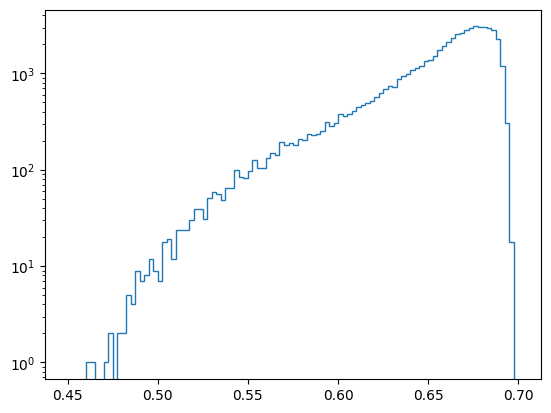

In [289]:
pred_train = clf.score_samples(X)
plt.hist(np.exp(pred_train),range=(0.45,0.7), bins=100, density=False,histtype='step', label ='Train_X', log =True)


In [288]:
print(np.quantile(np.exp(pred_train), 0.128))
print((np.exp(pred_train)<0.5).sum()/len(pred_train))

0.6210560268282056
0.0009222728903007635


In [201]:
proton_score = clf.score_samples(select_dict['photon'])
pr_score = clf.score_samples(select_dict['pr'])
proton_score

array([-0.44218478, -0.41800974, -0.4052827 , ..., -0.41714595,
       -0.39746314, -0.40028702])

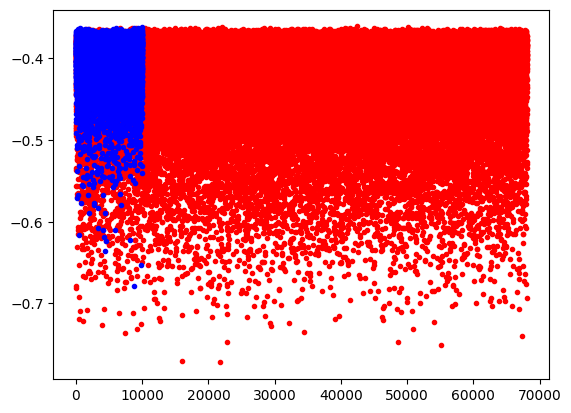

In [202]:
test_score = clf.score_samples(X)
plt.plot(test_score[:-10000], 'r.')
plt.plot(test_score[-10000:], 'b.')

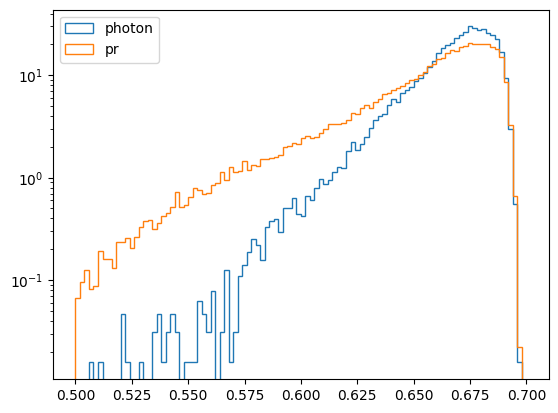

In [217]:
plt.hist(np.exp(proton_score),range=(0.5,0.7), bins=100, density=True,histtype='step', label ='photon', log =True)
plt.hist(np.exp(pr_score),range=(0.5,0.7),bins=100, density=True, histtype='step', label ='pr', log =True)
plt.legend()

In [16]:
import pyod

In [218]:
X_train = select_dict['pr'][:-1000]
# X_test = select_dict['pr'][-1000:]
X_test = select_dict['photon']

In [100]:
from pyod.models.knn import KNN 
clf_name = 'KNN'
clf = KNN()
clf.fit(X_train)
y_test_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)
# get the prediction labels and outlier scores of the training data
# y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
# y_train_scores = clf.decision_scores_  # raw outlier scores

# # get the prediction on the test data
# y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
# y_test_scores = clf.decision_function(X_test)  # outlier scores

# # it is possible to get the prediction confidence as well
# y_test_pred, y_test_pred_confidence = clf.predict(X_test, return_confidence=True)

['__abstractmethods__', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__sklearn_clone__', '__sklearn_tags__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_average_path_length_per_tree', '_build_request_for_signature', '_check_feature_names', '_check_n_features', '_compute_chunked_score_samples', '_compute_score_samples', '_decision_path_lengths', '_doc_link_module', '_doc_link_template', '_doc_link_url_param_generator', '_estimator_type', '_fit', '_get_default_requests', '_get_doc_link', '_get_estimator', '_get_estimators_indices', '_get_metadata_request', '_get_param_names', '_get_tags', '_make_estimator', '_max_features', '_max_samp

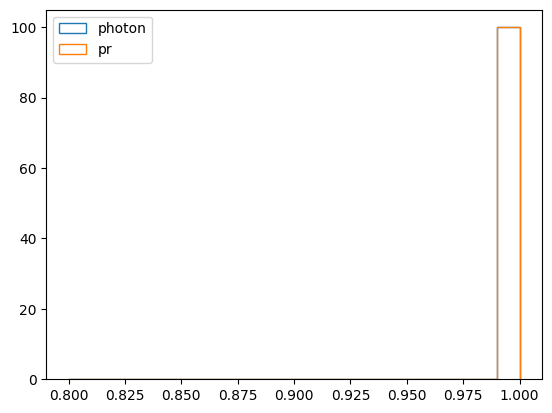

In [103]:
plt.hist(y_test_pred,range=(0.8,1), bins=20, density=True,histtype='step', label ='photon')
plt.hist(y_train_pred,range=(0.8,1),bins=20, density=True, histtype='step', label ='pr')
plt.legend()

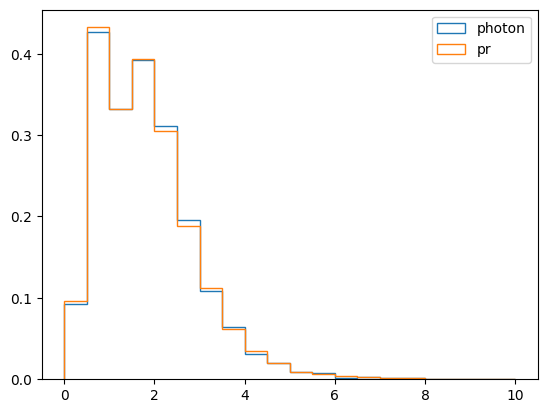

In [95]:
import seaborn as sns
plt.hist(y_test_scores,range=(0,10), bins=20, density=True,histtype='step', label ='photon')
plt.hist(y_train_scores,range=(0,10),bins=20, density=True, histtype='step', label ='pr')
plt.legend()

In [85]:
y_train_scores

array([1.82733342, 1.71652077, 2.38256614, ..., 3.34727713, 0.49072721,
       0.56087427])

In [89]:
sum(y_train_scores>0)

80000

/tmp/ipykernel_15781/4055311444.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test_scores, bins=30, ax=ax, color='red', kde=True, label='photon')
/tmp/ipykernel_15781/4055311444.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train_scores, bins=30, ax=ax, color='blue', kde=True, la

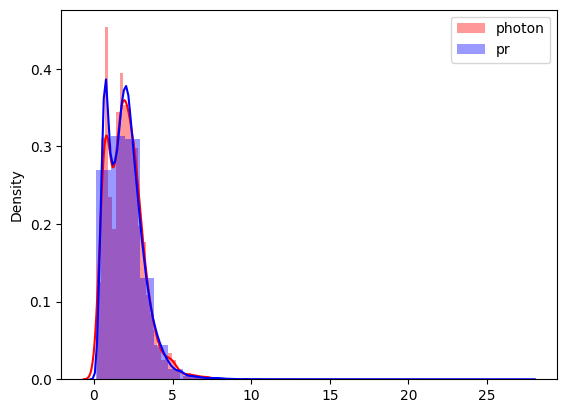

In [35]:
fig, ax = plt.subplots(1,1)
sns.distplot(y_test_scores, bins=30, ax=ax, color='red', kde=True, label='photon')
sns.distplot(y_train_scores, bins=30, ax=ax, color='blue', kde=True, label='pr')
ax.legend()

In [79]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
# Convert your grouped tensors to numpy arrays
X = []
y = []
for class_label in select_dict:
    # Convert tensor to numpy and add to features
    X.append(select_dict[class_label].numpy())
    # Create labels array
    y.extend([class_label] * len(select_dict[class_label]))

# Create full dataset
X = np.vstack(X)  # Shape: [num_samples, latent_dim]
y = np.array(y)    # Shape: [num_samples]

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create and train classifier
clf = RandomForestClassifier(max_depth = 8)
clf.fit(X_train, y_train)

# Evaluate
test_accuracy = clf.score(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.2f}")

Test accuracy: 0.70


/tmp/ipykernel_15781/393726601.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test_scores, bins=30, ax=ax, color='red', kde=True, label='photon')
/tmp/ipykernel_15781/393726601.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train_scores, bins=30, ax=ax, color='blue', kde=True, labe

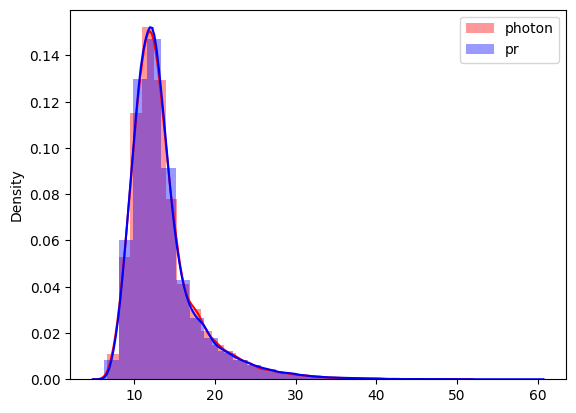

In [51]:
# Example: Training an ECOD detector
from pyod.models.ecod import ECOD
clf = ECOD()
clf.fit(X_train)
y_train_scores = clf.decision_scores_  # Outlier scores for training data
y_test_scores = clf.decision_function(X_test)  # Outlier scores for test data
fig, ax = plt.subplots(1,1)
sns.distplot(y_test_scores, bins=30, ax=ax, color='red', kde=True, label='photon')
sns.distplot(y_train_scores, bins=30, ax=ax, color='blue', kde=True, label='pr')
ax.legend()

# Example from github

In [61]:
from __future__ import division
from __future__ import print_function

import os
import sys

# temporary solution for relative imports in case pyod is not installed
# if pyod is installed, no need to use the following line
sys.path.append(os.path.abspath(os.path.join(os.path.dirname("__file__"), '..')))

import numpy as np
from sklearn.model_selection import train_test_split
from scipy.io import loadmat

from pyod.models.knn import KNN
from pyod.models.combination import aom, moa, average, maximization
from pyod.utils.utility import standardizer
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print

In [67]:
# Define data file and read X and y
# Generate some data if the source data is missing
mat_file = '/home/rfit/Telescope_Array/phd_work/Notebooks/cardio.mat'

try:
    mat = loadmat(mat_file)

except TypeError:
    print('{data_file} does not exist. Use generated data'.format(
        data_file=mat_file))
    X, y = generate_data(train_only=True)  # load data
except IOError:
    print('{data_file} does not exist. Use generated data'.format(
        data_file=mat_file))
    X, y = generate_data(train_only=True)  # load data
else:
    X = mat['X']
    y = mat['y'].ravel()
    
# 60% data for training and 40% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

# standardizing data for processing
X_train_norm, X_test_norm = standardizer(X_train, X_test)

In [76]:
X_train_norm, X_test_norm = standardizer(X_train, X_test)

In [77]:
print("Training data:", X_train.shape, y_train.shape)
print("Test data:", X_test.shape, y_test.shape)

Training data: torch.Size([67314, 8]) (1098,)
Test data: torch.Size([31686, 8]) (733,)


In [78]:
n_clf = 20  # number of base detectors

# Initialize 20 base detectors for combination
k_list = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140,
          150, 160, 170, 180, 190, 200]

train_scores = np.zeros([X_train.shape[0], n_clf])
test_scores = np.zeros([X_test.shape[0], n_clf])

print('Initializing {n_clf} kNN detectors'.format(n_clf=n_clf))

for i in range(n_clf):
    k = k_list[i]

    clf = KNN(n_neighbors=k, method='largest')
    clf.fit(X_train_norm)

    train_scores[:, i] = clf.decision_scores_
    test_scores[:, i] = clf.decision_function(X_test_norm)
    print('Base detector %i is fitted for prediction' % i)

Initializing 20 kNN detectors
Base detector 0 is fitted for prediction
Base detector 1 is fitted for prediction
Base detector 2 is fitted for prediction
Base detector 3 is fitted for prediction
Base detector 4 is fitted for prediction
Base detector 5 is fitted for prediction
Base detector 6 is fitted for prediction
Base detector 7 is fitted for prediction
Base detector 8 is fitted for prediction
Base detector 9 is fitted for prediction
Base detector 10 is fitted for prediction
Base detector 11 is fitted for prediction
Base detector 12 is fitted for prediction
Base detector 13 is fitted for prediction
Base detector 14 is fitted for prediction
Base detector 15 is fitted for prediction
Base detector 16 is fitted for prediction
Base detector 17 is fitted for prediction
Base detector 18 is fitted for prediction
Base detector 19 is fitted for prediction


In [71]:
# Decision scores have to be normalized before combination
train_scores_norm, test_scores_norm = standardizer(train_scores,
                                                   test_scores)

# Predicted scores from all base detectors on the test data is 
# stored in train_scores_norm and test_scores_norm
print('Decision score matrix on training data', train_scores_norm.shape)
print('Decision score matrix on test data', test_scores_norm.shape)
# Combine and evaluate the combination result

# Combination by average
y_by_average = average(test_scores_norm)
evaluate_print('Combination by Average', y_test, y_by_average)

# Combination by max
y_by_maximization = maximization(test_scores_norm)
evaluate_print('Combination by Maximization', y_test, y_by_maximization)

# Combination by aom
y_by_aom = aom(test_scores_norm, n_buckets=5)
evaluate_print('Combination by AOM', y_test, y_by_aom)

# Combination by moa
y_by_moa = moa(test_scores_norm, n_buckets=5)
evaluate_print('Combination by MOA', y_test, y_by_moa)

Decision score matrix on training data (1098, 20)
Decision score matrix on test data (733, 20)
Combination by Average ROC:0.9078, precision @ rank n:0.4677
Combination by Maximization ROC:0.9082, precision @ rank n:0.4839
Combination by AOM ROC:0.9147, precision @ rank n:0.4677
Combination by MOA ROC:0.9144, precision @ rank n:0.4839


# HIST from DL classifiactor

In [1]:
import os
path = '/home/rfit/Telescope_Array/phd_work/Models/Classification/test_particles/predict_part/best'
print(os.path.exists(path))


True


In [2]:
cd ../src/particle_classification

/home/rfit/Telescope_Array/phd_work/src/particle_classification


In [46]:
# import importlib
# importlib.reload(CLpip)

Using device: cuda


<module 'classification_pipline' from '/home/rfit/Telescope_Array/phd_work/src/particle_classification/classification_pipline.py'>

In [3]:
import classification_pipline as CLpip

Using device: cuda


2025-04-09 00:12:23.418297: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744146743.432195   33808 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744146743.436439   33808 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1744146743.447243   33808 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1744146743.447262   33808 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1744146743.447264   33808 computation_placer.cc:177] computation placer alr

Using device: cuda


In [4]:
config = 'classification_config.yaml'
pipline = CLpip.ClassificationPipline(config, many_val_loaders =False)

['__pycache__', 'classification_pipline.py', 'classification_metrics.py', 'classification', 'classification_loss.py', 'test_particles', 'config.yaml', 'classification_models.py', 'classification_config.yaml', '.ipynb_checkpoints']
mc_params True
keys ['norm_param', 'test', 'train', 'val']
[[ 0.41741616  1.2199497  -0.58500695 -0.26896065 -1.1912816  -0.799549  ]
 [-0.3820865   1.2243679  -0.26313022 -0.27197015 -1.0247972  -0.5572181 ]
 [ 1.1942499   0.4571777  -0.69276047 -0.27348265 -0.5588084  -0.58575124]
 ...
 [ 1.5062277  -1.667156   -0.6320696  -0.27252725  2.2770033  -0.680192  ]
 [ 2.3073862   0.7368079  -0.7032635  -0.27180845  2.3032172  -0.30805525]
 [ 2.3089404  -0.9000476  -0.7650315  -0.27359855  2.8478467  -0.6592944 ]] (235044152, 6) float32
mc_params True
keys ['norm_param', 'test', 'train', 'val']
[[ 1.8070776   0.62659997 -0.5891663  -0.27372506 -1.6578282   0.06006272]
 [ 1.0094041   0.62656957 -0.584003   -0.271912   -0.95201266 -0.6918464 ]
 [ 1.0047575  -0.17333

In [5]:
y_preds, y_target = pipline.test(path)

  0%|          | 0/572 [00:00<?, ?it/s]/home/rfit/Telescope_Array/phd_work/src/train_VAE/datasets.py:38: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(self.data[st:fn]), torch.tensor(mc_params[1]), torch.tensor(mc_params)
100%|██████████| 572/572 [01:08<00:00,  8.30it/s]


{'precision': 0.7377697221509645, 'recall': 0.9007360019715713, 'f1_score': 0.8111485240758786}


In [14]:
y_preds, y_target = torch.tensor(y_preds),  torch.tensor(y_target)

In [15]:
y_preds[1]

tensor([-1.2889, -0.5971])

In [22]:
y_0 = y_preds[torch.where(y_target==0)]
y_1 = y_preds[torch.where(y_target==1)]
# 0- photon, 1- proton

(array([9.41296976e-02, 2.71232258e-02, 1.81561700e-02, 1.50589033e-02,
        1.32567638e-02, 1.22684110e-02, 1.19975766e-02, 1.13429533e-02,
        1.15598775e-02, 1.17190408e-02, 1.19475172e-02, 1.25918719e-02,
        1.33568827e-02, 1.37329702e-02, 1.46905172e-02, 1.55800348e-02,
        1.65491340e-02, 1.75387704e-02, 1.85887348e-02, 1.93575963e-02,
        2.00417419e-02, 2.09903039e-02, 2.12572875e-02, 2.18939408e-02,
        2.22161181e-02, 2.22918490e-02, 2.25408626e-02, 2.18875229e-02,
        2.15281218e-02, 2.12791083e-02, 2.08645135e-02, 2.04948439e-02,
        1.98761607e-02, 1.91393886e-02, 1.83410048e-02, 1.80637526e-02,
        1.77274559e-02, 1.68507741e-02, 1.62128373e-02, 1.57379145e-02,
        1.47700989e-02, 1.42284302e-02, 1.36290006e-02, 1.31296899e-02,
        1.21528892e-02, 1.17857867e-02, 1.12107451e-02, 1.04829580e-02,
        1.01004526e-02, 9.46379933e-03, 8.94010068e-03, 8.56272960e-03,
        8.01207587e-03, 7.34076609e-03, 6.92103703e-03, 6.349846

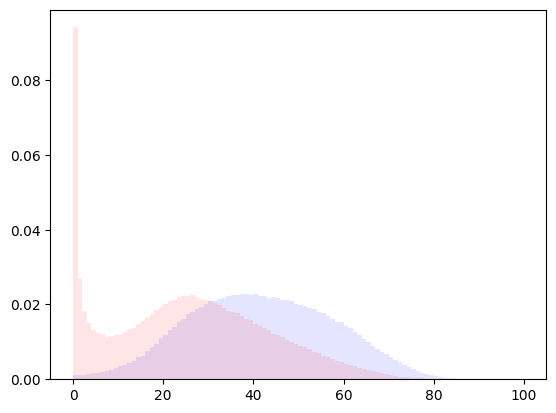

In [41]:
import matplotlib.pyplot as plt
import torch
import numpy as np
fig  = plt.figure()
plt.hist(torch.softmax(y_0, dim=1)[:,0]*100, label = 'photon', density = True, color=(0,0,1,0.1), range = (0,100), bins=100)
plt.hist(torch.softmax(y_1, dim=1)[:,0]*100, label = 'pr', density = True, color=(1,0,0,0.1), range = (0,100), bins=100)
# locs, _ = plt.yticks() 
# print(locs)
# plt.yticks(locs,np.round(locs/len(y_preds),3))
# plt.legend()

In [4]:
path = '/home/rfit/Telescope_Array/phd_work/Models/Classification/TransformerClassificationModel_V2/best'
print(os.path.exists(path))

True


In [5]:
config = 'classification_config.yaml'
pipline = CLpip.ClassificationPipline(config, many_val_loaders =False)
y_preds, y_target = pipline.test(path)

['__pycache__', 'classification_pipline.py', 'classification_metrics.py', 'classification', 'classification_loss.py', 'test_particles', 'config.yaml', 'classification_models.py', 'classification_config.yaml', '.ipynb_checkpoints']
mc_params True
keys ['norm_param', 'test', 'train', 'val']
[[ 0.41741616  1.2199497  -0.58500695 -0.26896065 -1.1912816  -0.799549  ]
 [-0.3820865   1.2243679  -0.26313022 -0.27197015 -1.0247972  -0.5572181 ]
 [ 1.1942499   0.4571777  -0.69276047 -0.27348265 -0.5588084  -0.58575124]
 ...
 [ 1.5062277  -1.667156   -0.6320696  -0.27252725  2.2770033  -0.680192  ]
 [ 2.3073862   0.7368079  -0.7032635  -0.27180845  2.3032172  -0.30805525]
 [ 2.3089404  -0.9000476  -0.7650315  -0.27359855  2.8478467  -0.6592944 ]] (235044152, 6) float32
mc_params True
keys ['norm_param', 'test', 'train', 'val']
[[ 1.8070776   0.62659997 -0.5891663  -0.27372506 -1.6578282   0.06006272]
 [ 1.0094041   0.62656957 -0.584003   -0.271912   -0.95201266 -0.6918464 ]
 [ 1.0047575  -0.17333

  0%|          | 0/572 [00:00<?, ?it/s]/home/rfit/Telescope_Array/phd_work/src/train_VAE/datasets.py:38: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(self.data[st:fn]), torch.tensor(mc_params[1]), torch.tensor(mc_params)
100%|██████████| 572/572 [01:24<00:00,  6.74it/s]


{'precision': 0.9754535879337483, 'recall': 0.9474260468196859, 'f1_score': 0.9612355552256435}


In [7]:
import torch
y_preds, y_target = torch.tensor(y_preds),  torch.tensor(y_target)

(array([7.53974590e-01, 4.30215872e-02, 2.31762323e-02, 1.54491101e-02,
        1.16638471e-02, 9.21093503e-03, 7.64368982e-03, 6.27026444e-03,
        5.57328315e-03, 4.80313808e-03, 4.25890224e-03, 3.92388913e-03,
        3.45795136e-03, 3.15759479e-03, 2.94580489e-03, 2.57356811e-03,
        2.46703137e-03, 2.41697194e-03, 2.14742117e-03, 2.14100329e-03,
        2.03831728e-03, 1.78031869e-03, 1.77903511e-03, 1.79315444e-03,
        1.71485636e-03, 1.47226066e-03, 1.51205149e-03, 1.40936548e-03,
        1.33876885e-03, 1.35673890e-03, 1.23864999e-03, 1.32208237e-03,
        1.28357512e-03, 1.20912776e-03, 1.11927750e-03, 1.15650118e-03,
        1.08205382e-03, 1.12312823e-03, 1.01787507e-03, 1.01915864e-03,
        1.03584512e-03, 9.49845586e-04, 9.65248487e-04, 9.81934964e-04,
        8.94651856e-04, 9.43427710e-04, 9.42144135e-04, 9.26741234e-04,
        8.65129628e-04, 8.77965379e-04, 8.72831079e-04, 7.80413671e-04,
        7.93249422e-04, 8.13786624e-04, 8.34323825e-04, 7.303542

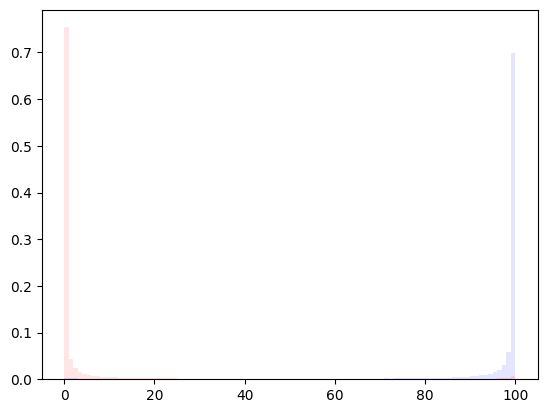

In [8]:
y_0 = y_preds[torch.where(y_target==0)]
y_1 = y_preds[torch.where(y_target==1)]
import matplotlib.pyplot as plt
import torch
import numpy as np
fig  = plt.figure()
plt.hist(torch.softmax(y_0, dim=1)[:,0]*100, label = 'photon', density = True, color=(0,0,1,0.1), range = (0,100), bins=100)
plt.hist(torch.softmax(y_1, dim=1)[:,0]*100, label = 'pr', density = True, color=(1,0,0,0.1), range = (0,100), bins=100)
# locs, _ = plt.yticks() 

# KDE

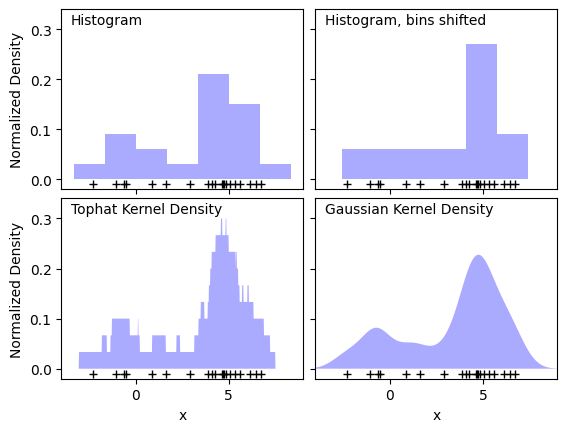

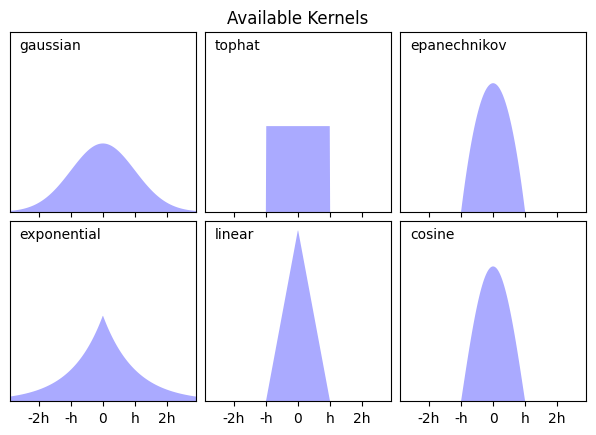

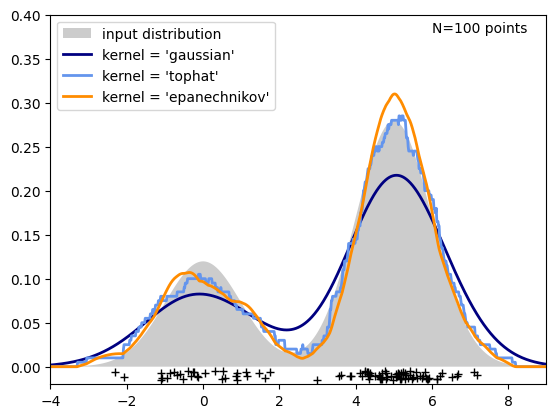

In [105]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

from sklearn.neighbors import KernelDensity

# ----------------------------------------------------------------------
# Plot the progression of histograms to kernels
np.random.seed(1)
N = 20
X = np.concatenate(
    (np.random.normal(0, 1, int(0.3 * N)), np.random.normal(5, 1, int(0.7 * N)))
)[:, np.newaxis]
X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]
bins = np.linspace(-5, 10, 10)

fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.05, wspace=0.05)

# histogram 1
ax[0, 0].hist(X[:, 0], bins=bins, fc="#AAAAFF", density=True)
ax[0, 0].text(-3.5, 0.31, "Histogram")

# histogram 2
ax[0, 1].hist(X[:, 0], bins=bins + 0.75, fc="#AAAAFF", density=True)
ax[0, 1].text(-3.5, 0.31, "Histogram, bins shifted")

# tophat KDE
kde = KernelDensity(kernel="tophat", bandwidth=0.75).fit(X)
log_dens = kde.score_samples(X_plot)
ax[1, 0].fill(X_plot[:, 0], np.exp(log_dens), fc="#AAAAFF")
ax[1, 0].text(-3.5, 0.31, "Tophat Kernel Density")

# Gaussian KDE
kde = KernelDensity(kernel="gaussian", bandwidth=0.75).fit(X)
log_dens = kde.score_samples(X_plot)
ax[1, 1].fill(X_plot[:, 0], np.exp(log_dens), fc="#AAAAFF")
ax[1, 1].text(-3.5, 0.31, "Gaussian Kernel Density")

for axi in ax.ravel():
    axi.plot(X[:, 0], np.full(X.shape[0], -0.01), "+k")
    axi.set_xlim(-4, 9)
    axi.set_ylim(-0.02, 0.34)

for axi in ax[:, 0]:
    axi.set_ylabel("Normalized Density")

for axi in ax[1, :]:
    axi.set_xlabel("x")

# ----------------------------------------------------------------------
# Plot all available kernels
X_plot = np.linspace(-6, 6, 1000)[:, None]
X_src = np.zeros((1, 1))

fig, ax = plt.subplots(2, 3, sharex=True, sharey=True)
fig.subplots_adjust(left=0.05, right=0.95, hspace=0.05, wspace=0.05)


def format_func(x, loc):
    if x == 0:
        return "0"
    elif x == 1:
        return "h"
    elif x == -1:
        return "-h"
    else:
        return "%ih" % x


for i, kernel in enumerate(
    ["gaussian", "tophat", "epanechnikov", "exponential", "linear", "cosine"]
):
    axi = ax.ravel()[i]
    log_dens = KernelDensity(kernel=kernel).fit(X_src).score_samples(X_plot)
    axi.fill(X_plot[:, 0], np.exp(log_dens), "-k", fc="#AAAAFF")
    axi.text(-2.6, 0.95, kernel)

    axi.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
    axi.xaxis.set_major_locator(plt.MultipleLocator(1))
    axi.yaxis.set_major_locator(plt.NullLocator())

    axi.set_ylim(0, 1.05)
    axi.set_xlim(-2.9, 2.9)

ax[0, 1].set_title("Available Kernels")

# ----------------------------------------------------------------------
# Plot a 1D density example
N = 100
np.random.seed(1)
X = np.concatenate(
    (np.random.normal(0, 1, int(0.3 * N)), np.random.normal(5, 1, int(0.7 * N)))
)[:, np.newaxis]

X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]

true_dens = 0.3 * norm(0, 1).pdf(X_plot[:, 0]) + 0.7 * norm(5, 1).pdf(X_plot[:, 0])

fig, ax = plt.subplots()
ax.fill(X_plot[:, 0], true_dens, fc="black", alpha=0.2, label="input distribution")
colors = ["navy", "cornflowerblue", "darkorange"]
kernels = ["gaussian", "tophat", "epanechnikov"]
lw = 2

for color, kernel in zip(colors, kernels):
    kde = KernelDensity(kernel=kernel, bandwidth=1.0).fit(X)
    log_dens = kde.score_samples(X_plot)
    ax.plot(
        X_plot[:, 0],
        np.exp(log_dens),
        color=color,
        lw=lw,
        linestyle="-",
        label="kernel = '{0}'".format(kernel),
    )

ax.text(6, 0.38, "N={0} points".format(N))

ax.legend(loc="upper left")
ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), "+k")

ax.set_xlim(-4, 9)
ax.set_ylim(-0.02, 0.4)
plt.show()

In [40]:
X.shape

torch.Size([68068, 8])

In [237]:
# torch.Size([68068, 8])
X = select_dict['pr'][:60000]
X_test = select_dict['pr'][60000:]

In [174]:
# fig, axs = plt.subplot(1,1)
kde = KernelDensity(kernel="gaussian", bandwidth=0.2 ).fit(X)
log_dens = kde.score_samples(X)
np.exp(log_dens)
# axs[0].plot(
#     X_plot[:, 0],
#     np.exp(log_dens),
#     color=color,
#     lw=lw,
#     linestyle="-",
#     label="kernel = '{0}'".format(kernel),
# )

array([0.65632305, 0.01098521, 0.0042091 , ..., 0.00590105, 0.00417726,
       0.00431177])

In [236]:
Y = select_dict['photon']
# log_dens_Y = kde.score_samples(Y)
# np.exp(log_dens_Y)

In [176]:
log_dens_pr_test = kde.score_samples(X_test)
np.exp(log_dens_pr_test)

array([2.96375974e-06, 9.57936245e-01, 2.22072571e-03, ...,
       3.94908372e-02, 1.77806887e-01, 9.85832895e-03])

In [177]:
threshold = np.quantile(log_dens_pr_test, 0.05)
outliers_log_dens_pr_test= X_test[log_dens_pr_test < threshold]
outliers_log_dens_pr_test.shape, X_test.shape

((404, 8), (8068, 8))

In [178]:
print(threshold)
outliers_Y= Y[log_dens_Y < threshold]
outliers_Y.shape, log_dens_Y.shape

-11.485870947755247


((301, 8), (31932,))

In [179]:
np.exp(log_dens)

array([0.65632305, 0.01098521, 0.0042091 , ..., 0.00590105, 0.00417726,
       0.00431177])

(array([3.7817e+04, 3.2650e+03, 1.7610e+03, 1.1300e+03, 7.8300e+02,
        6.9800e+02, 5.4000e+02, 5.1400e+02, 4.7600e+02, 4.9700e+02,
        4.6900e+02, 4.6800e+02, 4.1900e+02, 4.6900e+02, 4.5900e+02,
        3.9800e+02, 3.9300e+02, 3.7300e+02, 3.4900e+02, 3.3700e+02,
        3.0600e+02, 2.8800e+02, 2.8600e+02, 2.8600e+02, 2.5800e+02,
        2.5500e+02, 2.6600e+02, 2.2800e+02, 2.0500e+02, 1.8600e+02,
        1.8900e+02, 1.7700e+02, 2.2700e+02, 1.8800e+02, 2.2900e+02,
        2.1800e+02, 2.1800e+02, 2.1700e+02, 1.8400e+02, 1.8200e+02,
        1.9300e+02, 1.8700e+02, 2.0900e+02, 1.8500e+02, 1.7300e+02,
        1.5200e+02, 1.6100e+02, 1.3200e+02, 1.3600e+02, 1.4900e+02,
        1.3700e+02, 1.1800e+02, 1.2900e+02, 1.0200e+02, 9.2000e+01,
        1.1400e+02, 1.1300e+02, 9.9000e+01, 8.2000e+01, 8.0000e+01,
        7.9000e+01, 8.4000e+01, 7.1000e+01, 7.4000e+01, 5.2000e+01,
        5.9000e+01, 4.1000e+01, 5.2000e+01, 4.8000e+01, 4.8000e+01,
        3.6000e+01, 4.7000e+01, 2.7000e+01, 4.00

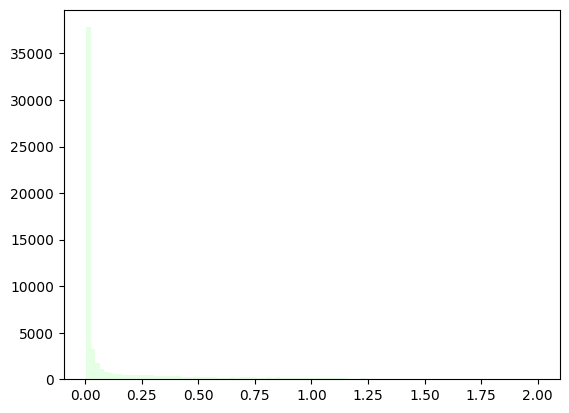

In [180]:
plt.hist(np.exp(log_dens), bins=100, color=(0,1,0,0.1),density=False, label = "Train")

/home/rfit/miniconda3/envs/python39/lib/python3.9/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


(array([3587.3605948 , 1236.05947955, 1050.18587361,  855.01858736,
        799.25650558,  864.31226766,  864.31226766,  836.43122677,
        641.26394052,  650.55762082,  762.08178439,  771.37546468,
        566.91449814,  585.50185874,  669.14498141,  539.03345725,
        576.20817844,  613.38289963,  576.20817844,  641.26394052,
        520.44609665,  483.27137546,  473.97769517,  585.50185874,
        436.80297398,  408.92193309,  576.20817844,  399.62825279,
        613.38289963,  455.39033457,  548.32713755,  446.09665428,
        501.85873606,  408.92193309,  427.50929368,  381.04089219,
        501.85873606,  483.27137546,  566.91449814,  501.85873606,
        446.09665428,  371.7472119 ,  381.04089219,  381.04089219,
        408.92193309,  427.50929368,  408.92193309,  371.7472119 ,
        362.4535316 ,  483.27137546,  418.21561338,  492.56505576,
        436.80297398,  529.73977695,  306.69144981,  492.56505576,
        288.10408922,  408.92193309,  381.04089219,  306.6914

Text(0.5, 1.0, 'all')

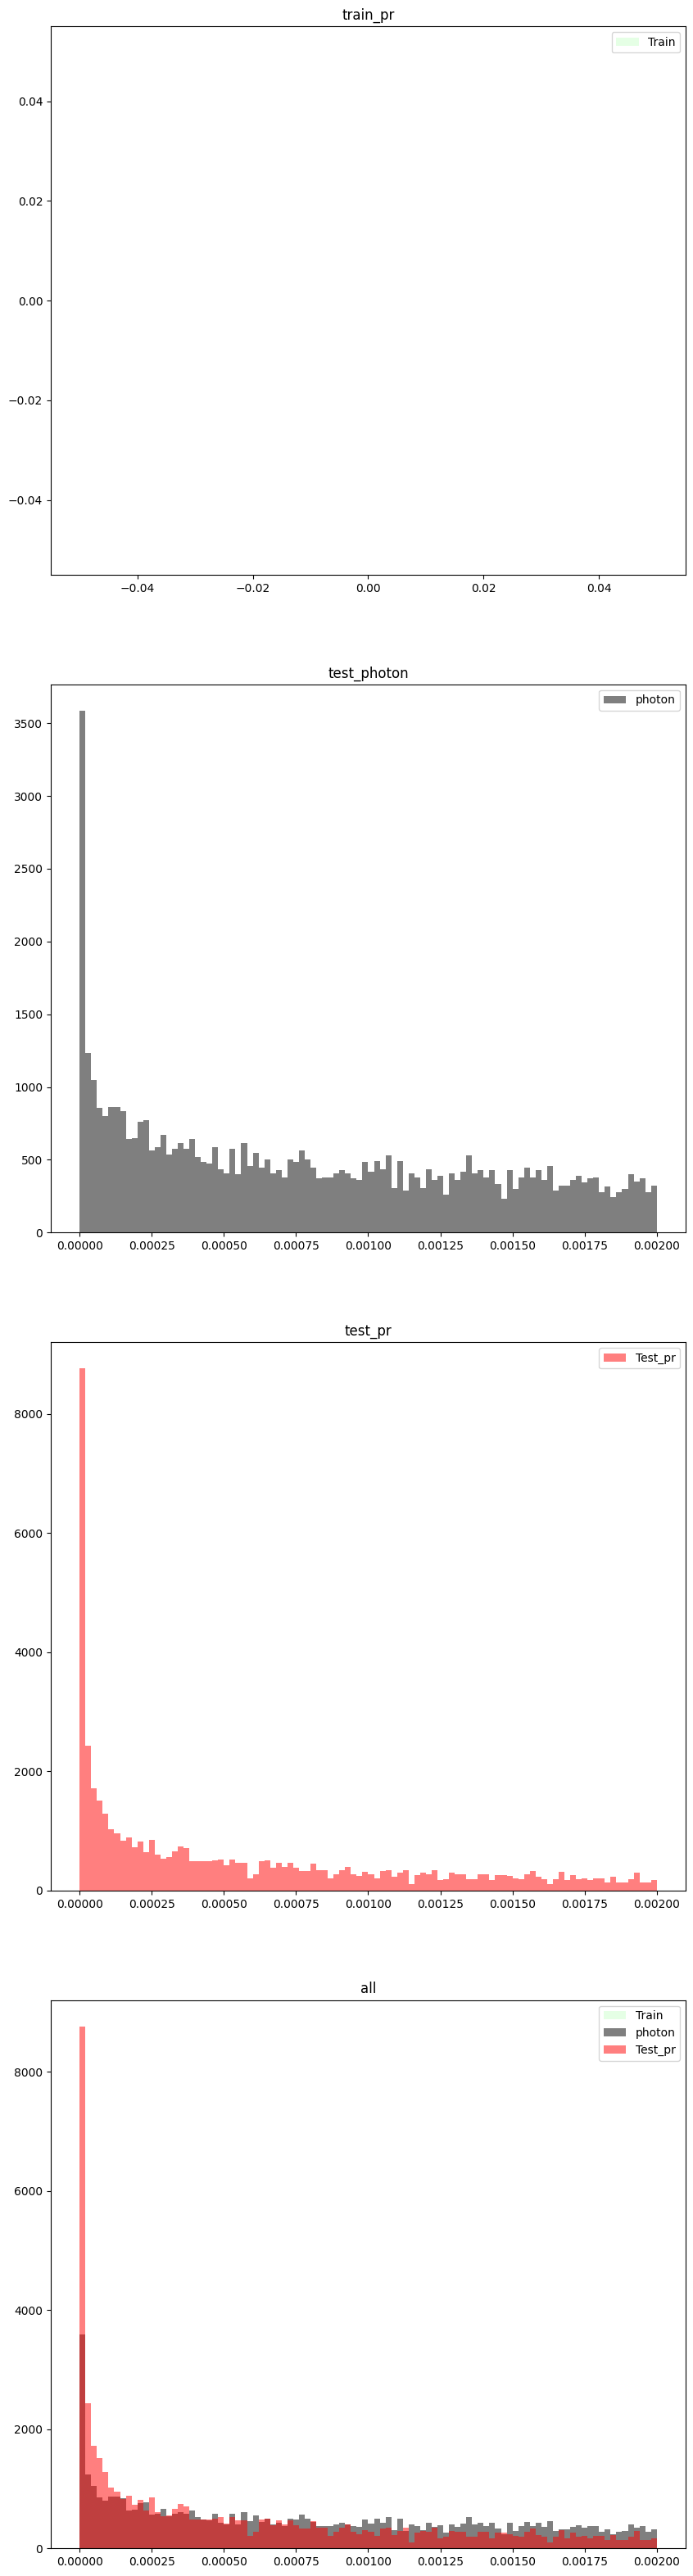

In [181]:
fig, axs = plt.subplots(4,1, figsize=(10,40))
x_lim=0.002
axs[0].hist(np.exp(log_dens), range =(0.0, x_lim), bins=100, color=(0,1,0,0.1),density=True, label = "Train")
print(axs[1].hist(np.exp(log_dens_Y), range =(0, x_lim), bins=100, color=(0,0,0,0.5),density=True, label = "photon"))
print(axs[2].hist(np.exp(log_dens_pr_test), range =(0.0,x_lim), bins=100, color=(1,0,0,0.5), density=True, label = "Test_pr"))
axs[0].legend()
axs[1].legend()
axs[2].legend()
axs[0].set_title('train_pr')
axs[1].set_title('test_photon')
axs[2].set_title('test_pr')


axs[3].hist(np.exp(log_dens), range =(0.0,x_lim), bins=100, color=(0,1,0,0.1),density=True, label = "Train")
print(axs[3].hist(np.exp(log_dens_Y), range =(0, x_lim), bins=100, color=(0,0,0,0.5),density=True, label = "photon"))
print(axs[3].hist(np.exp(log_dens_pr_test), range =(0.0,x_lim), bins=100, color=(1,0,0,0.5), density=True, label = "Test_pr"))
axs[3].legend()
axs[3].set_title('all')

In [195]:
th_01 = np.quantile(np.exp(log_dens), 0.1)
th_90 = np.quantile(np.exp(log_dens), 0.9)
th_01_pr = np.quantile(np.exp(log_dens_pr_test), 0.1)
th_90_pr = np.quantile(np.exp(log_dens_pr_test), 0.9)
print(th_01, th_01_pr, th_90, th_90_pr)
less_01 = sum(np.exp(log_dens_Y)<th_01)
more_90 = sum(np.exp(log_dens_Y)>th_90)
less_01 = round(less_01/len(log_dens_Y),3)
more_90 = round(more_90/len(log_dens_Y),3)
print(less_01)

2.5208817829915026e-07 2.5431509852415815e-07 1.176161065419133e-06 1.1765403151433547e-06
0.011


In [197]:
'{:.3g}'.format(th_01)

'2.52e-07'

In [291]:
1/60000**0.2

0.11075663432482899

In [ ]:
for bandwidth in tqdm(np.arange(0.4 ,5.5,0.2)):
    print(f'start bandwidth={bandwidth}')
    kde = KernelDensity(kernel="gaussian", bandwidth=bandwidth).fit(X)
    log_dens = kde.score_samples(X)
    log_dens_Y = kde.score_samples(Y)
    log_dens_pr_test = kde.score_samples(X_test)

    th_01 = np.quantile(np.exp(log_dens), 0.1)
    th_90 = np.quantile(np.exp(log_dens), 0.9)
    th_01_pr = np.quantile(np.exp(log_dens_pr_test), 0.1)
    th_90_pr = np.quantile(np.exp(log_dens_pr_test), 0.9)
    less_01 = sum(np.exp(log_dens_Y)<th_01)
    more_90 = sum(np.exp(log_dens_Y)>th_90)
    less_01 = round(less_01/len(log_dens_Y),3)
    more_90 = round(more_90/len(log_dens_Y),3)
    
    print(th_01, th_01_pr, th_90, th_90_pr)
    print(less_01, more_90)
    #hists
    fig, axs = plt.subplots(4,1, figsize=(10,40))
    x_lim=0.002
    axs[0].hist(np.exp(log_dens), bins=100, color=(0,1,0,0.1),density=True, label = "Train")
    axs[1].hist(np.exp(log_dens_Y), bins=100, color=(0,0,0,0.5),density=True, label = "photon")
    axs[2].hist(np.exp(log_dens_pr_test), bins=100, color=(1,0,0,0.5), density=True, label = "Test_pr")
    axs[0].legend()
    axs[1].legend()
    axs[2].legend()
    axs[0].set_title(f'train_pr, th01 {th_01:.3g} th90 {th_90:.3g}')
    axs[1].set_title(f'test_photon, th01 {th_01_pr:.3g} th90 {th_90_pr:.3g}')

    axs[2].set_title('test_pr')
    
    
    axs[3].hist(np.exp(log_dens), bins=100, color=(0,1,0,0.1),density=True, label = "Train")
    axs[3].hist(np.exp(log_dens_Y), bins=100, color=(0,0,0,0.5),density=True, label = "photon")
    axs[3].hist(np.exp(log_dens_pr_test), bins=100, color=(1,0,0,0.5), density=True, label = "Test_pr")
    axs[3].legend()
    axs[3].set_title(f'all less {less_01} more {more_90}')
    plt.savefig(f'hists/bandwidth={bandwidth}.png')
    del fig
    print(f'end bandwidth={bandwidth}')

  0%|          | 0/26 [00:00<?, ?it/s]

start bandwidth=0.4
6.39727408667463e-05 4.802345347865266e-05 0.02641925101288115 0.02666466720829651
0.023 0.097


  4%|▍         | 1/26 [10:28<4:22:02, 628.92s/it]

end bandwidth=0.4
start bandwidth=0.6000000000000001
1.90198359426535e-05 1.8398243119984074e-05 0.0030177880011363844 0.0030253277374405764
0.016 0.101


  8%|▊         | 2/26 [21:53<4:24:41, 661.73s/it]

end bandwidth=0.6000000000000001
start bandwidth=0.8000000000000002
8.543132252170186e-06 8.483787806575419e-06 0.0005424694482252016 0.0005443563434981475
0.014 0.103


 12%|█▏        | 3/26 [33:35<4:20:39, 679.97s/it]

end bandwidth=0.8000000000000002
start bandwidth=1.0000000000000002
4.204522592005604e-06 4.211831021195702e-06 0.00013167393199503557 0.0001319823992294973
0.013 0.108


 15%|█▌        | 4/26 [45:24<4:13:35, 691.59s/it]

end bandwidth=1.0000000000000002
start bandwidth=1.2000000000000002
2.221314593174112e-06 2.262484607419691e-06 3.96749737171502e-05 3.968967055071773e-05
0.013 0.113


 19%|█▉        | 5/26 [57:15<4:04:29, 698.56s/it]

end bandwidth=1.2000000000000002
start bandwidth=1.4000000000000004
1.2234434624375346e-06 1.2425051447170142e-06 1.4037852503953052e-05 1.4024147728763118e-05
0.012 0.117


 23%|██▎       | 6/26 [1:09:03<3:53:56, 701.80s/it]

end bandwidth=1.4000000000000004
start bandwidth=1.6000000000000005


 19%|█▉        | 4/21 [48:33<3:26:24, 728.48s/it]


KeyboardInterrupt: 

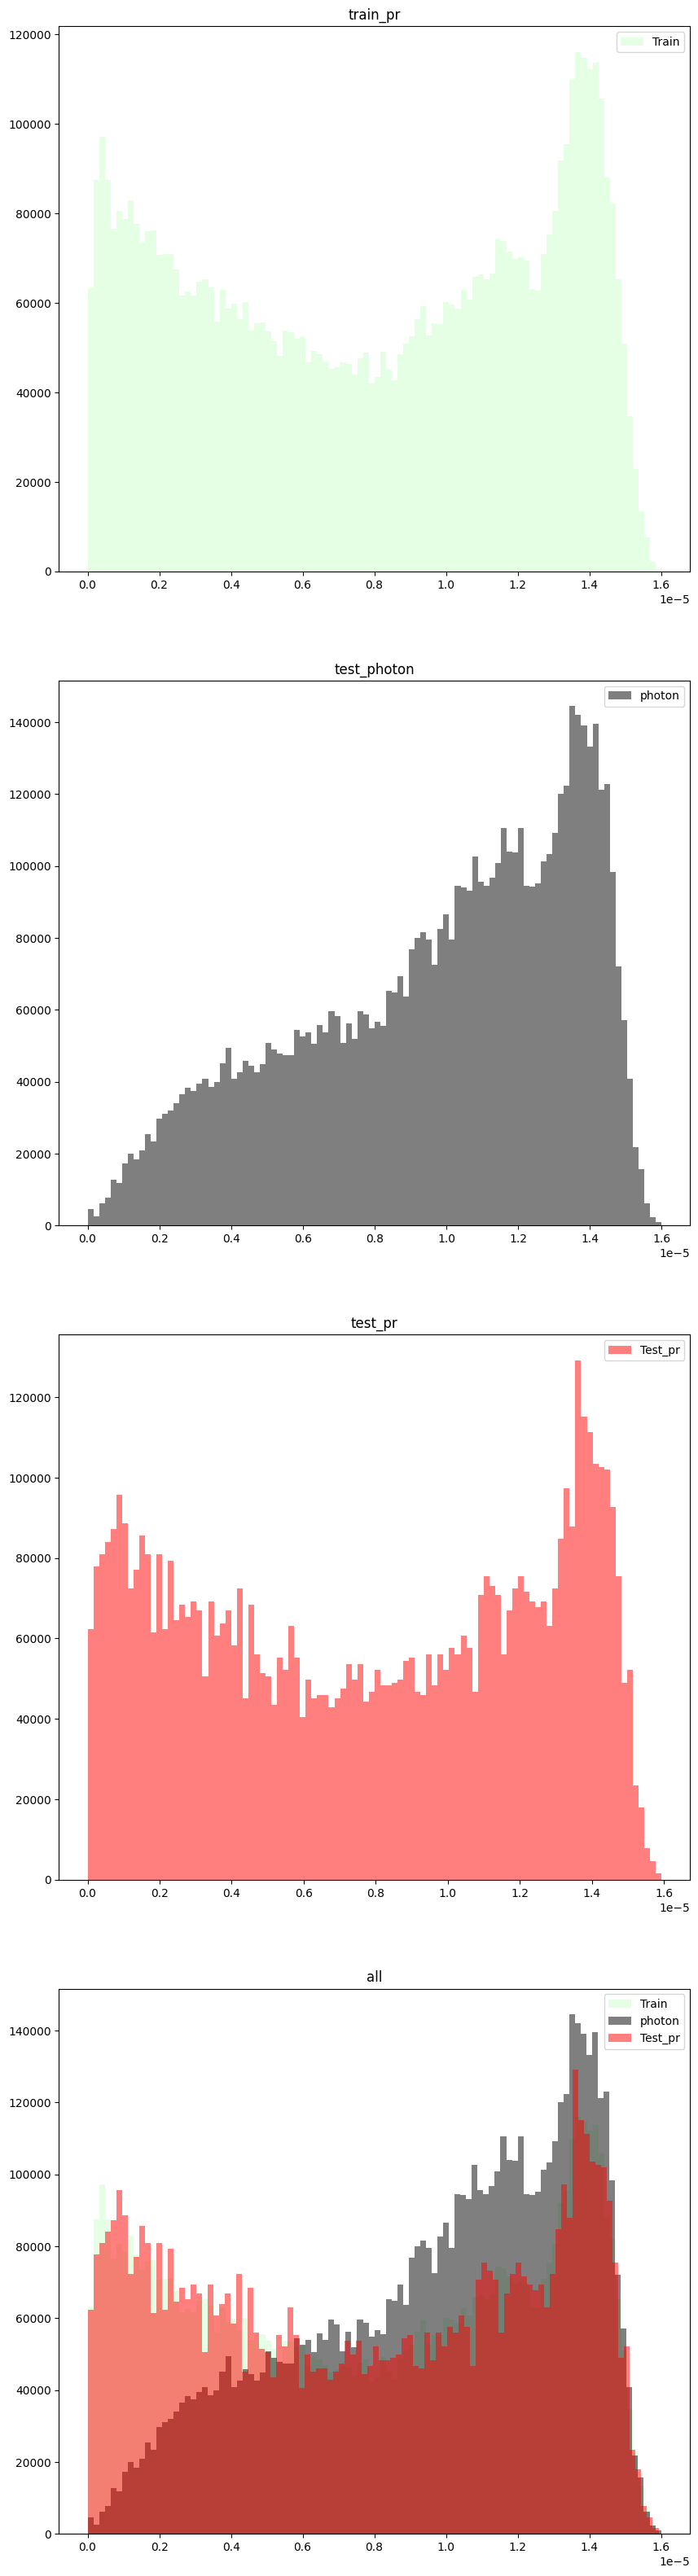

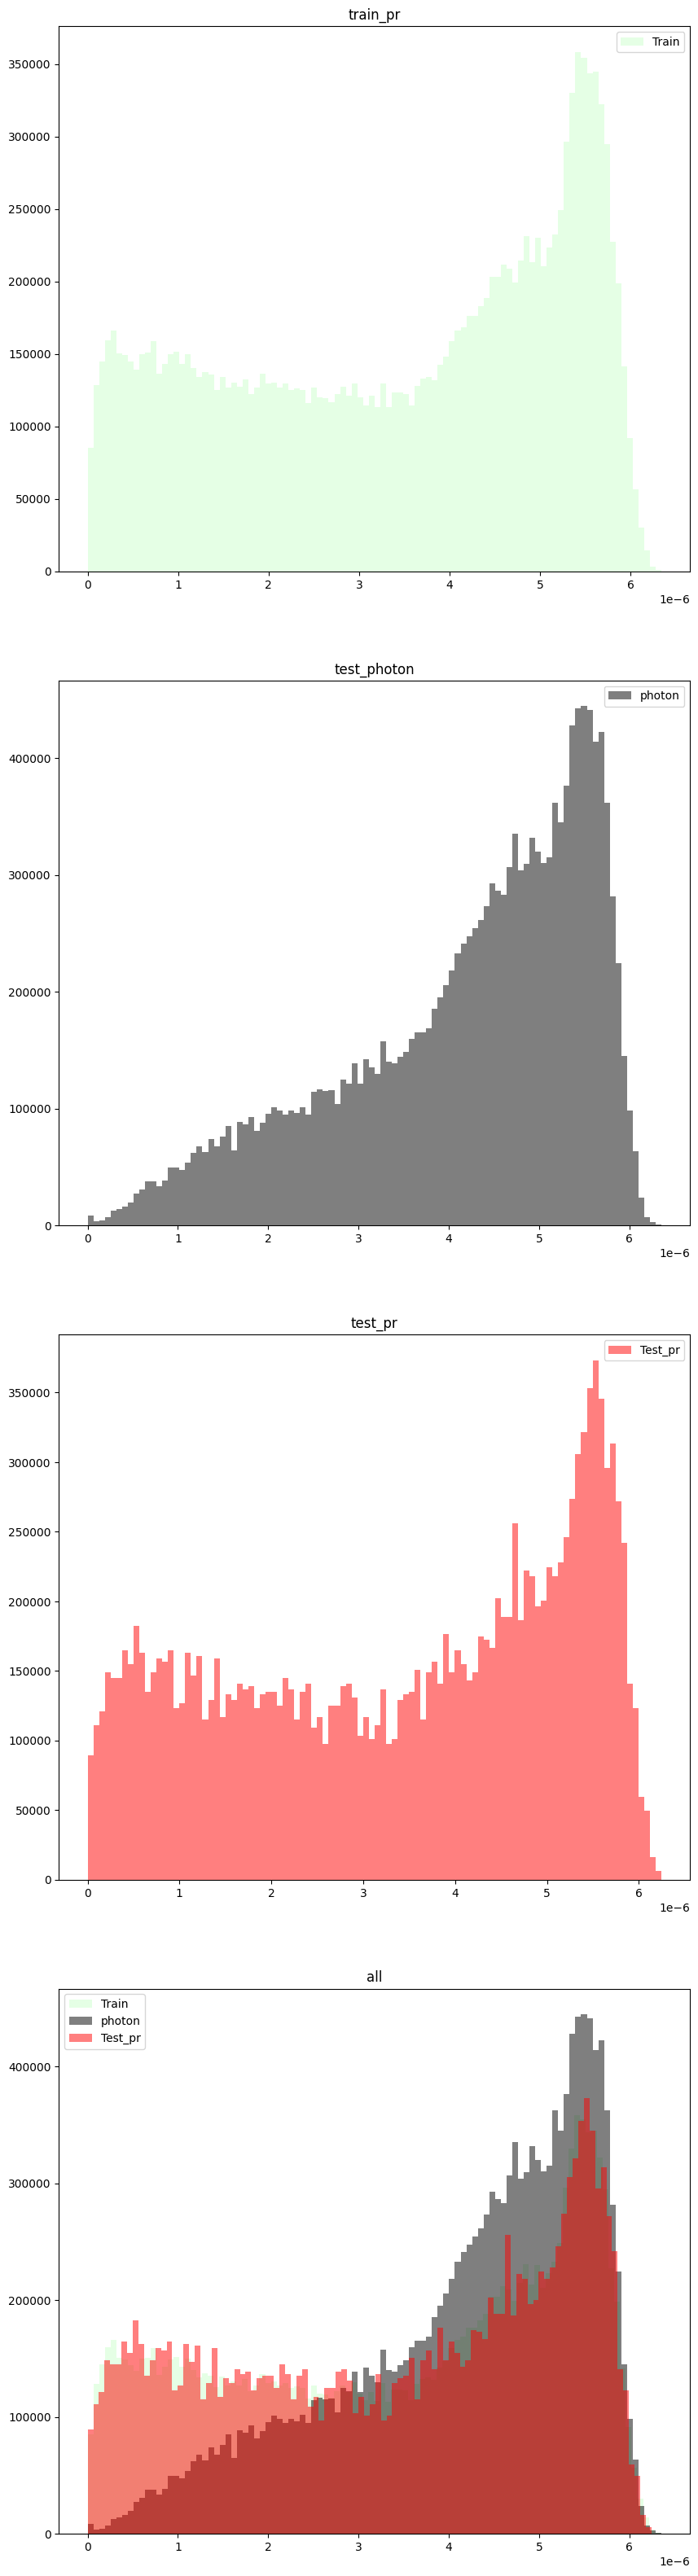

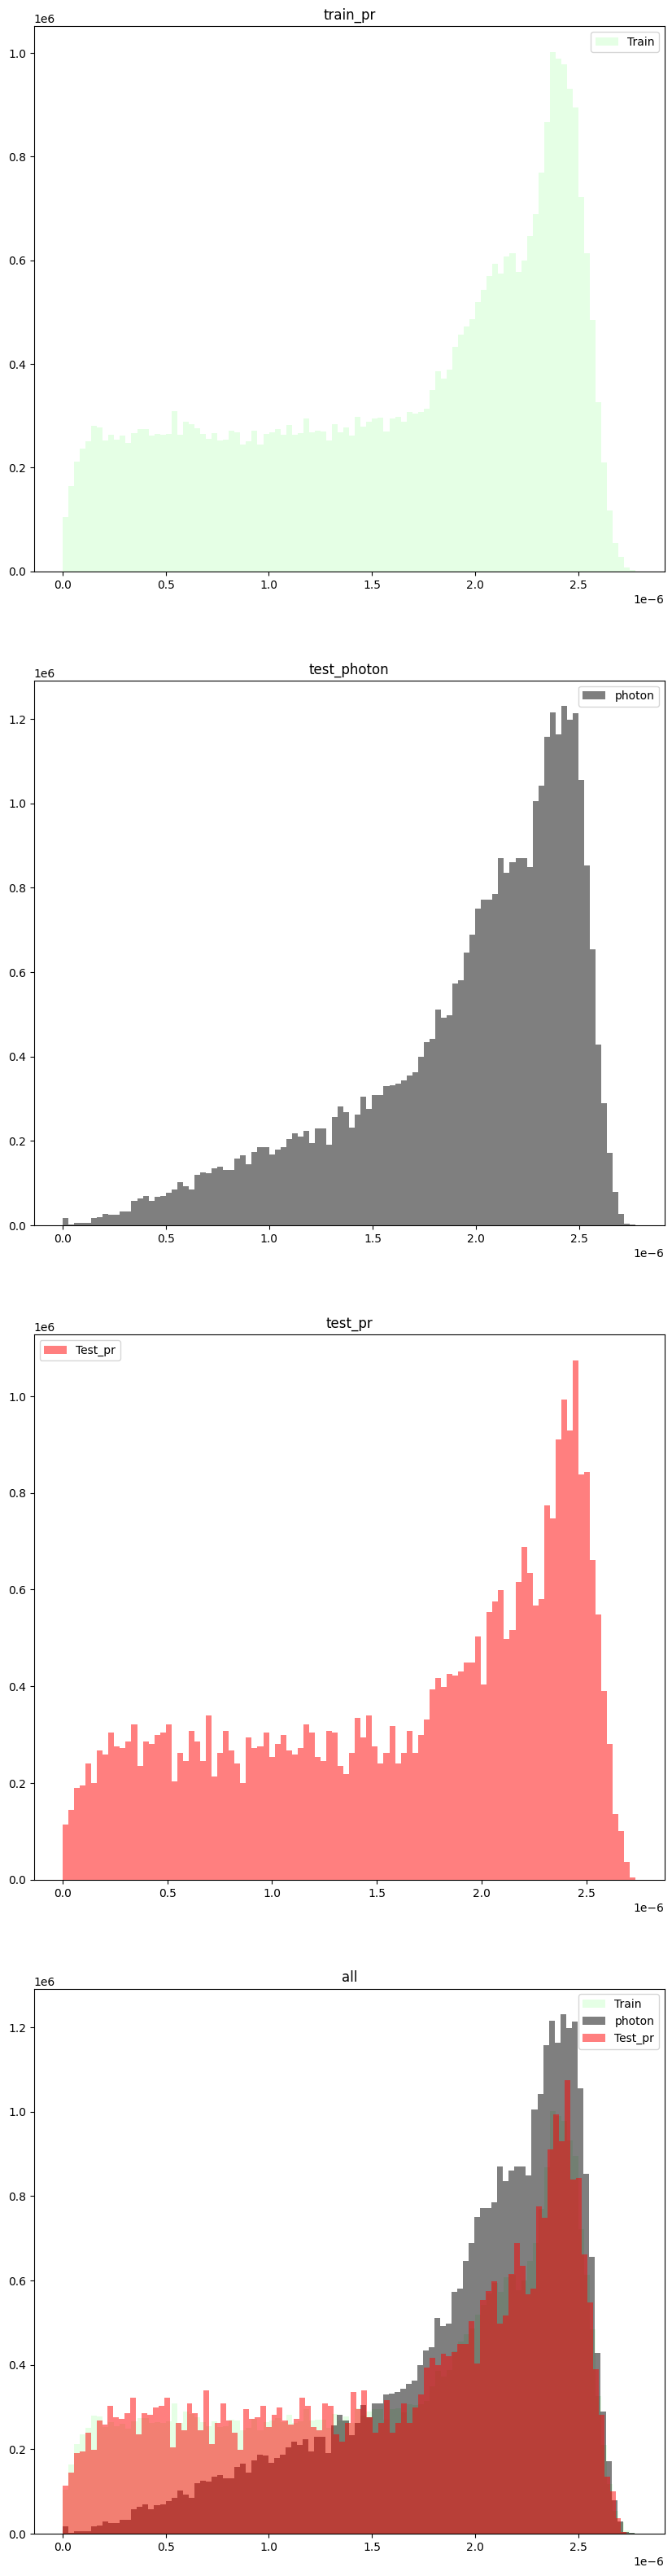

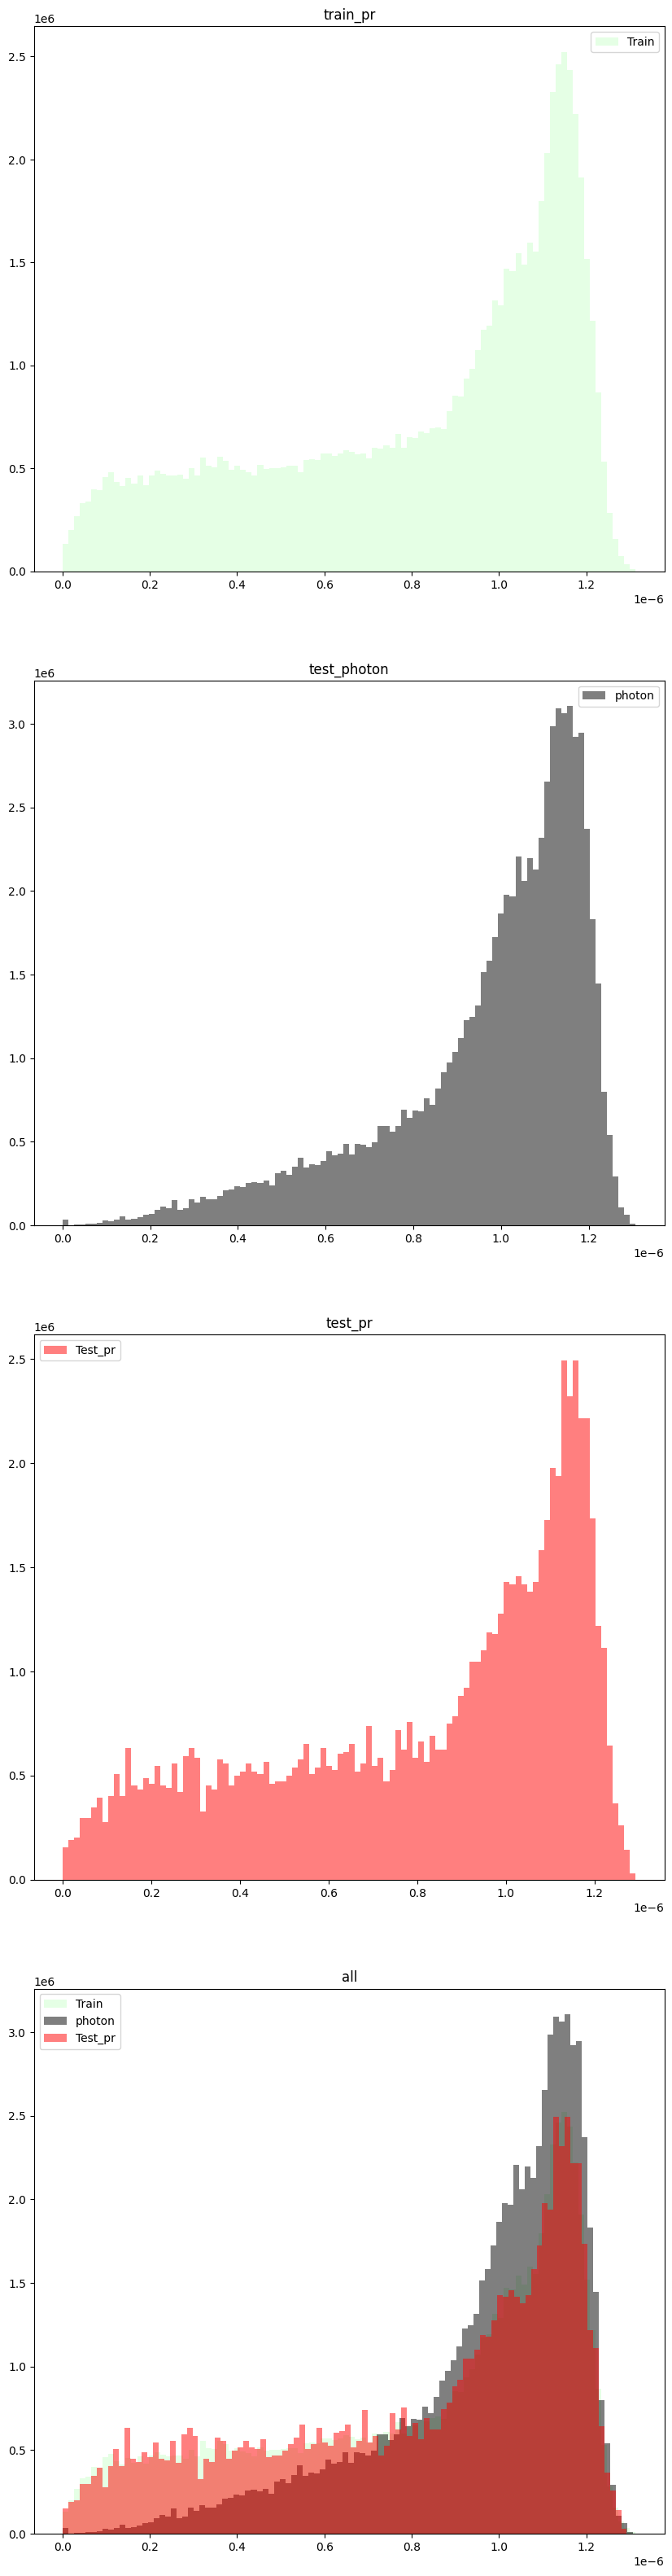

In [191]:
# dor diff bandwidth
from tqdm import tqdm
for bandwidth in tqdm(np.arange(1.4,5.5,0.2)):
    kde = KernelDensity(kernel="gaussian", bandwidth=bandwidth).fit(X)
    log_dens = kde.score_samples(X)
    log_dens_Y = kde.score_samples(Y)
    log_dens_pr_test = kde.score_samples(X_test)


    #hists
    fig, axs = plt.subplots(4,1, figsize=(10,40))
    x_lim=0.002
    axs[0].hist(np.exp(log_dens), bins=100, color=(0,1,0,0.1),density=True, label = "Train")
    axs[1].hist(np.exp(log_dens_Y), bins=100, color=(0,0,0,0.5),density=True, label = "photon")
    axs[2].hist(np.exp(log_dens_pr_test), bins=100, color=(1,0,0,0.5), density=True, label = "Test_pr")
    axs[0].legend()
    axs[1].legend()
    axs[2].legend()
    axs[0].set_title(f'train_pr, th01 {'{:.3g}'.format(th_01)} th90 {'{:.3g}'.format(th_90)}')
    axs[1].set_title(f'test_photon, th01 {'{:.3g}'.format(th_01_pr)} th90 {'{:.3g}'.format(th_90_pr)}')
    axs[2].set_title('test_pr')
    
    
    axs[3].hist(np.exp(log_dens), bins=100, color=(0,1,0,0.1),density=True, label = "Train")
    axs[3].hist(np.exp(log_dens_Y), bins=100, color=(0,0,0,0.5),density=True, label = "photon")
    axs[3].hist(np.exp(log_dens_pr_test), bins=100, color=(1,0,0,0.5), density=True, label = "Test_pr")
    axs[3].legend()
    axs[3].set_title('all')
    plt.savefig(f'hists/bandwidth={bandwidth}.png')
    del fig
    # plt.close()

# one-clss SVM

https://scikit-learn.org/stable/auto_examples/linear_model/plot_sgdocsvm_vs_ocsvm.html#sphx-glr-auto-examples-linear-model-plot-sgdocsvm-vs-ocsvm-py

In [224]:
from sklearn.kernel_approximation import Nystroem
from sklearn.linear_model import SGDOneClassSVM
from sklearn.pipeline import make_pipeline

In [284]:
# Fit the One-Class SVM using a kernel approximation and SGD
nu = 0.05
gamma = 2.0
random_state = 42

transform = Nystroem(gamma=gamma, random_state=random_state)
clf_sgd = SGDOneClassSVM(
    nu=nu, shuffle=True, fit_intercept=True, random_state=random_state, tol=1e-4
)
pipe_sgd = make_pipeline(transform, clf_sgd)
clf_sgd.fit(X)
y_pred_train_sgd = clf_sgd.predict(X)
y_pred_test_sgd = clf_sgd.predict(X_test)
y_pred_outliers_sgd = clf_sgd.predict(Y)
# n_error_train_sgd = y_pred_train_sgd[y_pred_train_sgd == -1].size
# n_error_test_sgd = y_pred_test_sgd[y_pred_test_sgd == -1].size
# n_error_outliers_sgd = y_pred_outliers_sgd[y_pred_outliers_sgd == 1].size

In [287]:
len(np.where(y_pred_outliers_sgd==1)[0]), len(y_pred_outliers_sgd)

(30968, 31932)

In [286]:
def metric(y_pred_train_sgd):
    print(len(np.where(y_pred_train_sgd==1)[0])/len(y_pred_train_sgd))
metric(y_pred_train_sgd)
metric(y_pred_test_sgd)
metric(y_pred_outliers_sgd)

0.9842666666666666
0.984134853743183
0.9698108480521107


In [264]:
# Fit the One-Class SVM using a kernel approximation and SGD
nu = 0.05
gamma = 2.0
random_state = 42

transform = Nystroem(gamma=gamma, random_state=random_state)
clf_sgd = SGDOneClassSVM(
    nu=nu, shuffle=True, fit_intercept=True, random_state=random_state, tol=1e-4
)
pipe_sgd = make_pipeline(transform, clf_sgd)
pipe_sgd.fit(X)
y_pred_train_sgd = pipe_sgd.predict(X)
y_pred_test_sgd = pipe_sgd.predict(X_test)
y_pred_outliers_sgd = pipe_sgd.predict(Y)
# n_error_train_sgd = y_pred_train_sgd[y_pred_train_sgd == -1].size
# n_error_test_sgd = y_pred_test_sgd[y_pred_test_sgd == -1].size
# n_error_outliers_sgd = y_pred_outliers_sgd[y_pred_outliers_sgd == 1].size

In [265]:

metric(y_pred_train_sgd)
metric(y_pred_test_sgd)
metric(y_pred_outliers_sgd)

1.0
1.0
1.0


## Transformer exp 28.05.25

In [6]:
config = 'config.yaml'
model = pipline.Pipline(config)
model.config['latent_dim'] = 16
exp = 'Fe_Pr18.01.2025_15:29latent_dim=16;_hidden_dim=512;_use_mask=True;_'
chpt = "/home/rfit/Telescope_Array/phd_work/Models/AutoEncoder/Encoder_2Transformer_LRslow/best"
model.load_chpt(chpt)

['pipline.py', '__pycache__', 'runs', 'datasets.py', 'model.py', 'loss.py', 'tests', 'utils.py', 'init.sh', 'config.yaml', '__init__.py', 'for_temporary_work', '.ipynb_checkpoints']
Encoder has params: 5942448 Decoder has params: 2406921
Saving Path: /home/rfit/Telescope_Array/phd_work/Models/AutoEncoder/Encoder_2Transformer_mean_ACTIVE


In [13]:
latent_list, params, loss = model.predict_latent(write_embedding=False, choise_num = None)

100%|███████████████████████████████████████████████████| 1458/1458 [01:32<00:00, 15.73it/s]


In [17]:
a=len([p for p in params if p=='pr'])
select_dict={}
select_dict['pr'] = latent_list[:a]
select_dict['photon'] = latent_list[a:]

select_dict_loss={}
select_dict_loss['pr'] = loss[:a]
select_dict_loss['photon'] = loss[a:]

In [14]:
# select
select_dict = {}
set_parasm = set(params)
for i in tqdm(range(len(params))):
    try:
        select_dict[params[i]] = torch.concat([select_dict[params[i]], latent_list[i:i+1]], dim=0)
    except KeyError:
        select_dict[params[i]] = latent_list[i:i+1]

 34%|███████████████                             | 393014/1143461 [06:24<12:14, 1021.79it/s]


KeyboardInterrupt: 

In [9]:
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter(log_dir=os.path.join('runs_tests', 'tests_Transformer'))
writer.add_embedding(latent_list,
                            metadata=params,
                            )

In [10]:
loss.shape

torch.Size([100000, 6])

In [ ]:
# select
select_dict_loss = {}
set_parasm = set(params)
for i in tqdm(range(len(params))):
    try:
        select_dict_loss[params[i]] = torch.concat([select_dict_loss[params[i]], loss[i:i+1]], dim=0)
    except KeyError:
        select_dict_loss[params[i]] = loss[i:i+1]

In [18]:
for k,v in select_dict_loss.items():
    print(k, v.mean(), v.mean(dim = 0))

pr tensor(0.7733) tensor([0.8654, 0.8495, 0.0000, 0.7458, 1.0588, 1.1200])
photon tensor(0.8105) tensor([0.8028, 0.8407, 0.0000, 0.8721, 1.2496, 1.0976])


In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(select_dict['pr']))
print(scaler.mean_)
select_dict['pr'] = scaler.transform(select_dict['pr'])
select_dict['photon'] = scaler.transform(select_dict['photon'])

StandardScaler()
[ 4.26137345 -0.32740335 -5.34462866  0.12095234 -0.26254359  5.39511867
  5.82584641  1.27259603 -1.90860097 -3.54047129  0.60707332 -0.10310828
 -6.60664292 -0.41173025 -0.84995797 -4.76014285]


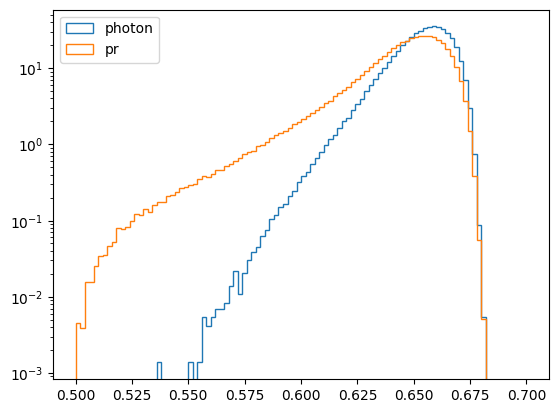

In [20]:
from sklearn.ensemble import IsolationForest
import numpy as np
X =  np.concatenate((select_dict['pr'], select_dict['photon'][:10000]))
select_dict['pr']
clf = IsolationForest(n_estimators=2000, contamination=0.128, random_state=42, max_samples=1000) 
clf.fit(X) 

proton_score = clf.score_samples(select_dict['photon'])
pr_score = clf.score_samples(select_dict['pr'])

plt.hist(np.exp(proton_score),range=(0.5,0.7), bins=100, density=True,histtype='step', label ='photon', log =True)
plt.hist(np.exp(pr_score),range=(0.5,0.7),bins=100, density=True, histtype='step', label ='pr', log =True)
plt.legend()

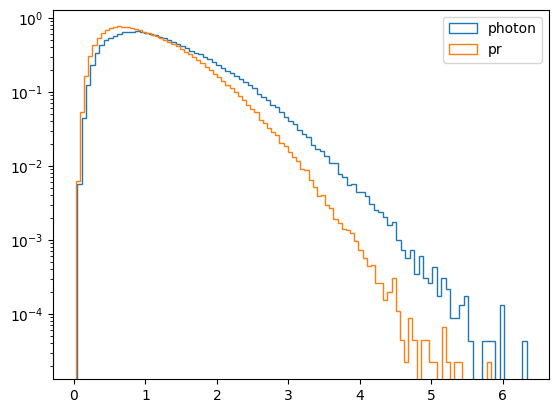

In [30]:
plt.hist(select_dict_loss['photon'][:,4], bins=100, density=True,histtype='step', label ='photon', log =True)
plt.hist(select_dict_loss['pr'][:,4] ,bins=100, density=True, histtype='step', label ='pr', log =True)
plt.legend()

In [39]:
a = np.quantile(np.array(select_dict_loss['pr'][:,4]), 0.5)
print(a)
sum(np.array(select_dict_loss['photon'][:,4])>a)/len(np.array(select_dict_loss['photon'][:,4]))

0.9513918161392212


0.6051972216352395

In [26]:
select_dict_loss['photon'].mean(dim=1).shape

torch.Size([364387])

(array([1.53029563e-02, 2.36414675e-01, 6.31355177e-01, 9.08690672e-01,
        1.12925653e+00, 1.26993887e+00, 1.35433986e+00, 1.37124276e+00,
        1.30950390e+00, 1.16511401e+00, 9.99699028e-01, 8.37145117e-01,
        6.78807517e-01, 5.38746881e-01, 4.24944084e-01, 3.42500113e-01,
        2.66305320e-01, 2.10966216e-01, 1.68238405e-01, 1.34489081e-01,
        1.08607697e-01, 8.98413410e-02, 7.32960783e-02, 5.97624676e-02,
        5.07651575e-02, 4.29160397e-02, 3.59327718e-02, 3.08318403e-02,
        2.49778880e-02, 2.15144883e-02, 1.88228244e-02, 1.59241095e-02,
        1.41547640e-02, 1.21595446e-02, 9.86316000e-03, 8.82790466e-03,
        7.47266130e-03, 6.41858313e-03, 5.64684733e-03, 4.46100939e-03,
        4.55512351e-03, 3.29399428e-03, 2.89871496e-03, 2.67284107e-03,
        2.20227046e-03, 1.90110527e-03, 1.82581397e-03, 1.56229443e-03,
        1.11054664e-03, 1.03525534e-03, 8.84672748e-04, 8.65849924e-04,
        7.15267328e-04, 5.27039084e-04, 4.51747786e-04, 3.388108

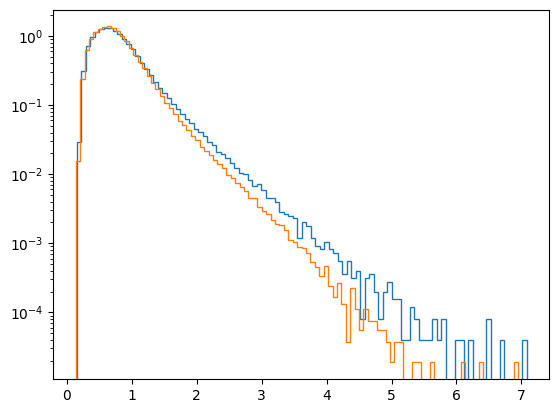

In [31]:
plt.hist(select_dict_loss['photon'].mean(dim=1), bins=100, density=True,histtype='step', label ='photon', log =True)
plt.hist(select_dict_loss['pr'].mean(dim=1) ,bins=100, density=True, histtype='step', label ='pr', log =True)